# In the scope of the evaluation 
 
* full * Annotated_BTC_English_UAM_2_4/Annotation_OE1clean.ctpr
* full * Annotation_OE_clean_gold_UAM_1_33_new_segments/Annotation_OE1clean.ctpr
* only BeatOCD.txt from OCD_Annotation_Ela/OCD_Annotation.ctpr.

Use only OCD1 fileset because OCD is strange (OCD: 880/86/6382 | OCD1: [1445/192/475] )


# Questions to answer

* on distances
    * what is the correlation between edit distance and geometric distance ?
    * what is the distance distribution? 

* on matched features an distance
    * Which features are matched with highest average distance?
    * Which are the matched features that are most frequently distanced?   

* on matched featuires an precission, recall, f1
    * precision , recall, F1 
    * group features in systems 

* on non matched groups
    * which features are most frequently unmatched, and how much with respect to all other ones unmatched? 
  

***TODO***

* Can live without it for now: remap the system networks 
* Done: to check:  process types are associated in corpus with configuration whereas in the parser to predicates checked: it seems that parser associates process types to clauses just like in the corpus
* Done implement the interval based query on the corpus to permit invertigation

# General Function definition

In [6]:
from __future__ import division
from notebook_functions import *

# setting up the matplot lib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 300
pd.options.display.float_format = '{:,.2f}'.format

# Preprocessing: agregating OE and BTC (const and trans) files

In [7]:
# aggregate_files(OE1_const_file_list + BTC_const_file_list,"const")
# aggregate_files(OE1_trans_file_list + BTC_trans_file_list,"trans")

# On distances without grouping [OE + BTC]

## what is the correlation between edit distance and geometric distance ?
* there is negligeble  difference between using the edit distance and the geometric distance. They are perfectly correlated (corr=0.99). 

## describe the distance distribution?
* over 51% segments are perfectly alignmed (dist 0)
* over 75% segments are slihghtly shifted (dist up to 5)
* over 84% segments are slihghtly shifted (dist up to 10)
* last 10% of segments are heavily shifted (dist 20-200)

TODO: what about proportions to the segment length?

kurtosis =42.53583939524907
skewness =5.534902130937177


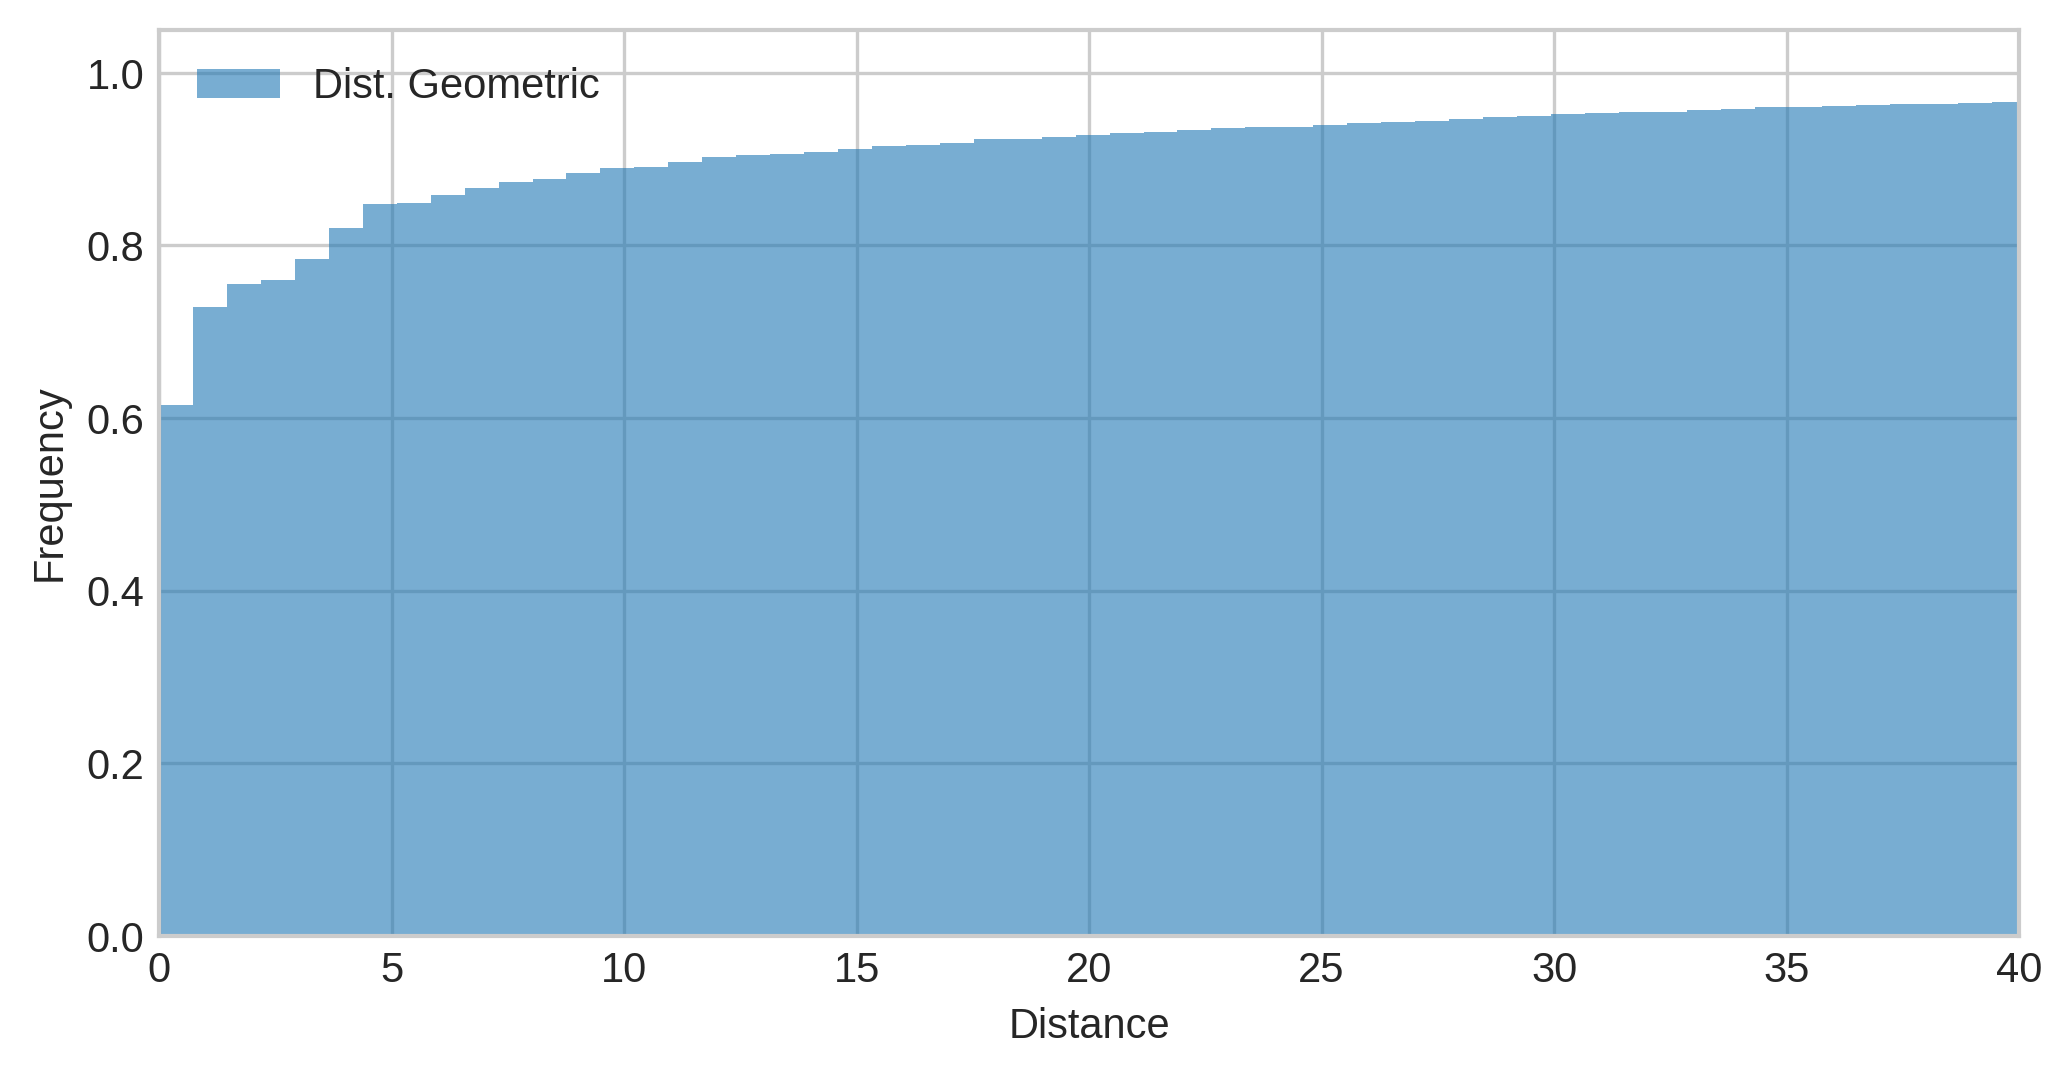

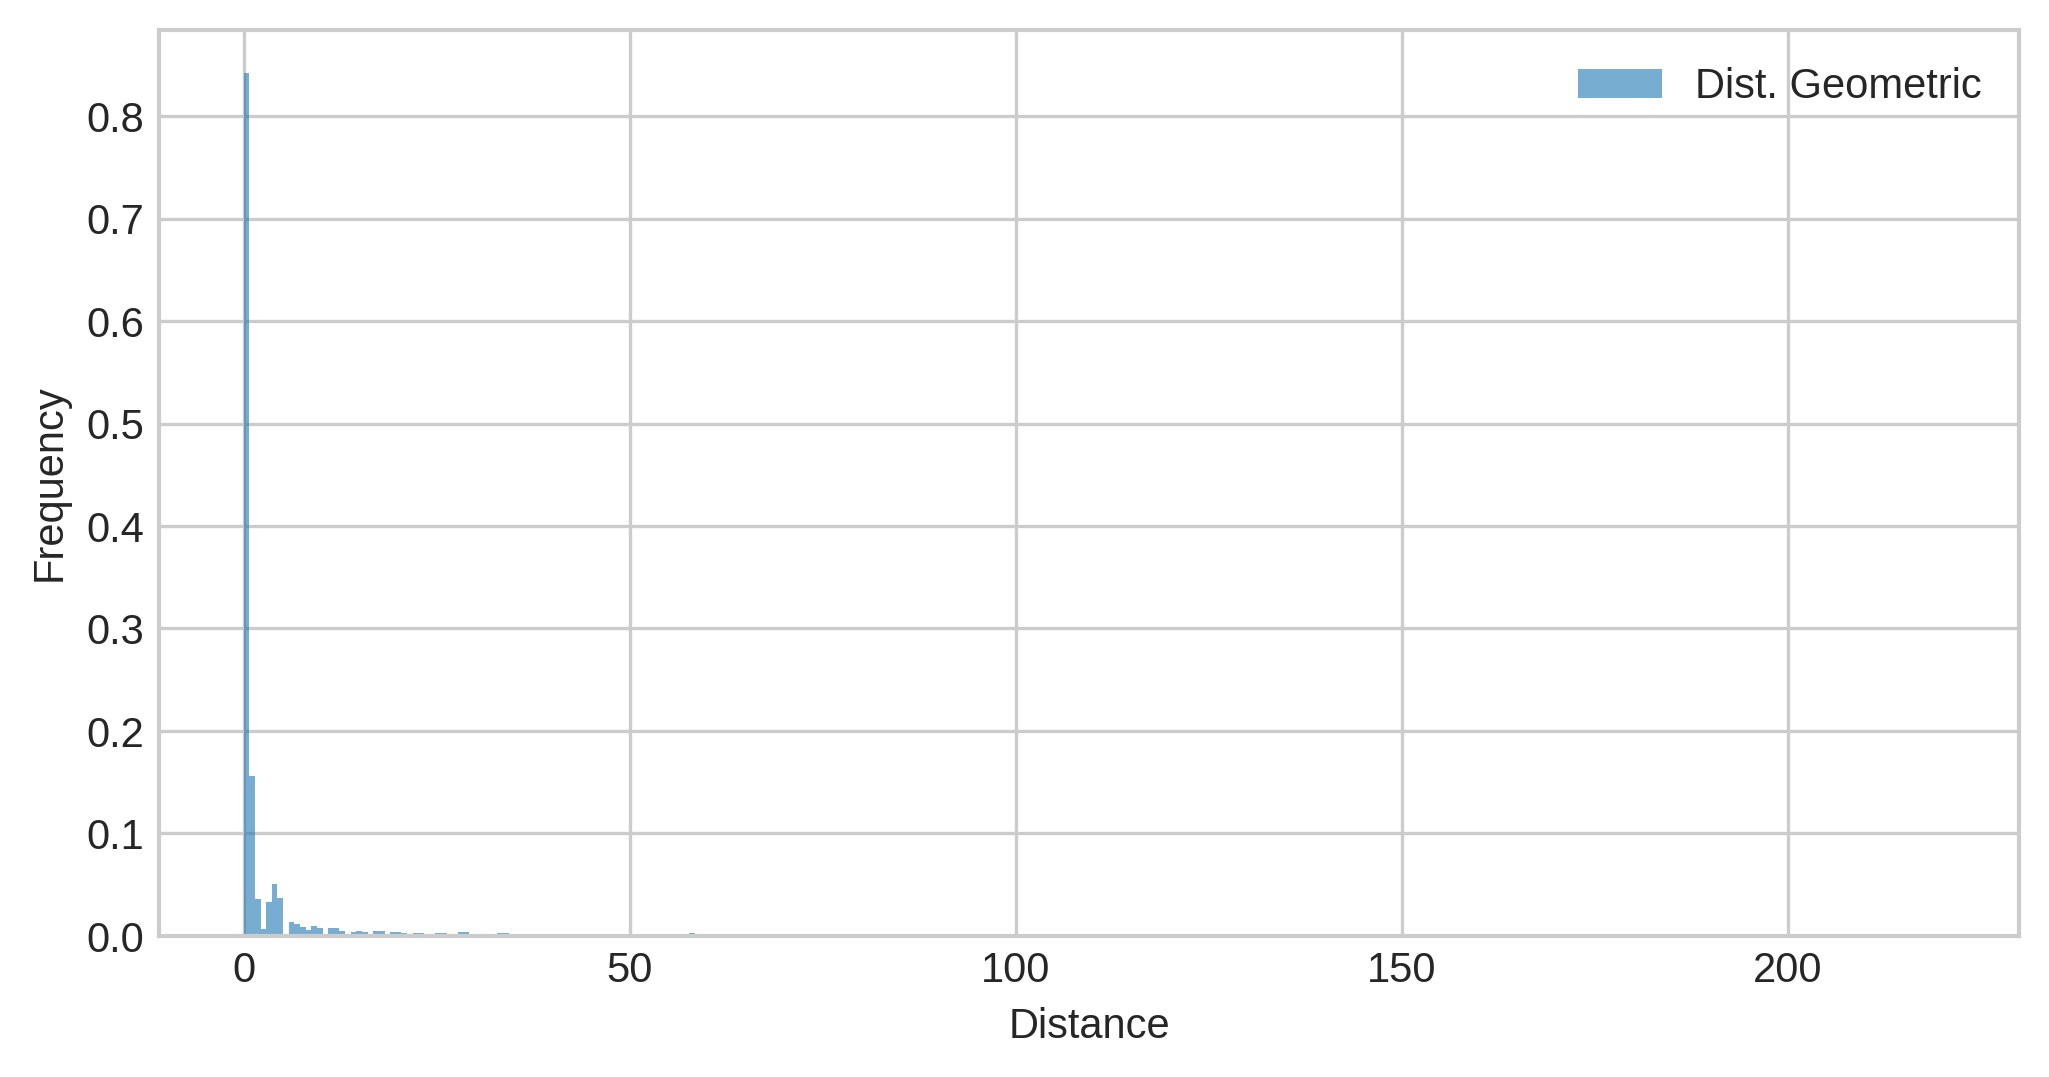

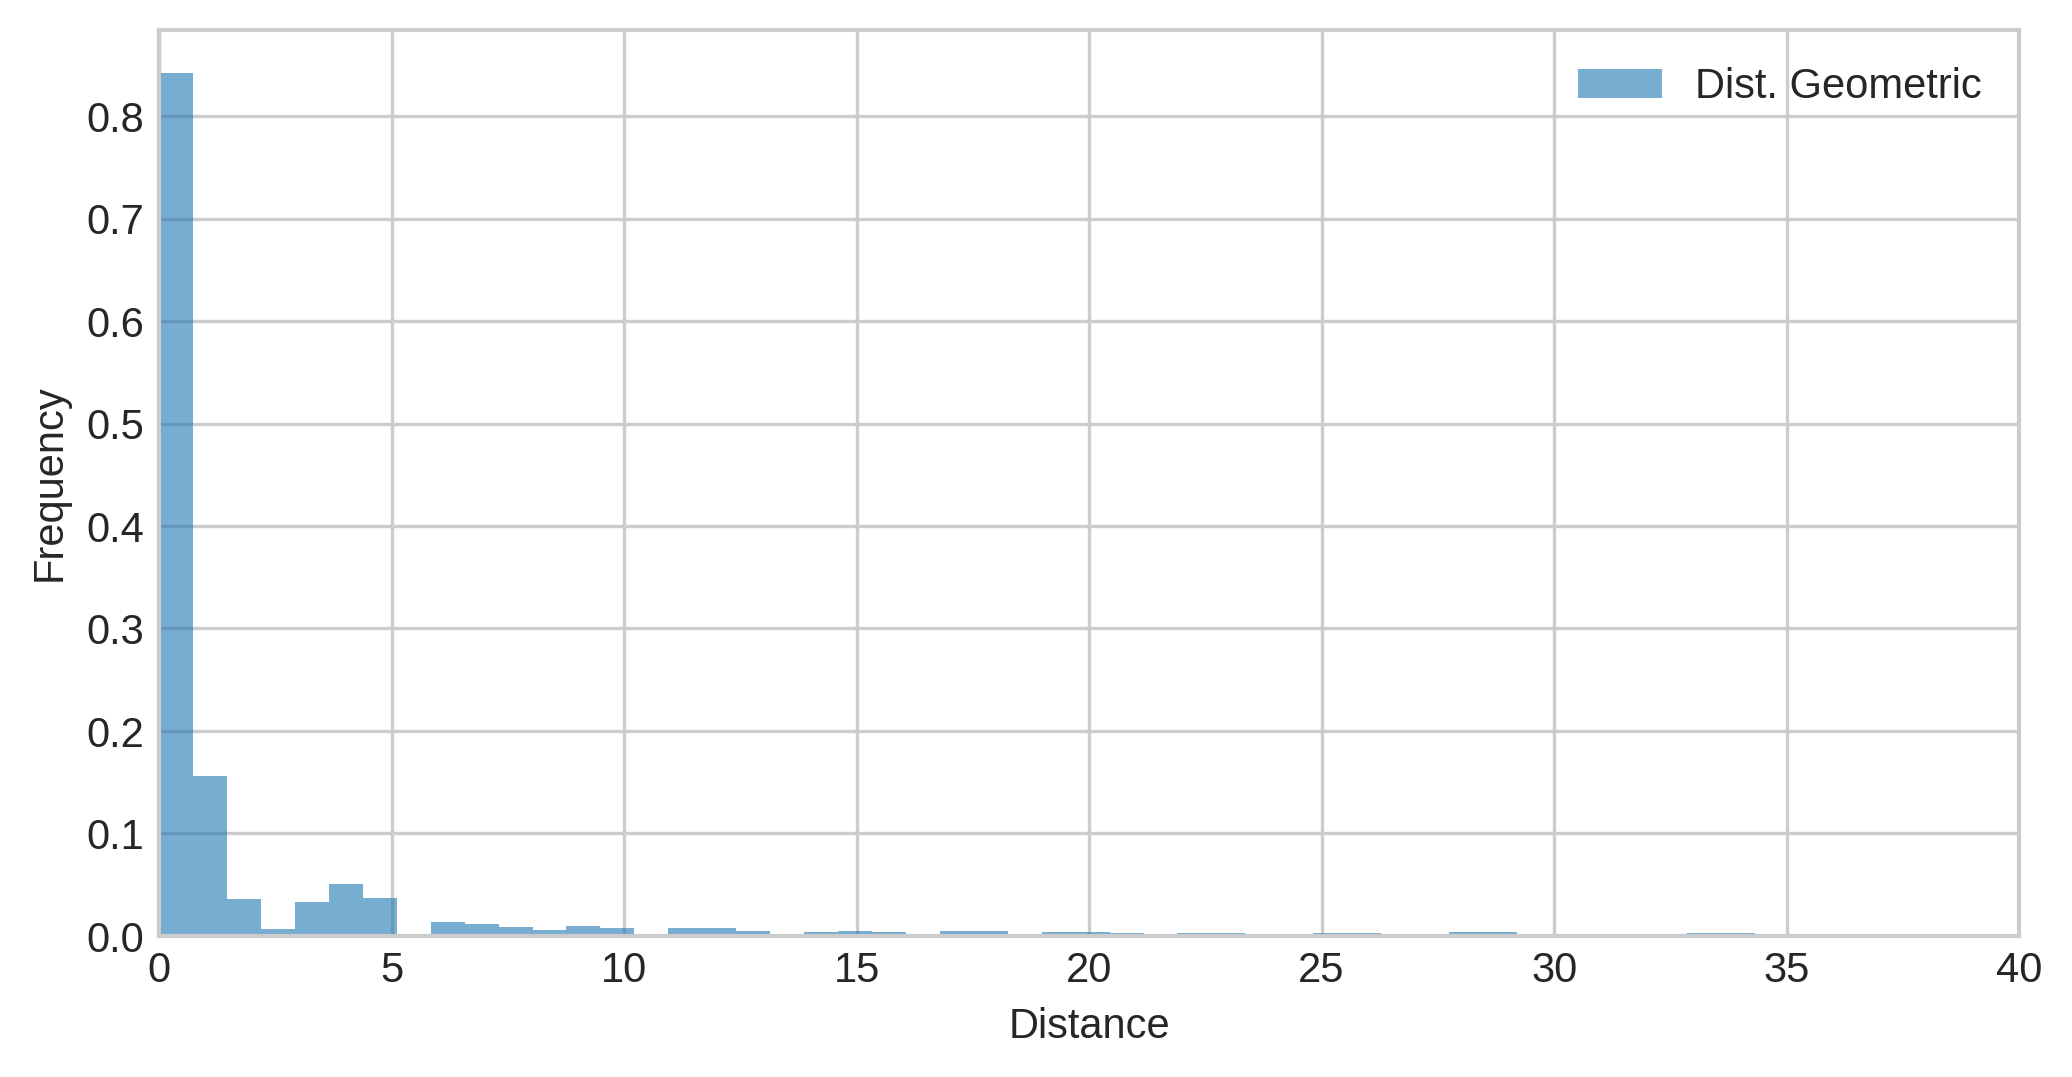

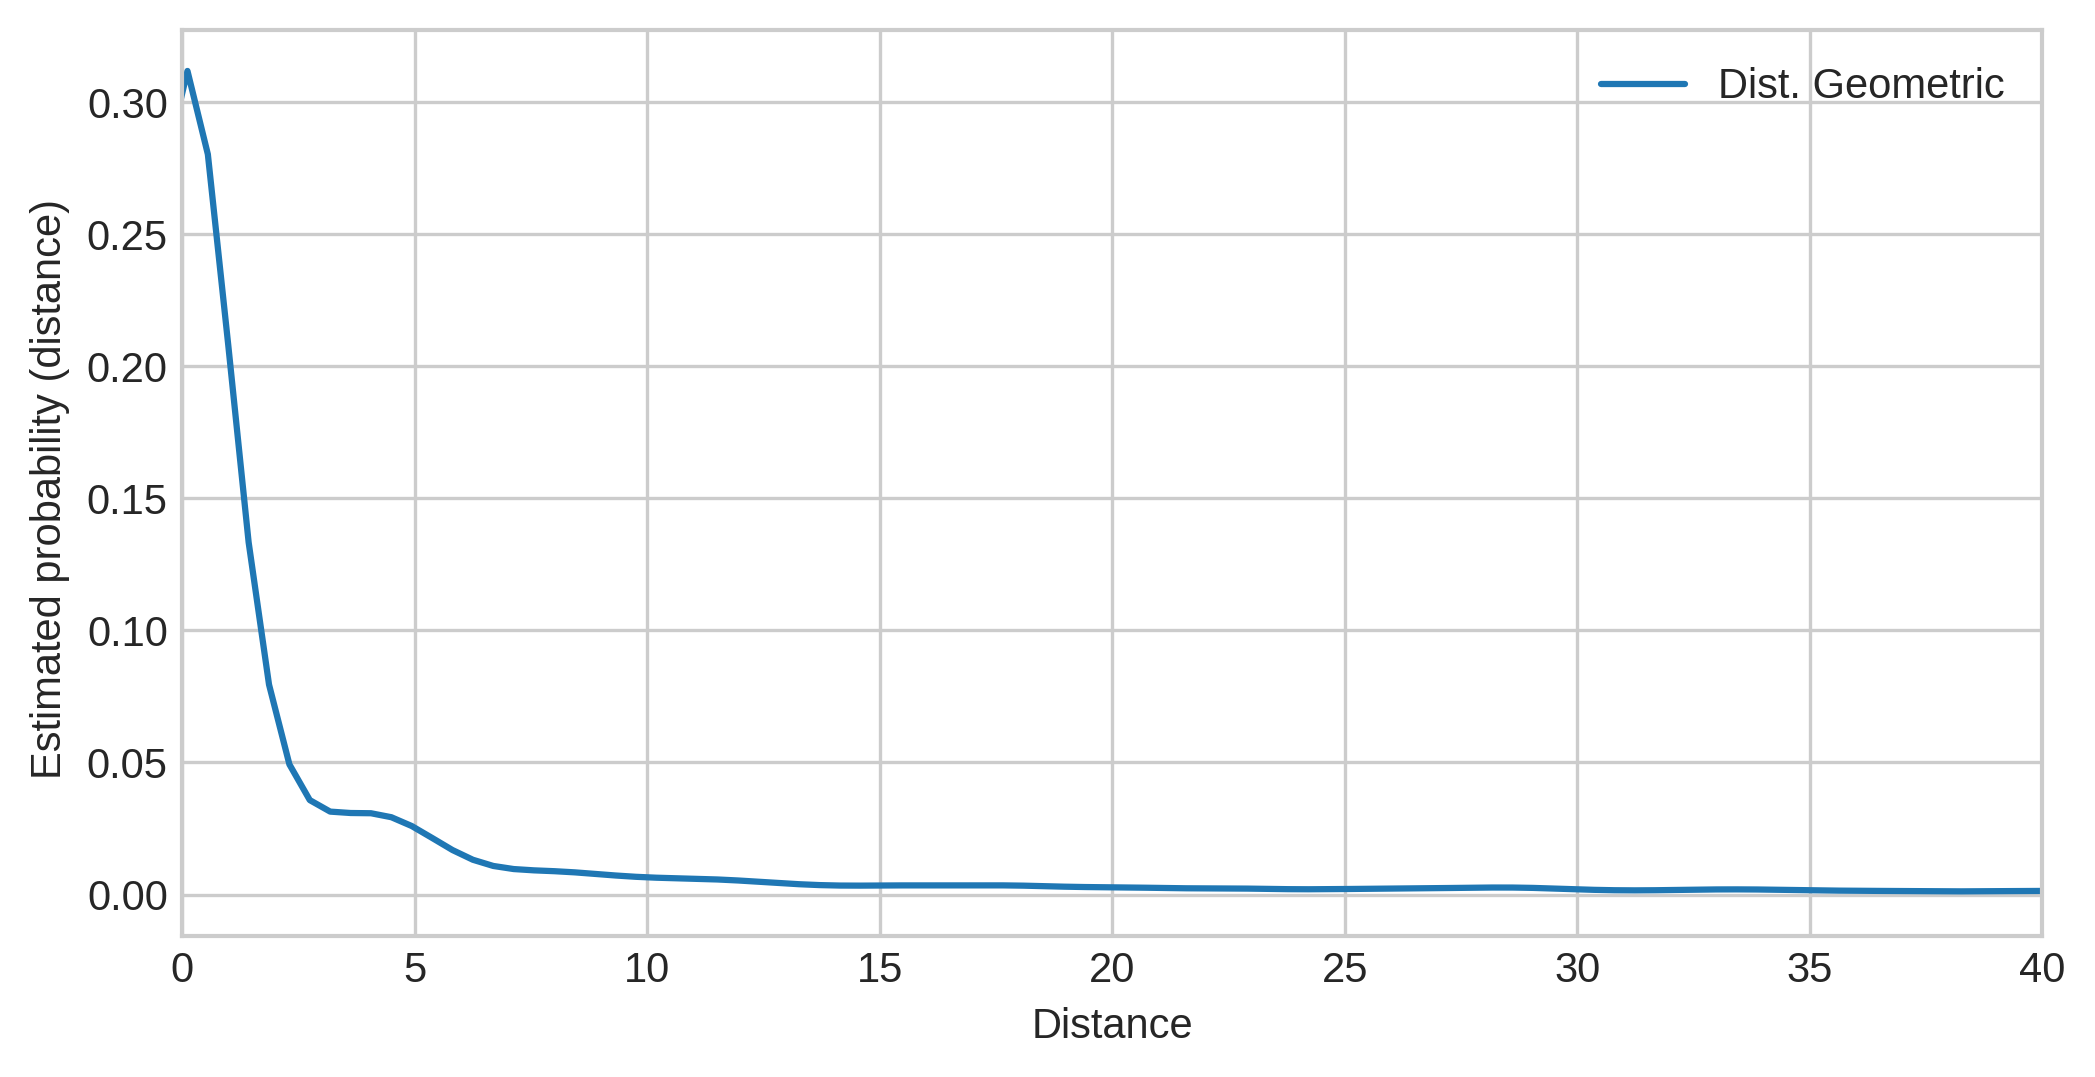

In [8]:
# ---------
# matches, manual_nm, parse_nm = read_batch(OE1_const_file_list + BTC_const_file_list)
matches, manual_nm, parse_nm = read_batch( OCD_const_file_list #+ OCD1_mood_file_list 
                                          + 
                                          OE1_const_file_list + BTC_const_file_list)
# ---------


distance_columns = ["Dist. Geometric","Dist. Edit"]

d = pd.DataFrame(matches[distance_columns].astype(float))
correlation = d.corr()

d=d.drop("Dist. Edit", axis=1)

ax =d.plot.hist(cumulative=True, density=1,alpha=.6, bins=300)
# restrict the x axis to 80
ax.set_xlim(0,40)
plt.xlabel("Distance")
plt.ylabel("Frequency")

ax = d.plot.hist(cumulative=False, density=1,alpha=.6, bins=300)
# restrict the x axis to 80
# ax.set_xlim(0,40)
plt.xlabel("Distance")
plt.ylabel("Frequency")


ax = d.plot.hist(cumulative=False, density=1,alpha=.6, bins=300)
# restrict the x axis to 80
ax.set_xlim(0,40)
plt.xlabel("Distance")
plt.ylabel("Frequency")


ax = d.plot.kde(bw_method=0.06) #bw_method=0.1
ax.set_xlim(0,40)
plt.xlabel("Distance")
plt.ylabel("Estimated probability (distance) ")

description = d.describe(percentiles=np.arange(0.5,.99,.03)) #[.1,.2,.3,.4,.5,.6,.7,.8,.9]

print "kurtosis =" + str(d["Dist. Geometric"].kurtosis())
print "skewness =" + str(d["Dist. Geometric"].skew())

dsp(correlation)
dsp(description)

# On distances grouped by element name 

## Transitivity elements [OE + BTC]

### which features are matched with highest average distance?

* configurations are the features with highest average distance (16.2). They are also the longest features corresponding to clauses. Participants follow with an average distance of (5.4). 

### which are the matched features that are most frequently distanced?

* configurations are most friequently shifted. Already over 30% percentile the segments are shifted on average 2.8 and over 52% percentile of segments are shifted 5 characters.
* participant roles are slightly shifted only after 60% percentile and after 81% by 5 characters. 
* main verbs are slightly shifted after 69% percentile, and more (5 characters) only after 94% percentile.


Text(0,0.5,'Mean Geometric Distance')

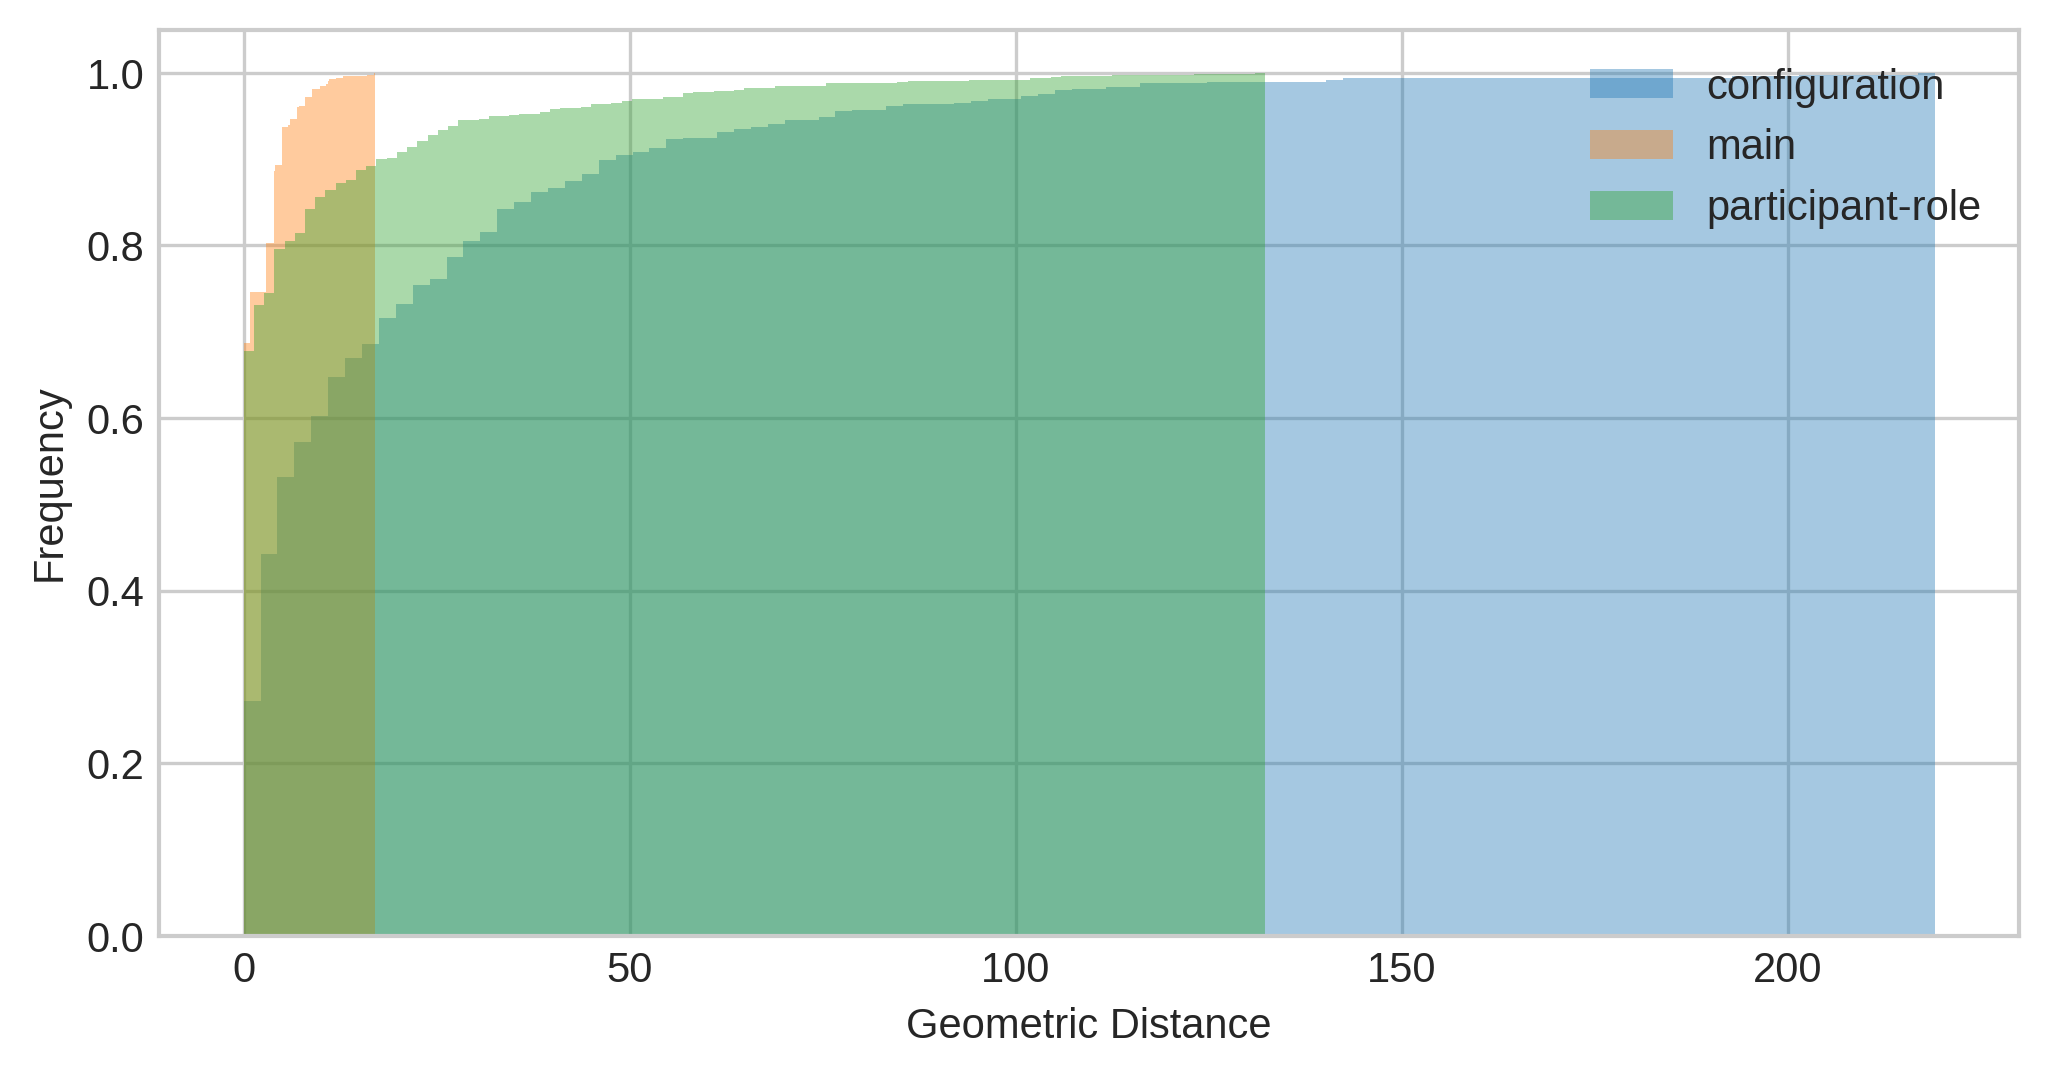

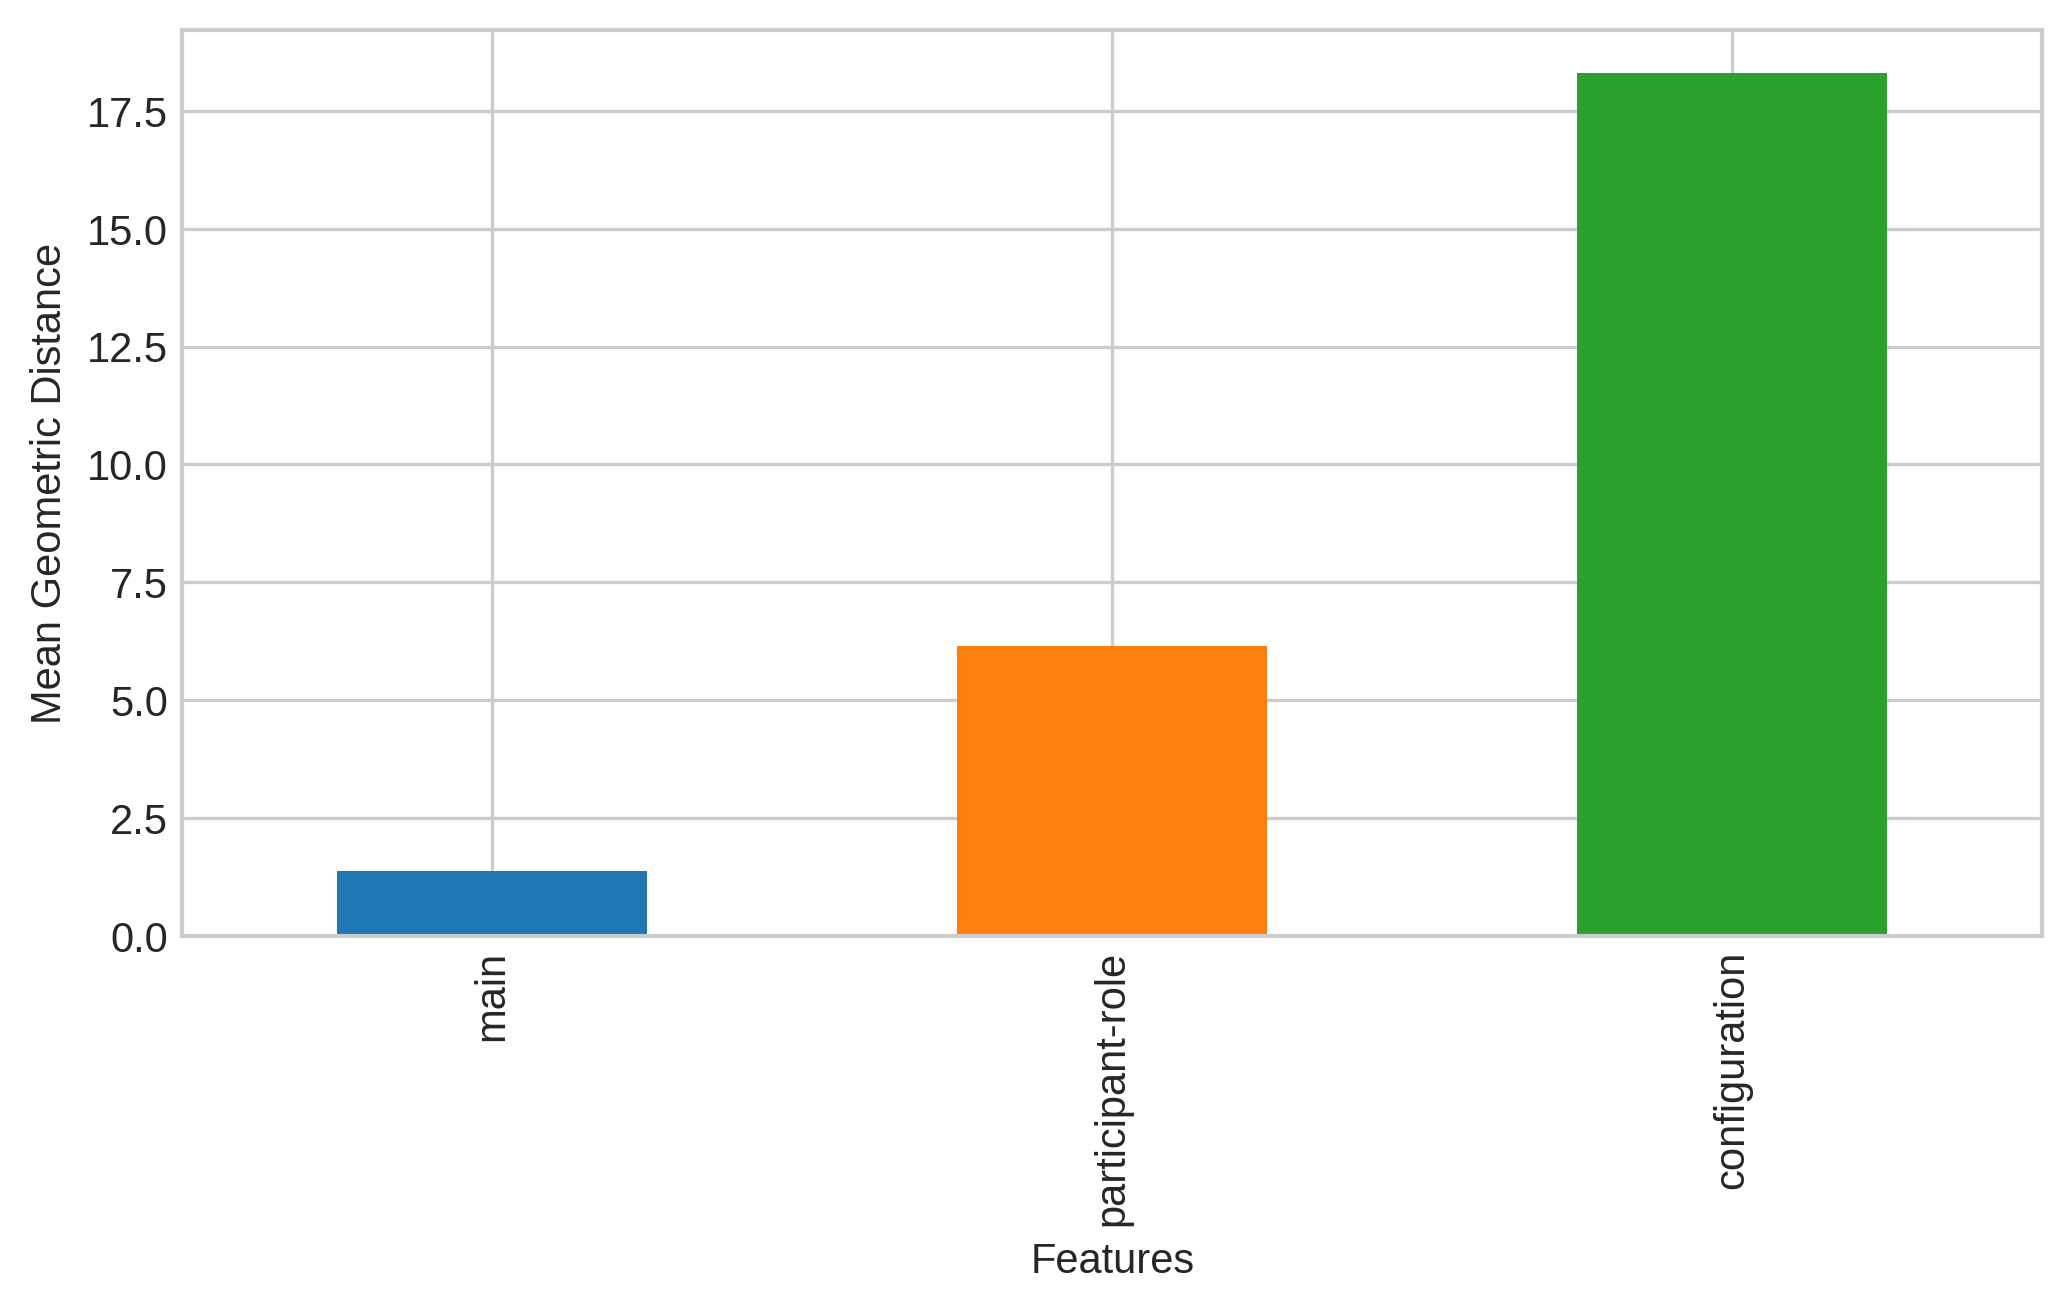

In [9]:
# ---------
matches, manual_nm, parse_nm = read_batch(OE1_const_file_list + BTC_const_file_list 
#                                             + OCD_const_file_list
                                         )
# ---------


# drop the edit distance
d=matches.drop("Dist. Edit", axis=1)

# delete verb with main 

# d.replace("verb","main", inplace=True)
d.drop(d.loc[d['Man Features']=="verb"].index, inplace=True)

plt.figure()
groups = d.sort_values(["Dist. Geometric"],ascending=True).groupby("Man Features", as_index=True)
# print groups
plt.xlabel("Geometric Distance")
groups["Dist. Geometric"].plot.hist(legend=True, cumulative=True, density=1,alpha=.4, bins=100)


# sort1 = groups["Dist. Geometric"].transform(sum)
# sort1 = groups.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
# q = groups["Dist. Geometric"].mean().groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
# print q

plt.figure()
distance_descriptions = groups["Dist. Geometric"].describe(percentiles=np.arange(.5,.99,.04),include=[np.number])
# plt.title("This is Figure title")

dsp(distance_descriptions)

groups["Dist. Geometric"].mean().sort_values().plot.bar() # title="Features"

# plt.title('Features', color='black')
plt.xlabel("Features")
plt.ylabel("Mean Geometric Distance")

### which features appear in distances below 5, 5-10, 10-20, 20-50, 50-250
* the scale is: slight (0-5), little (5-10), moderate (10-20), significant (20-50), high(50-250)
* only main verb does not appear on higher distances

Text(0,0.5,'% of segments')

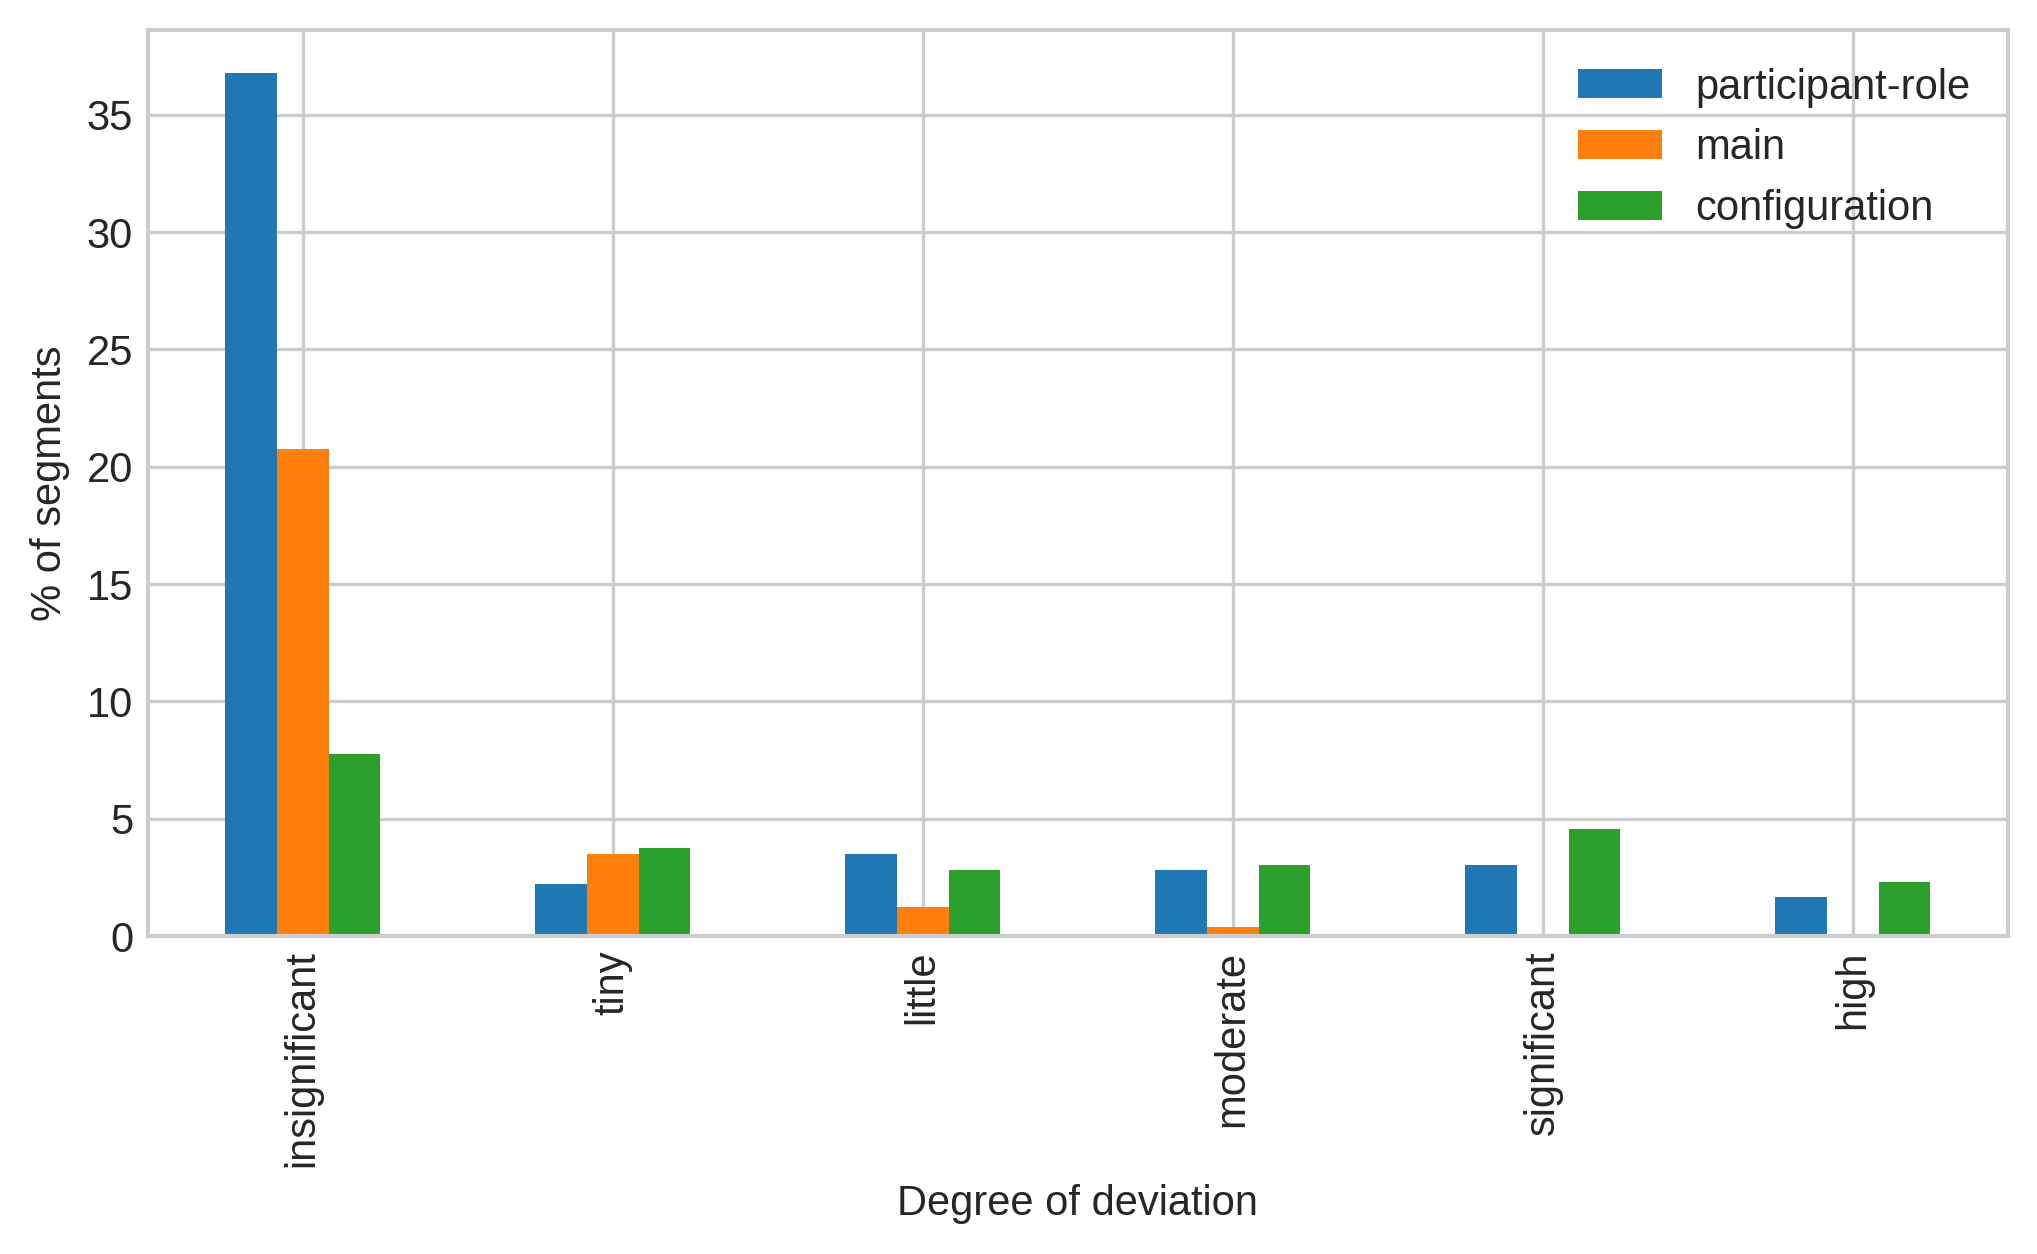

In [10]:
# # ---------
# matches, manual_nm, parse_nm = read_batch(OE1_const_file_list + BTC_const_file_list)
# # ---------

# # instead of droping a column, simply select the needed one
# d=matches.drop(columns=["Dist. Edit","Man Interval Start",
#                        "Man Interval End","Auto Interval Start",
#                        "Auto Interval End"], ) #axis=1
# # d = d["Dist. Geometric"]
# d.drop(d.loc[d['Man Features']=="verb"].index, inplace=True)

bin_edges = [0,3,5,10,20,50,250]
cats = ["insignificant","tiny","little","moderate","significant","high"]
d["shift"] = pd.cut(d["Dist. Geometric"],right=True, include_lowest=True, 
                    bins = bin_edges,
                    labels=cats)
dsp(d.describe())
# dsp(d)

groups = d.sort_values(["Dist. Geometric"],ascending=True).groupby(["shift","Man Features"], as_index=True)
# groups = d.sort_values(["Dist. Geometric"],ascending=True).groupby(["Man Features"], as_index=True)

# for i in groups:
#     print (i[0][0], i[0][1], i[1]["Man Features"].count()/len(d))
    

# turn the groups into a list of tuples
dd = pd.DataFrame([(i[0][0], i[0][1], i[1]["Man Features"].count()/len(d)*100) for i in groups]).pivot(columns=0, index=1, values=2)
dd = dd[cats].fillna(0).sort_values(by="insignificant",ascending=False, axis=0)
dd.index.name=None

dsp(dd)

dd.transpose().sort_values(by="insignificant",ascending=False, axis=1).plot.bar()

plt.xlabel("Degree of deviation")
plt.ylabel("% of segments")

## Mood elements [OCD1]
### which features are matched with highest average distance?
* 
### which are the matched features that are most frequently distanced?
* 


notebook_functions.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  matches_filtered["Length"] = matches_filtered["Man Interval End"] - matches_filtered["Man Interval Start"]
notebook_functions.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nm_filtered["Length"] = nm_filtered["Interval End"] - nm_filtered["Interval Start"]
notebook_functions.py:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

Text(0,0.5,'Mean Geometric Distance')

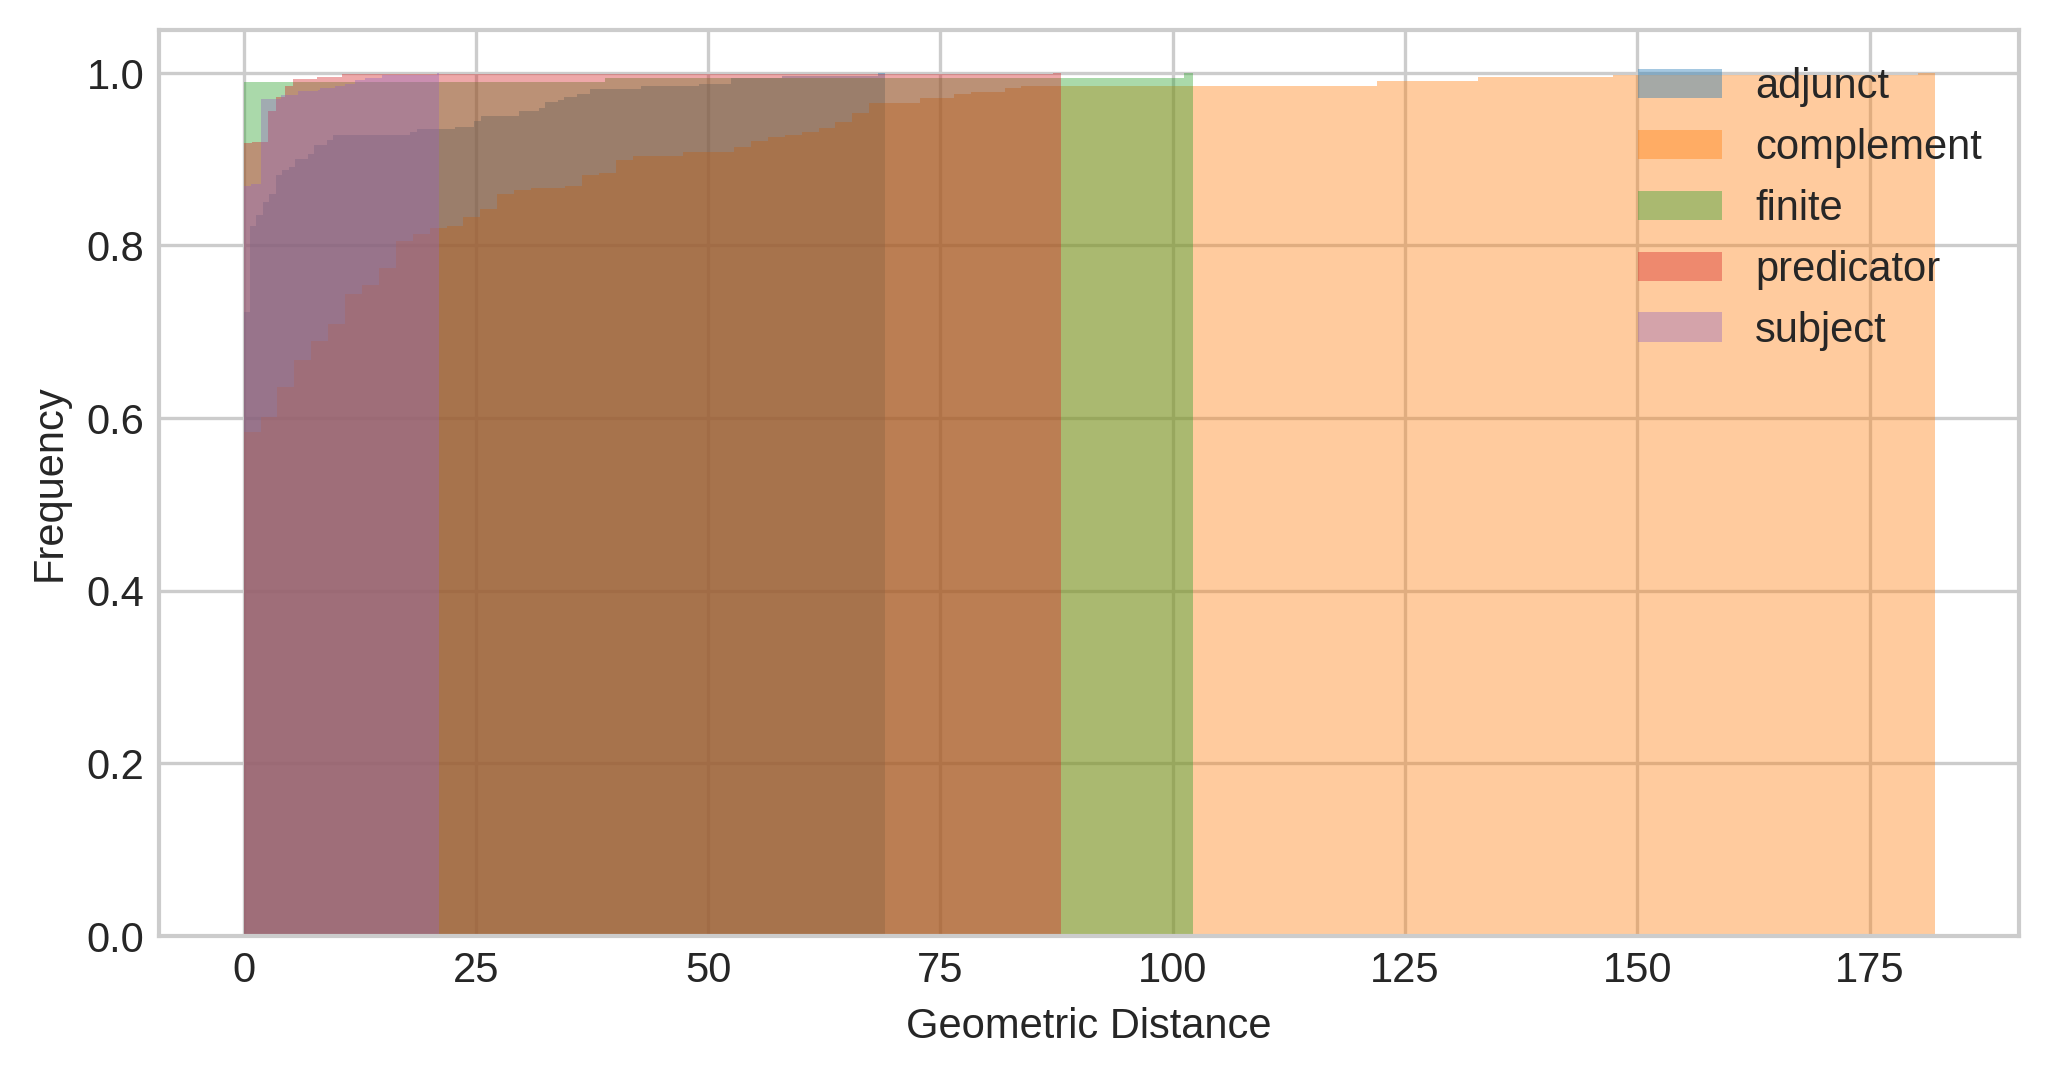

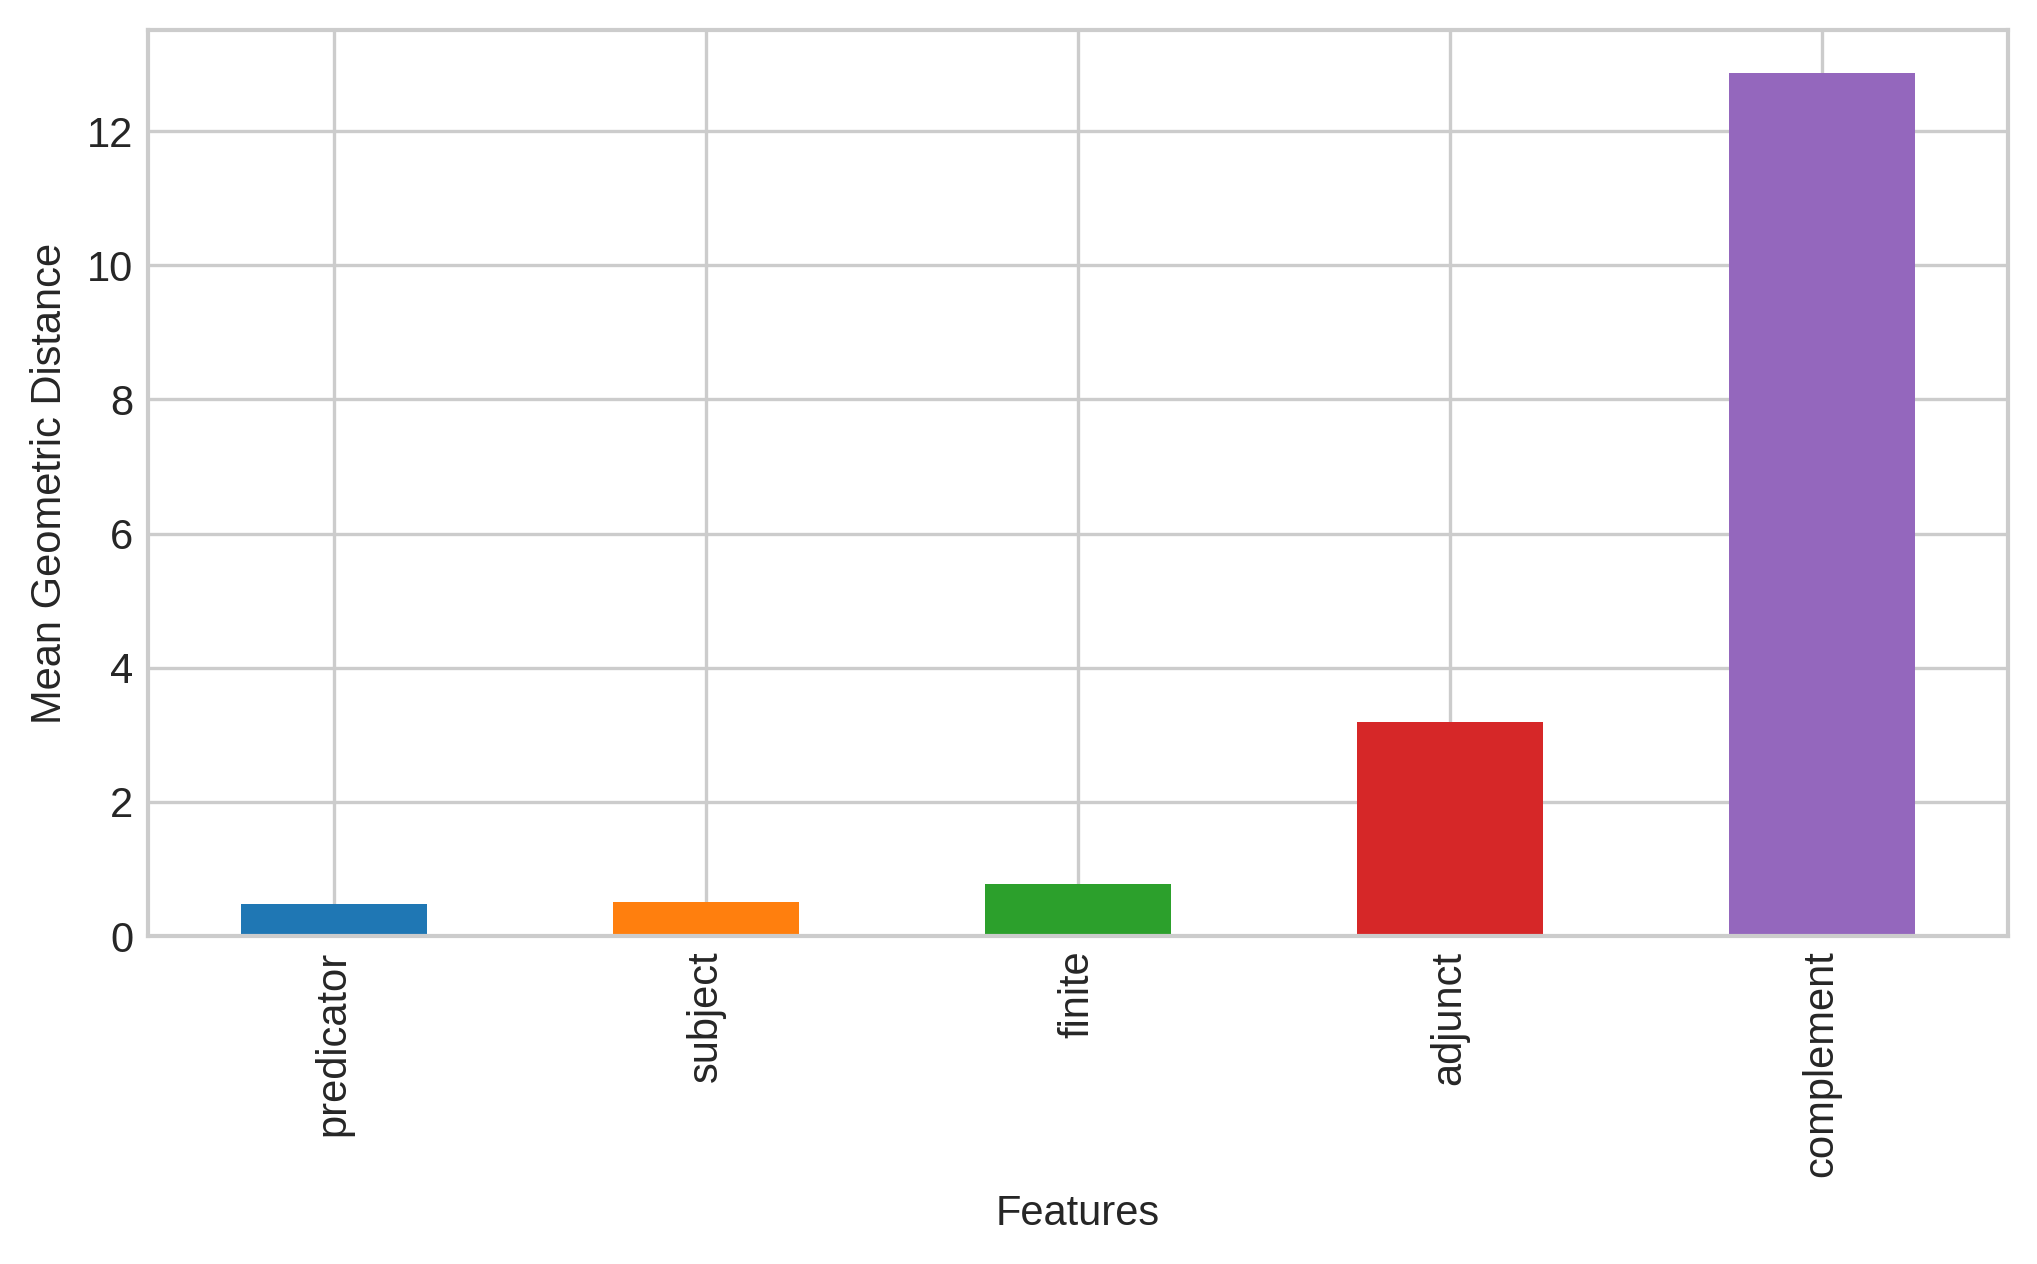

In [11]:
# ---------
matches, manual_nm, parse_nm = read_batch( OCD_const_file_list)
# --------- 

matches, manual_nm, parse_nm = select_evaluation_segments(matches, manual_nm, parse_nm,
                        only_features=["predicator","subject","adjunct","complement-direct","complement"
                                       "complement-indirect","mood-adjunct", "finite"
                           ] )
# select the longer finite elements
a,b,c, = select_evaluation_segments(matches, manual_nm, parse_nm,
                        only_features=[ "finite" ],
                        longer_than=12,)

# delete the longer finite elements
matches.drop(a.index,axis=0,inplace=True)
manual_nm.drop(b.index,axis=0,inplace=True)
parse_nm.drop(c.index,axis=0,inplace=True)

d = matches
#  rename complement-direct into complement, and mood-ajunct into adjunct
d["Man Features"]=d["Man Features"].str.replace("complement-direct","complement")
d["Man Features"]=d["Man Features"].str.replace("complement-indirect","complement")
d["Man Features"]=d["Man Features"].str.replace("mood-adjunct","adjunct")
d.drop(d.loc[d['Man Features']=="verb"].index, inplace=True)

matches = d

# 
# the same as above: distance by feature analisys
# 
# drop the edit distance

# d=d.drop("Dist. Edit", axis=1)

# delete verb with main 


plt.figure()
groups = d.sort_values(["Dist. Geometric"],ascending=True).groupby("Man Features", as_index=True)
# groups = groups.sort_values(by='mean',ascending=False).head()

# print groups
plt.xlabel("Geometric Distance")
groups["Dist. Geometric"].plot.hist(legend=True, cumulative=True, density=1,alpha=.4, bins=100)


# sort1 = groups["Dist. Geometric"].transform(sum)
# sort1 = groups.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
# q = groups["Dist. Geometric"].mean().groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
# print q

plt.figure()
distance_descriptions = groups["Dist. Geometric"].describe(percentiles=np.arange(.5,.99,.04),include=[np.number])
# plt.title("This is Figure title")

dsp(distance_descriptions)

groups["Dist. Geometric"].mean().sort_values().plot.bar() # title="Features"

# plt.title('Features', color='black')
plt.xlabel("Features")
plt.ylabel("Mean Geometric Distance")

### which features appear in distances below 5, 5-10, 10-20, 20-50, 50-250
* the scale is: slight (0-5), little (5-10), moderate (10-20), significant (20-50), high(50-250)
* only main verb does not appear on higher distances

Text(0,0.5,'% of segments')

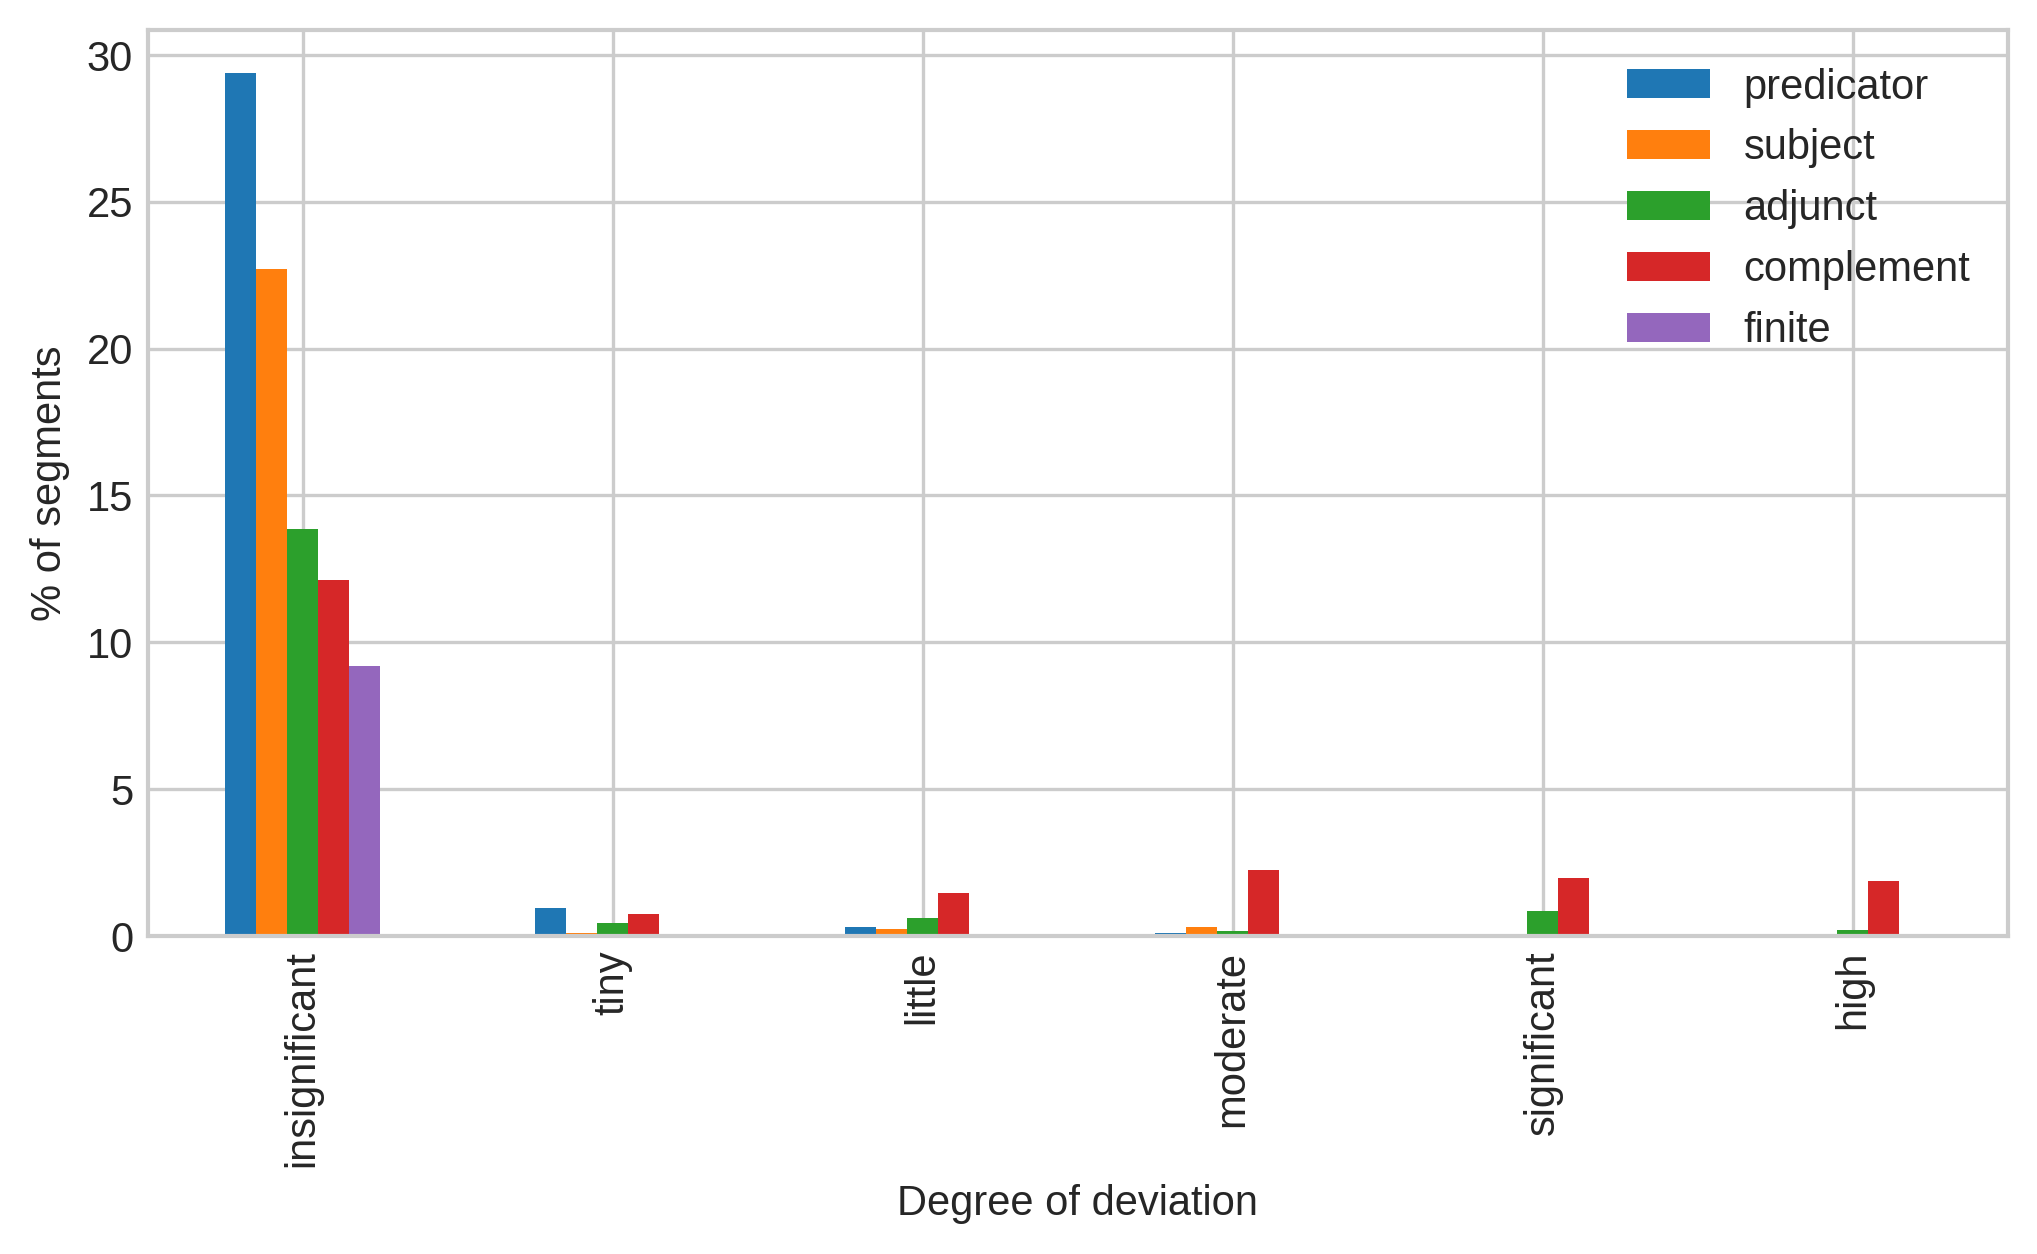

In [12]:
# # ---------
# matches, manual_nm, parse_nm = read_batch(OE1_const_file_list + BTC_const_file_list)
# # ---------

# # instead of droping a column, simply select the needed one
# d=matches.drop(columns=["Dist. Edit","Man Interval Start",
#                        "Man Interval End","Auto Interval Start",
#                        "Auto Interval End"], ) #axis=1
# # d = d["Dist. Geometric"]
# d.drop(d.loc[d['Man Features']=="verb"].index, inplace=True)

bin_edges = [0,3,5,10,20,50,250]
cats = ["insignificant","tiny","little","moderate","significant","high"]
d["shift"] = pd.cut(d["Dist. Geometric"],right=True, include_lowest=True, 
                    bins = bin_edges,
                    labels=cats)
dsp(d.describe())
# dsp(d)

groups = d.sort_values(["Dist. Geometric"],ascending=True).groupby(["shift","Man Features"], as_index=True)
# groups = d.sort_values(["Dist. Geometric"],ascending=True).groupby(["Man Features"], as_index=True)

# for i in groups:
#     print (i[0][0], i[0][1], i[1]["Man Features"].count()/len(d))
    

# turn the groups into a list of tuples
dd = pd.DataFrame([(i[0][0], i[0][1], i[1]["Man Features"].count()/len(d)*100) for i in groups]).pivot(columns=0, index=1, values=2)
dd = dd[cats].fillna(0).sort_values(by="insignificant",ascending=False, axis=0)
dd.index.name=None

dsp(dd)

dd.transpose().sort_values(by="insignificant",ascending=False, axis=1).plot.bar()

plt.xlabel("Degree of deviation")
plt.ylabel("% of segments")

# Transitivity elements: on matched featuires and precission, recall, f1 [OE + BTC]
* what is the precission, recall and f1 for all features

notebook_functions.py:159: RuntimeWarning: invalid value encountered in double_scalars
  return true_positives / (false_negatives + true_positives)


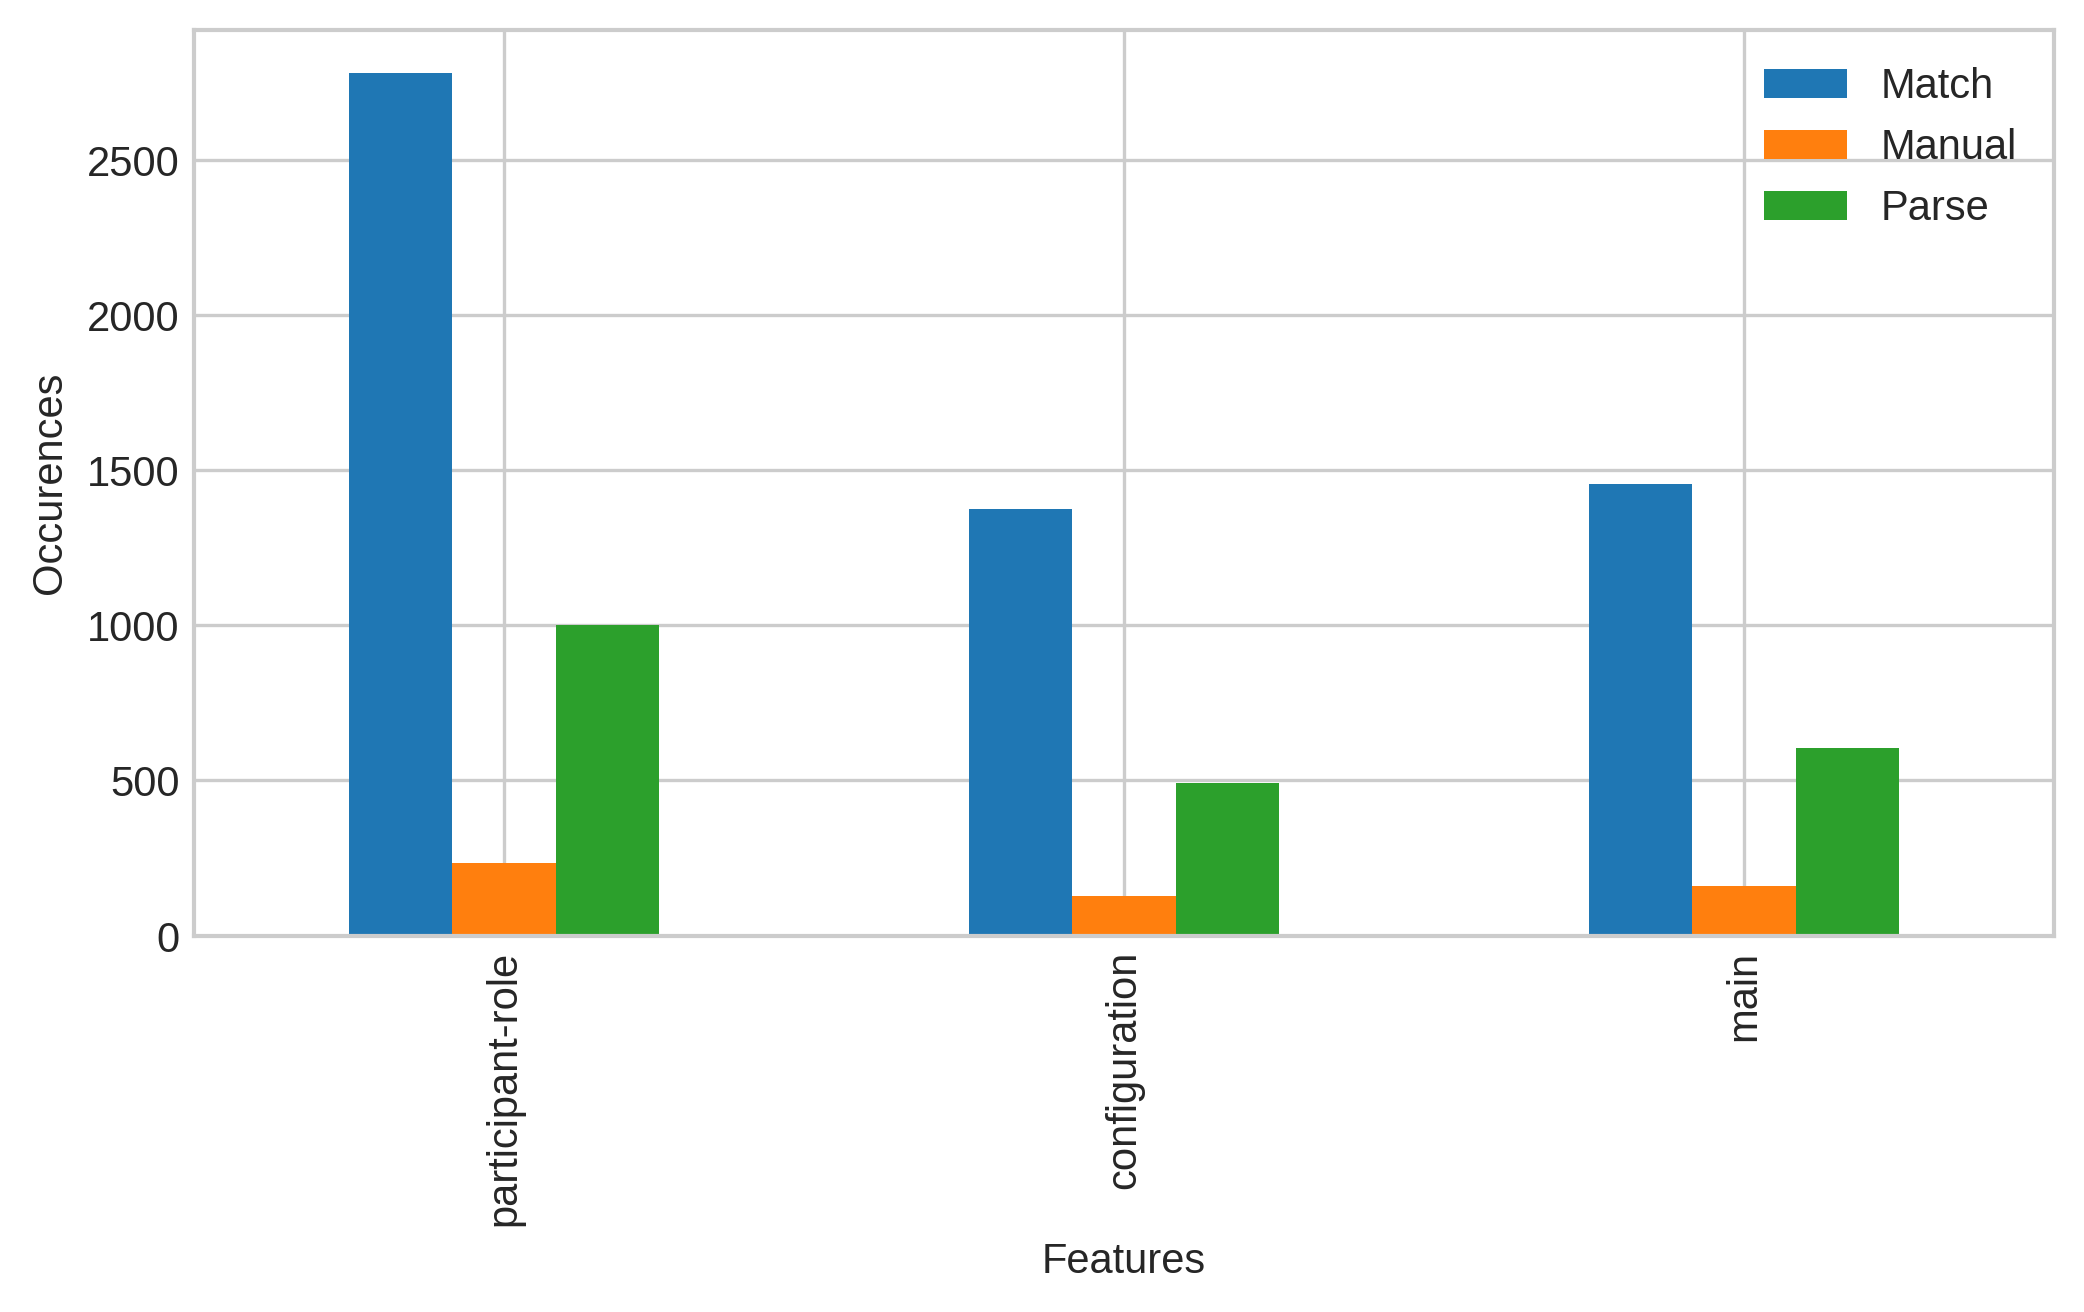

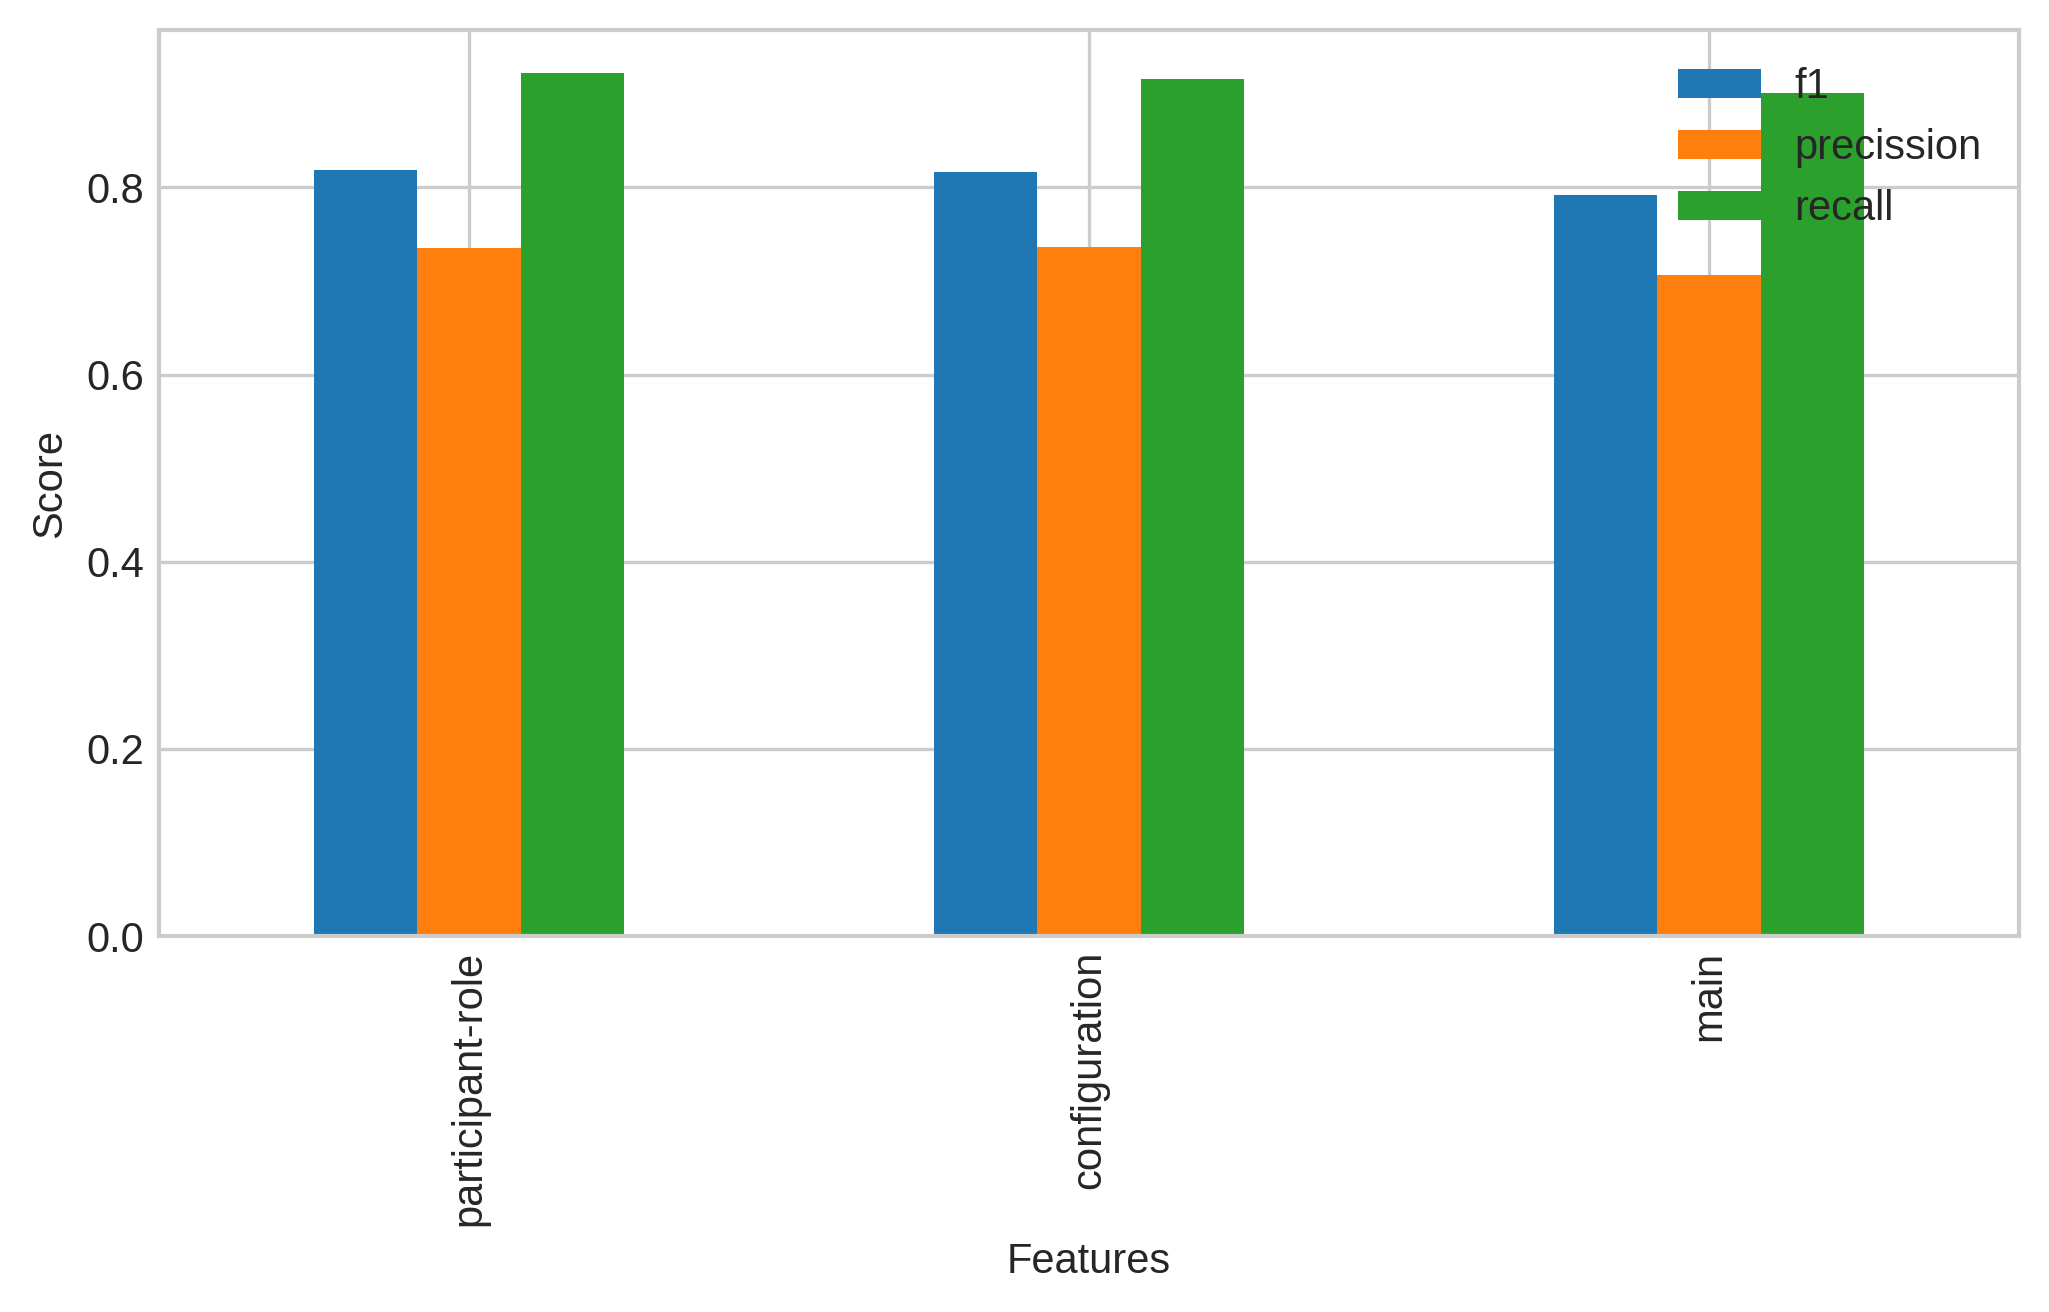

In [13]:
# ---------
matches, manual_nm, parse_nm = read_batch(OE1_const_file_list + BTC_const_file_list)
# ---------

stats = make_stats(matches, manual_nm, parse_nm, drops=["verb","process"])

# Transitivity features: on matched featuires and precission, recall, f1 [OE + BTC]
* what is the precission, recall and f1 for all features

In [14]:
# ---------
matches, manual_nm, parse_nm = read_batch( OE1_trans_file_list + BTC_trans_file_list )
# ---------
# stats = make_stats(matches, manual_nm, parse_nm,)

## Main transitivity types

notebook_functions.py:168: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * p * r / (p + r)


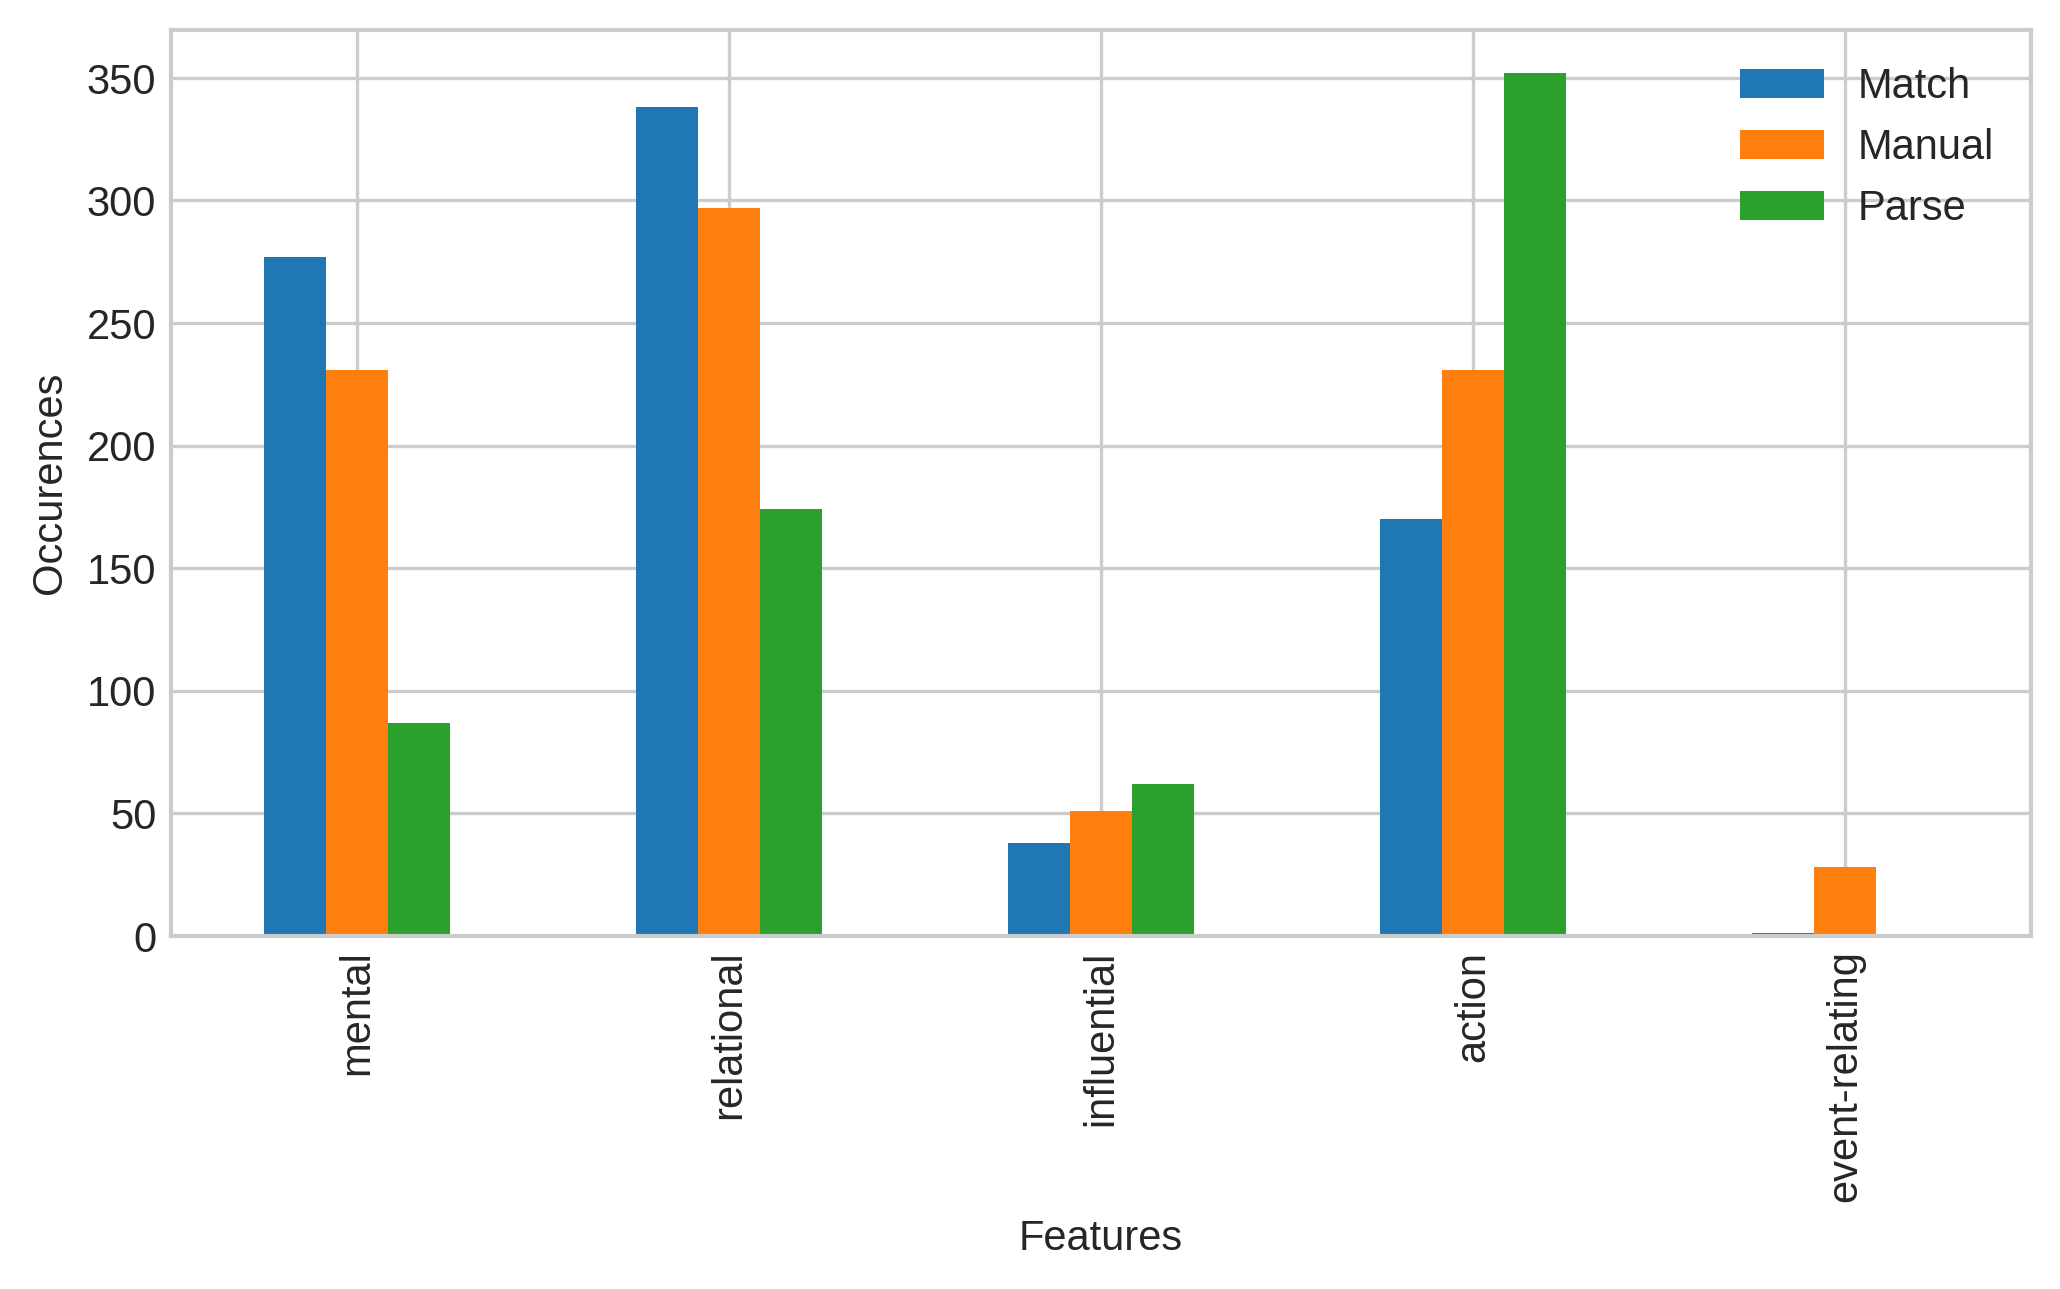

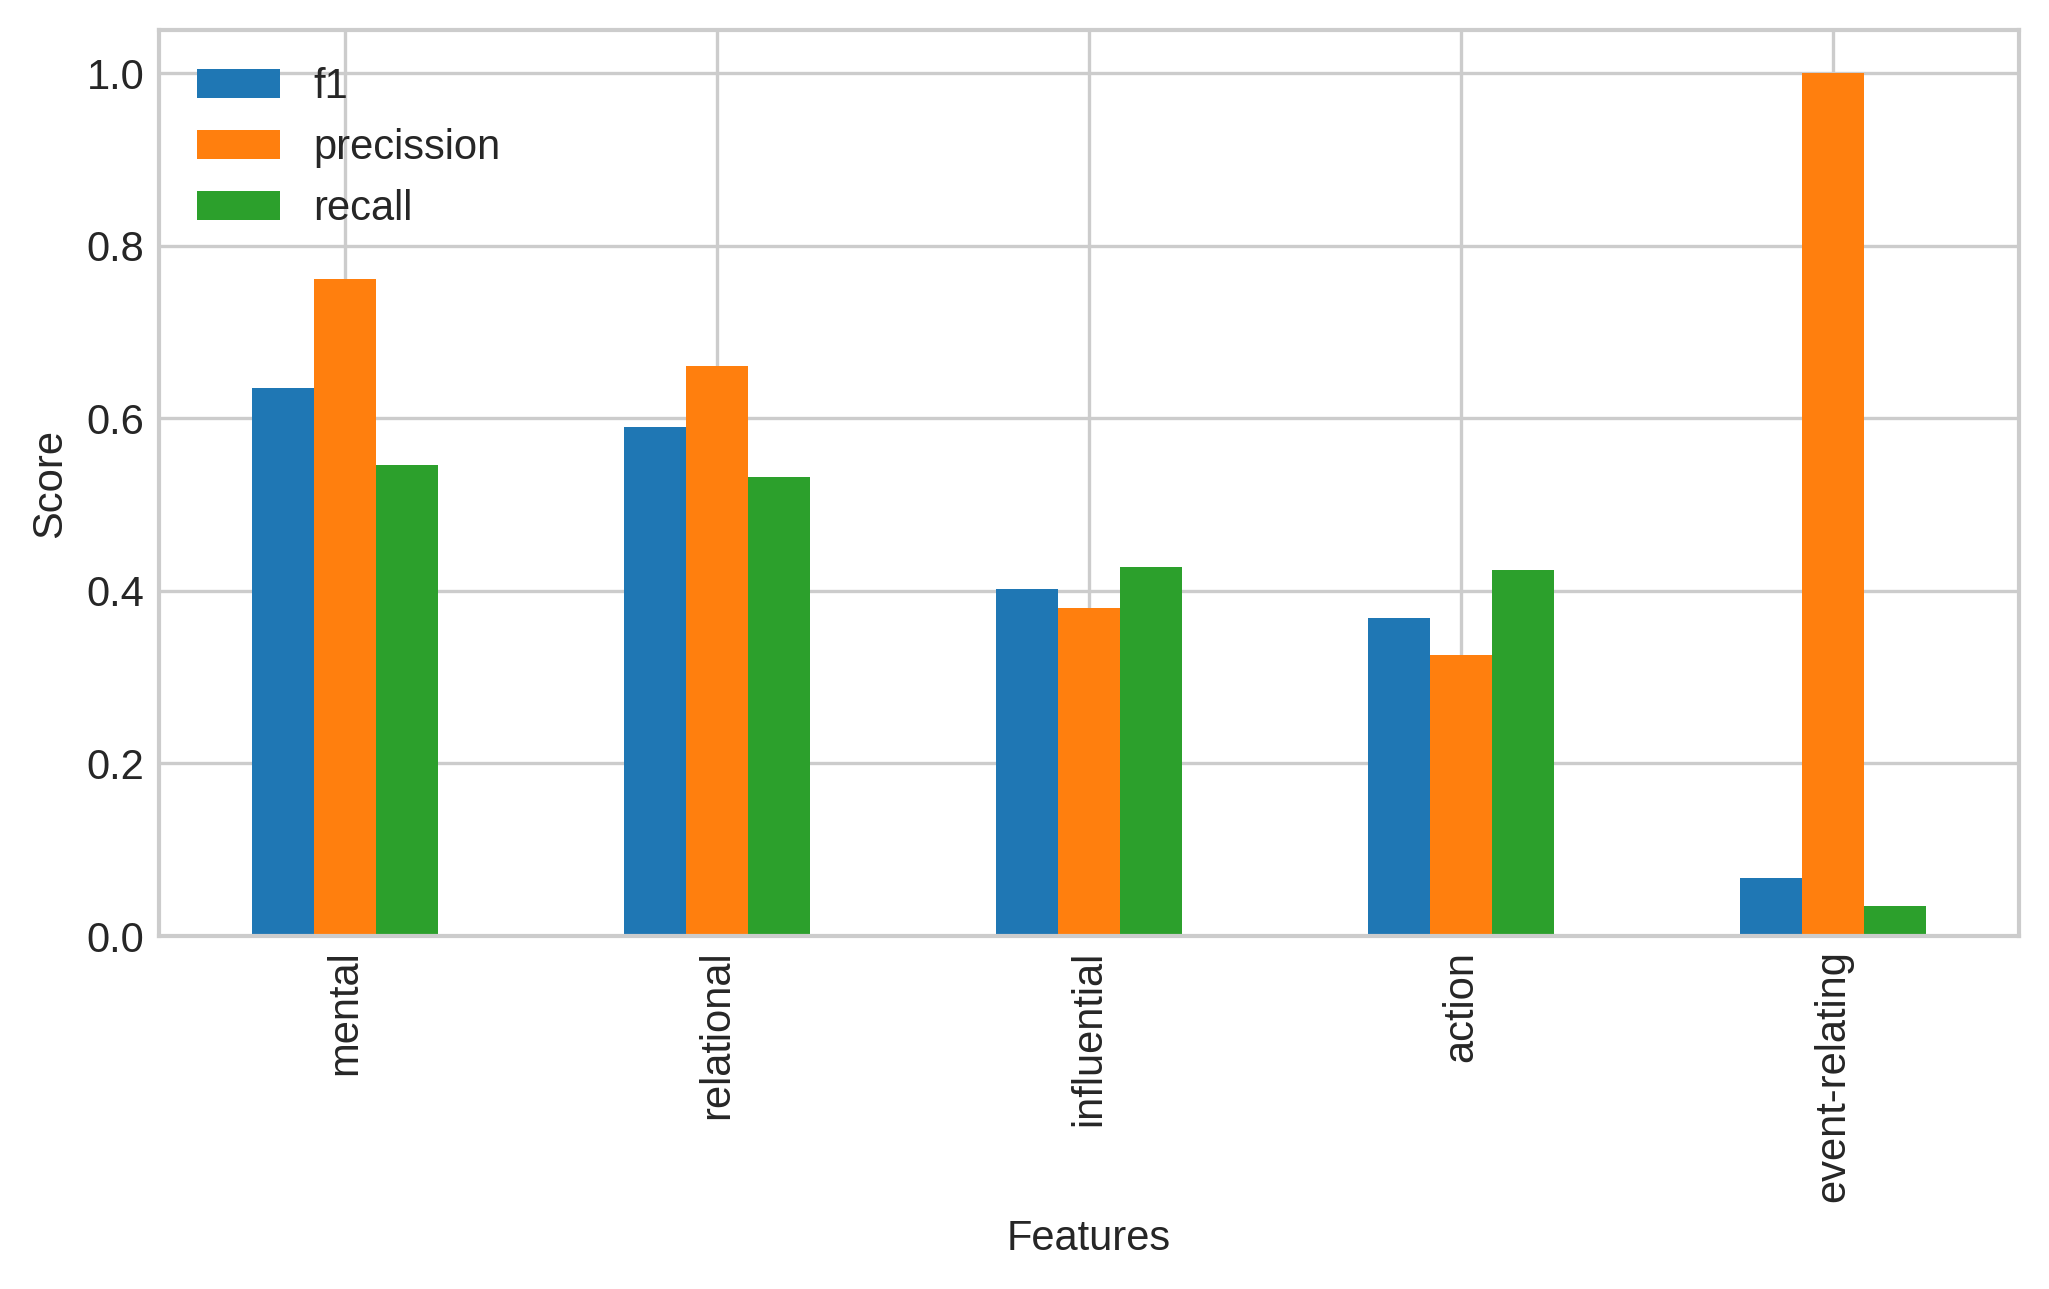

In [15]:
stats = make_stats(matches, manual_nm, parse_nm,
          filters=["action","mental","relational","influential","event-relating","environmental"])

notebook_functions.py:232: RuntimeWarning: invalid value encountered in double_scalars
  df["Match%"] = df.apply(lambda x: x["Match"] / df["Match"].sum() * 100 ,axis=1)
notebook_functions.py:236: RuntimeWarning: invalid value encountered in double_scalars
  df["Manual%"] = df.apply(lambda x: (x["Manual"]) / (x["Match"] + x["Manual"]) * 100 ,axis=1)


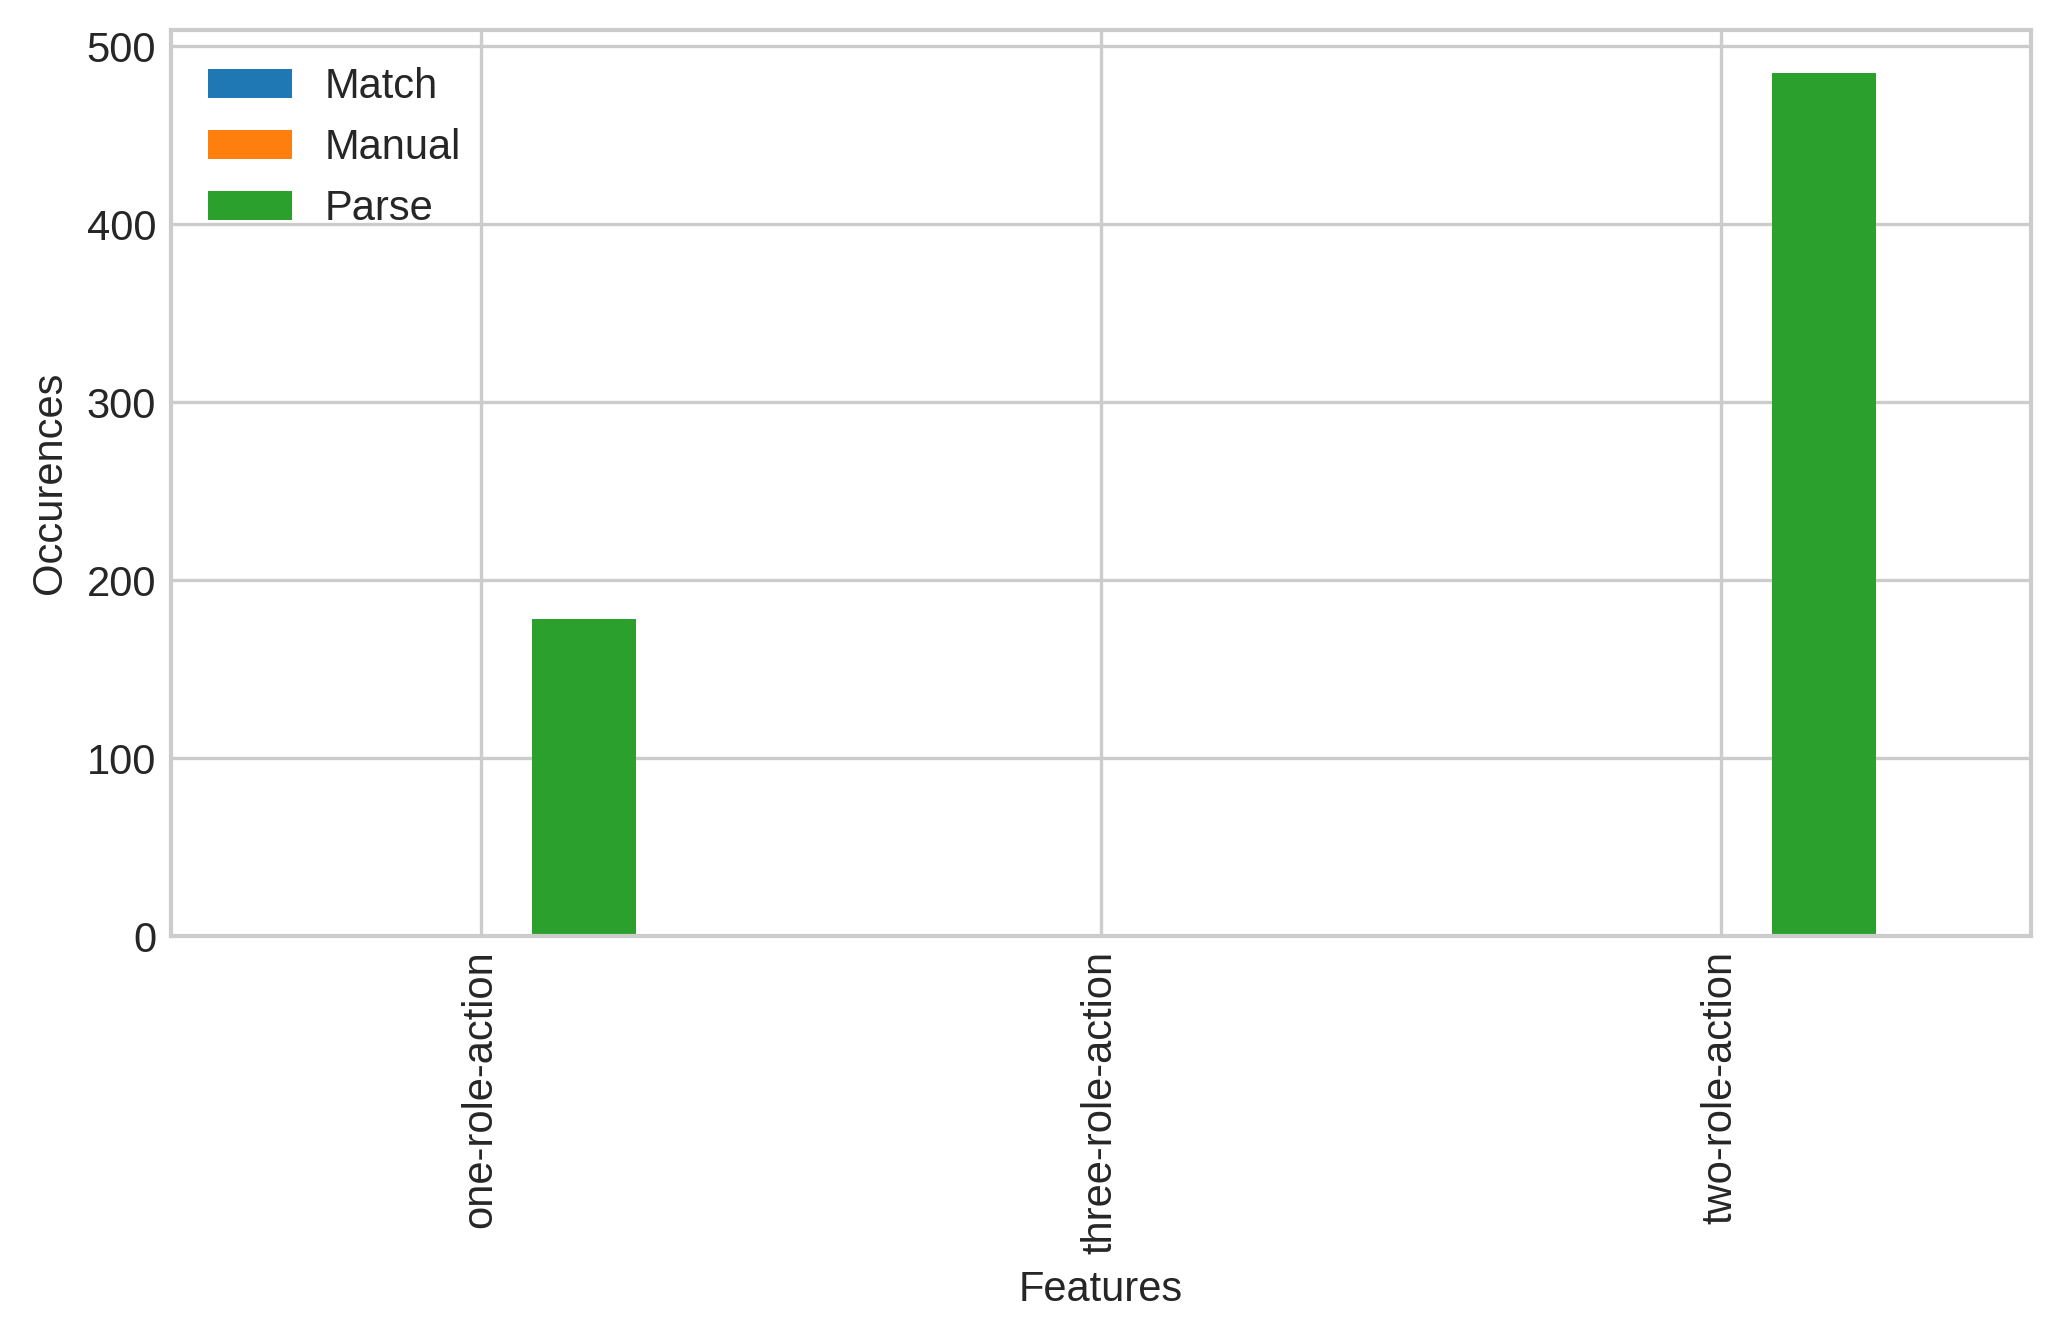

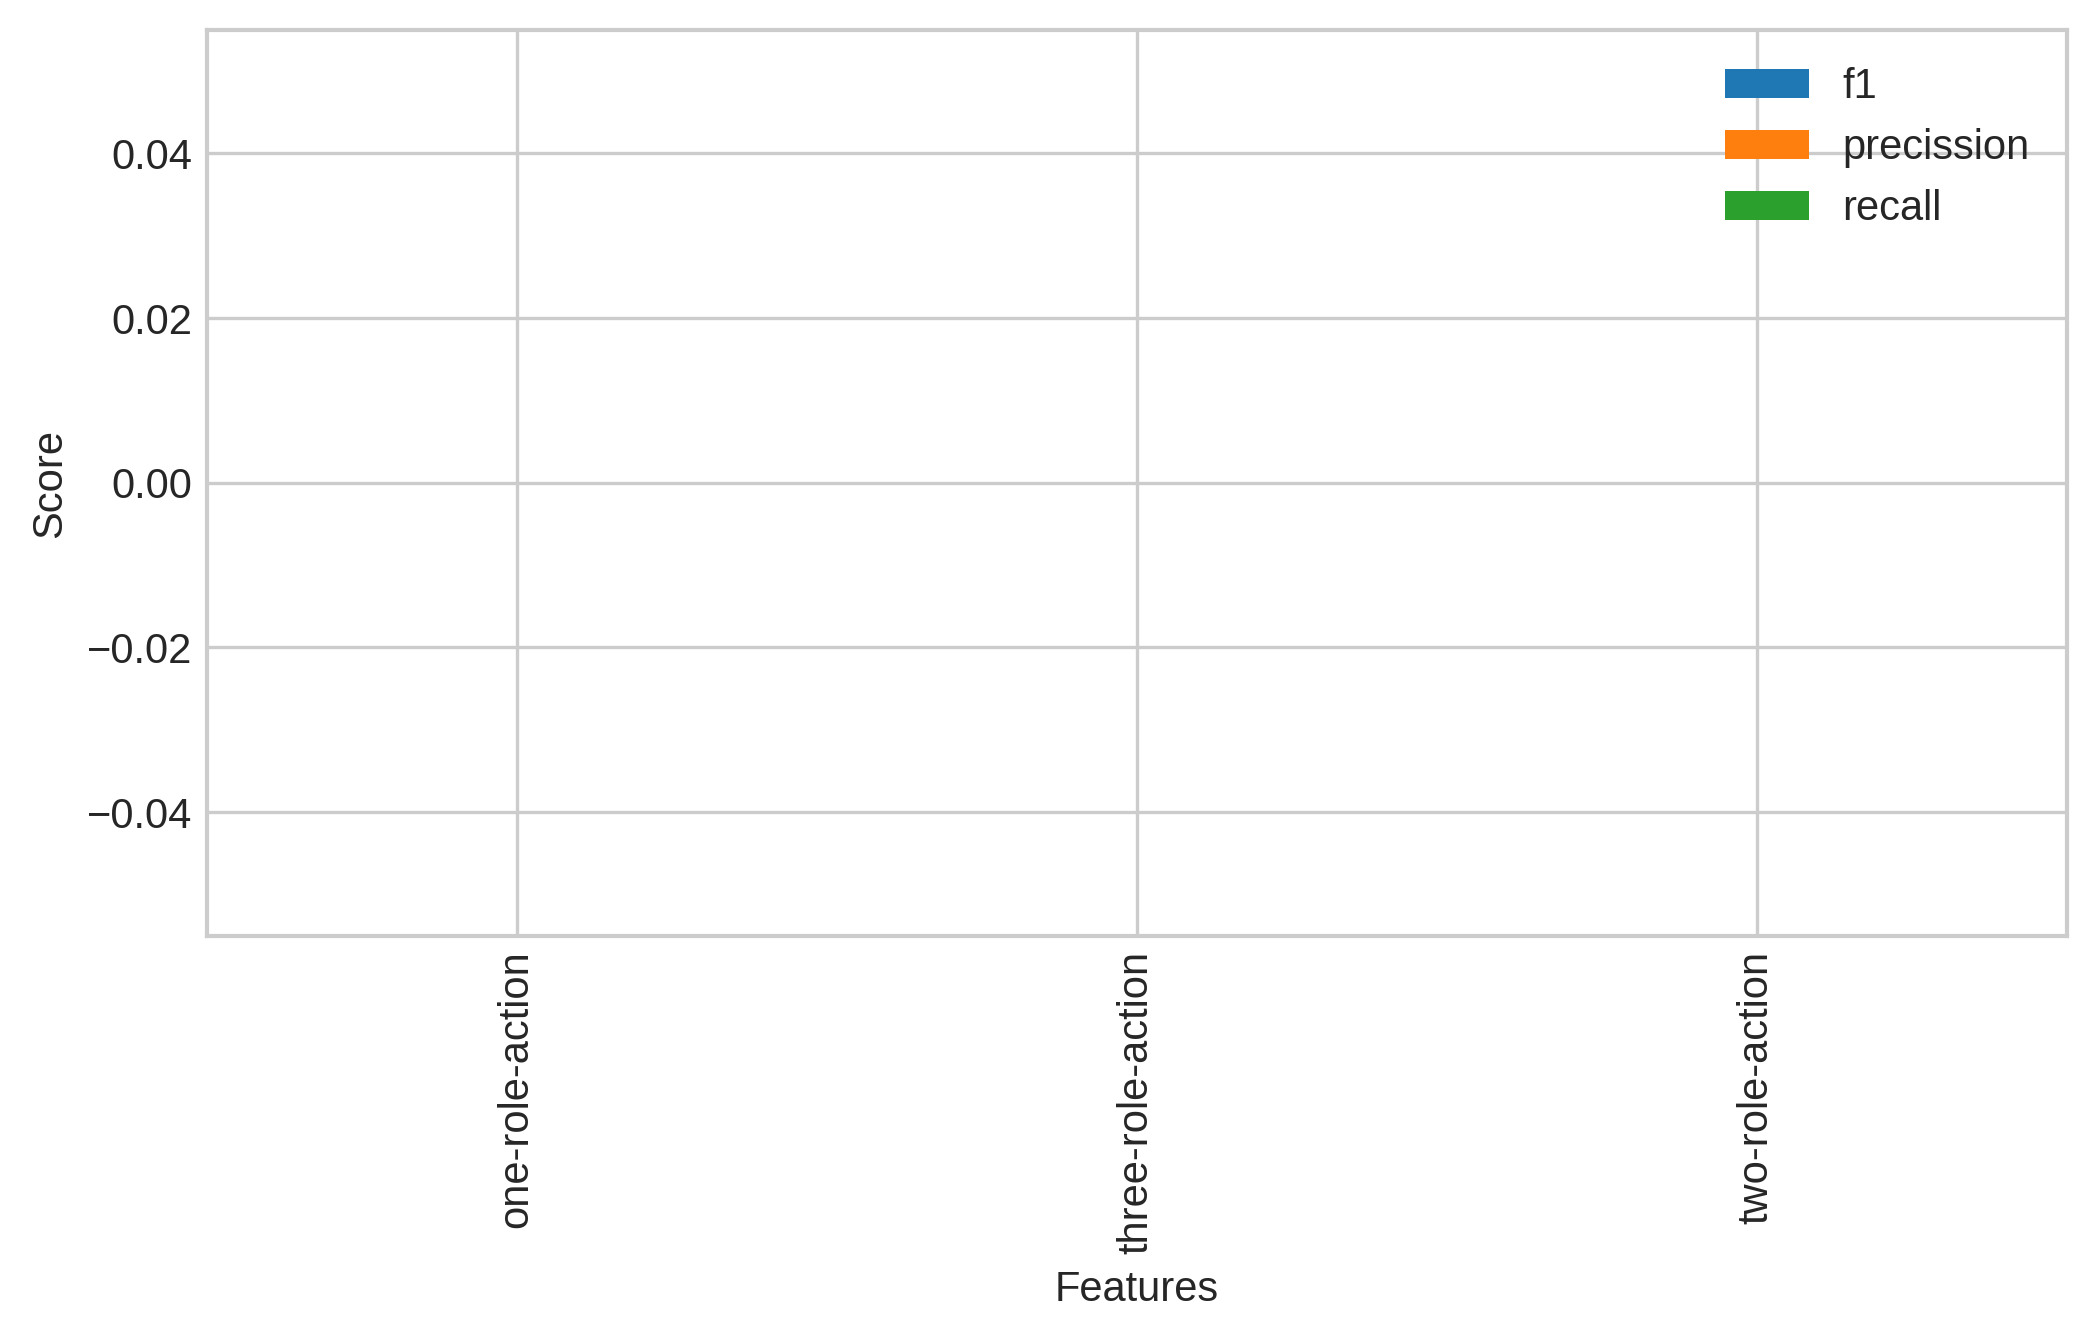

In [16]:
stats = make_stats(matches, manual_nm, parse_nm,
          filters=[
#                   "action",
                   "one-role-action","three-role-action","two-role-action"])


## Relational

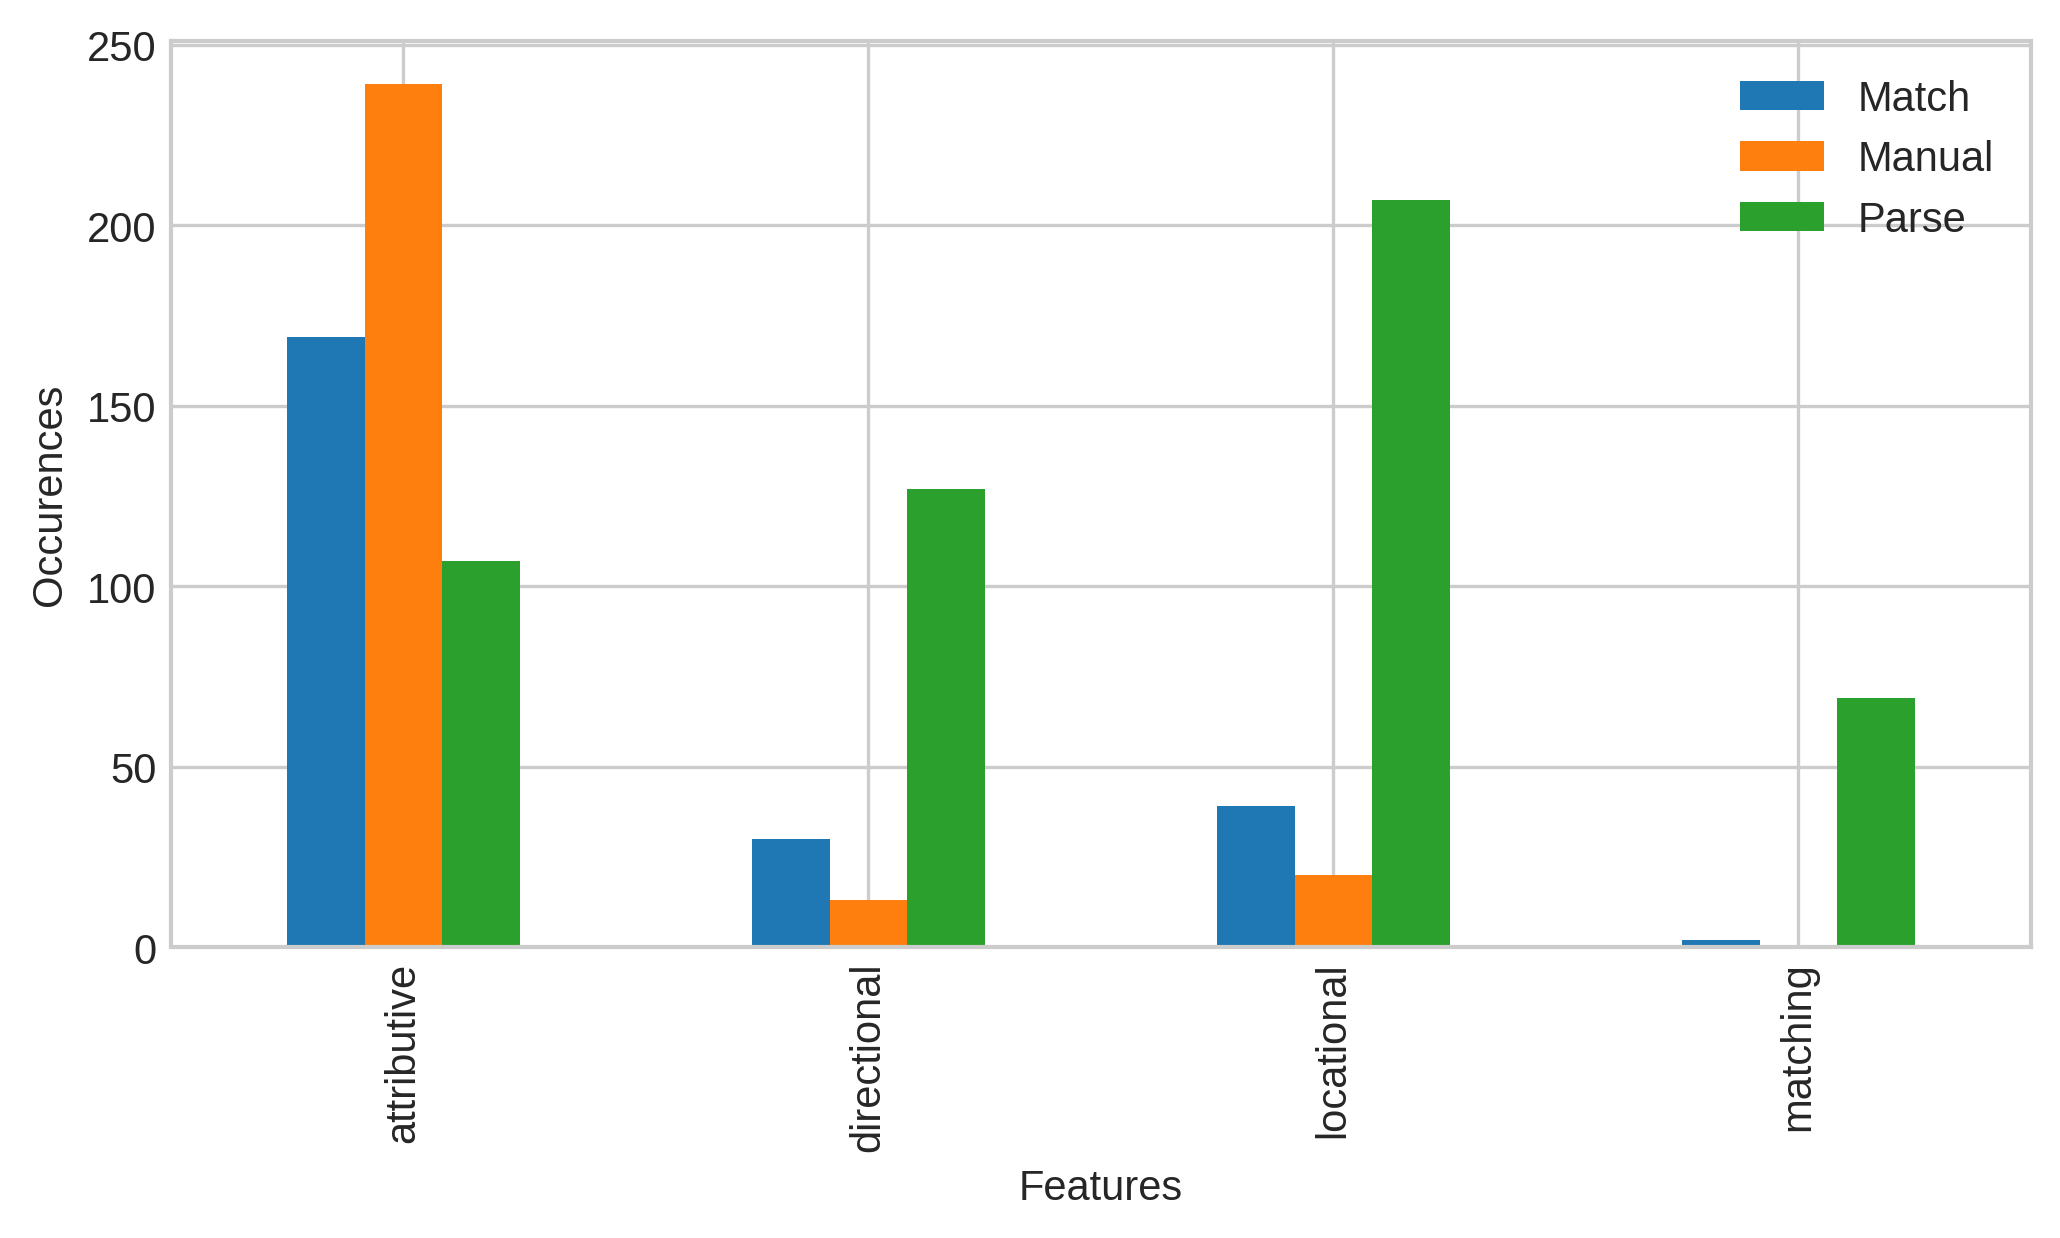

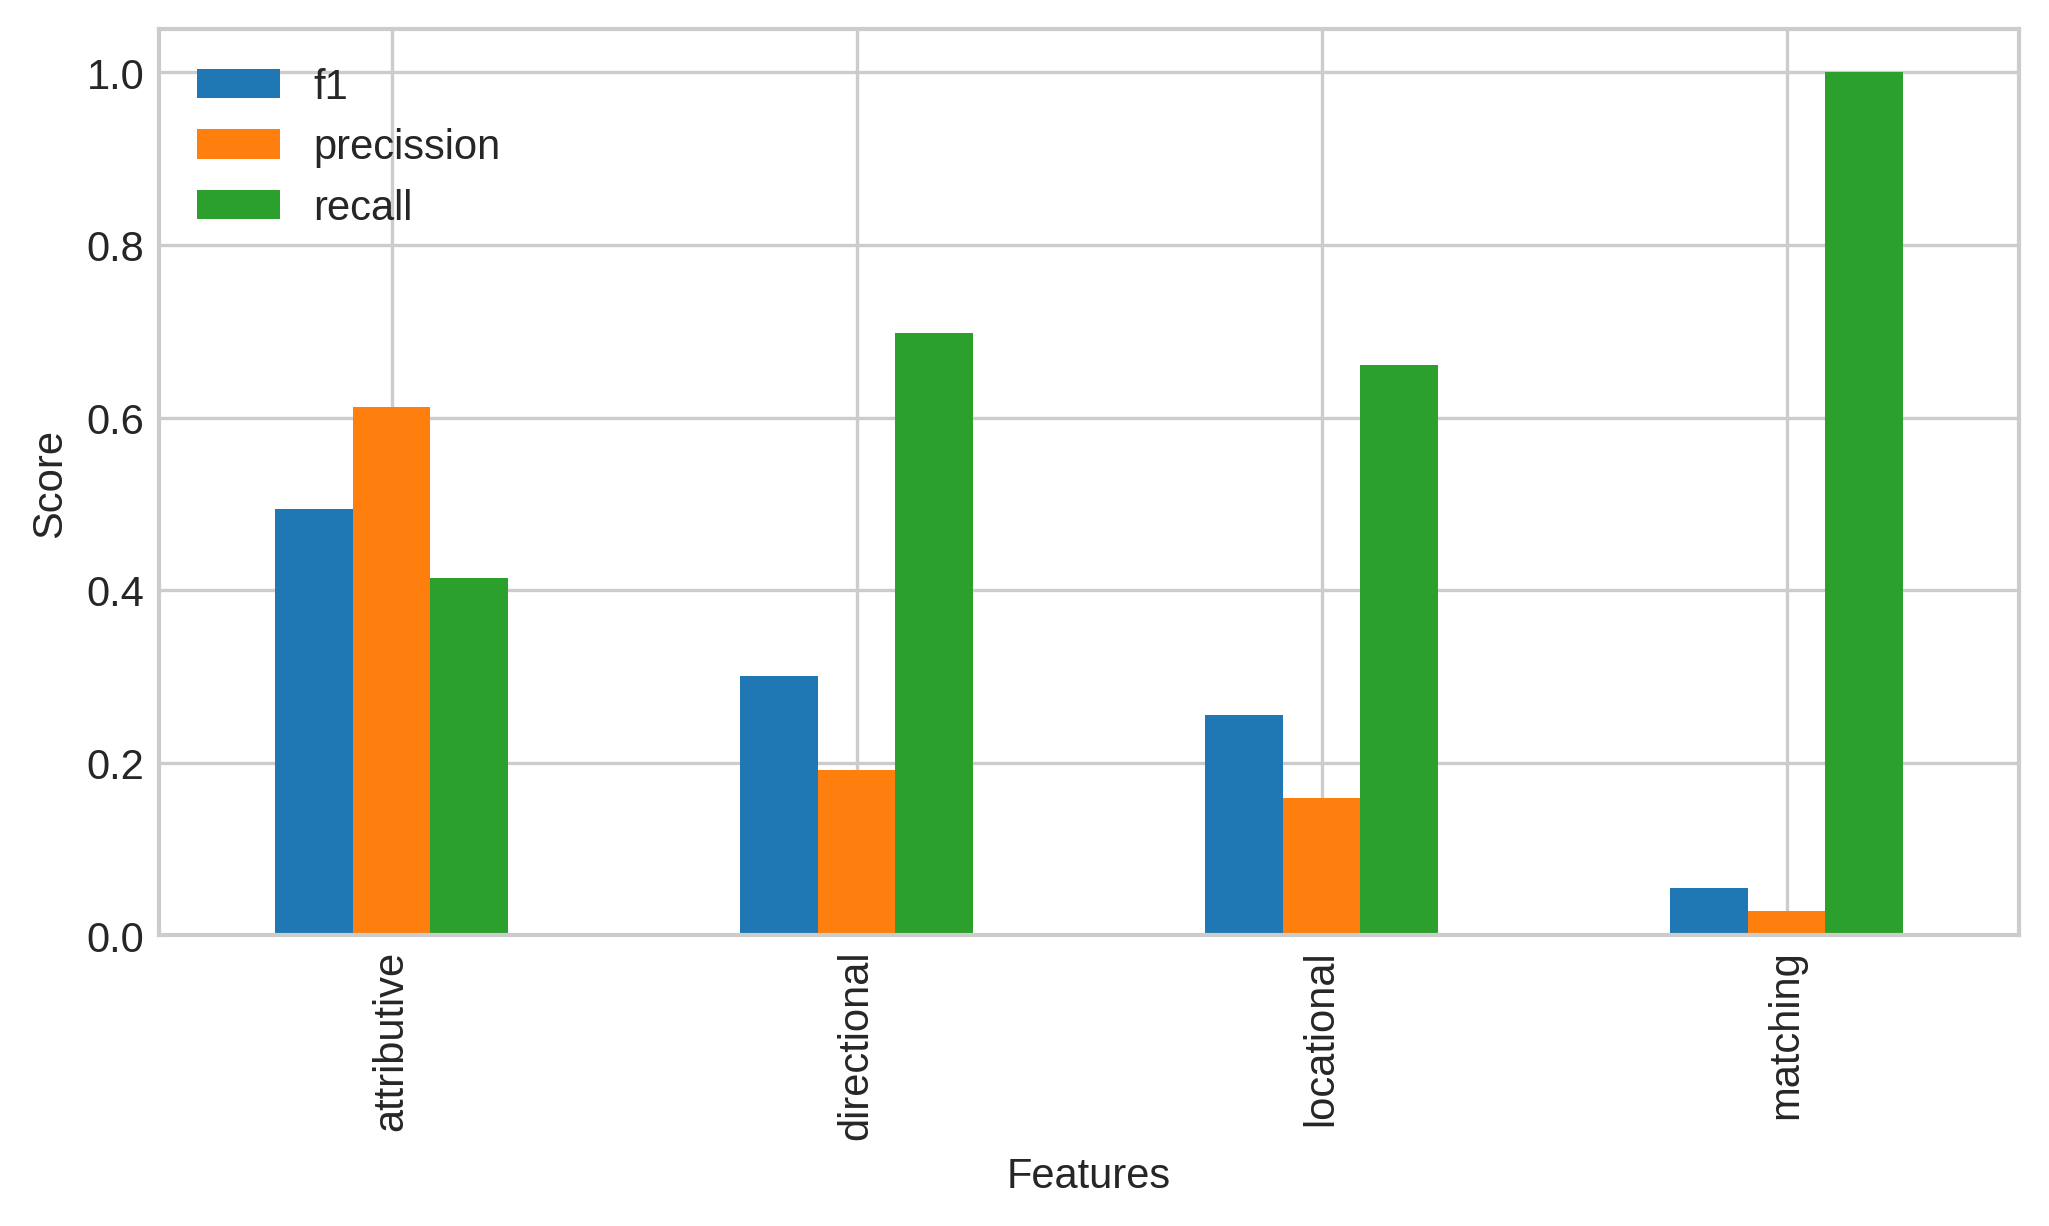

In [17]:
stats = make_stats(matches, manual_nm, parse_nm,
          filters=[
#                   "relational",
                   "attributive","posessive","locational","directional","matching"])

## Mental 

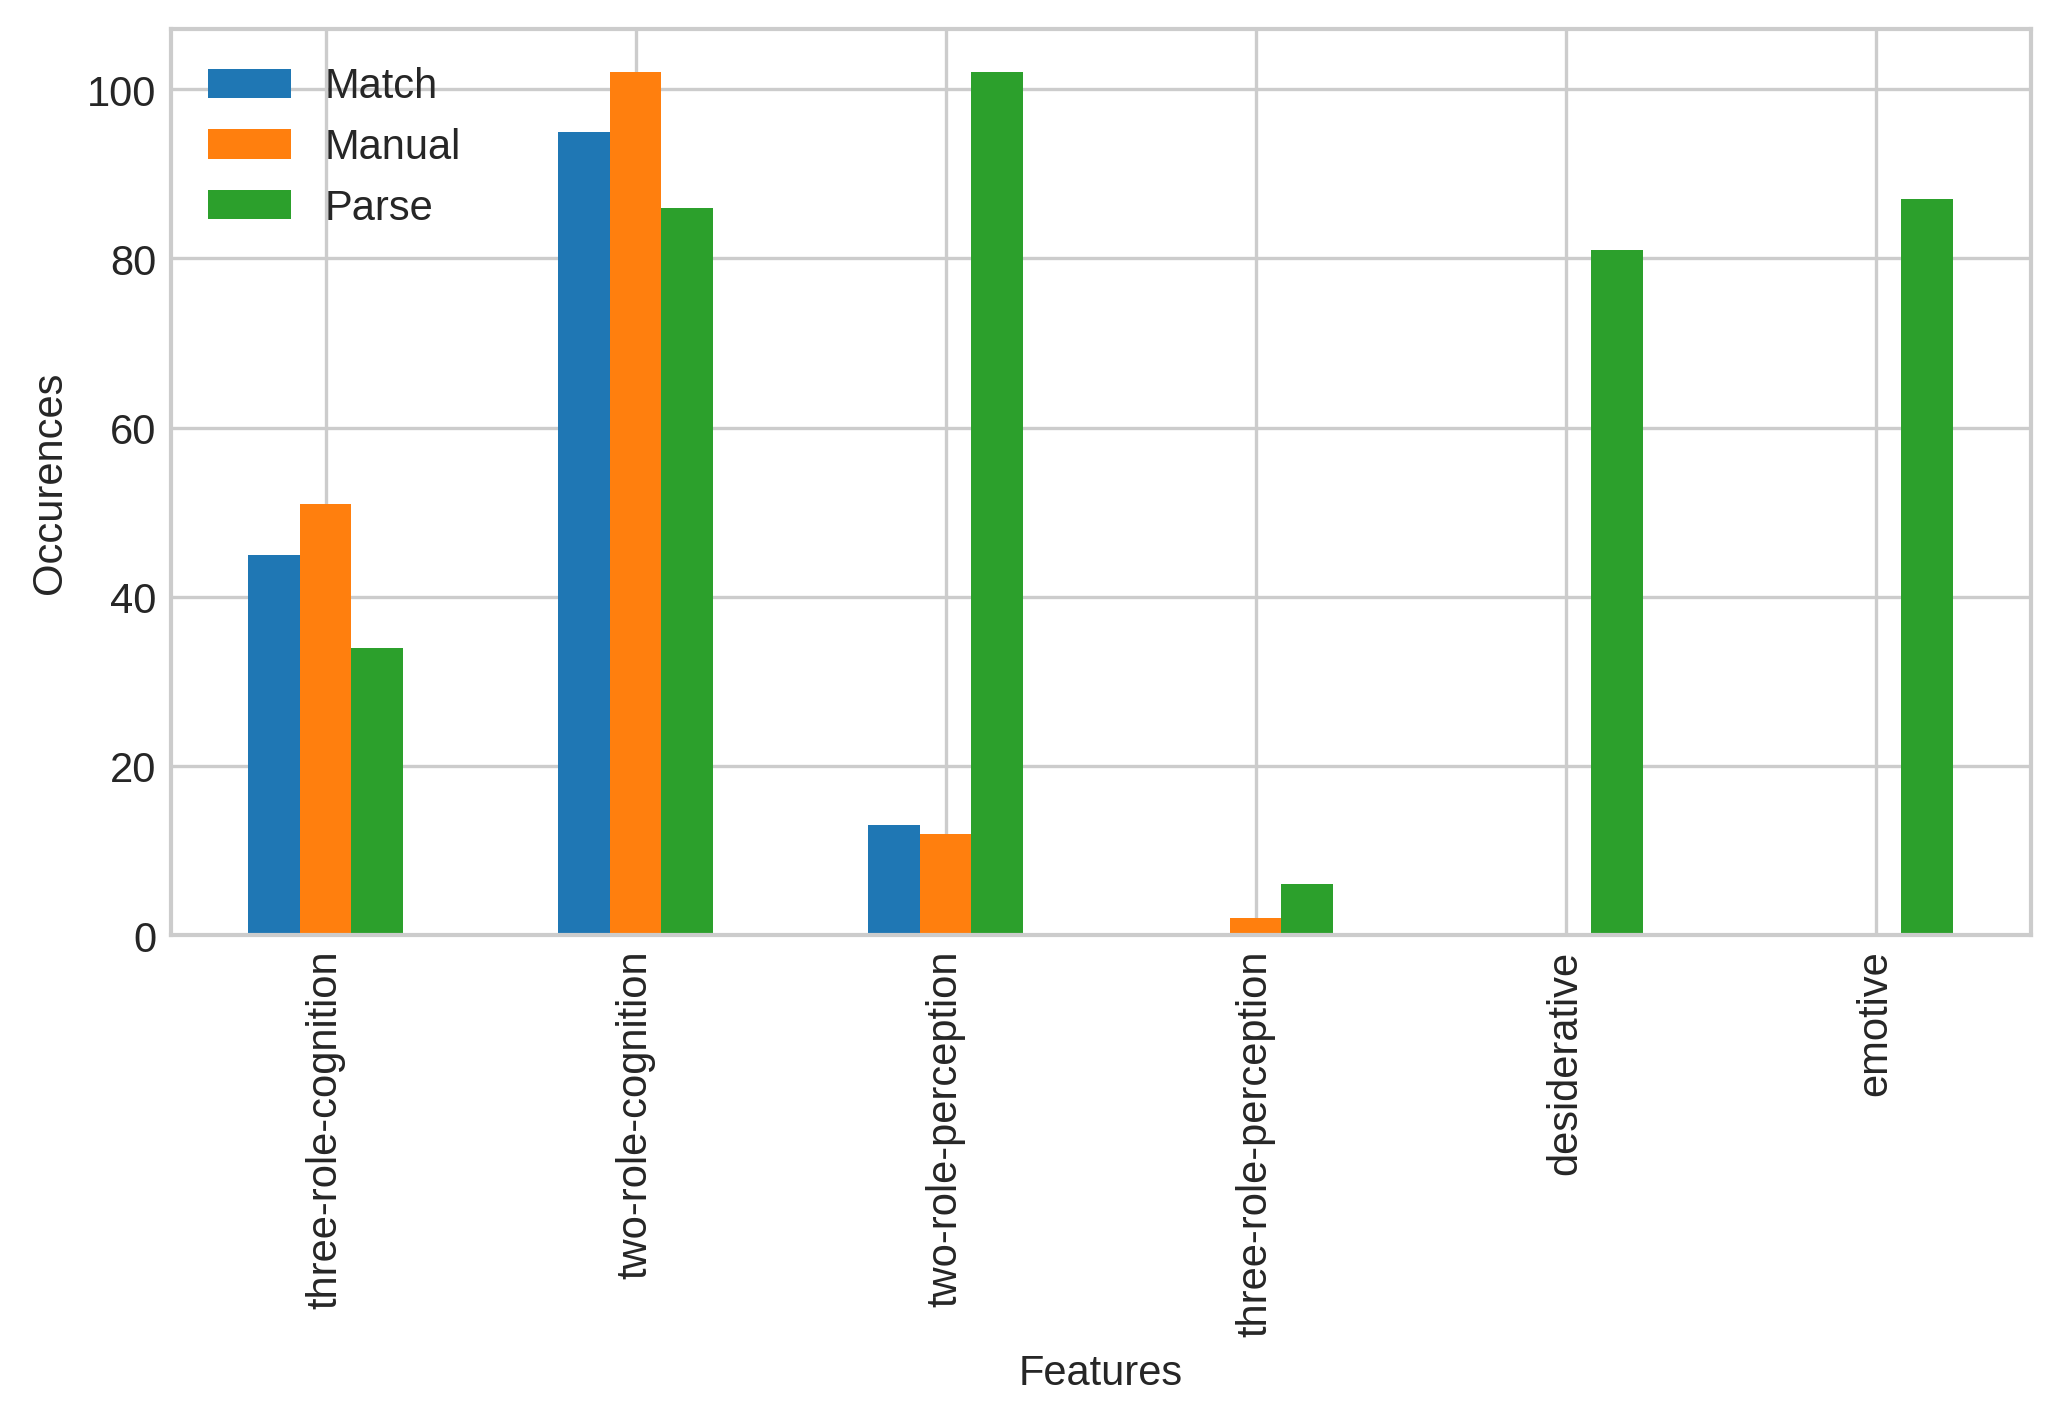

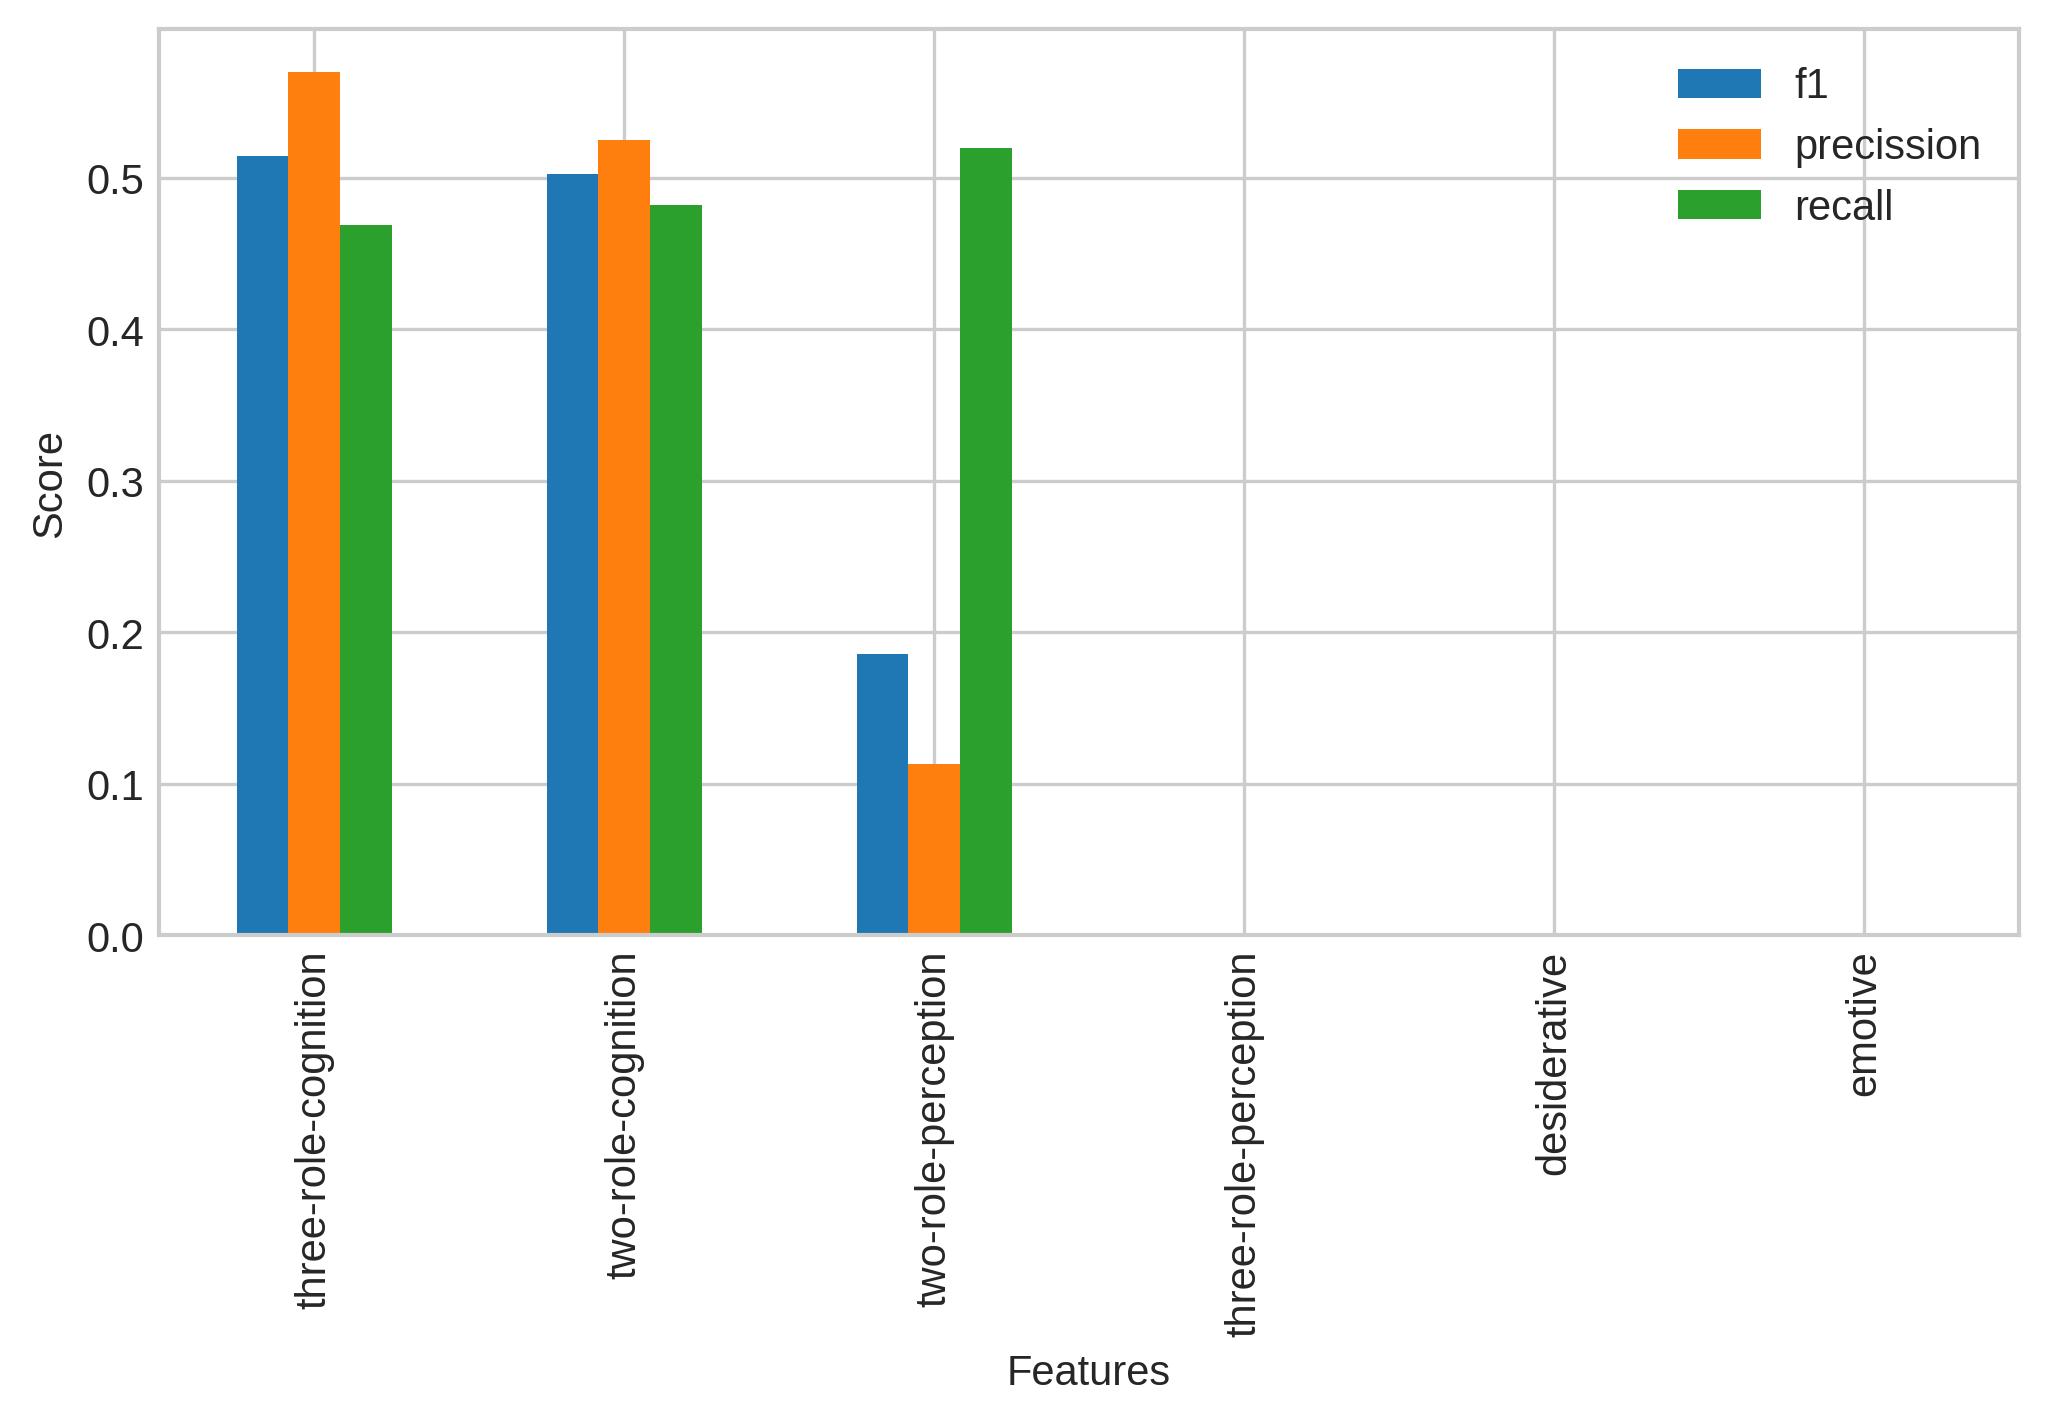

In [18]:
stats = make_stats(matches, manual_nm, parse_nm,
          filters=[
#                   "mental",
                   "emotive","three-role-perception","two-role-perception","three-role-cognition",
          "two-role-cognition","desiderative"])

## Influential

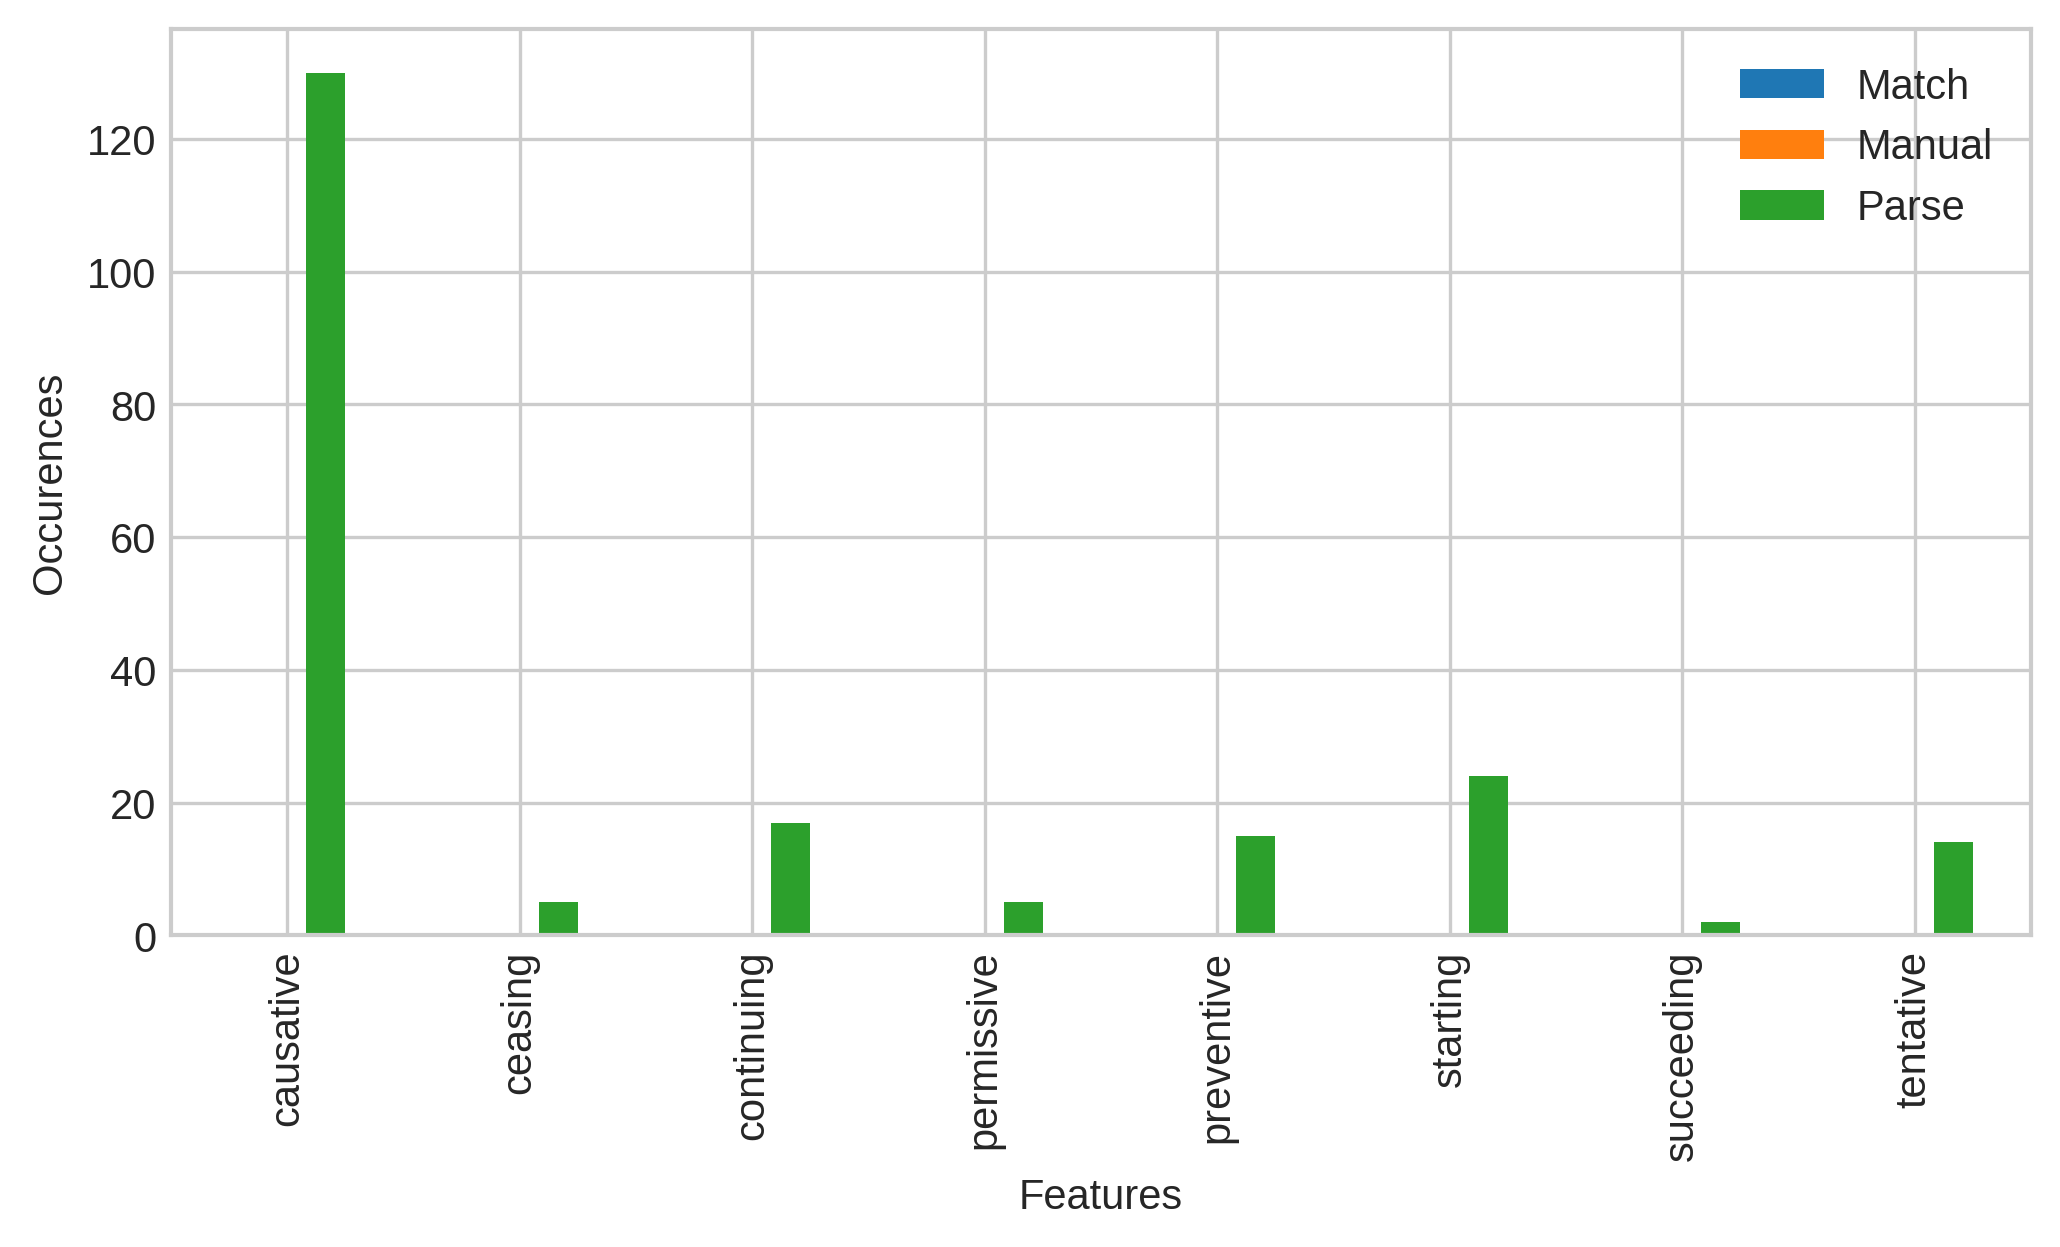

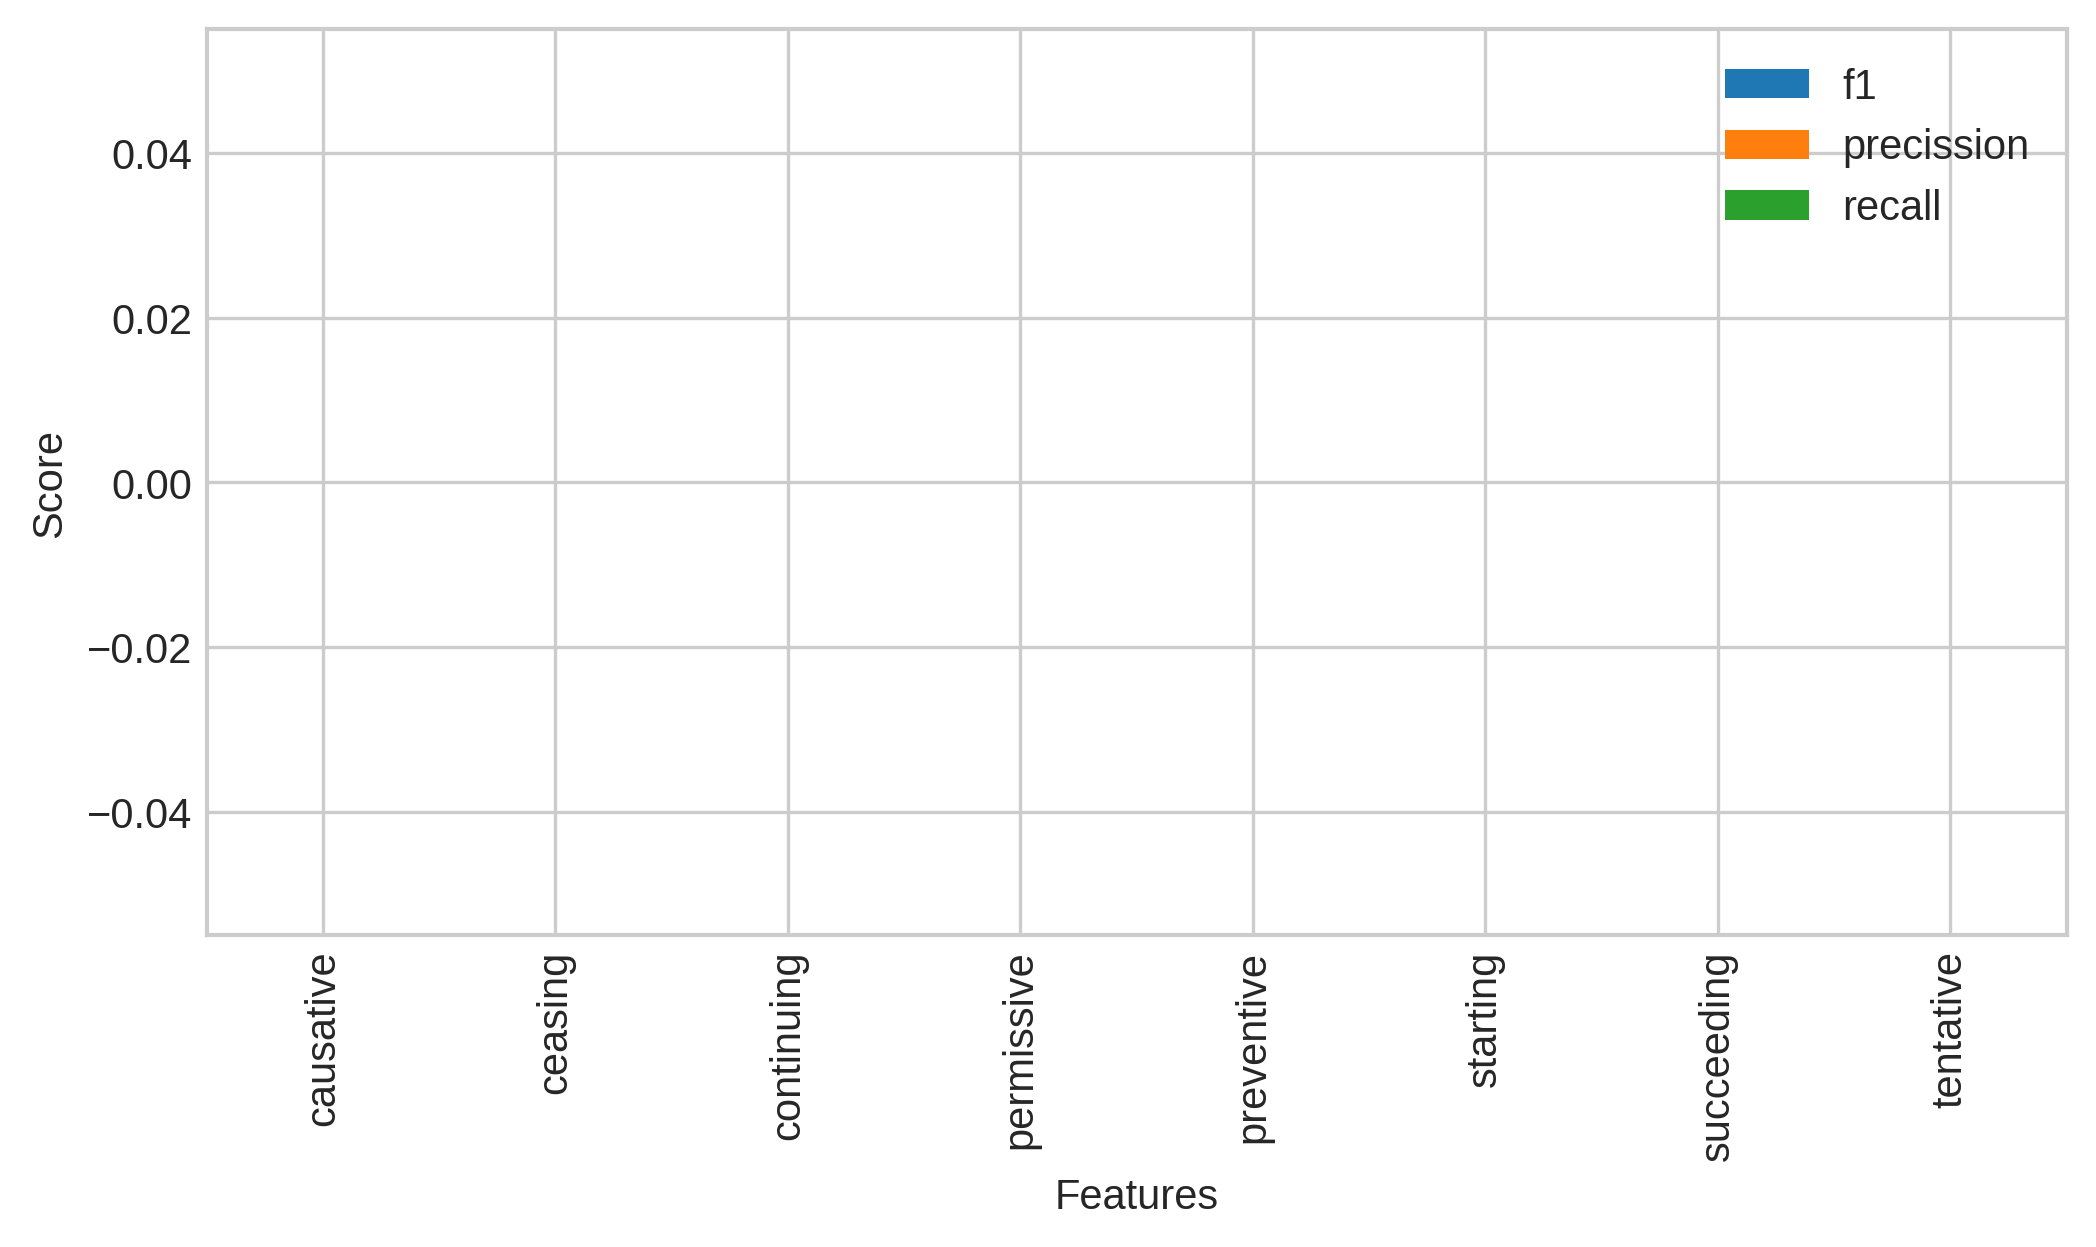

In [19]:
stats = make_stats(matches, manual_nm, parse_nm,
          filters=[
#               "influential", 
                   "preventive","starting","continuing","ceasing","succeeding","failing",
               "causative","permissive","tentative","enabling","preventive","delaying"])

## Mental and Relational ratios of manual to parse segments


In [20]:
data = pd.DataFrame({"Manual":[508,635,320,512,], "Parse":[364,512,549,750]}, 
                    index=["mental","relational","mental-types","relational-types"])

dsp(data)

data.loc[["mental","mental-types"],:]

# data.loc["mental",:].plot.pie(figsize=(4, 4))
# plt.figure()
# data.loc["mental-types",:].plot.pie(figsize=(4, 4))
# plt.figure()
# data.loc["relational",:].plot.pie(figsize=(4, 4))
# plt.figure()
# data.loc["relational-types",:].plot.pie(figsize=(4, 4))

Manual  Parse
mental           508    364
mental-types     320    549

## Participant roles

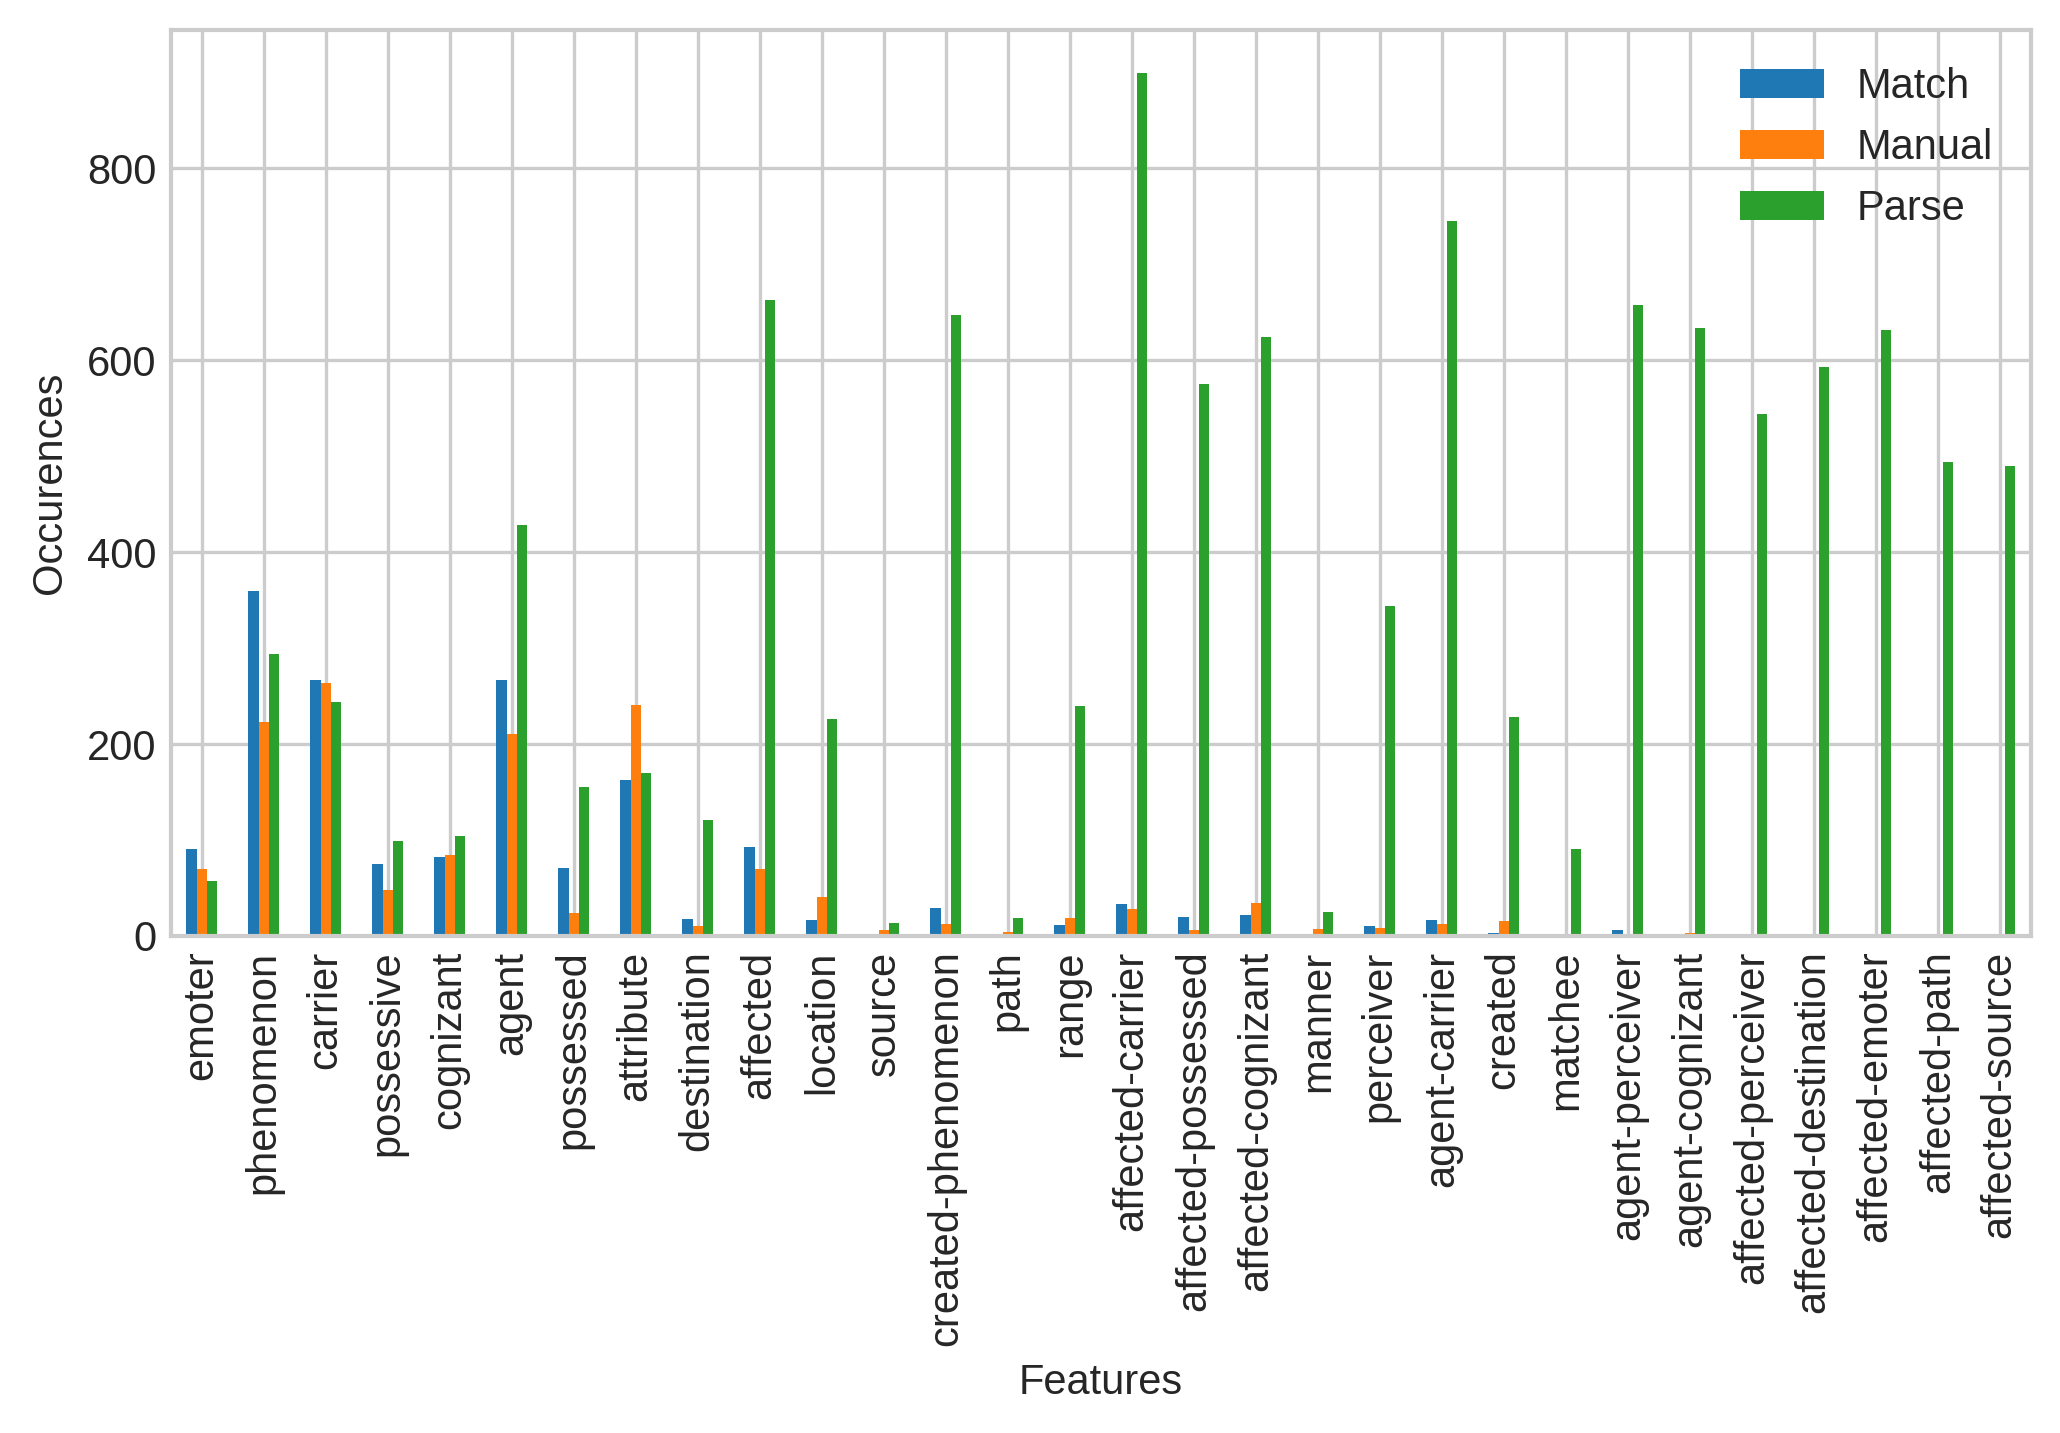

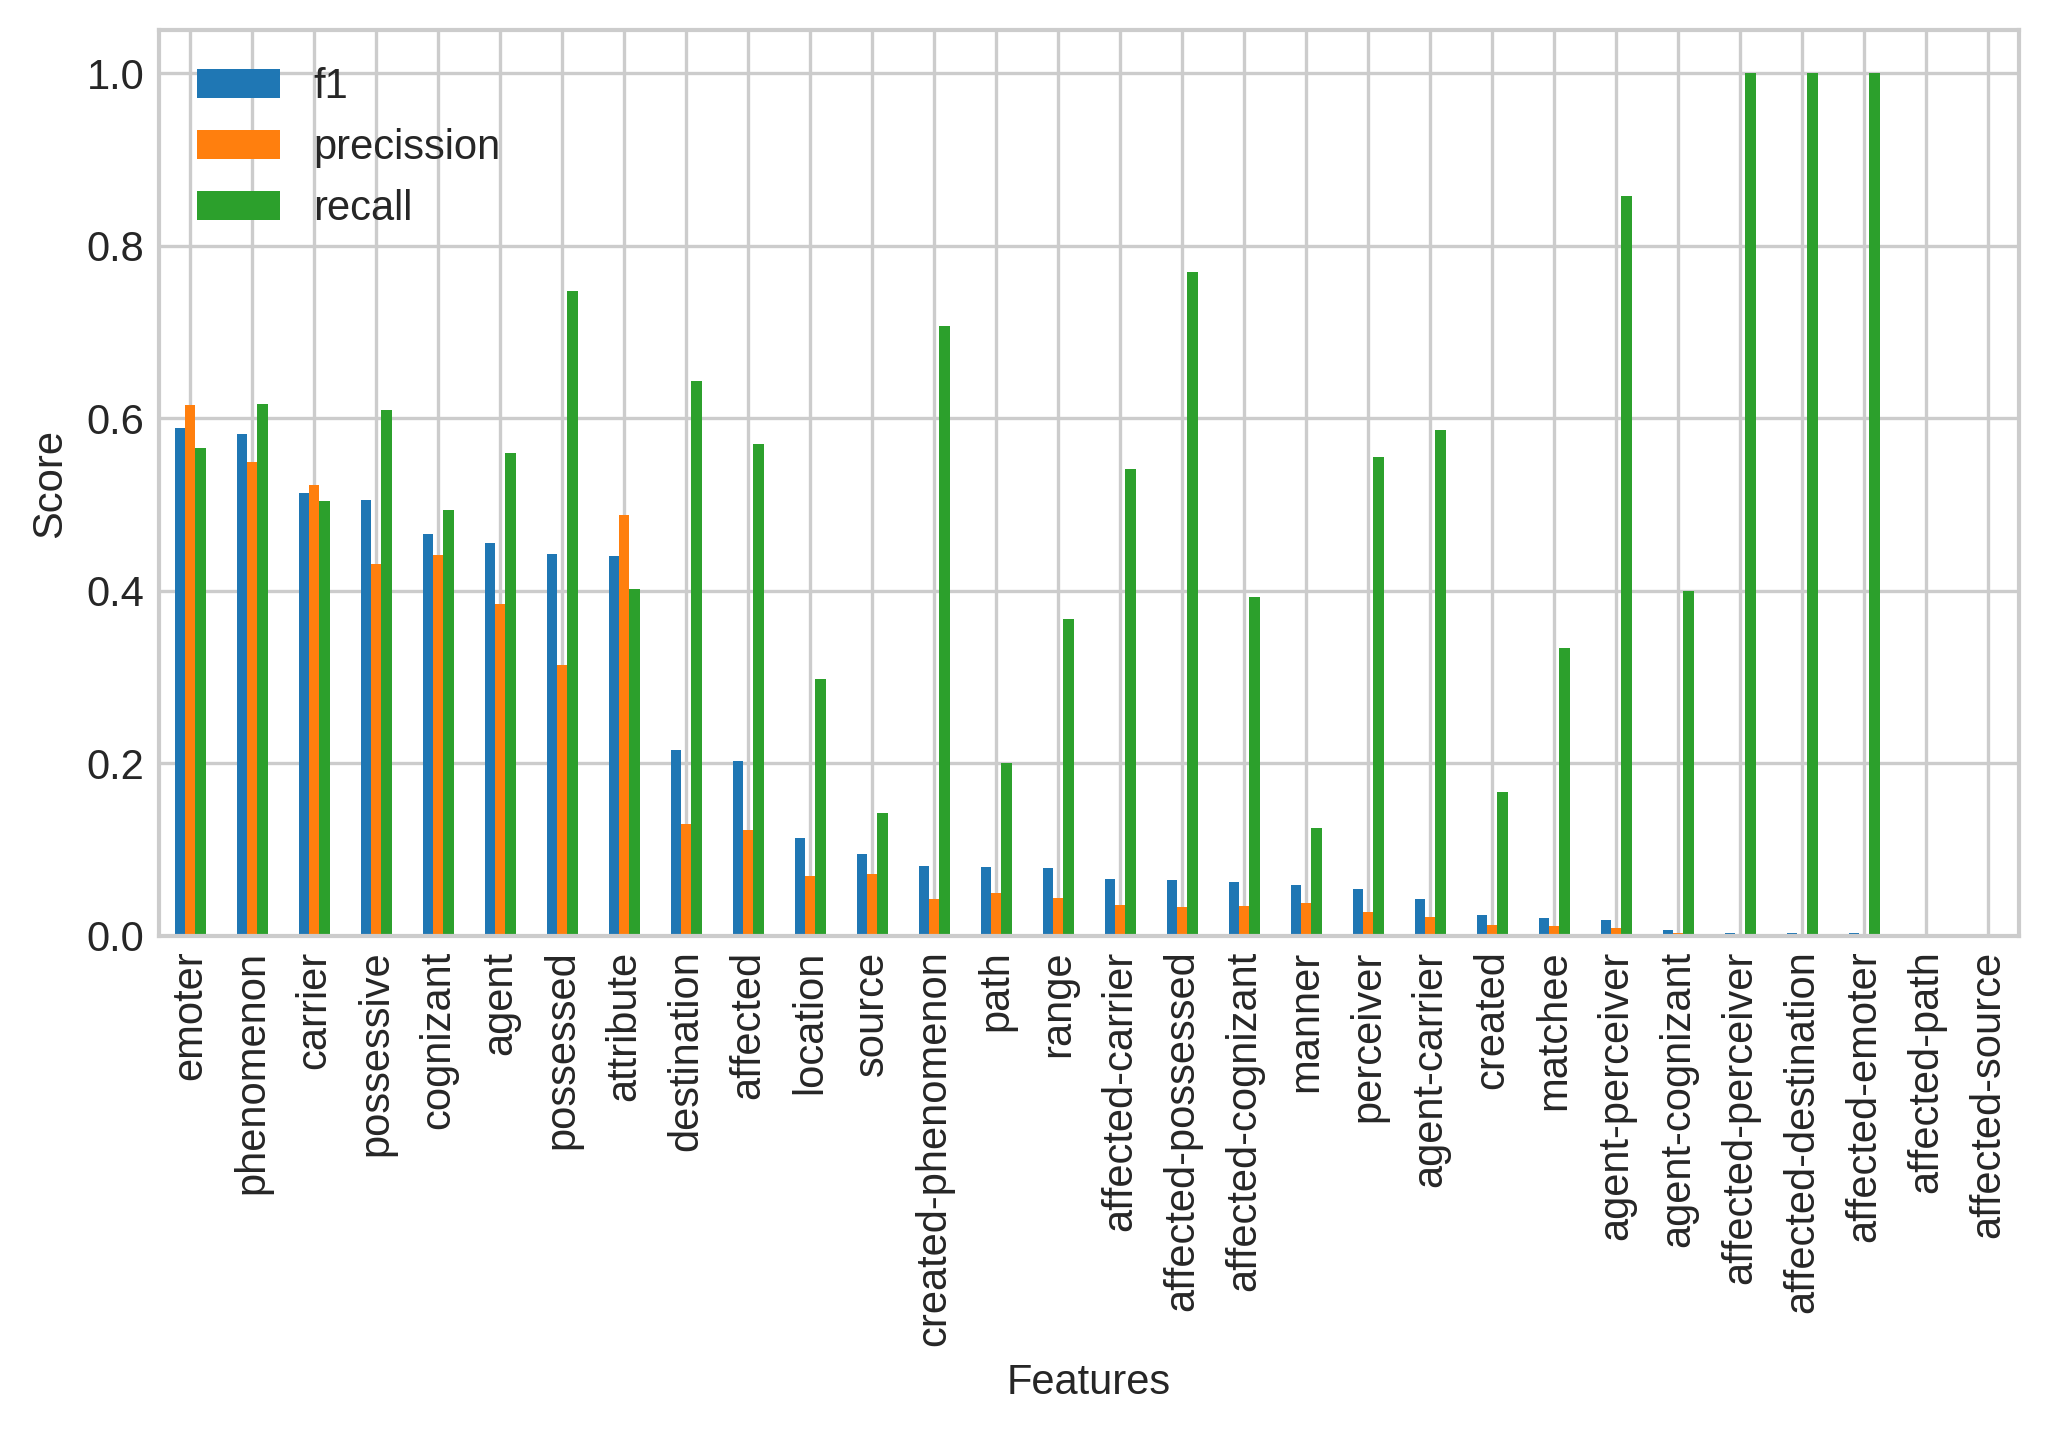

In [21]:
stats = make_stats(matches, manual_nm, parse_nm,
          filters=["emoter","phenomenon","carrier","possessive","cognizant","agent",
                "possessed","attribute","destination","affected","location","source",
                "created-phenomenon","path","range","affected-carrier","affected-possessed",
                "affected-cognizant","manner","perceiver","agent-carrier","created","matchee",
                "agent-perceiver","agent-cognizant","affected-destination","affected-emoter",
                "affected-perceiver","affected-path","affected-source"])


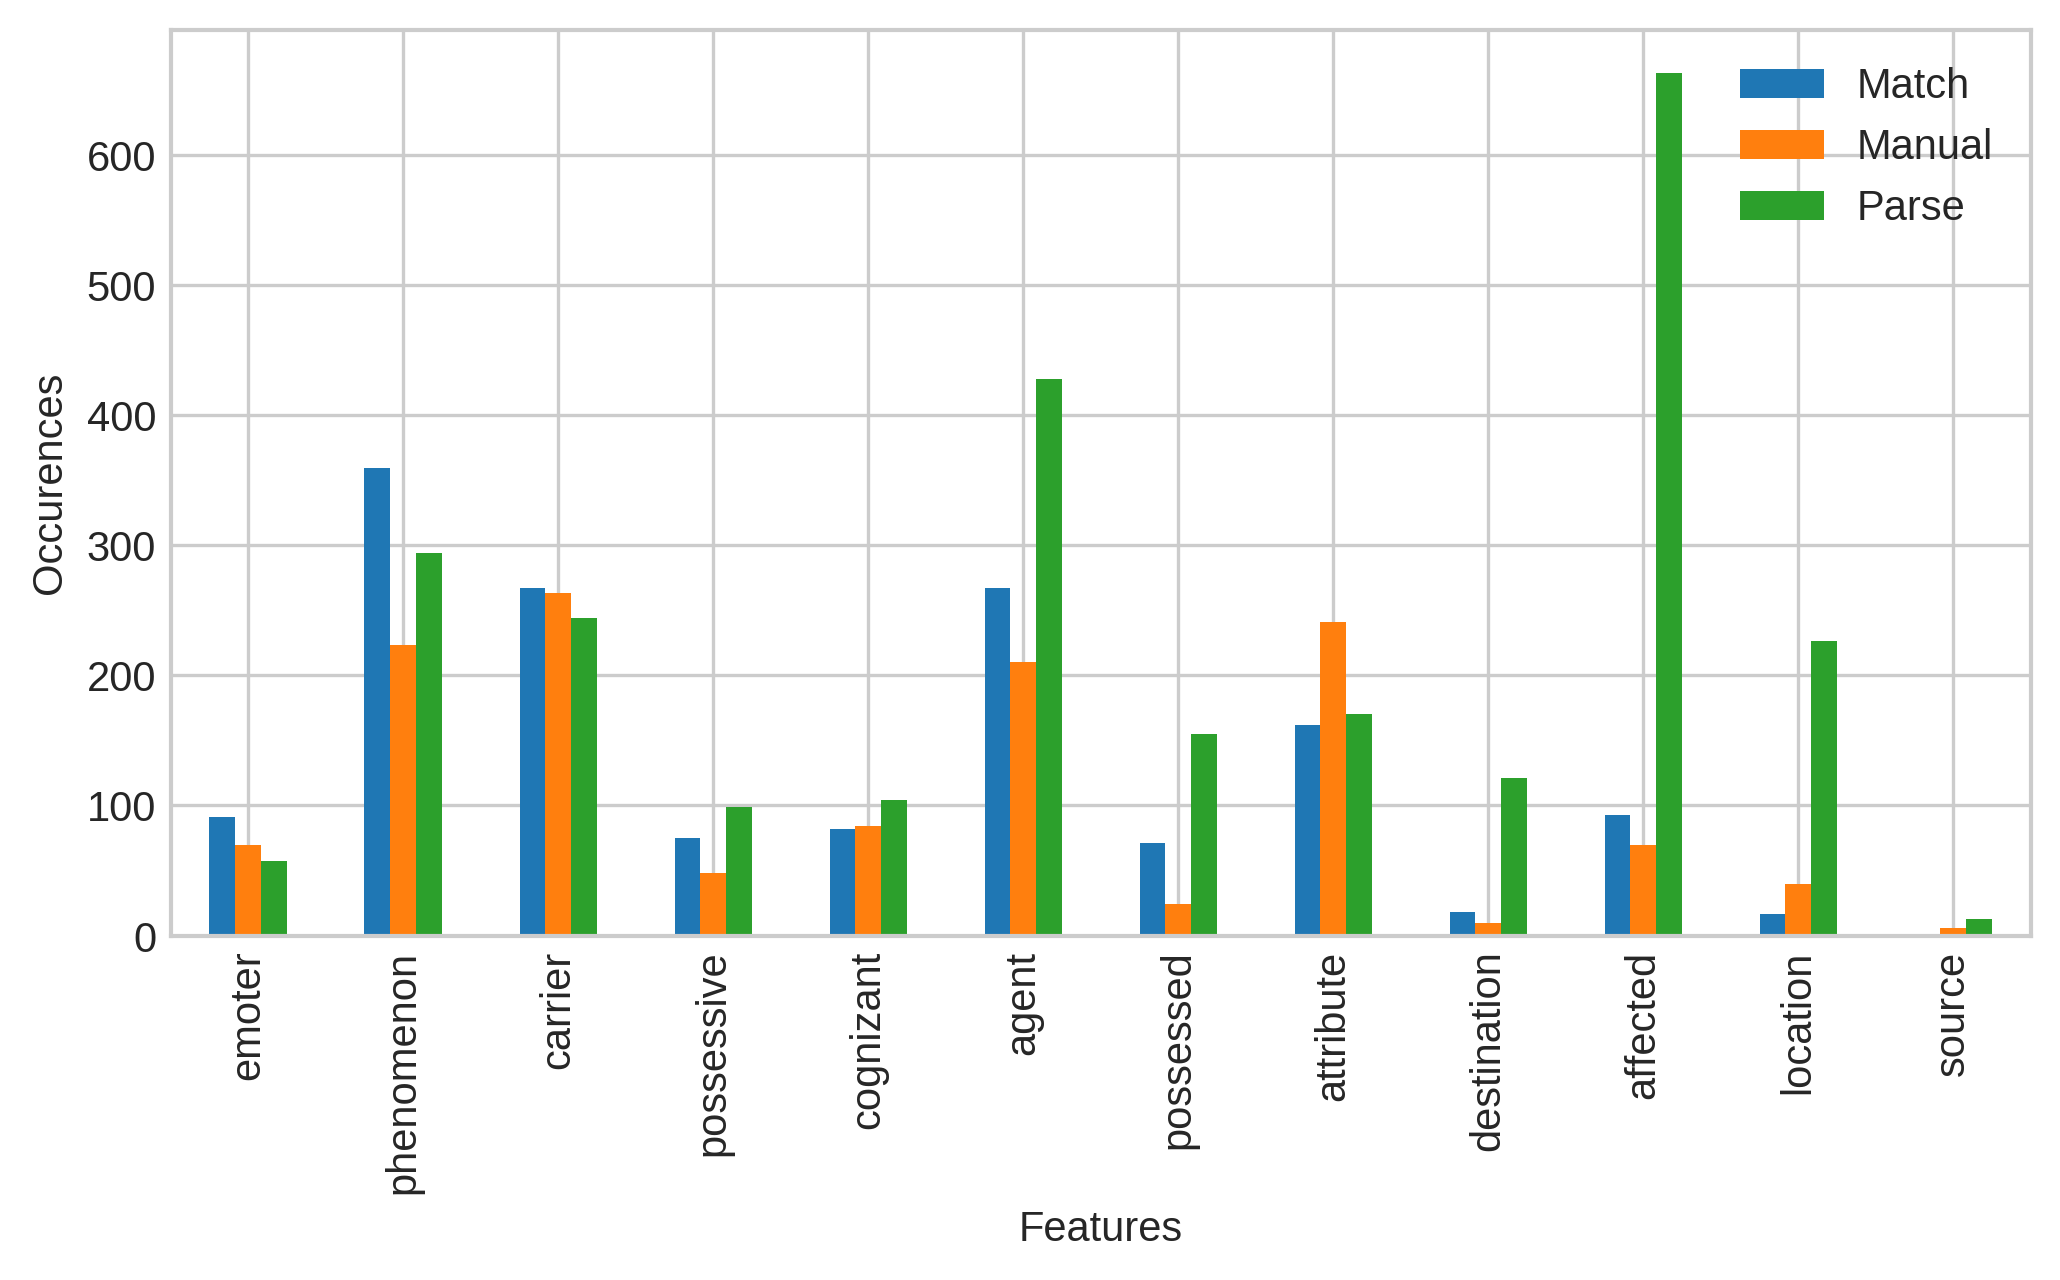

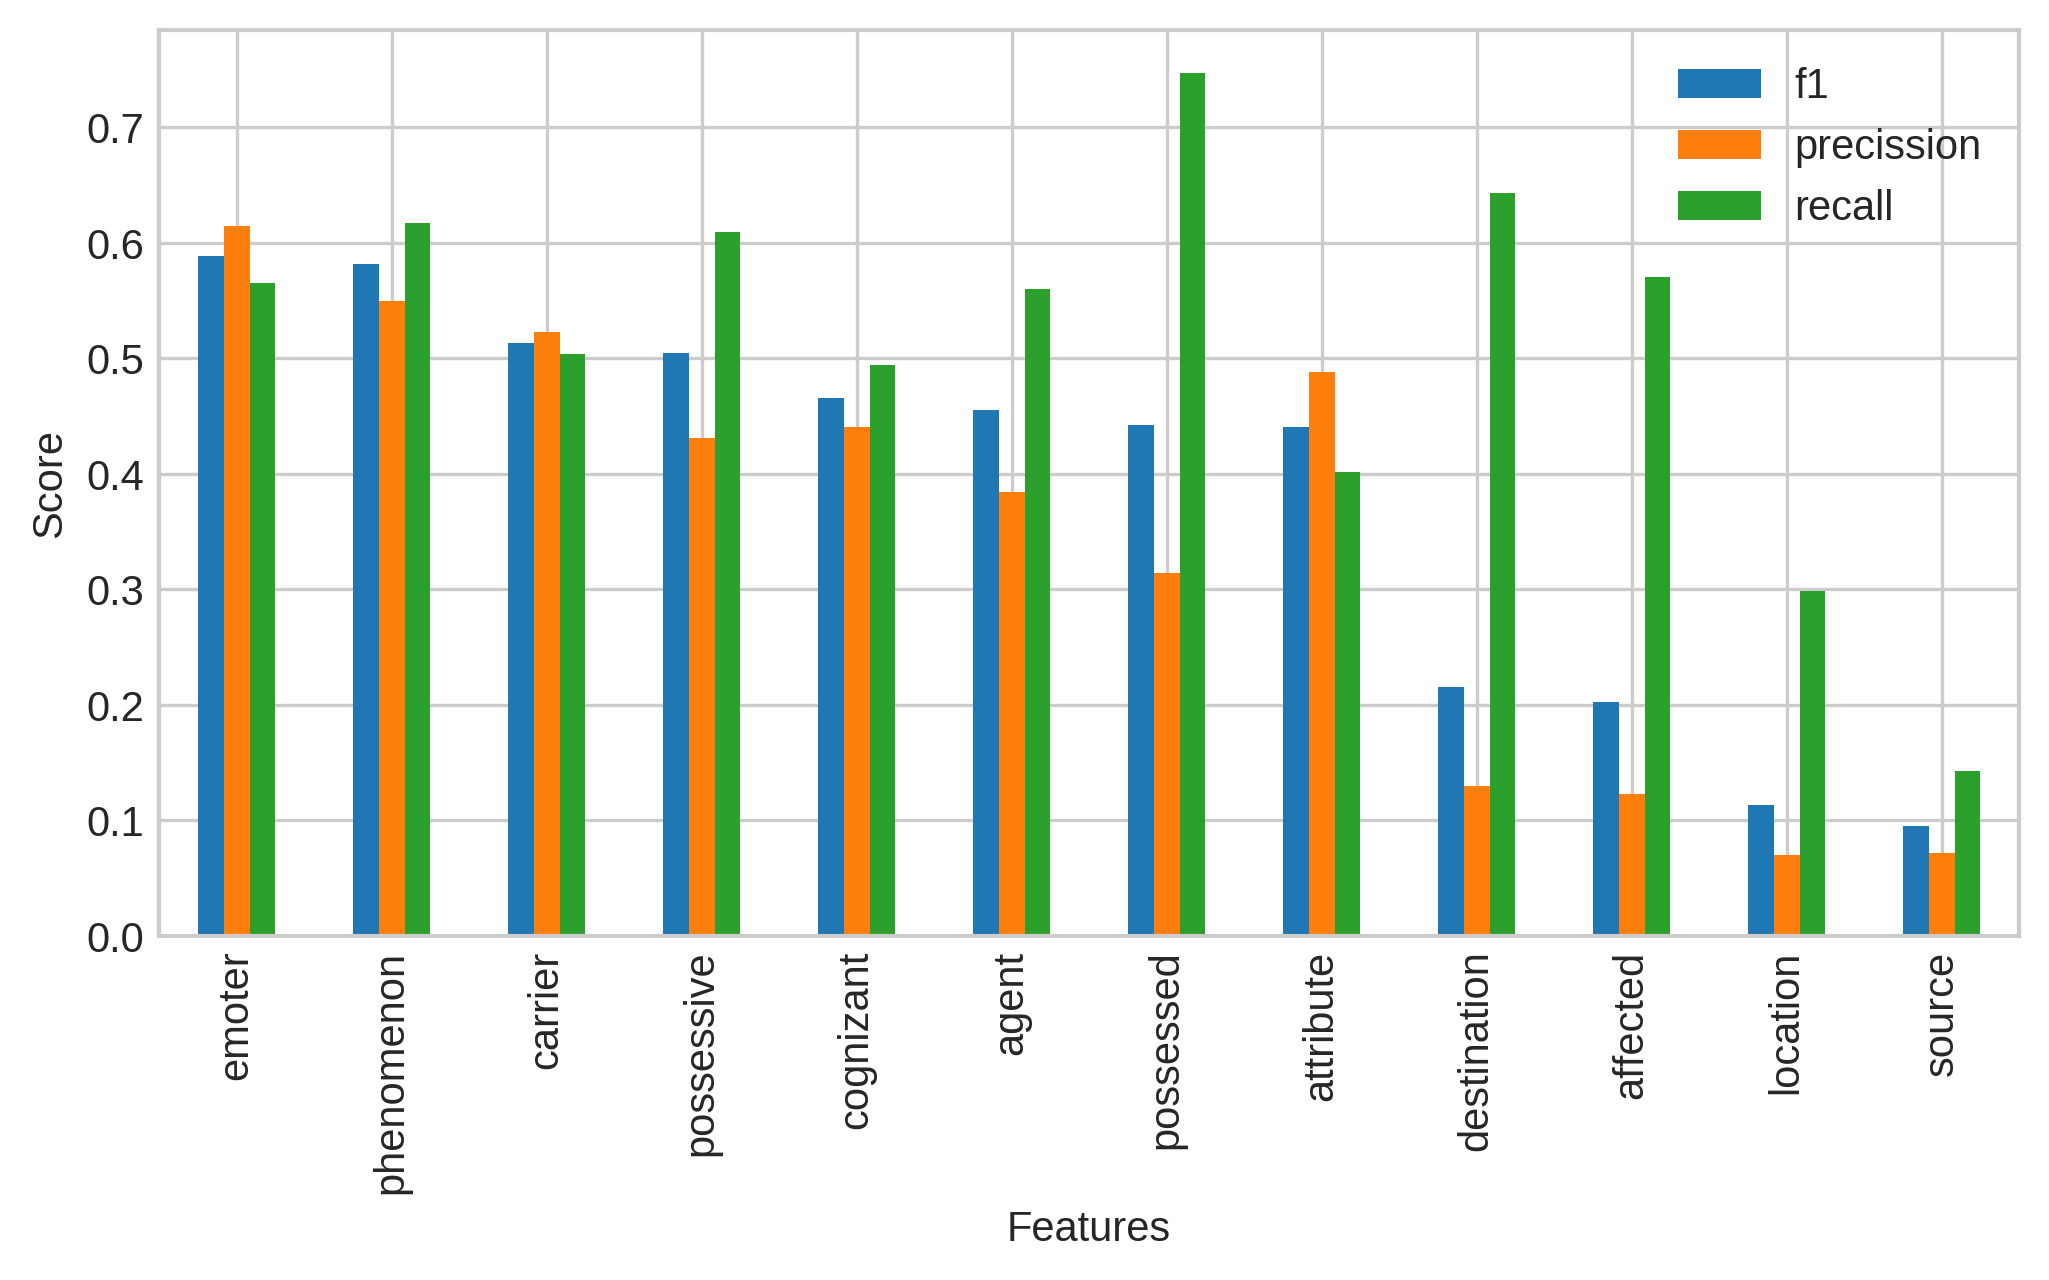

In [22]:
stats = make_stats(matches, manual_nm, parse_nm,
          filters=["emoter","phenomenon","carrier","possessive","cognizant","agent",
                "possessed","attribute","destination","affected","location","source",
#                 "created-phenomenon","path","range","affected-carrier","affected-possessed",
#                 "affected-cognizant","manner","perceiver","agent-carrier","created","matchee",
#                 "agent-perceiver","agent-cognizant","affected-destination","affected-emoter",
#                 "affected-perceiver","affected-path","affected-source"
                  ])

# Constituency: on matched featuires and precission, recall, f1 [OCD1]
 * Firt clean up first: finite unit-element is mixed with finite clause feature. Delete the clause features (i.e. longer segment ~ 12+ characters)
 * generate the statistics

### All features

Text(0,0.5,'Evaluated Features')

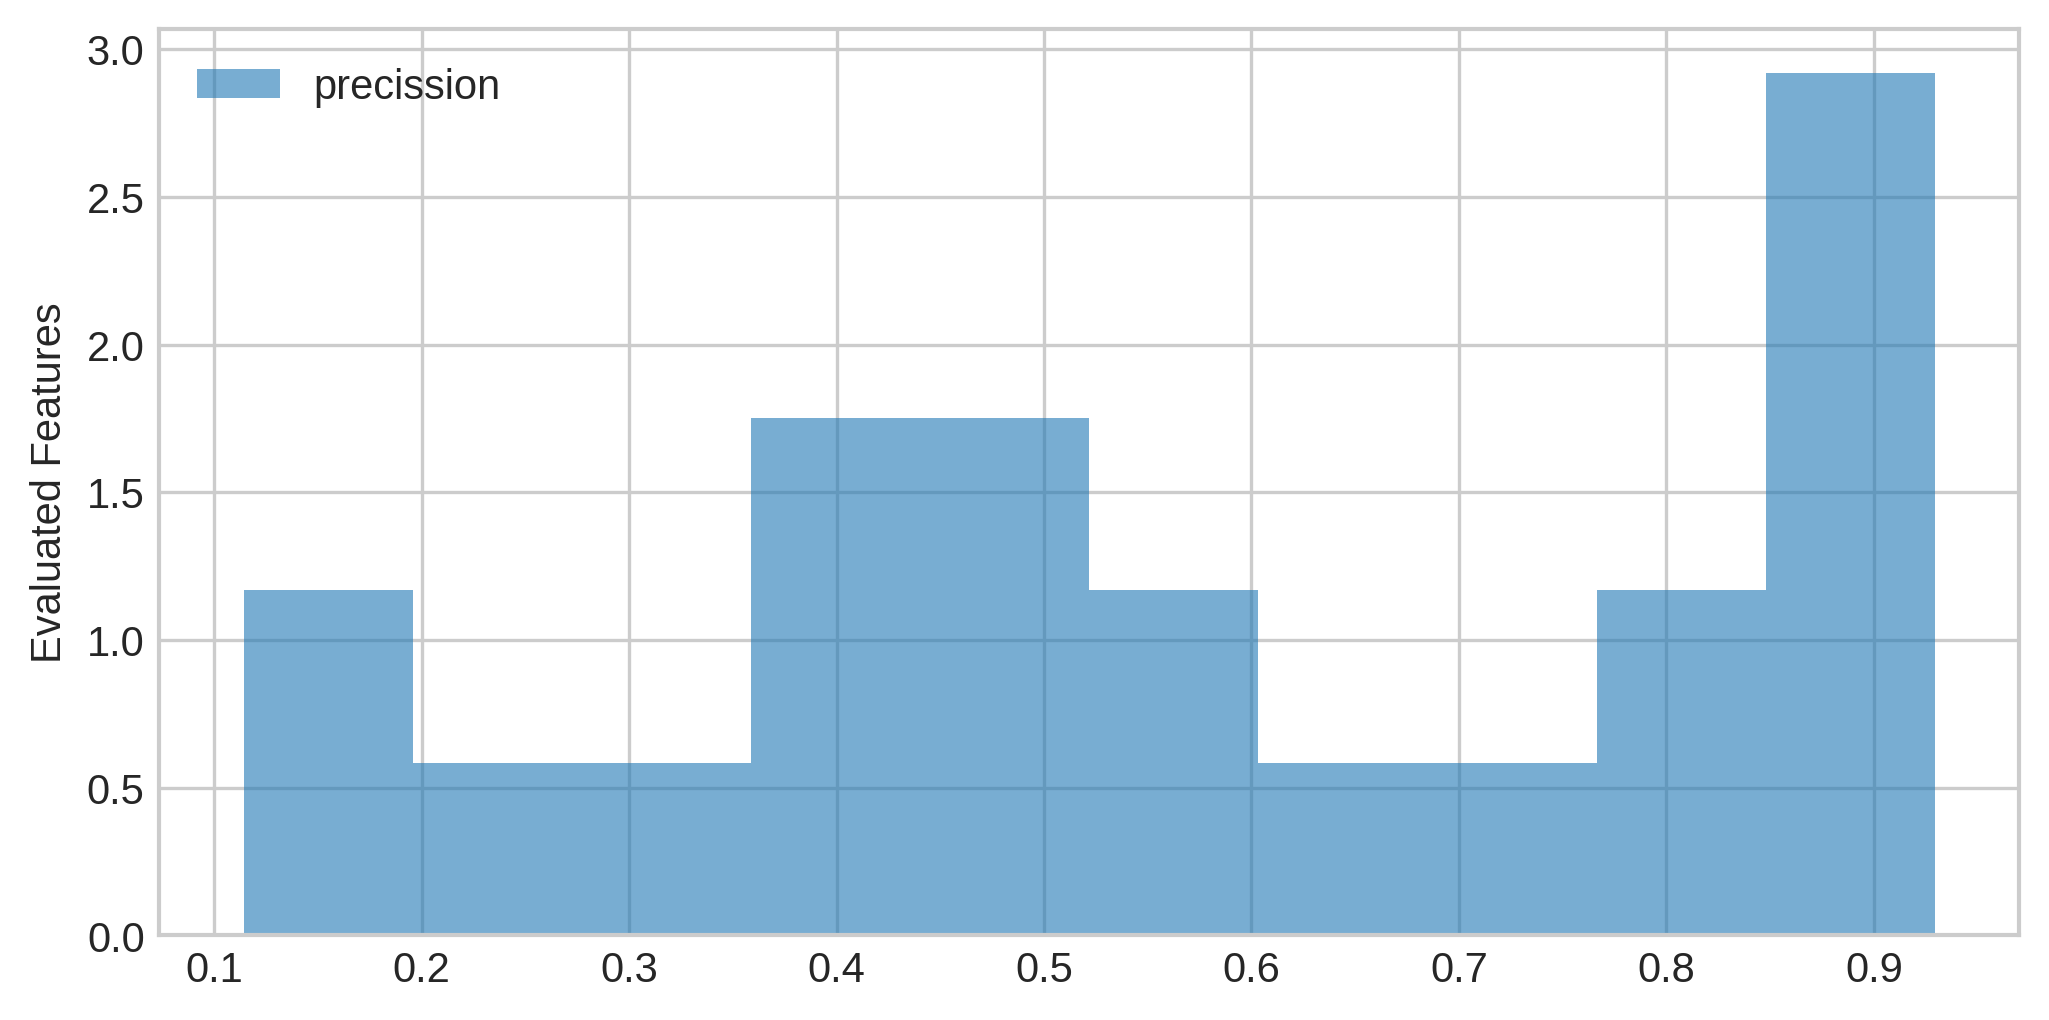

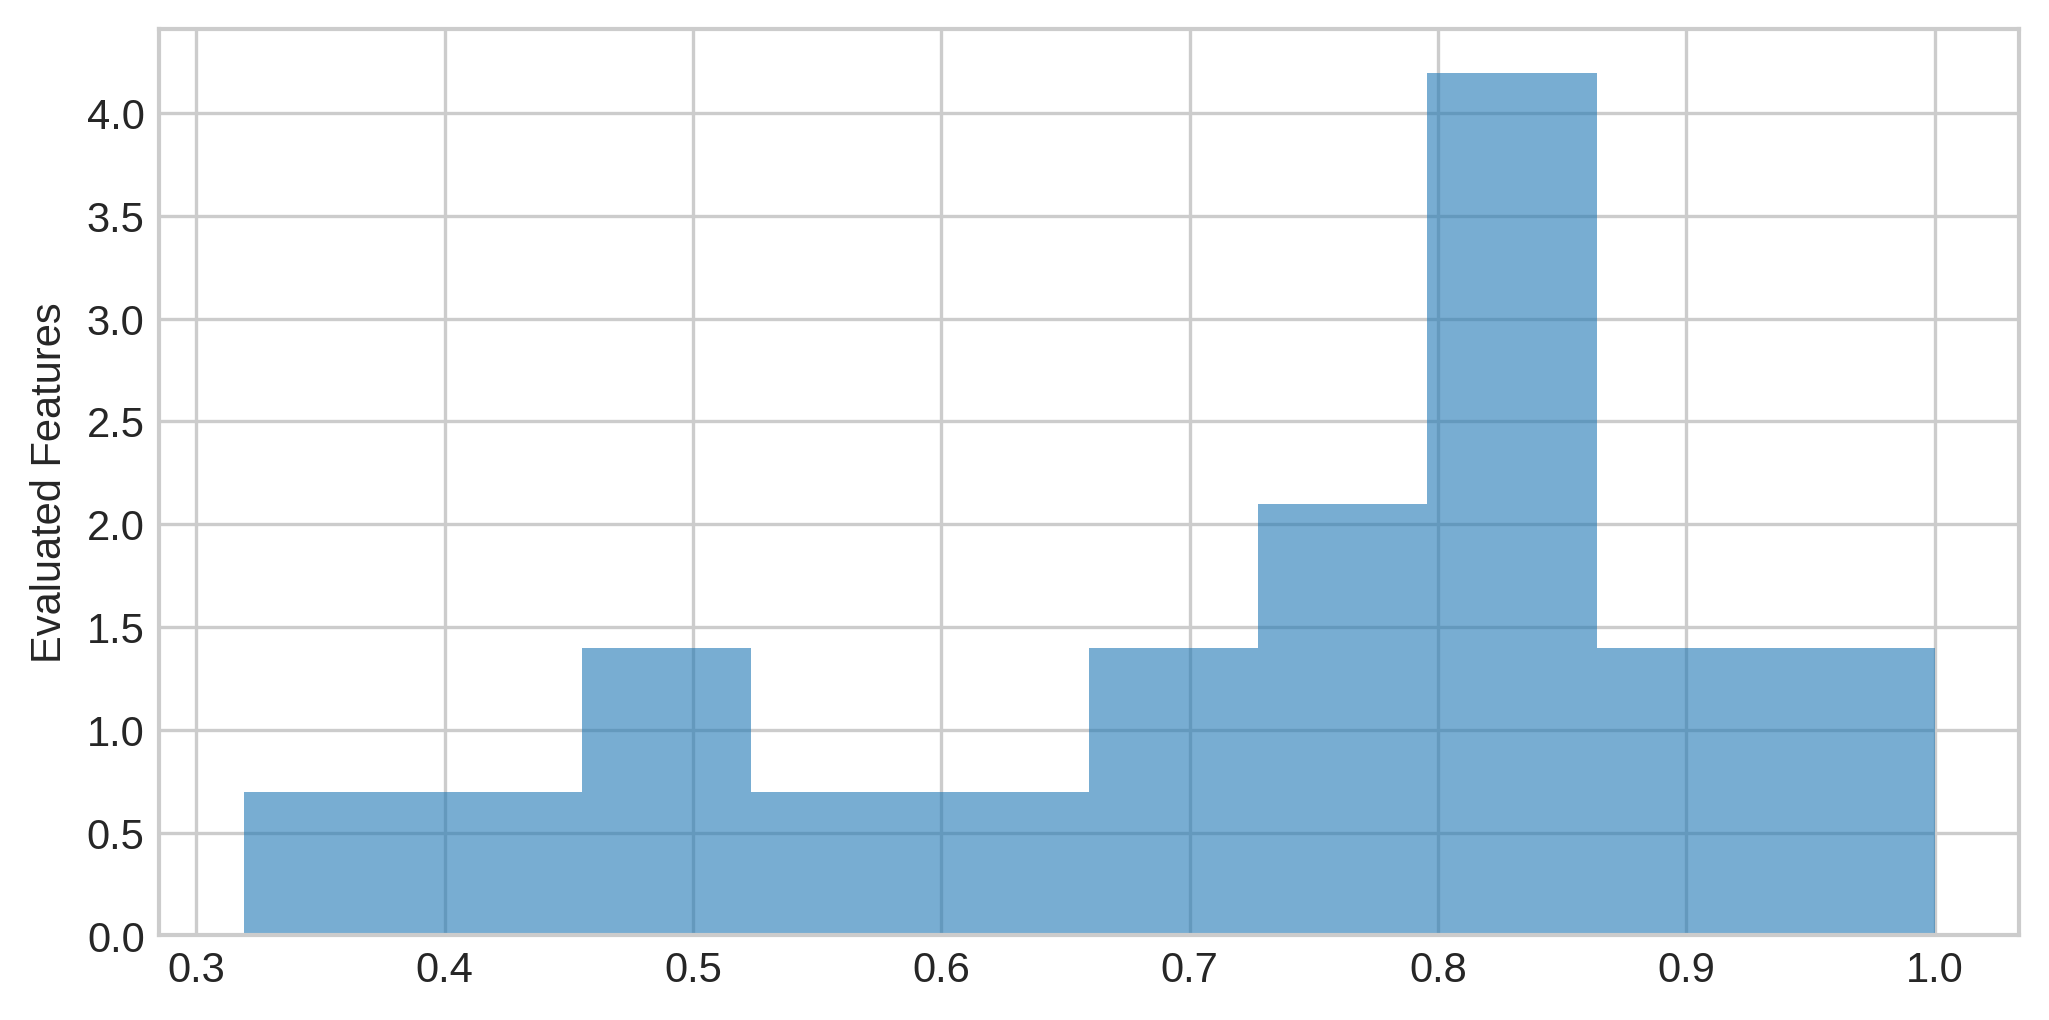

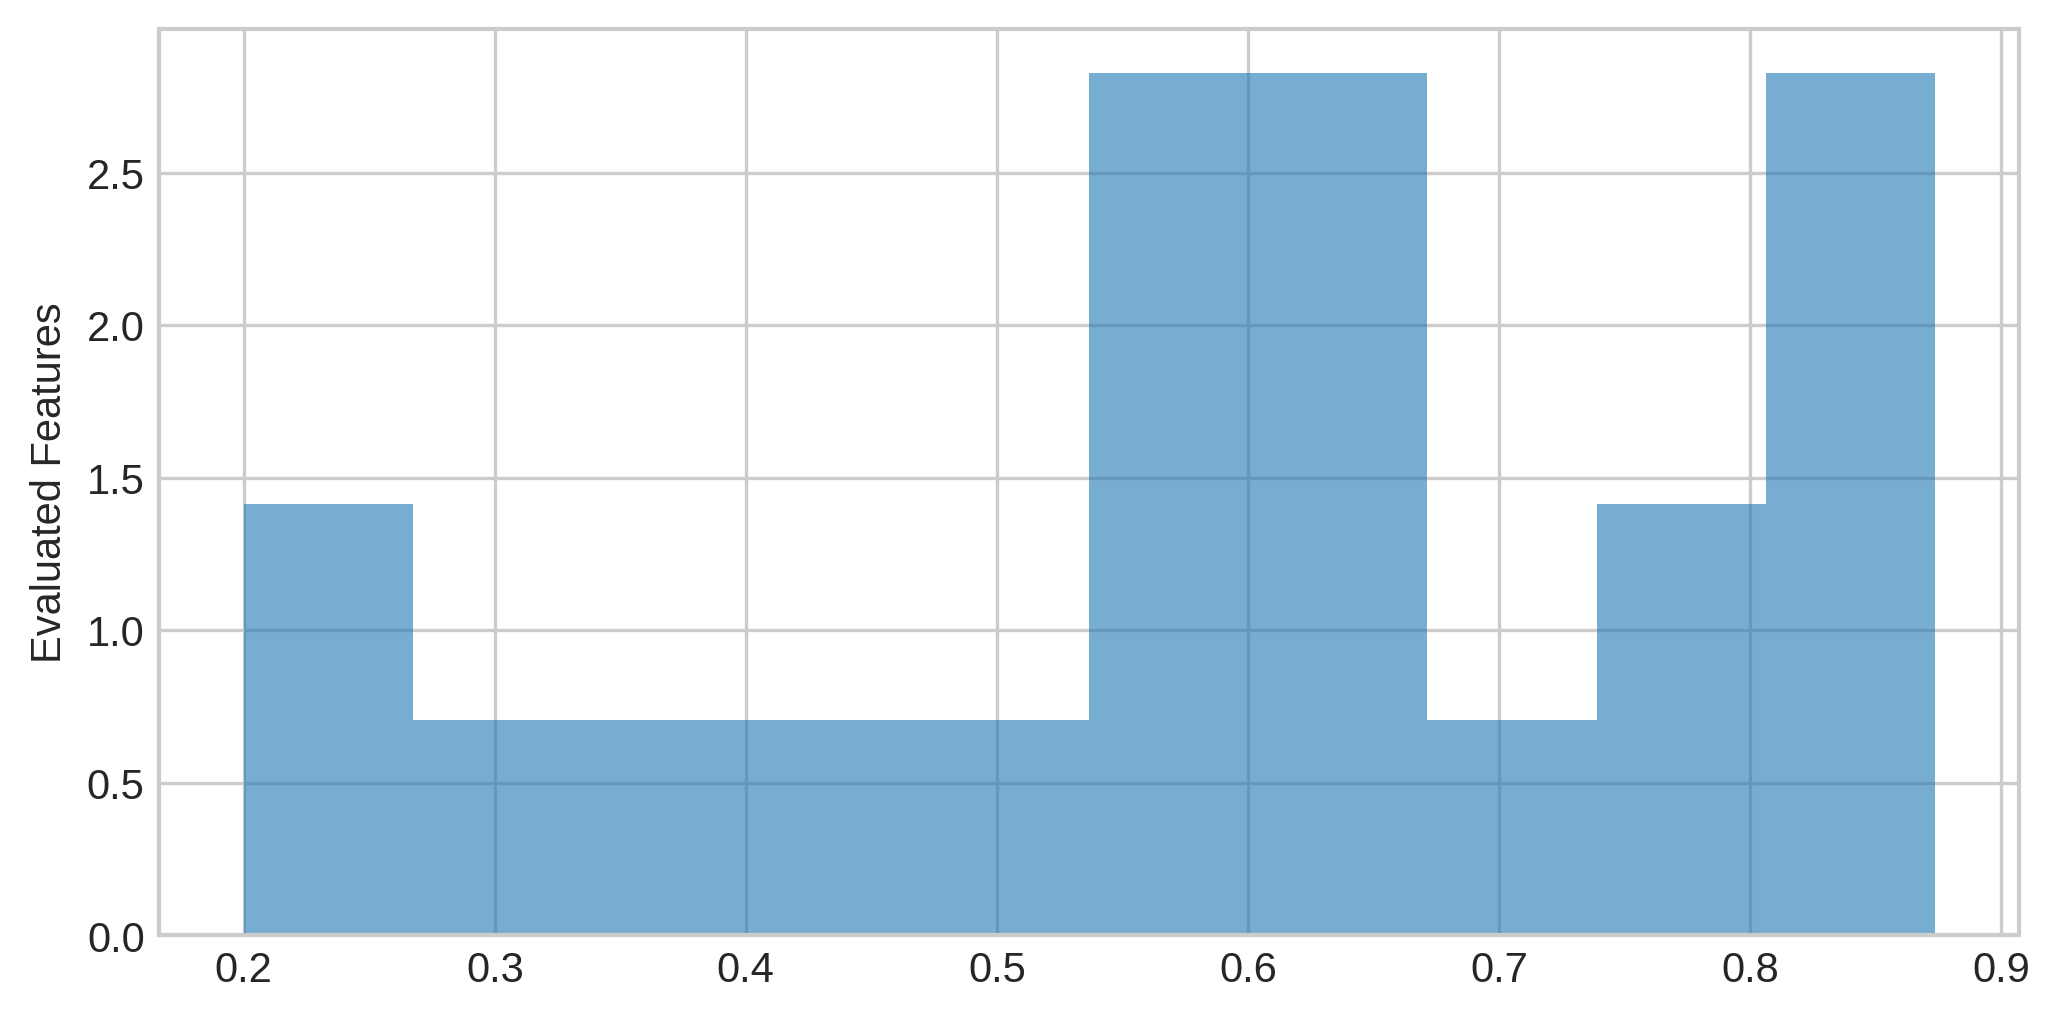

In [23]:
# ---------
matches, manual_nm, parse_nm = read_batch( OCD_mood_file_list )
# ---------
# stats = make_stats(matches, manual_nm, parse_nm)

in_scope_feats =  [
                  #"predicator","subject","adjunct","complement-direct","complement",
                  #"complement-indirect","mood-adjunct", "finite",
                  "positive","negative", "active","passive", 
                  "perfective","imperfective", "finite","non-finite",
                  "imperative","indicative", "declarative","interrogative", 
                  "wh-subject","wh-complement","wh-adjunct", "temporal","modal"
                  "declarative","interrogative", "wh","yes-no",
                   "intensity","modality","temporality",
                  ]

matches, manual_nm, parse_nm = select_evaluation_segments(matches, manual_nm, parse_nm,
                        only_features=in_scope_feats )

stats=calculate_prf1(matches,manual_nm,parse_nm)

stats.sort_values(by="f1", inplace=True, ascending=False)

dsp(stats[["precission","recall","f1"]].describe())

ax =stats[["precission",]].plot.hist(cumulative=False, density=1,alpha=.6, bins=10)
# restrict the x axis to 80
# ax.set_xlim(0,40)
plt.ylabel("Evaluated Features")
# plt.xlabel("Precission and Recall")

plt.figure()
ax =stats["recall"].plot.hist(cumulative=False, density=1,alpha=.6, bins=10)
# restrict the x axis to 80
# ax.set_xlim(0,40)
plt.ylabel("Evaluated Features")
# plt.xlabel("Recall")

plt.figure()
ax =stats["f1"].plot.hist(cumulative=False, density=1,alpha=.6, bins=10)
# restrict the x axis to 80
# ax.set_xlim(0,40)
plt.ylabel("Evaluated Features")
# plt.xlabel("F1")

Text(0,0.5,'Frequency')

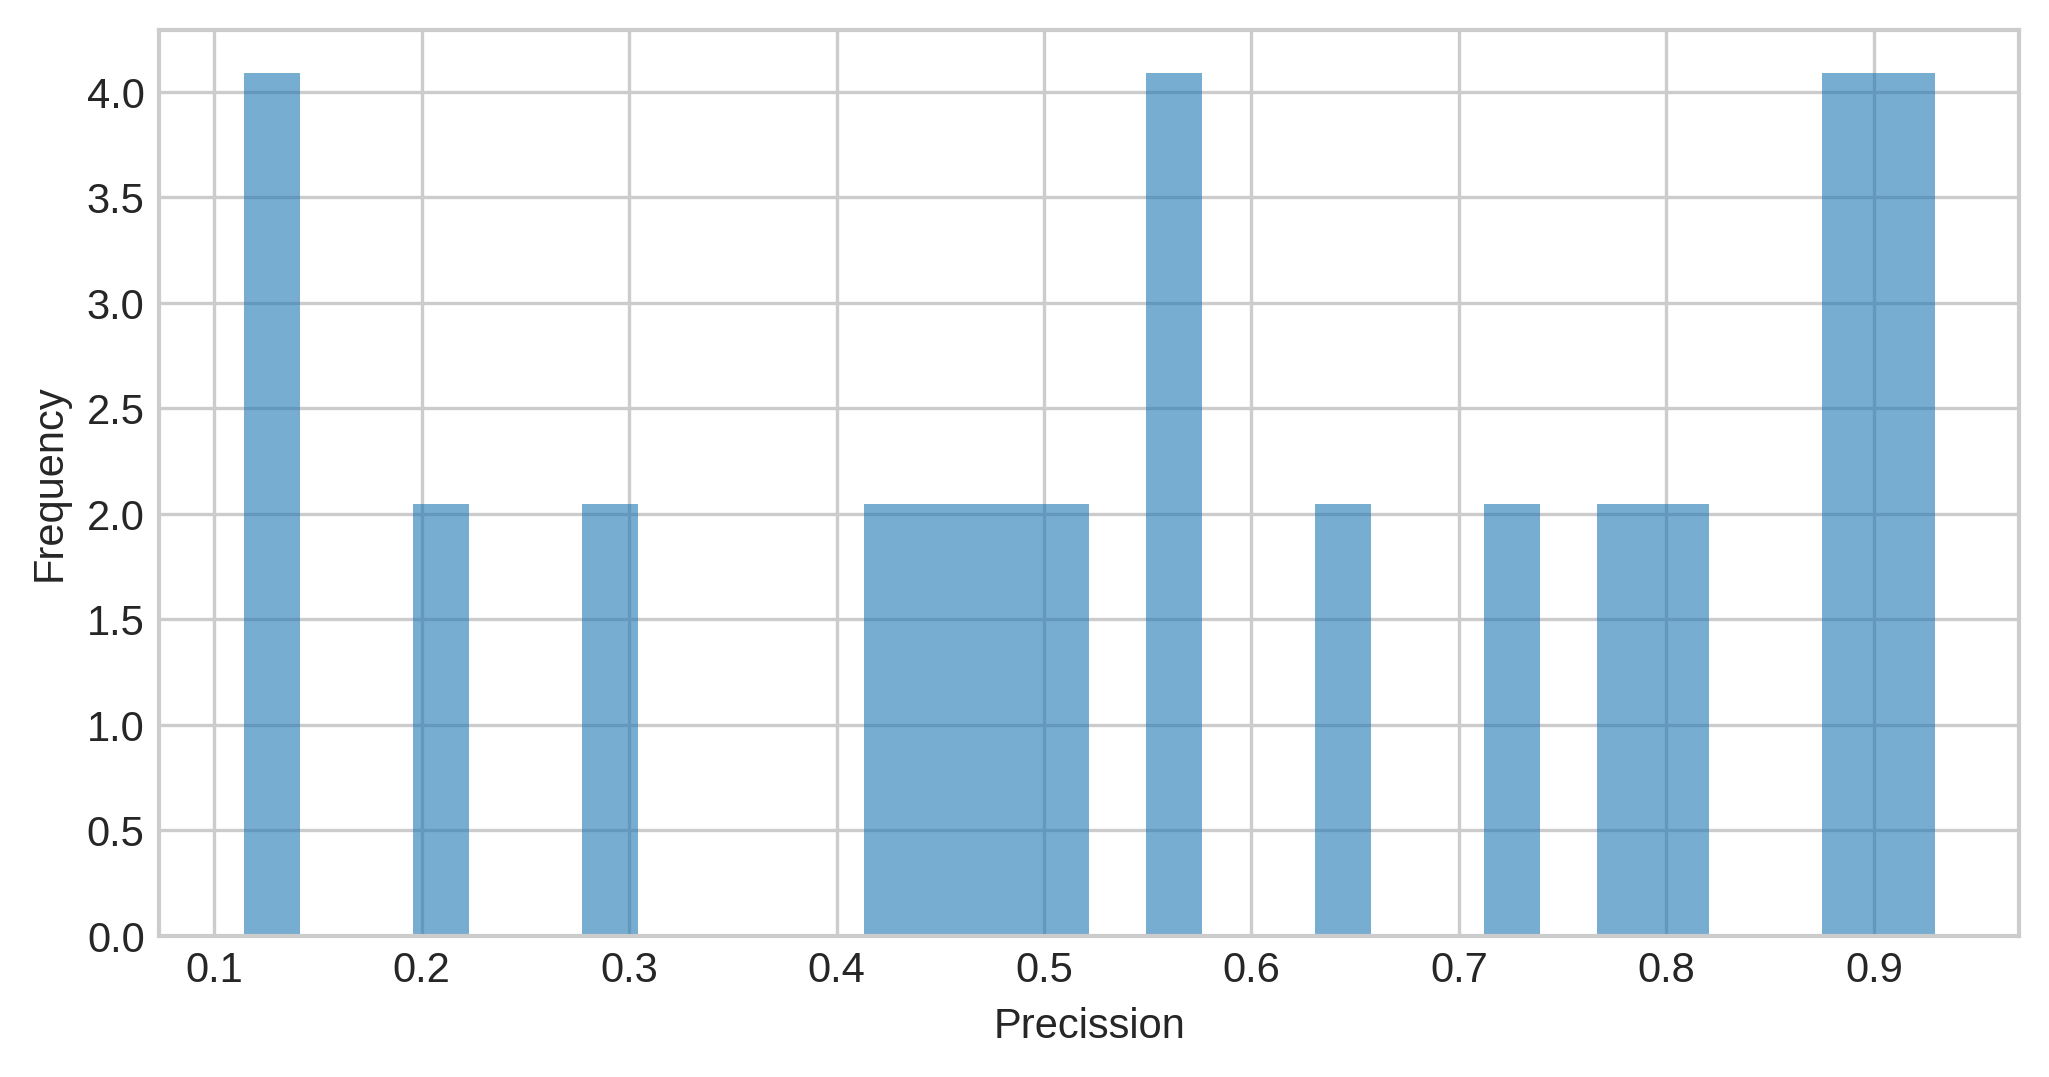

In [24]:
# ---------
matches, manual_nm, parse_nm = read_batch( OCD_mood_file_list )
# ---------
# stats = make_stats(matches, manual_nm, parse_nm)

in_scope_feats =  [
                  #"predicator","subject","adjunct","complement-direct","complement",
                  #"complement-indirect","mood-adjunct", "finite",
                  "positive","negative", "active","passive", 
                  "perfective","imperfective", "finite","non-finite",
                  "imperative","indicative", "declarative","interrogative", 
                  "wh-subject","wh-complement","wh-adjunct",
                  # "root","epistemic", 
                   "intensity","modality","temporality",
                  ]

matches, manual_nm, parse_nm = select_evaluation_segments(matches, manual_nm, parse_nm,
                        only_features=in_scope_feats )

stats=calculate_prf1(matches,manual_nm,parse_nm)

stats.sort_values(by="f1", inplace=True, ascending=False)
    
ax =stats["precission"].plot.hist(cumulative=False, density=1,alpha=.6, bins=30)
# restrict the x axis to 80
# ax.set_xlim(0,40)
plt.xlabel("Precission")
plt.ylabel("Frequency")

### Unit types

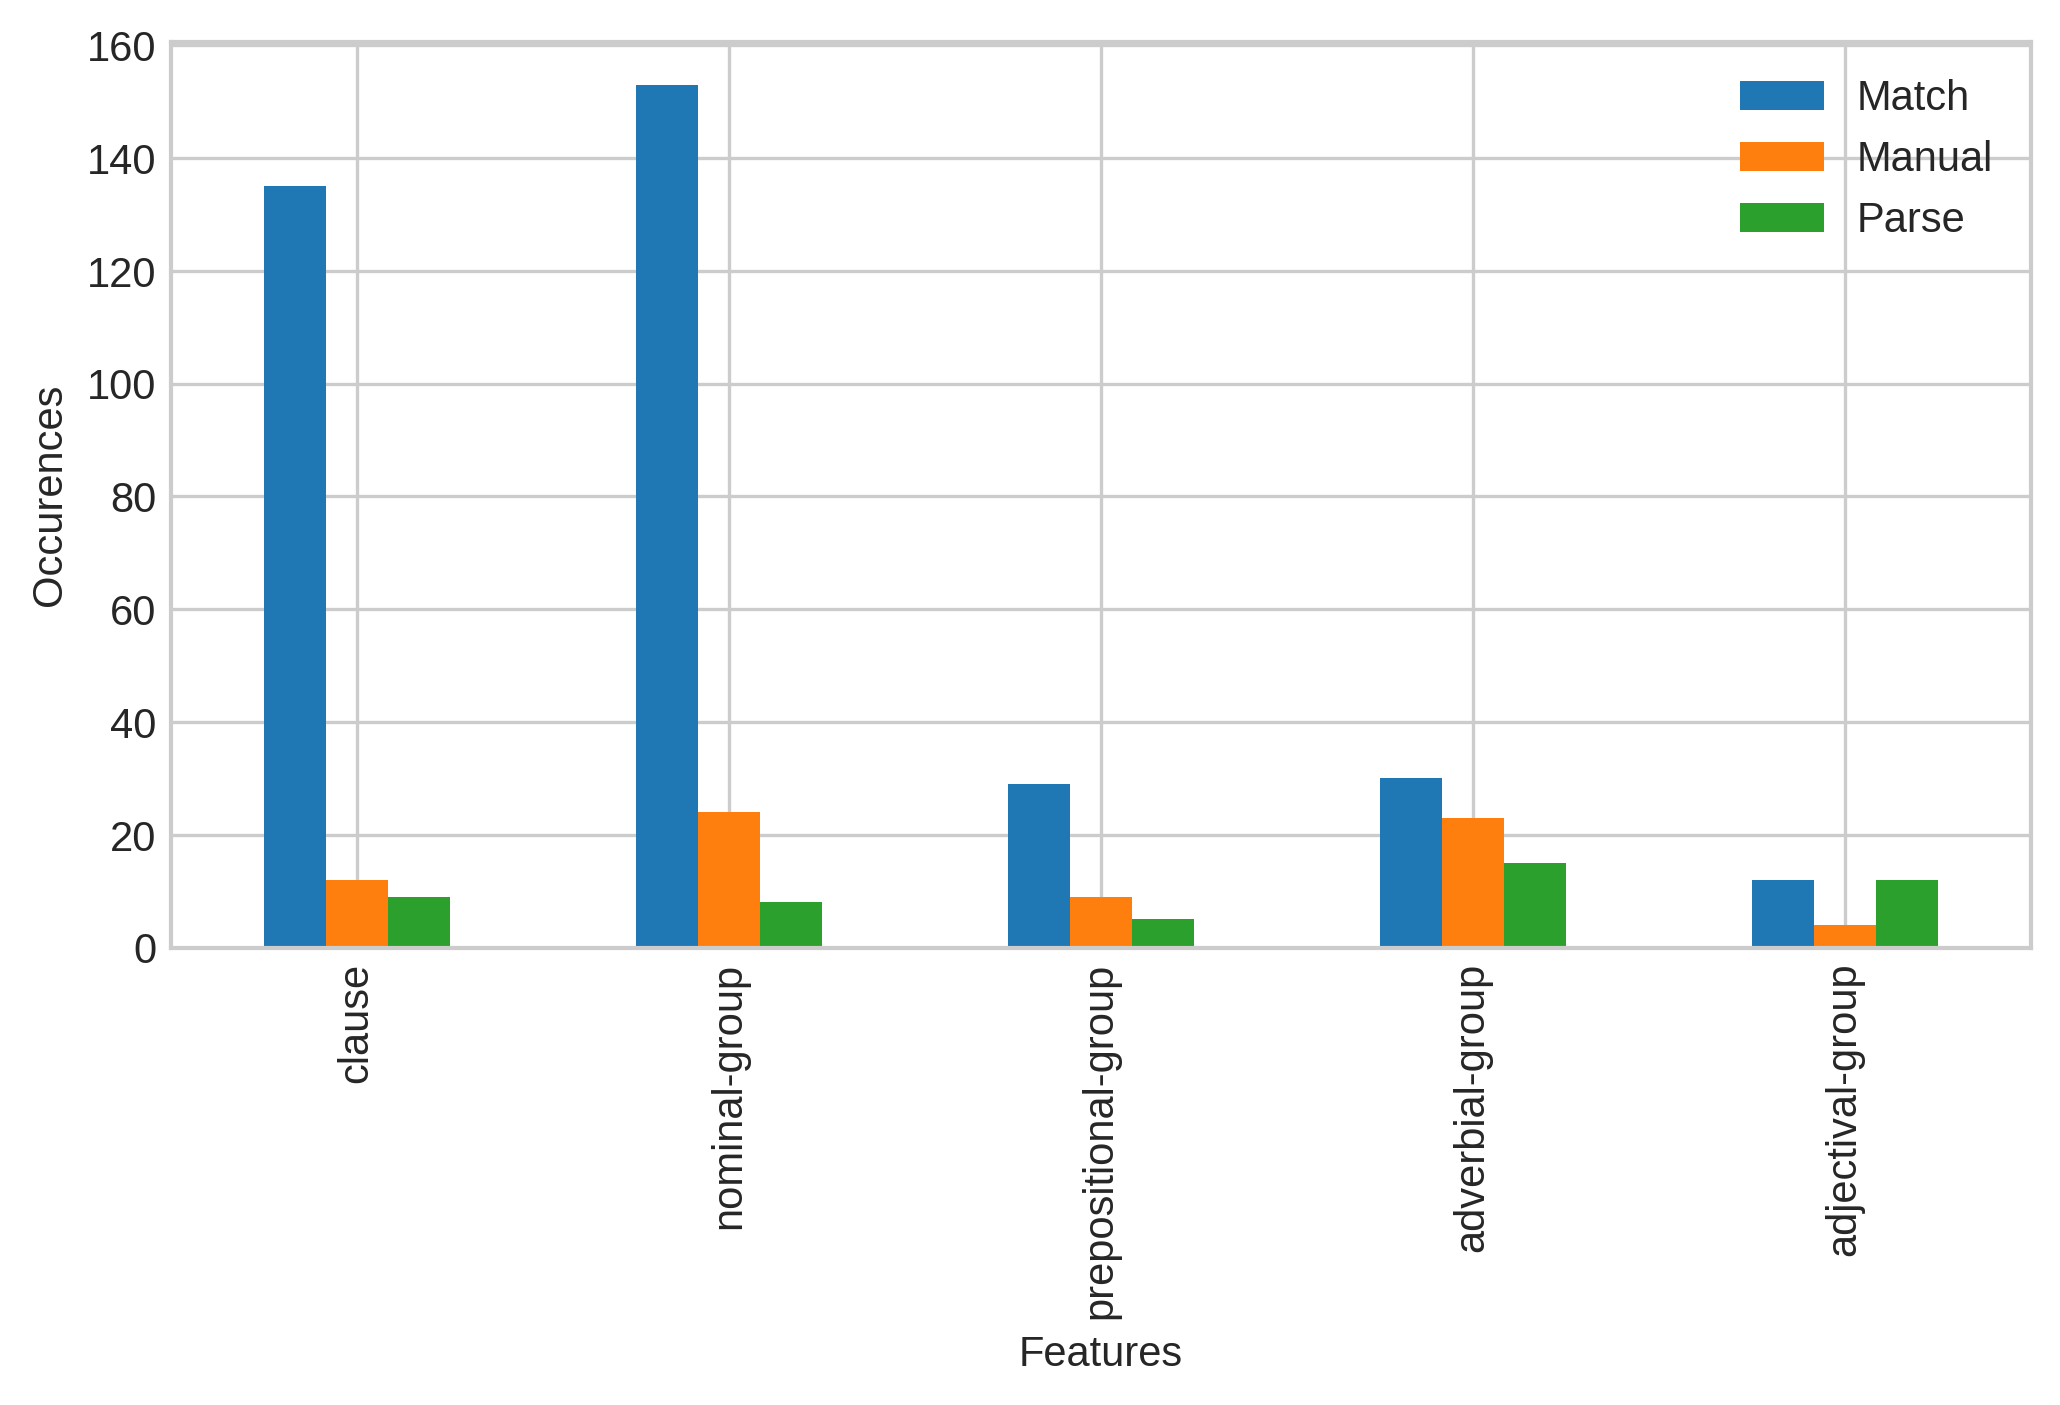

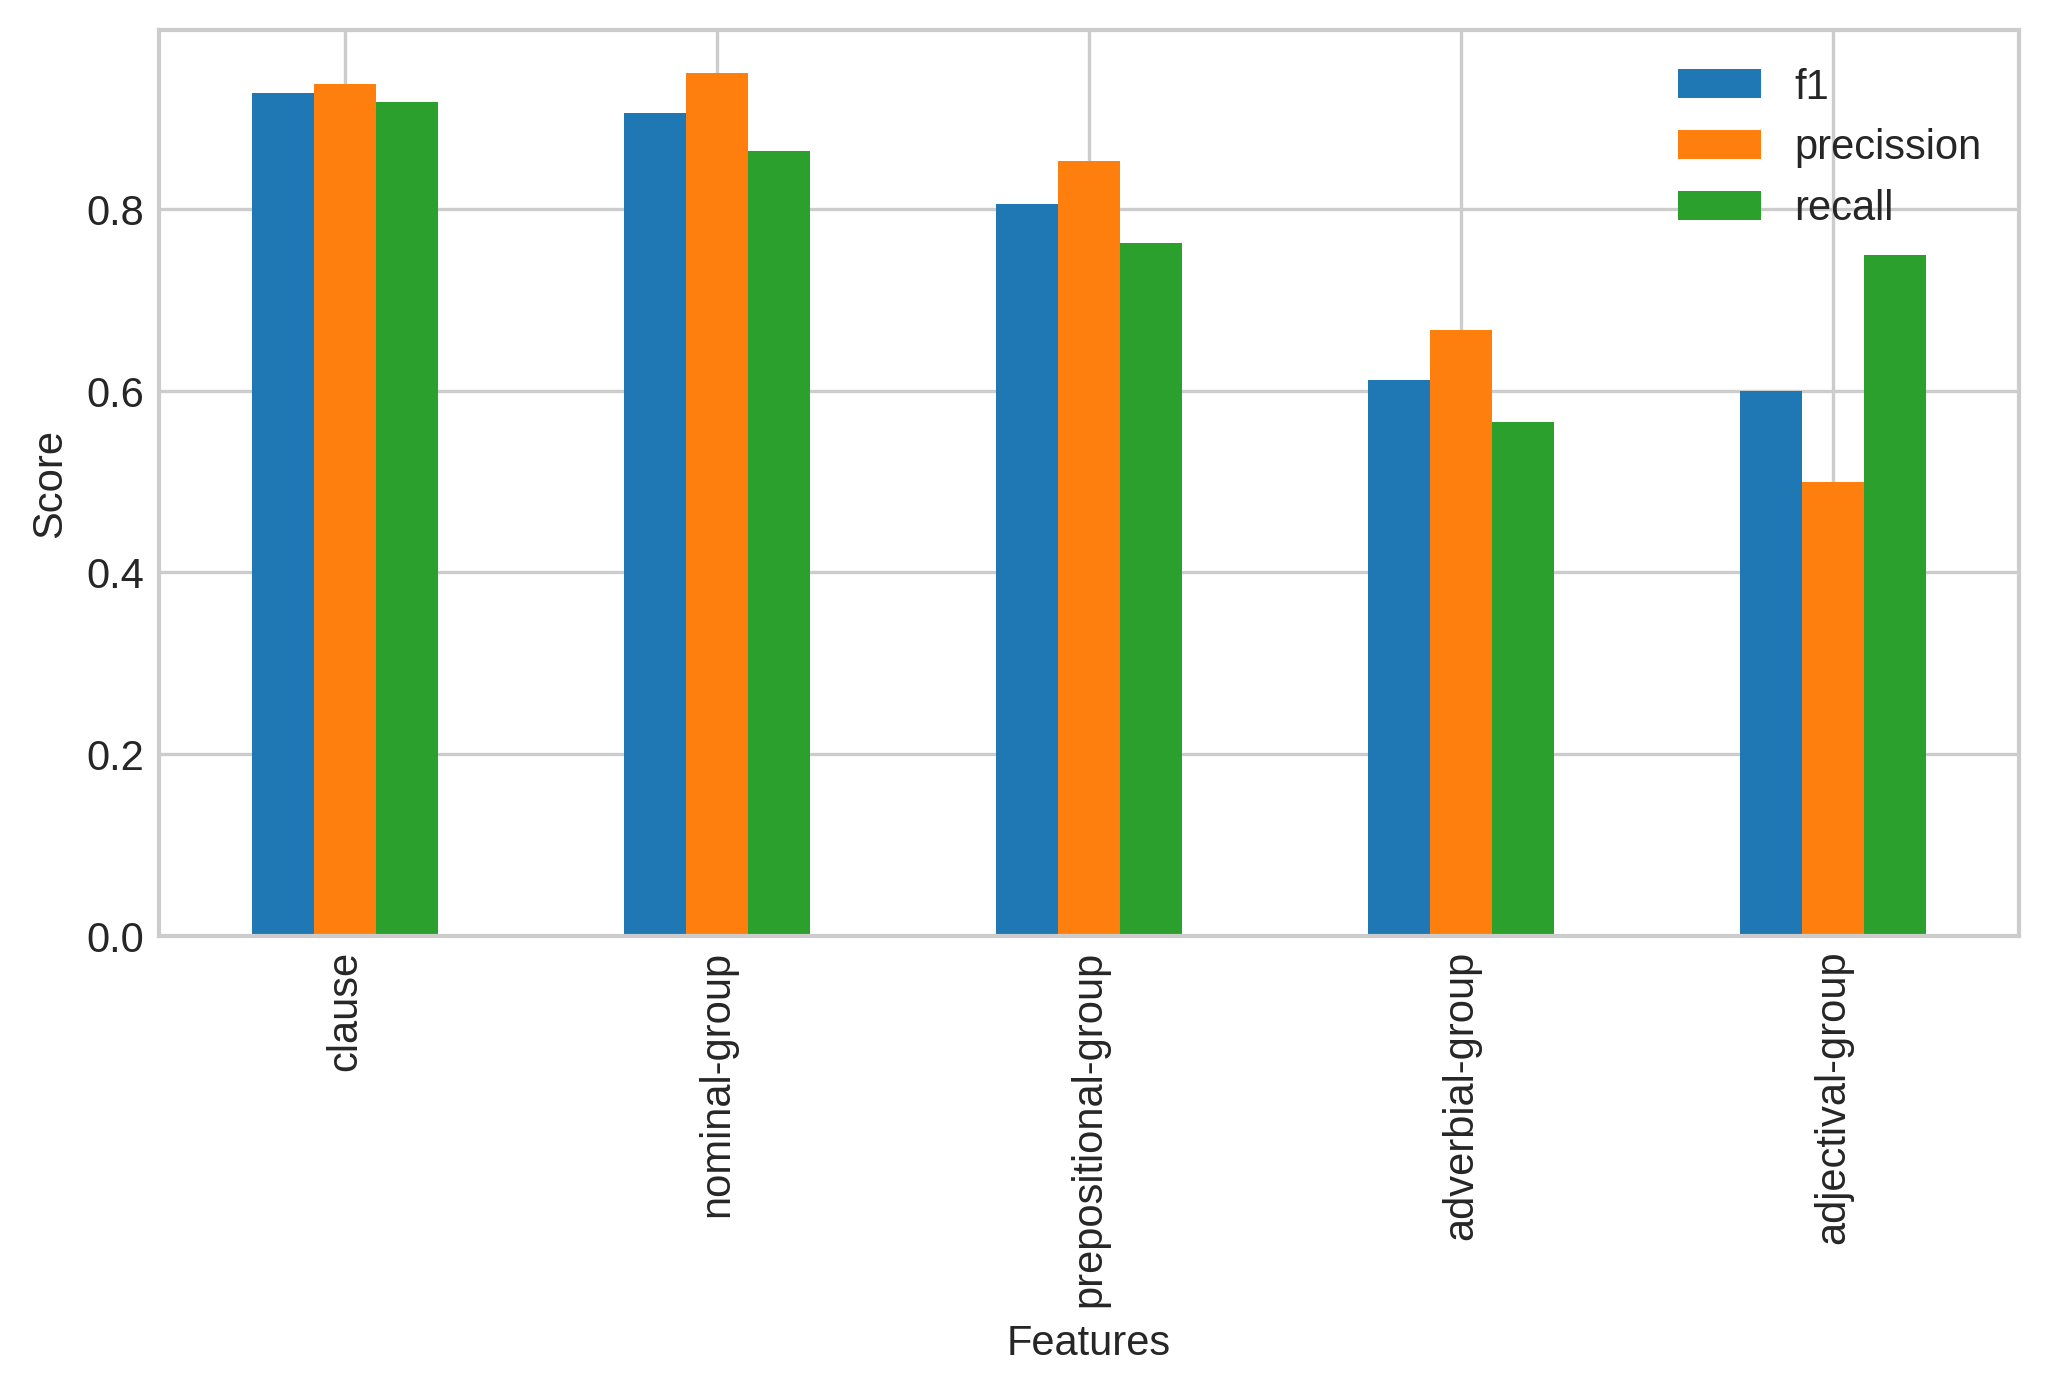

In [27]:
# ---------
matches, manual_nm, parse_nm = read_batch( OCD1_const_file_list )
# ---------

# Note, the verbal-group is not included into the statistics
stats = make_stats(matches, manual_nm, parse_nm,
                   filters=["clause","prepositional-group","nominal-group",
                            "nominal-group","adjectival-group","adverbial-group",
                           #"verbal-group"
                           ]
                  )

### Elements

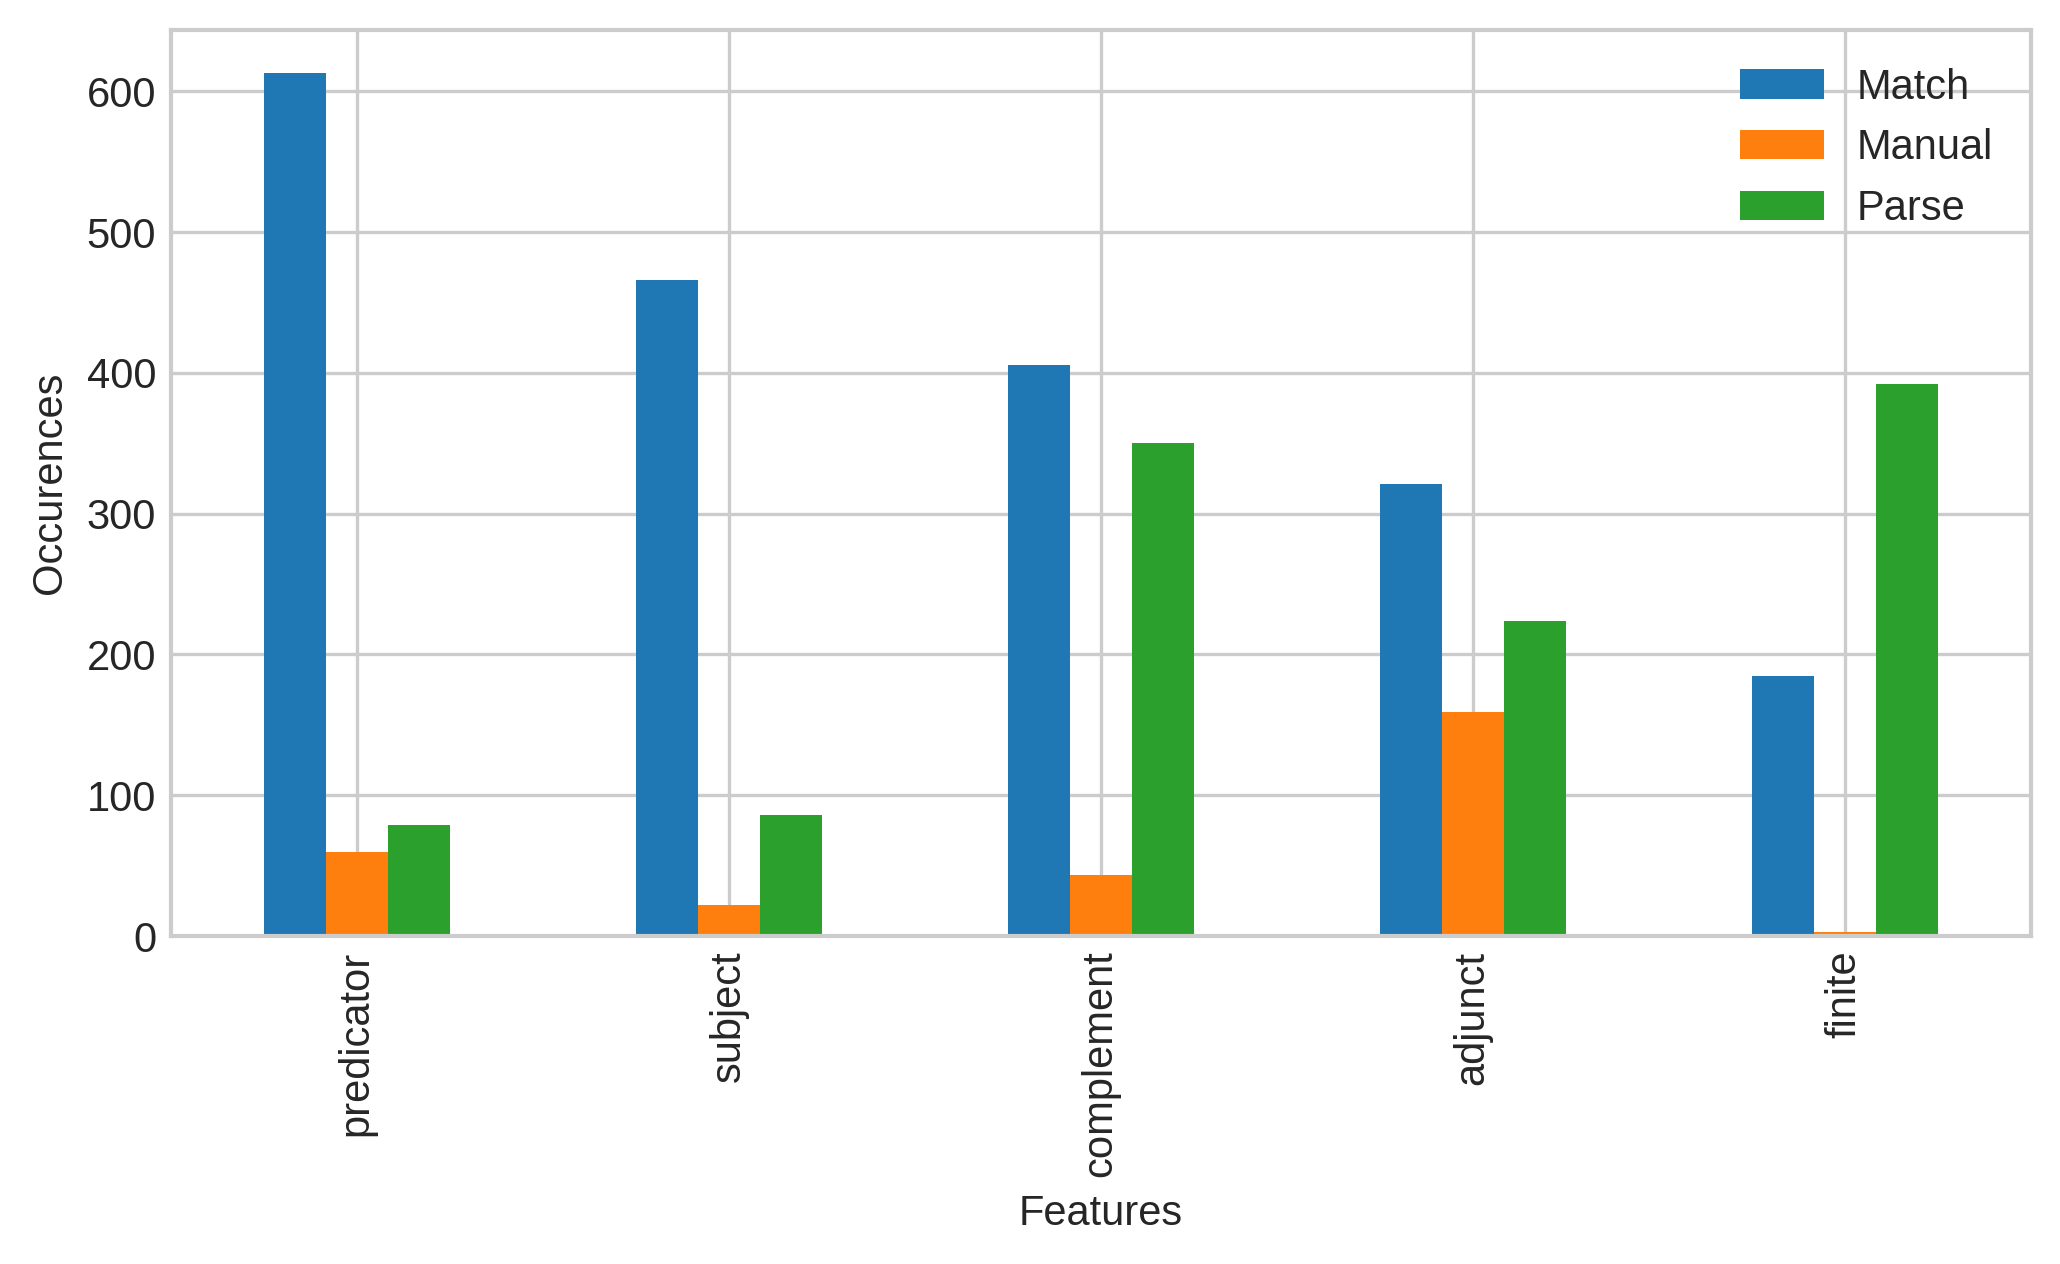

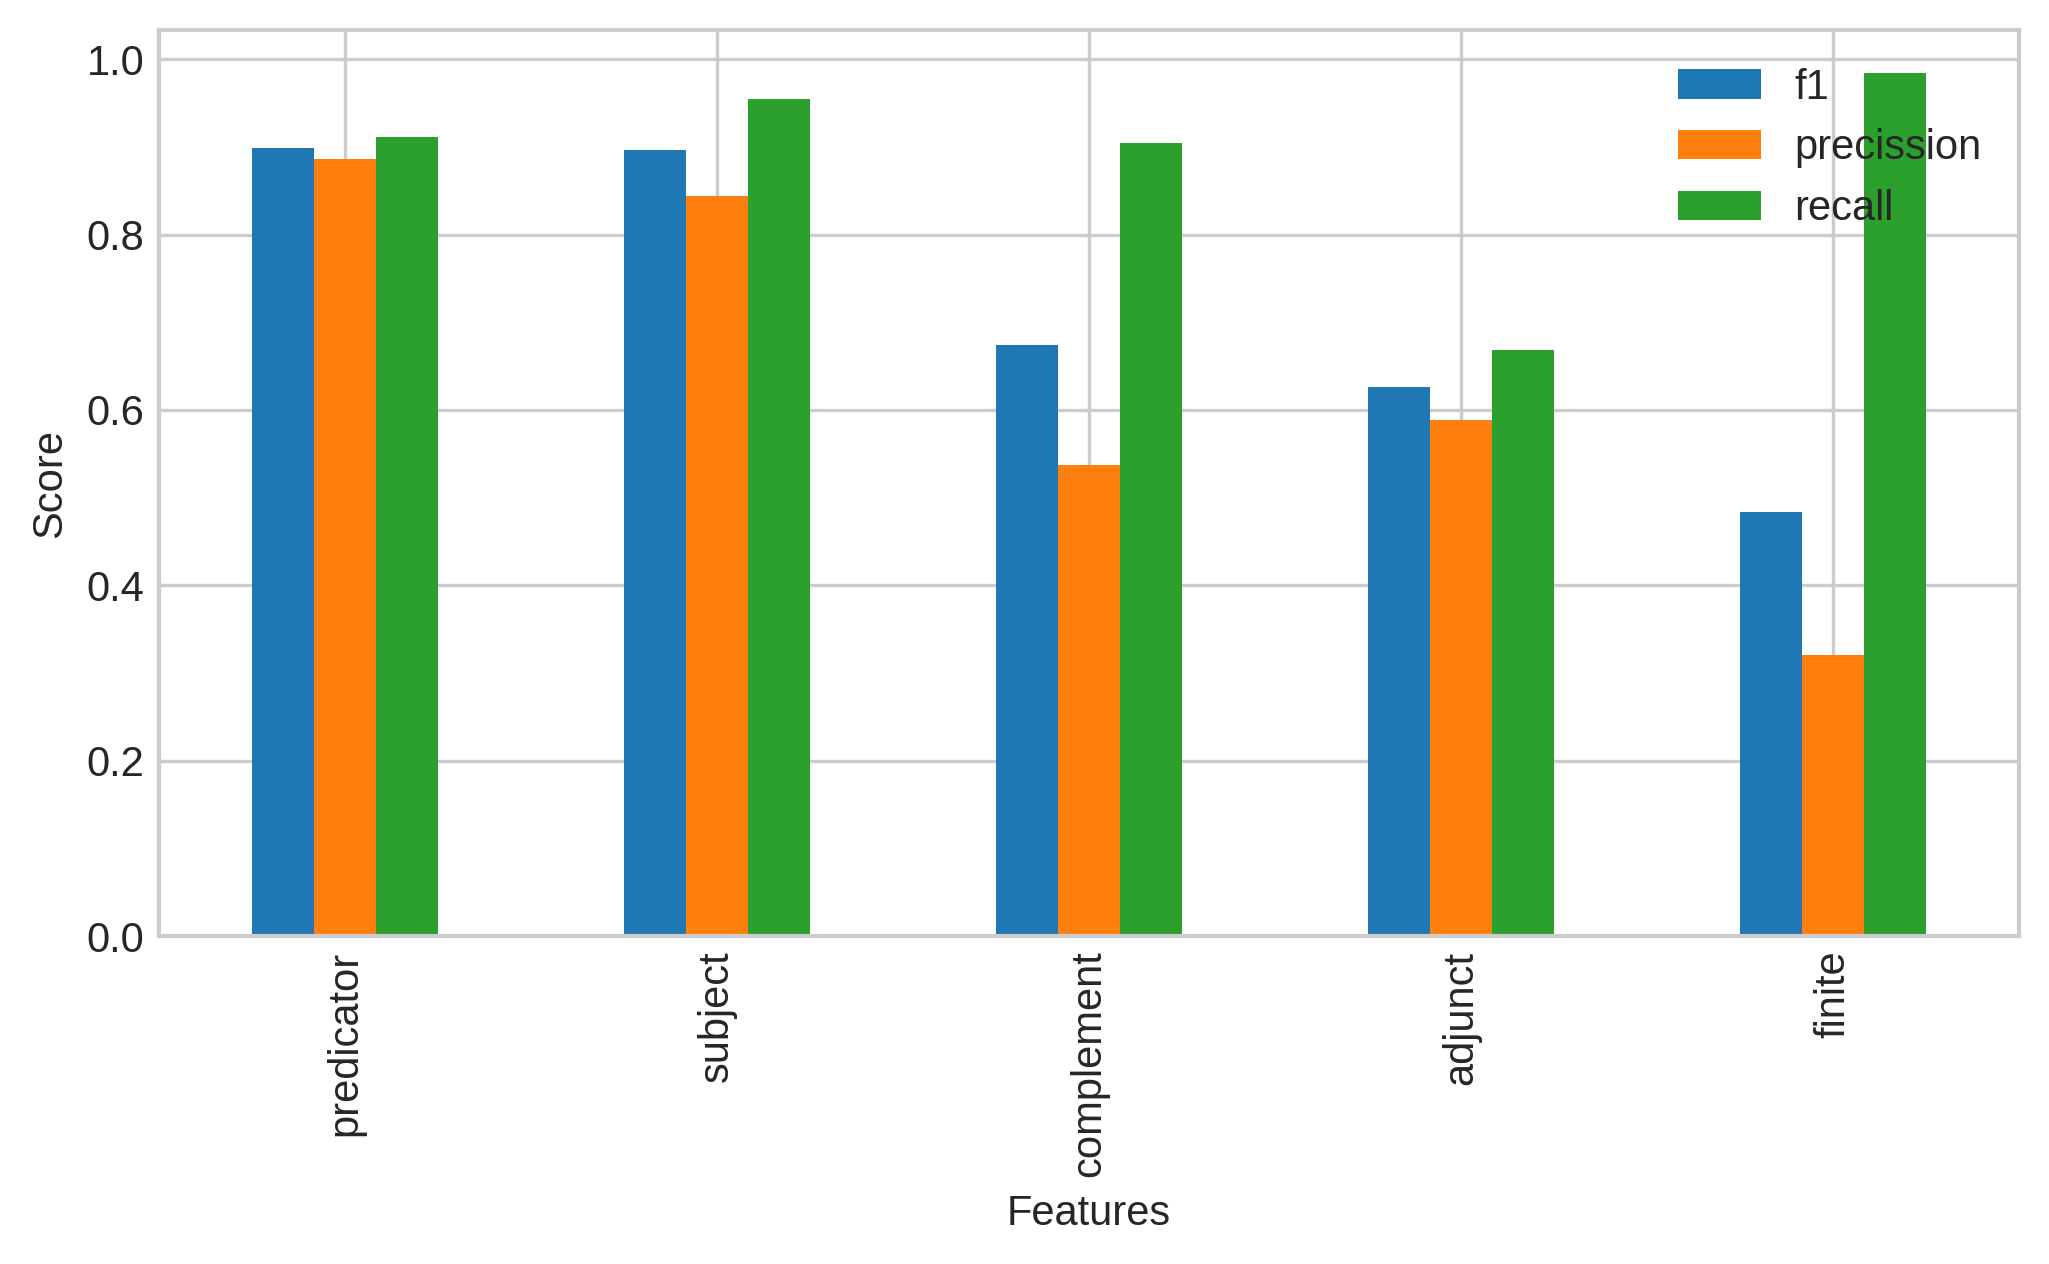

In [28]:

# Note, marker is not take into consideration
# Note, finite uniot element is mixed with finite clause feature. 
#  in OCD1_mood_file_list not in OCD1_const_file_list.
#  in OCD1_const_file_list the finite element is missing completly. 

# ---------
matches, manual_nm, parse_nm = read_batch( OCD_const_file_list )
# --------- 

matches, manual_nm, parse_nm = select_evaluation_segments(matches, manual_nm, parse_nm,
                        only_features=["predicator","subject","adjunct","complement-direct","complement"
                                       "complement-indirect","mood-adjunct", "finite"
                           ] )
# select the longer finite elements
a,b,c, = select_evaluation_segments(matches, manual_nm, parse_nm,
                        only_features=[ "finite" ],
                        longer_than=12,)

# print len(a), len(b), len(c)
# print len(matches), len(manual_nm), len(parse_nm)

# delete the longer finite elements
matches.drop(a.index,axis=0,inplace=True)
manual_nm.drop(b.index,axis=0,inplace=True)
parse_nm.drop(c.index,axis=0,inplace=True)
# print len(matches), len(manual_nm), len(parse_nm)

#  rename complement-direct into complement, and mood-ajunct into adjunct
matches["Man Features"]=matches["Man Features"].str.replace("complement-direct","complement")
matches["Man Features"]=matches["Man Features"].str.replace("complement-indirect","complement")
matches["Man Features"]=matches["Man Features"].str.replace("mood-adjunct","adjunct")
manual_nm["Features"]=manual_nm["Features"].str.replace("complement-direct","complement")
manual_nm["Features"]=manual_nm["Features"].str.replace("complement-indirect","complement")
manual_nm["Features"]=manual_nm["Features"].str.replace("mood-adjunct","adjunct")
parse_nm["Features"]=parse_nm["Features"].str.replace("complement-direct","complement")
parse_nm["Features"]=parse_nm["Features"].str.replace("complement-indirect","complement")
parse_nm["Features"]=parse_nm["Features"].str.replace("mood-adjunct","adjunct")

# d.drop(d.loc[d['Man Features']=="verb"].index, inplace=True)

# dsp_evaluation_segments(matches, manual_nm, parse_nm,only_features=["finite"],)
stats = make_stats(matches, manual_nm, parse_nm,
                   filters=["predicator","subject","adjunct","complement-direct","mood-adjunct",
                            "complement","complement-indirect","finite"
                           ])

# Mood: on matched features and precission, recall, f1 [OCD1]

### All features

In [29]:
# ---------
matches, manual_nm, parse_nm = read_batch( OCD_mood_file_list )
# --------- 
# stats = make_stats(matches, manual_nm, parse_nm, filters=[])

### Polarity

notebook_functions.py:150: RuntimeWarning: invalid value encountered in double_scalars
  return true_positives / (false_positives + true_positives)


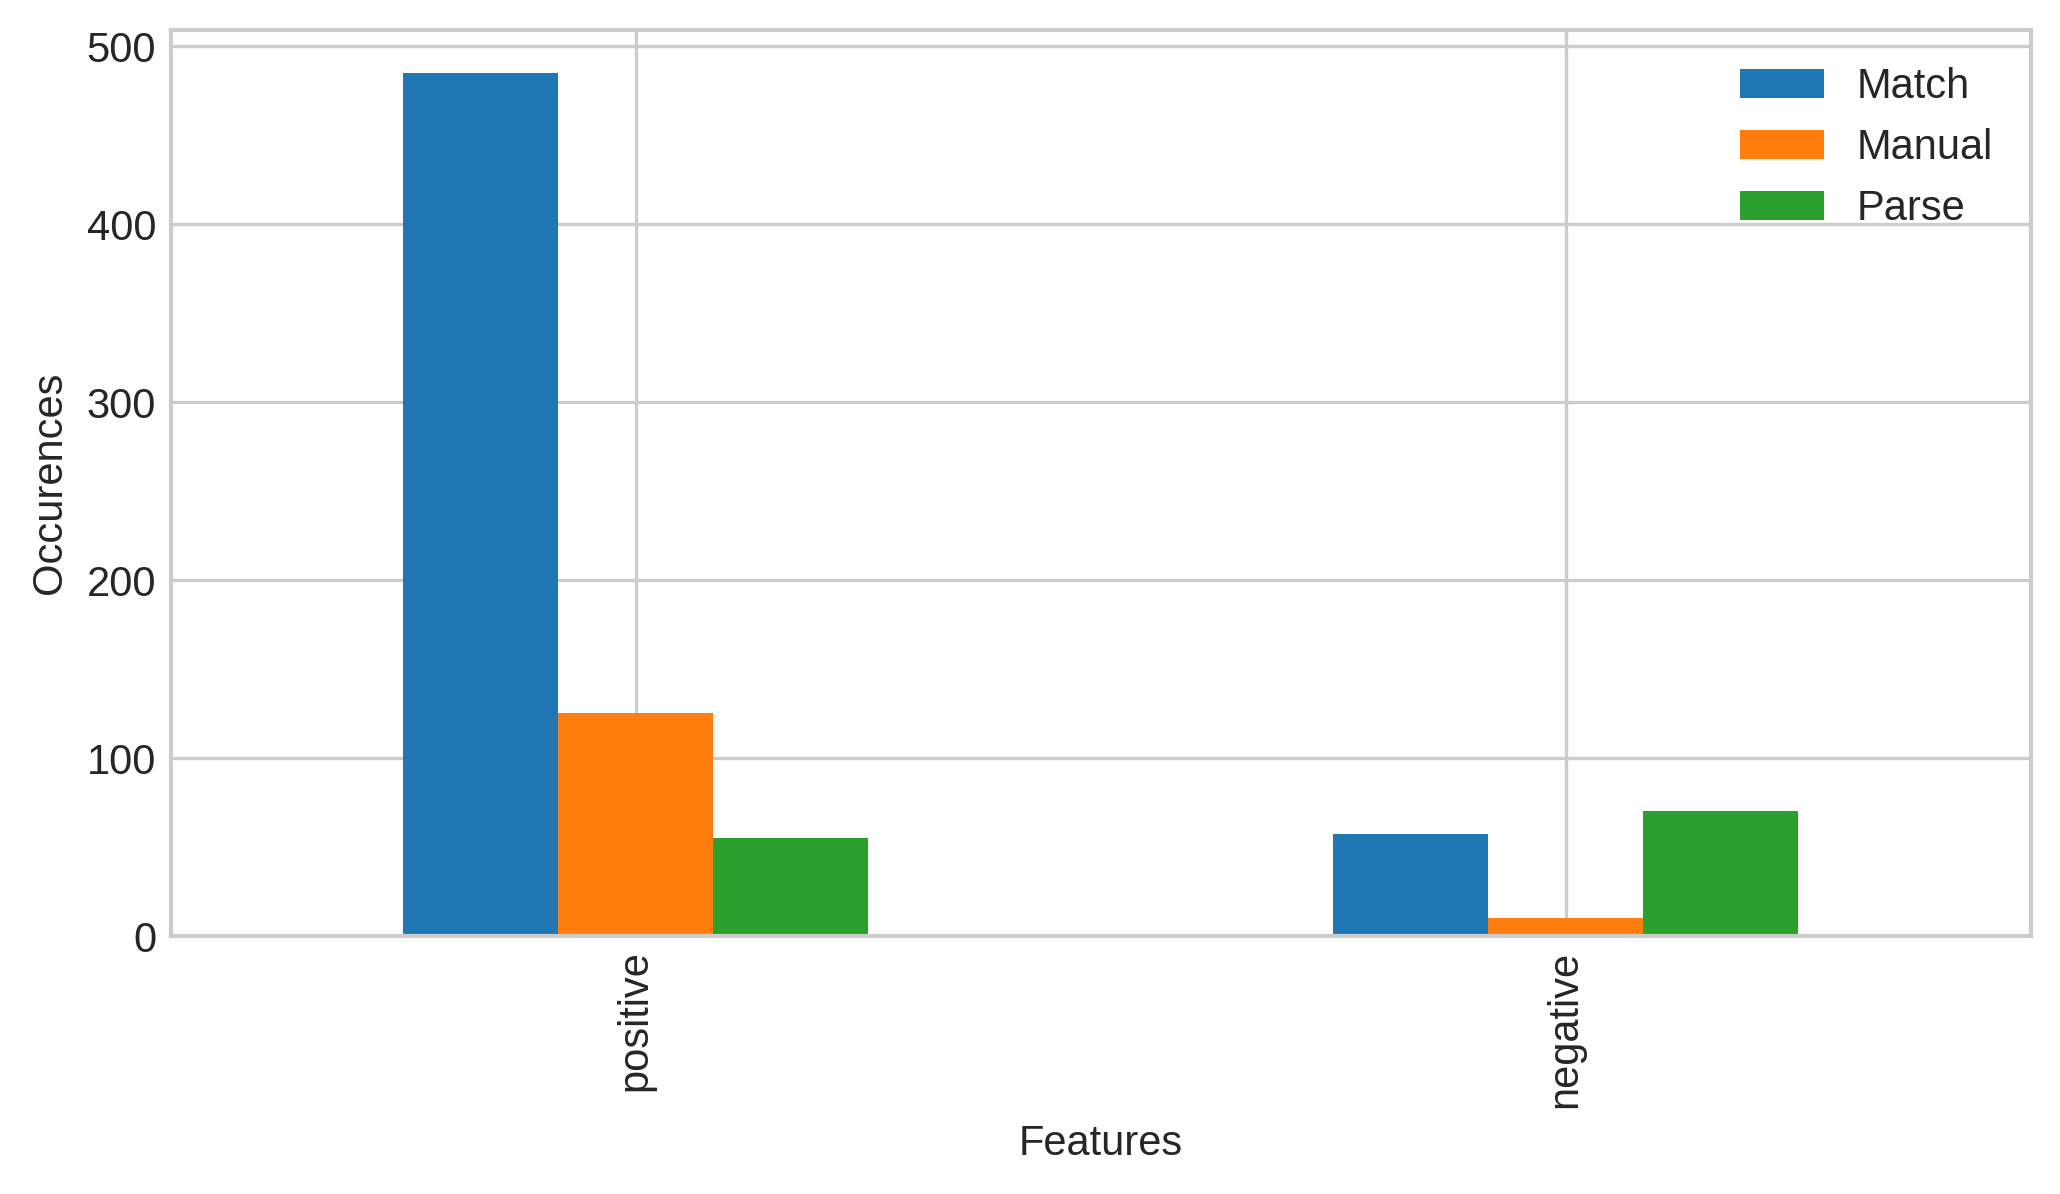

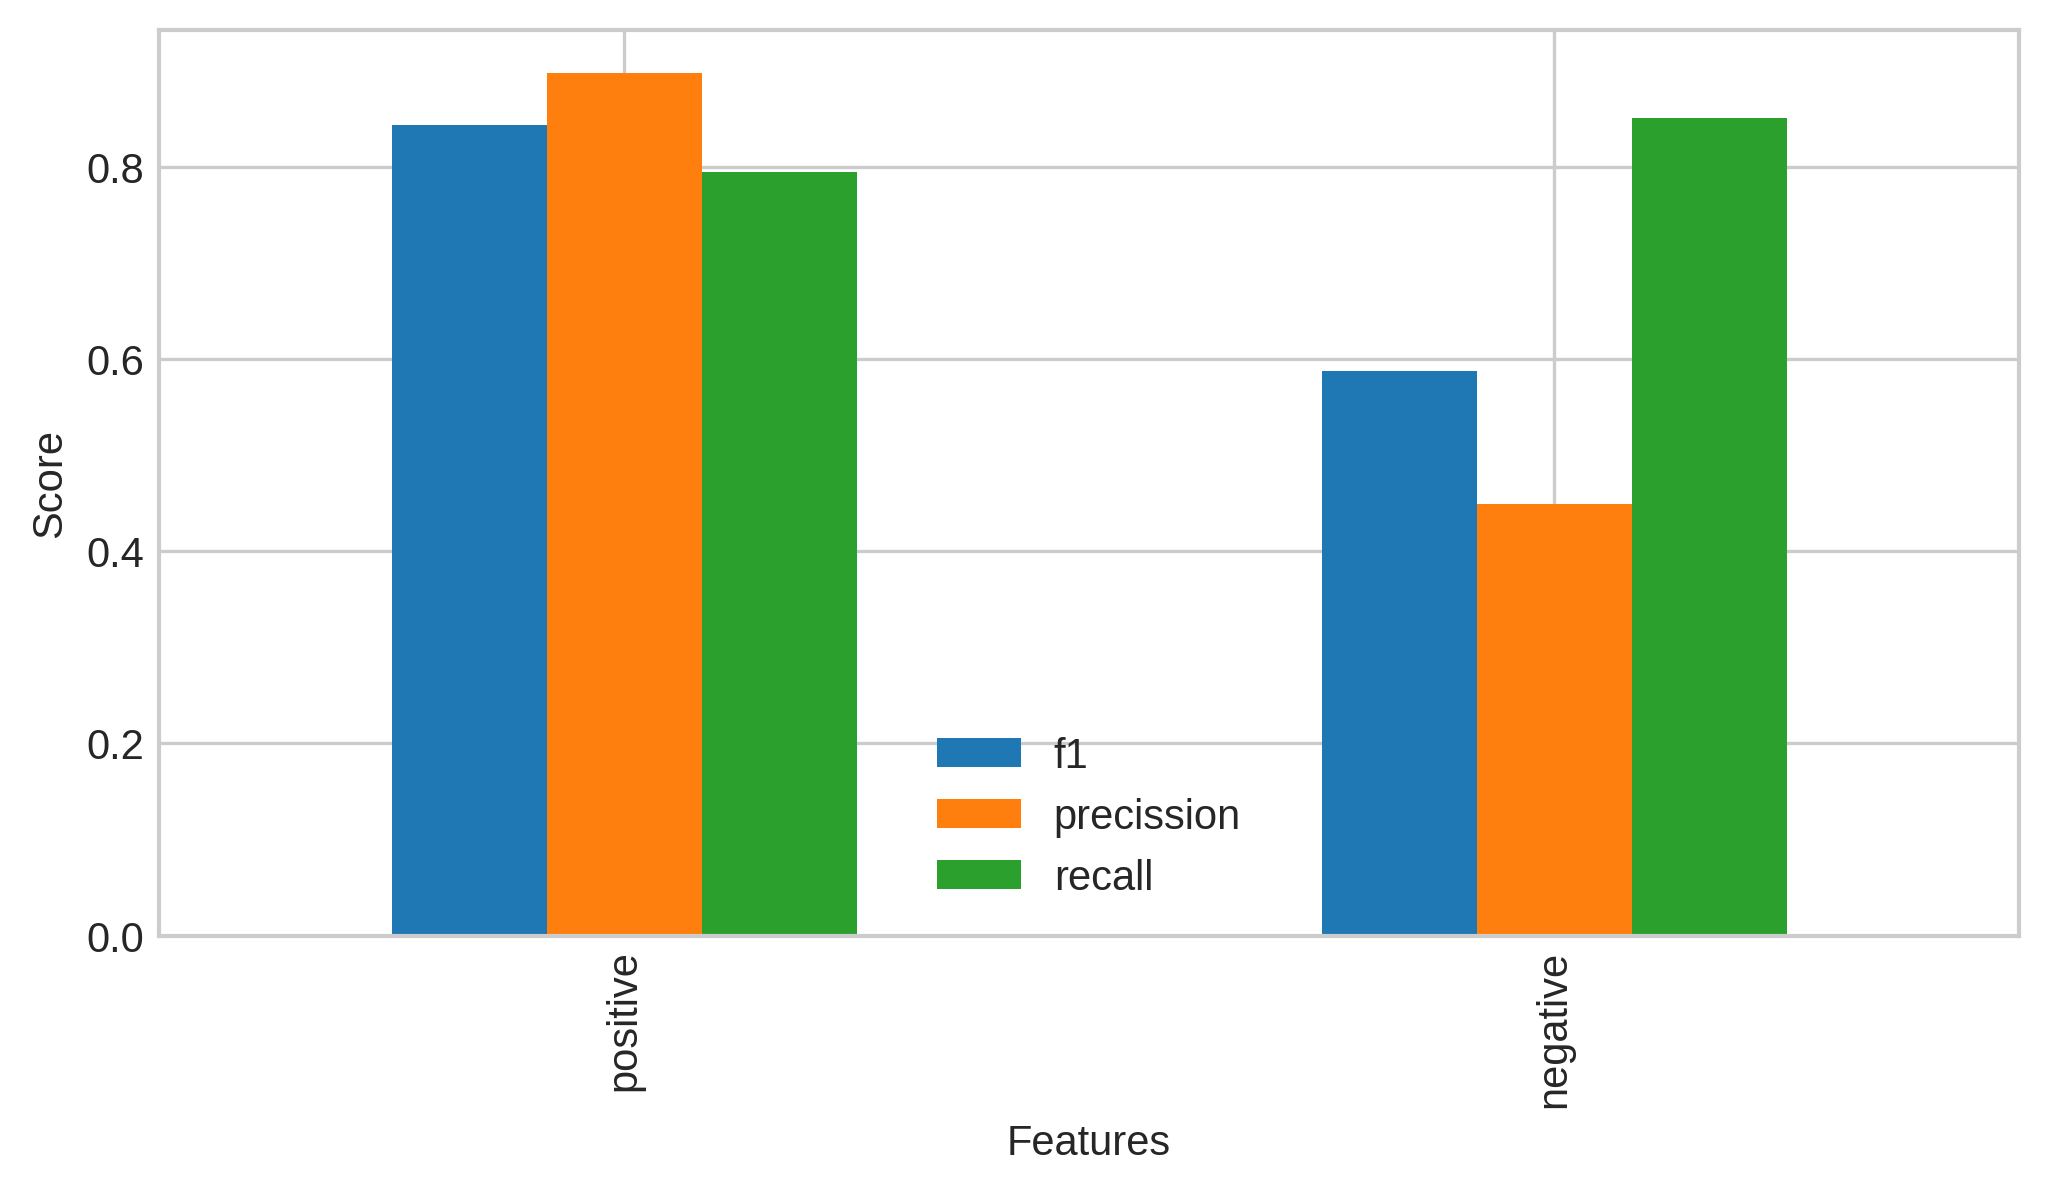

In [30]:
stats = make_stats(matches, manual_nm, parse_nm, filters=["positive","negative"])

### Voice

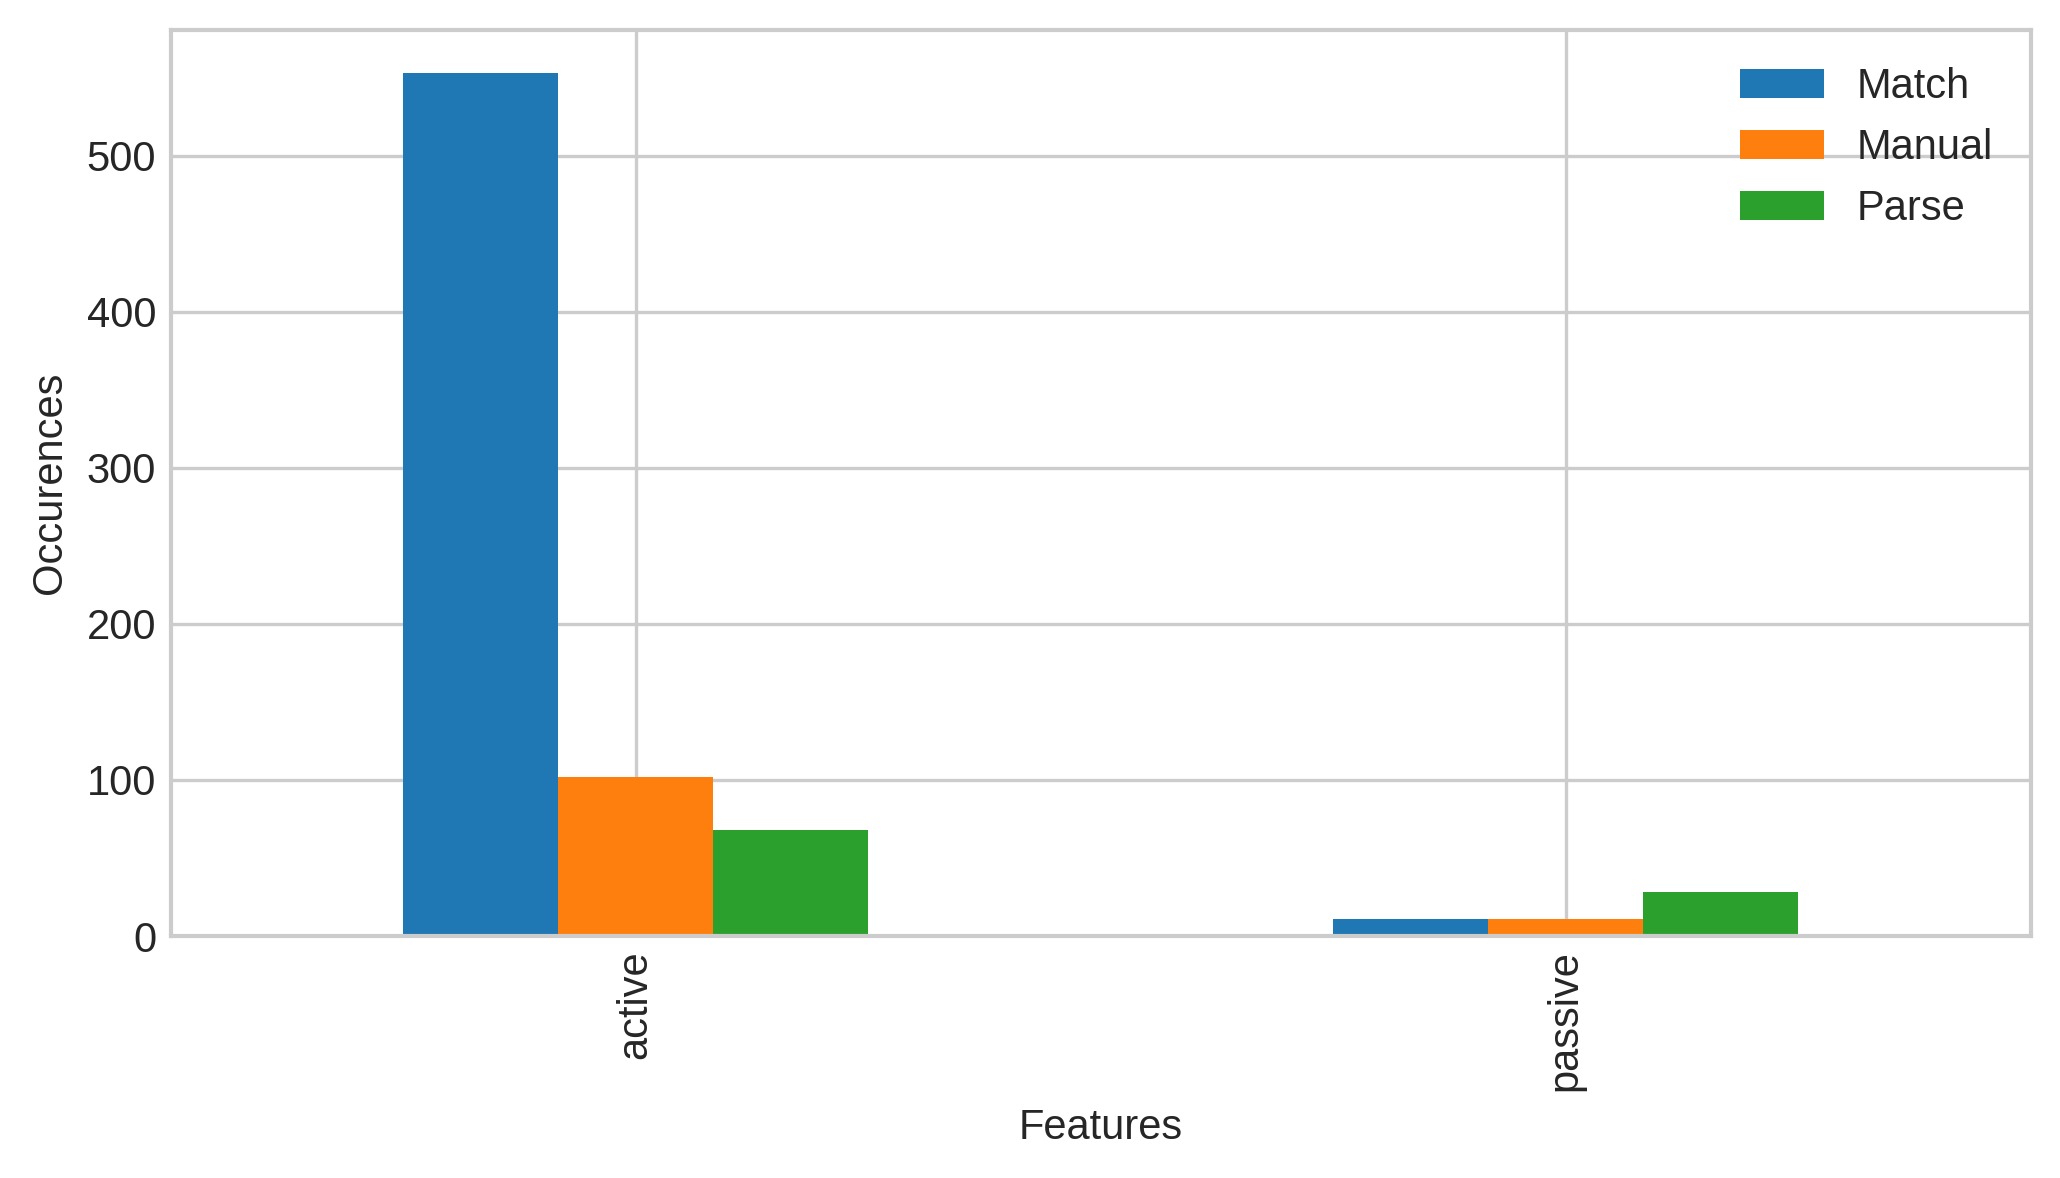

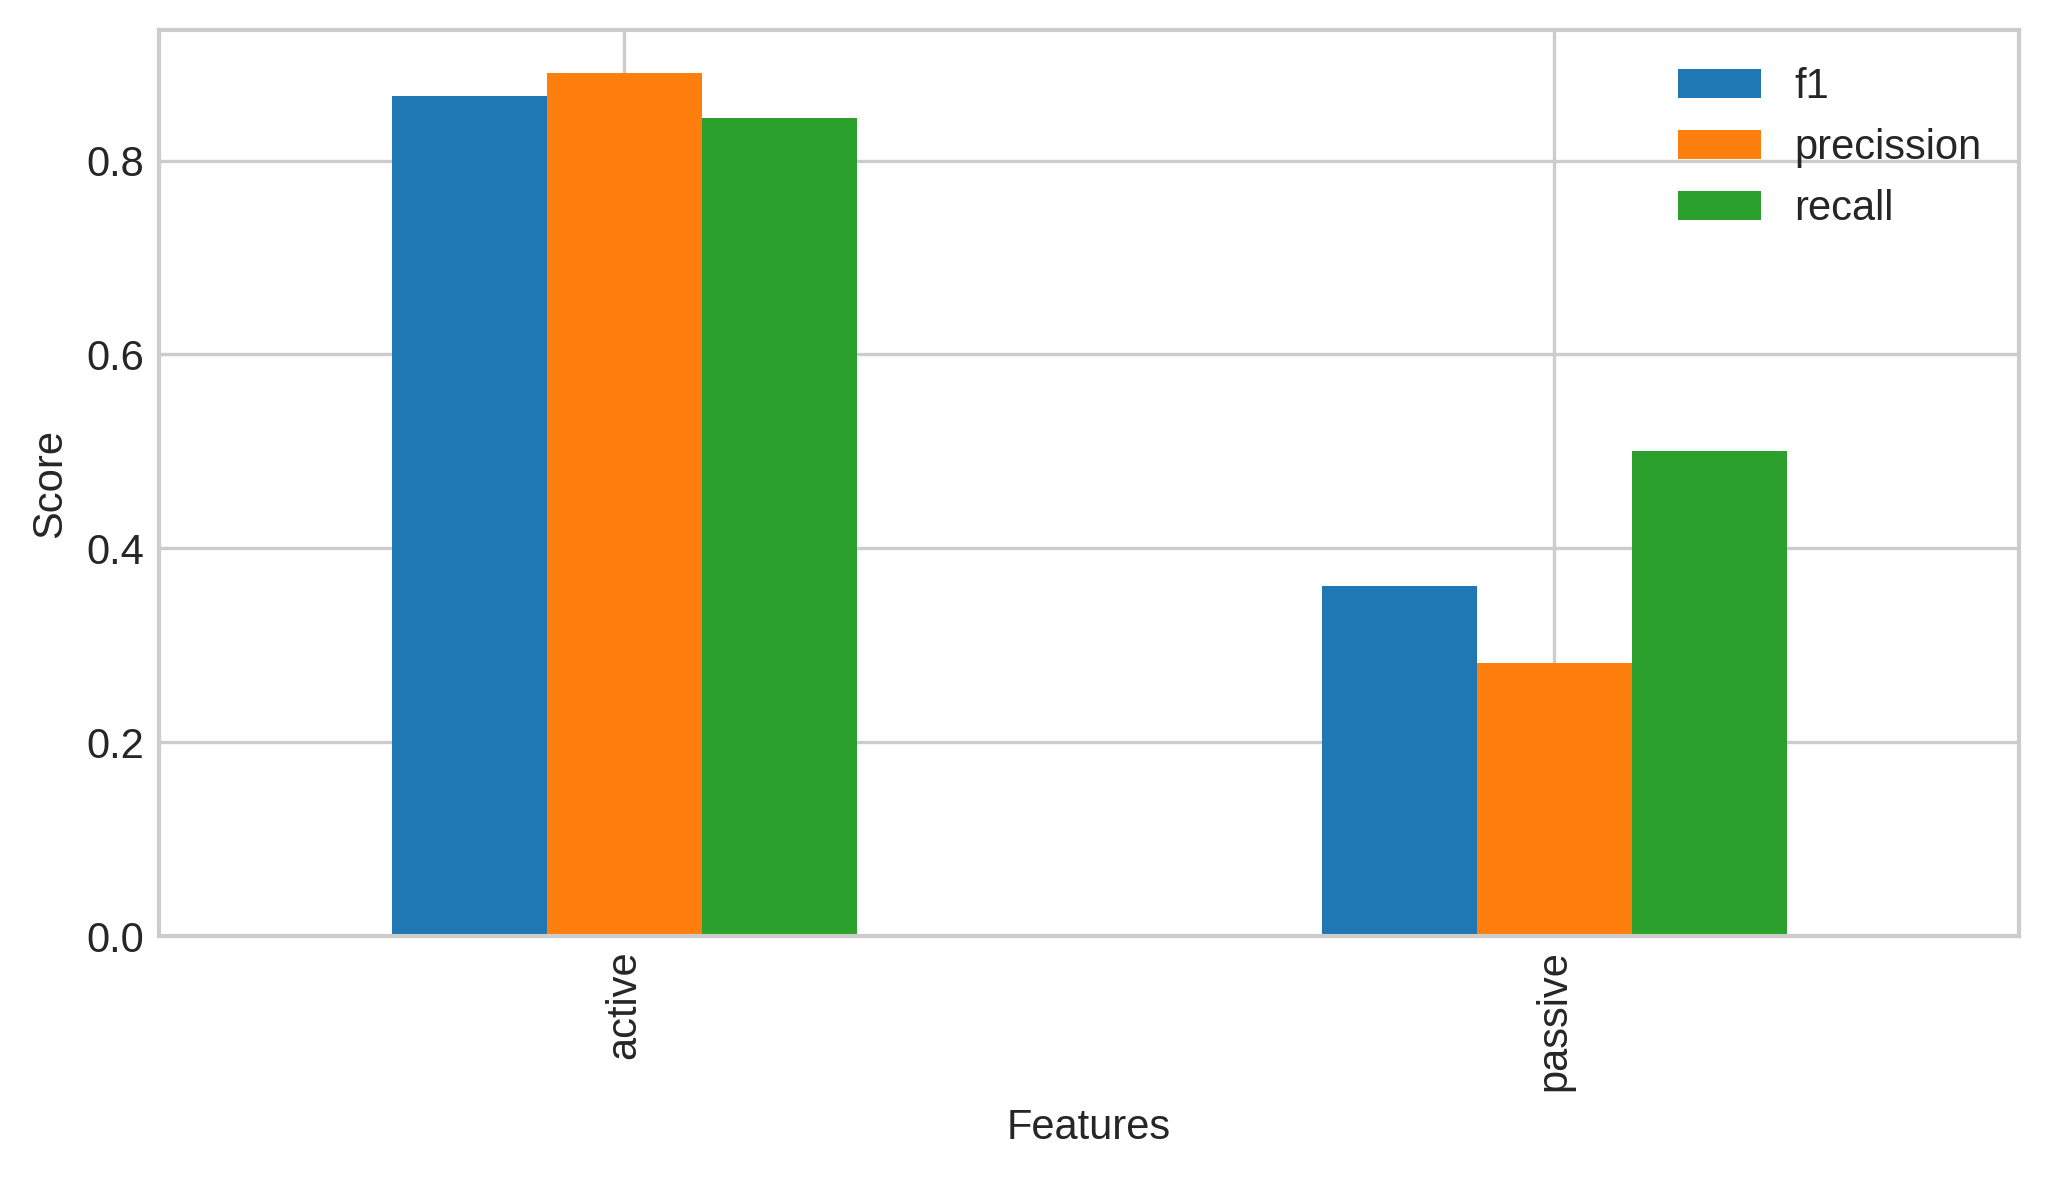

In [31]:
stats = make_stats(matches, manual_nm, parse_nm, filters=["active","passive"])

### Finitness

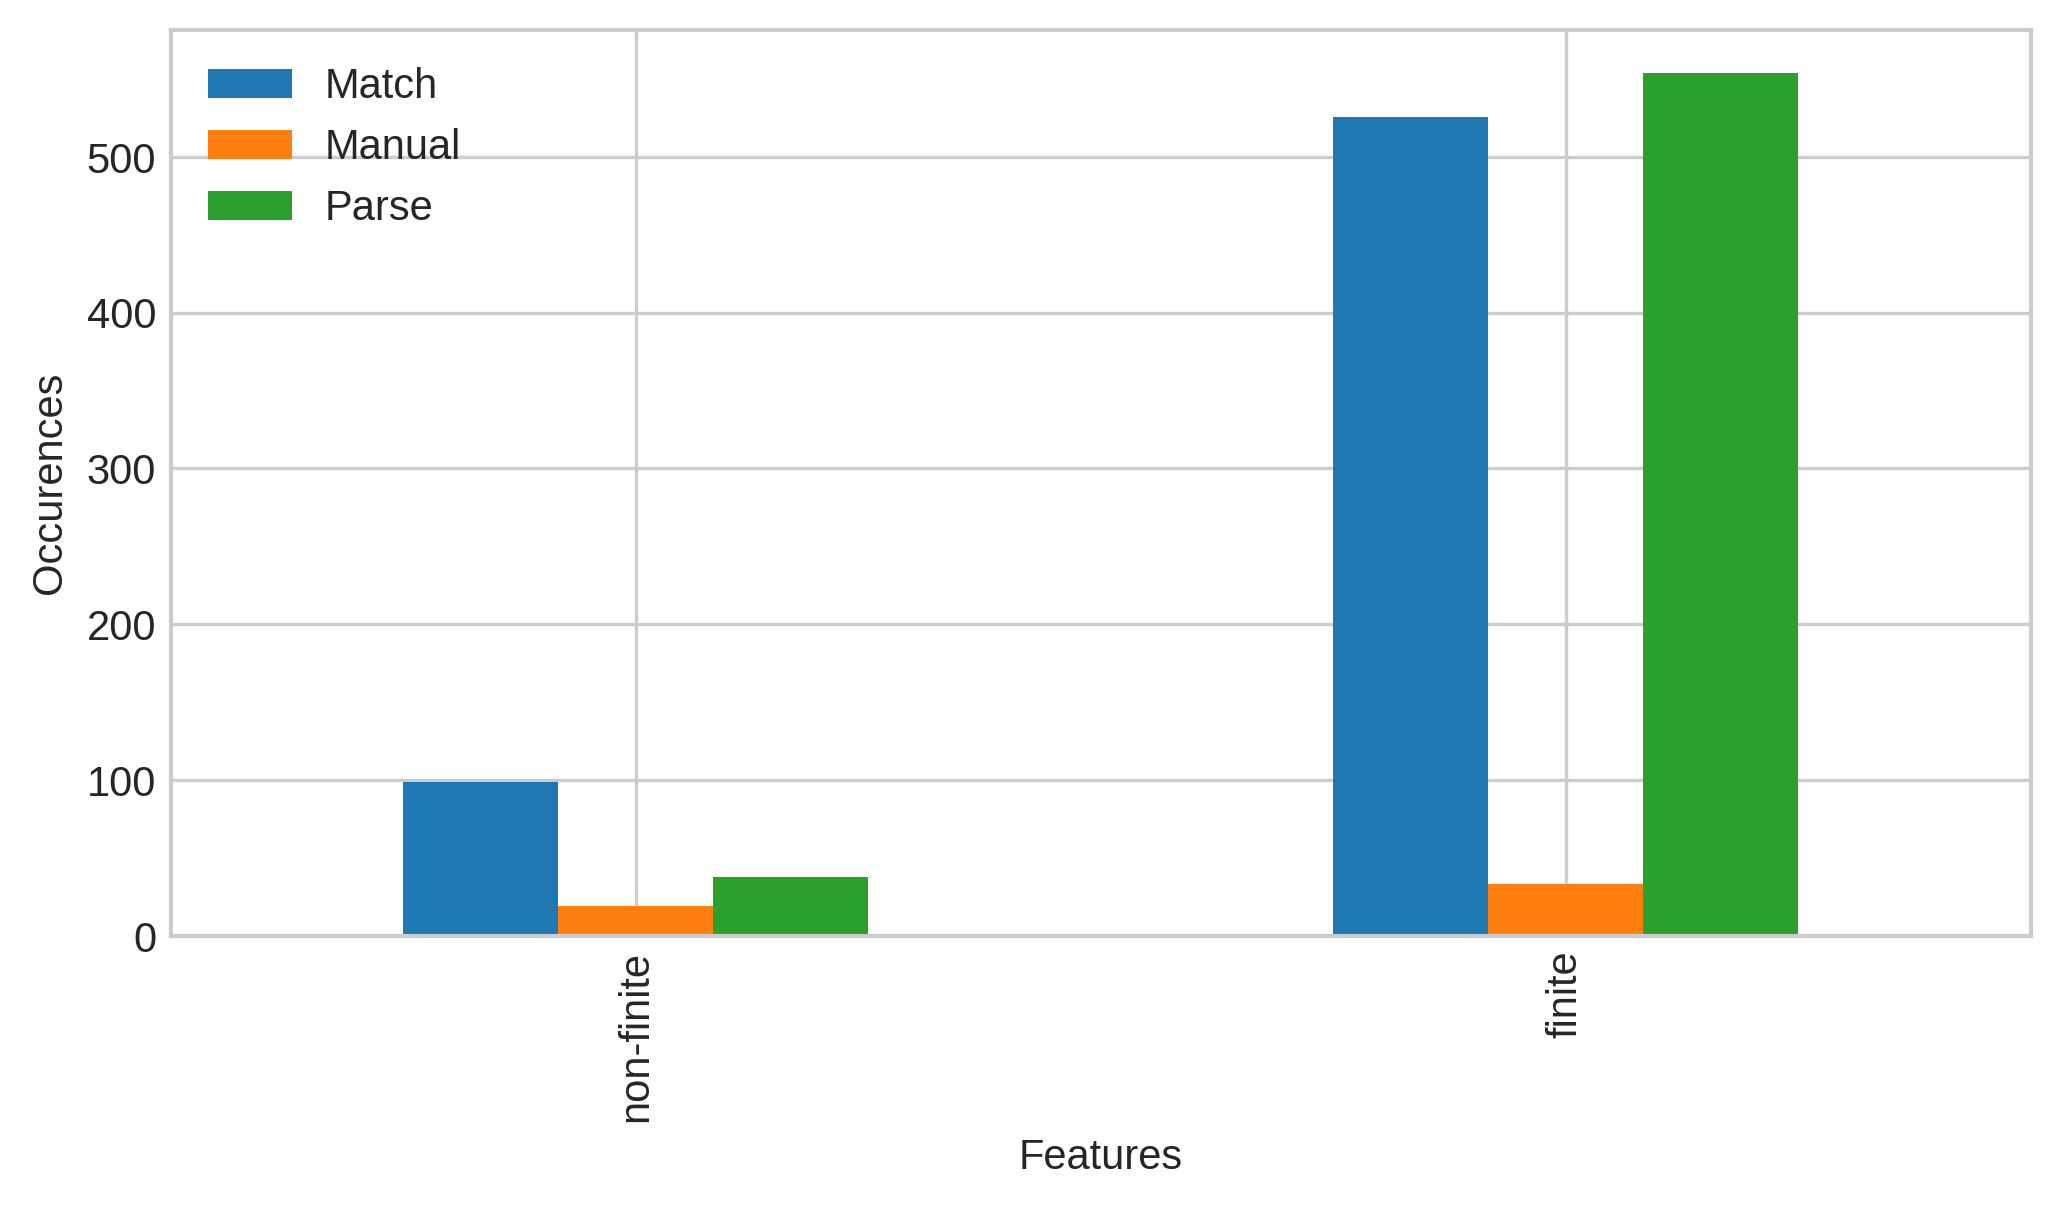

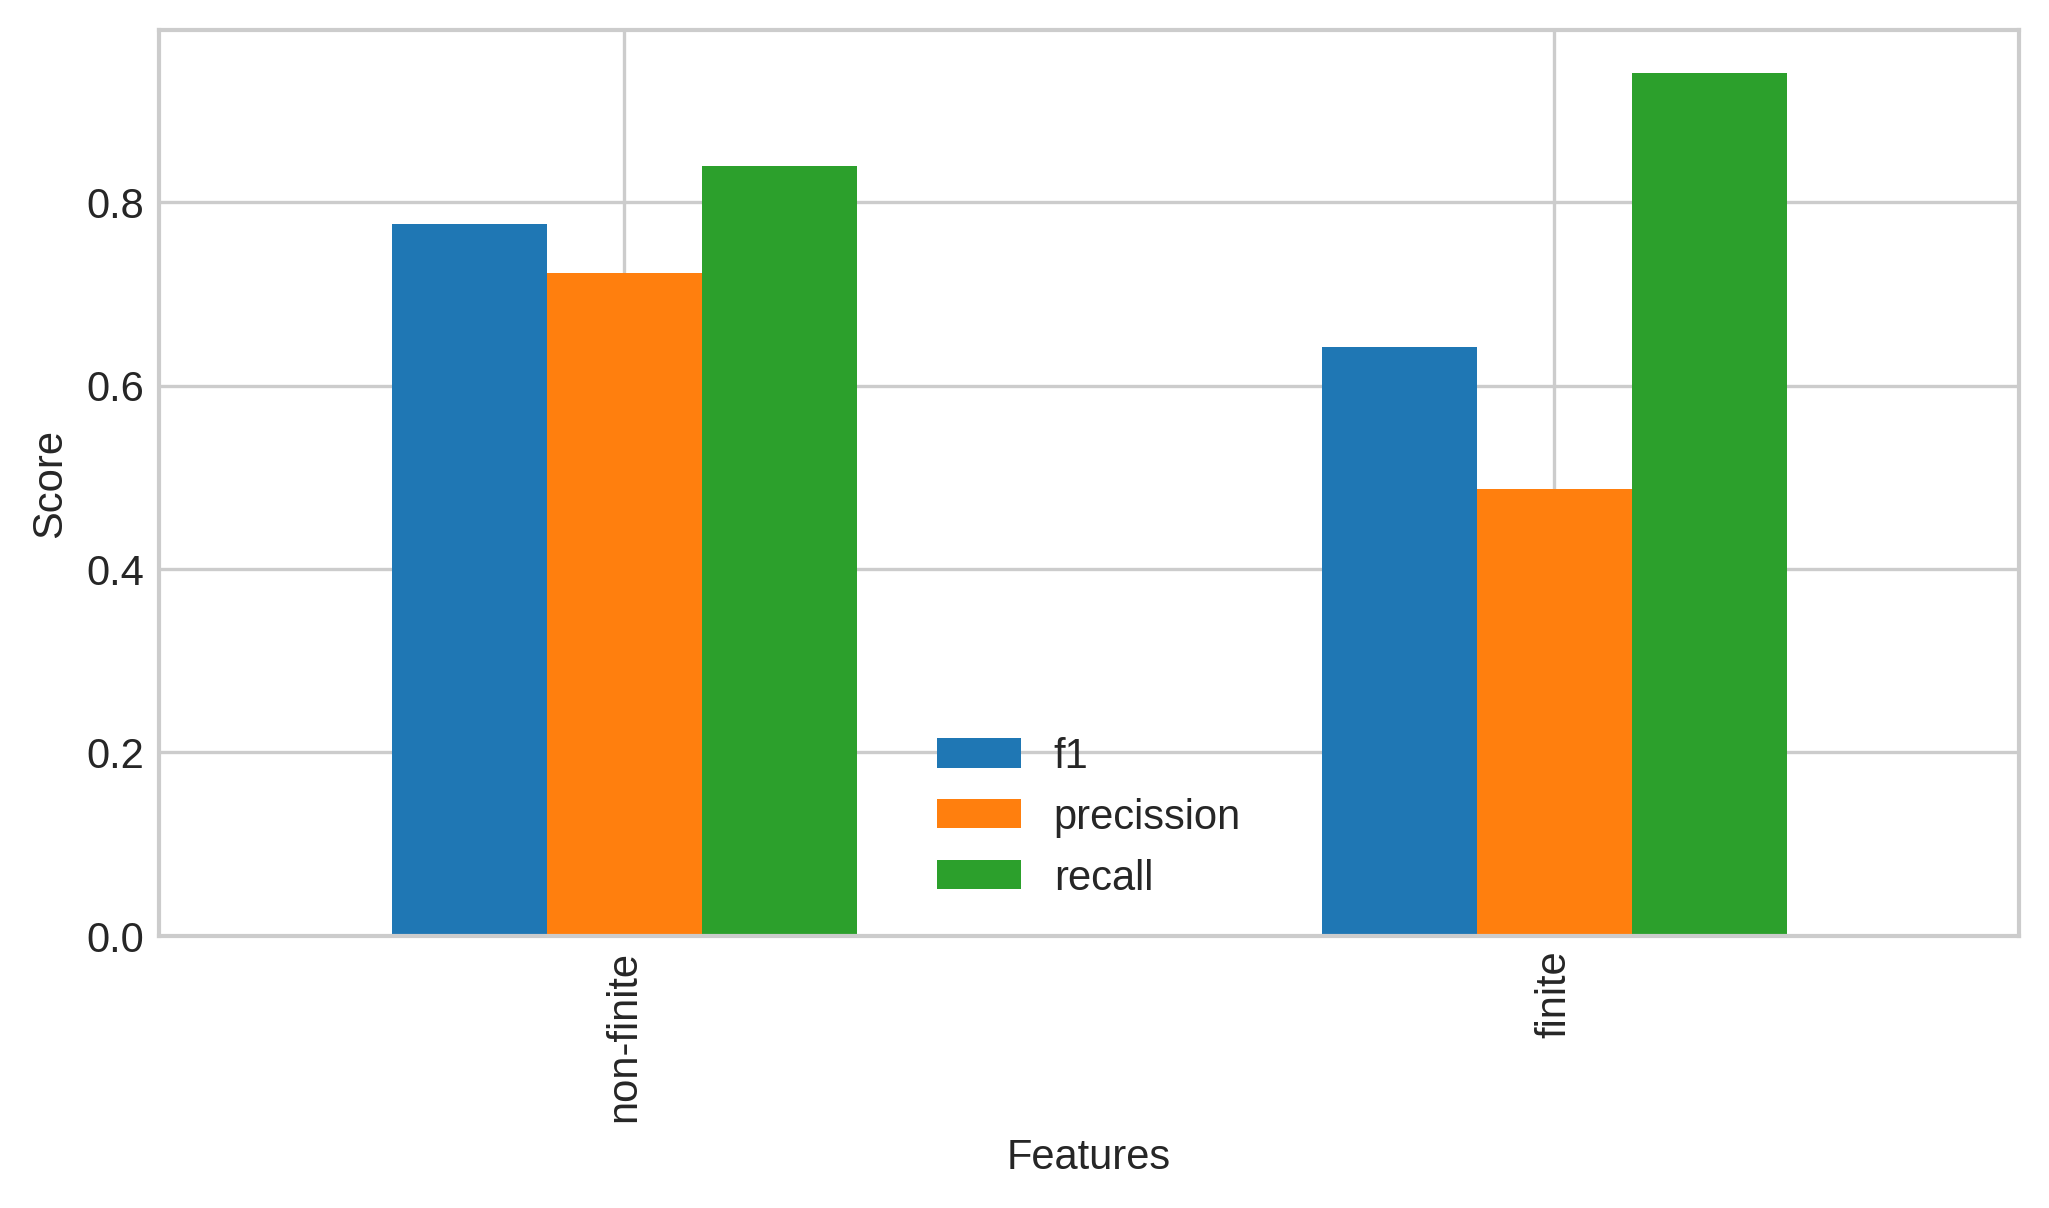

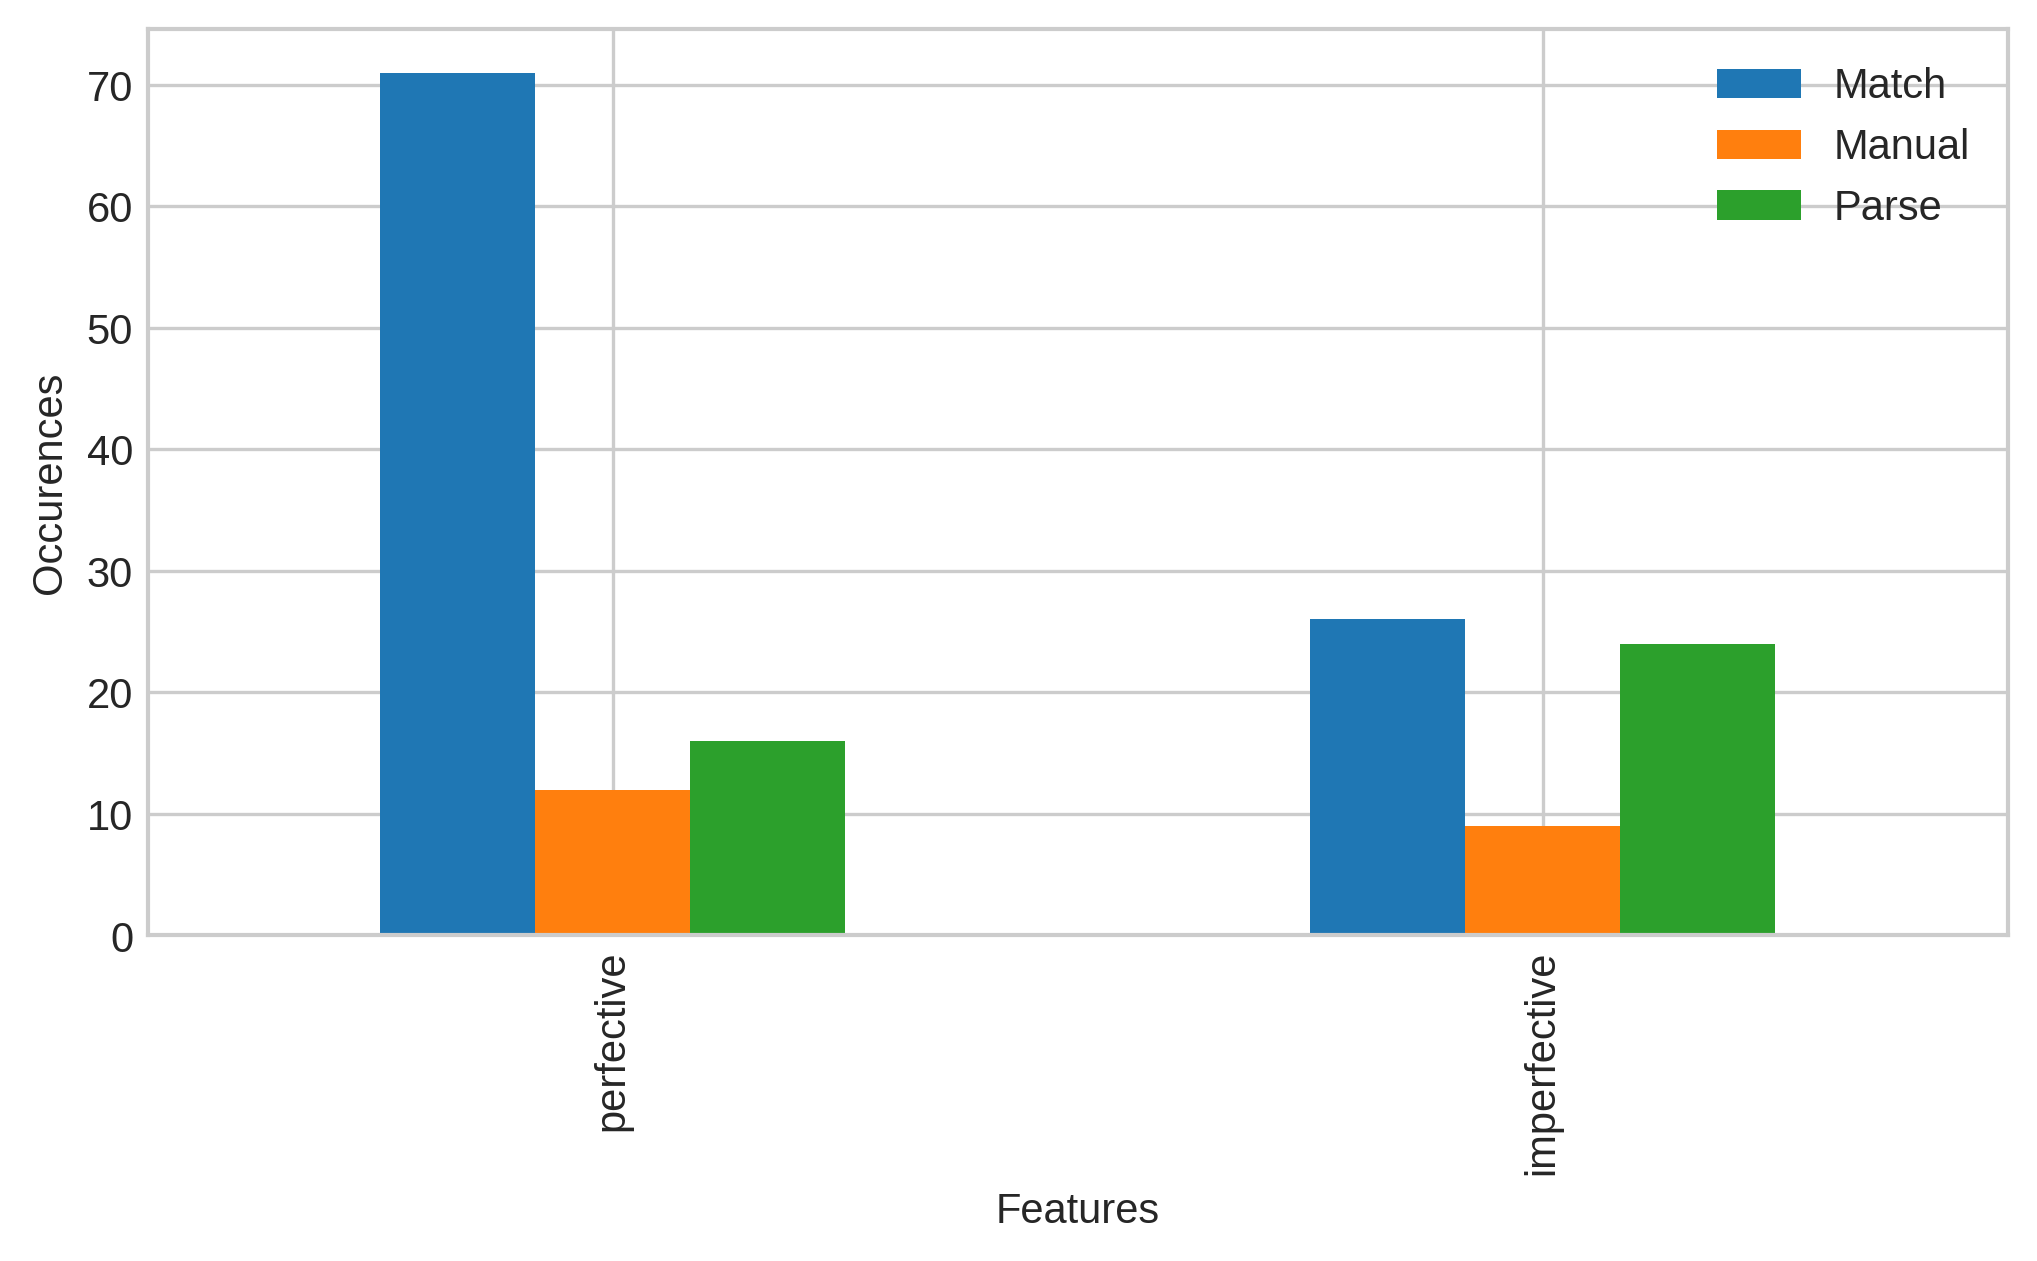

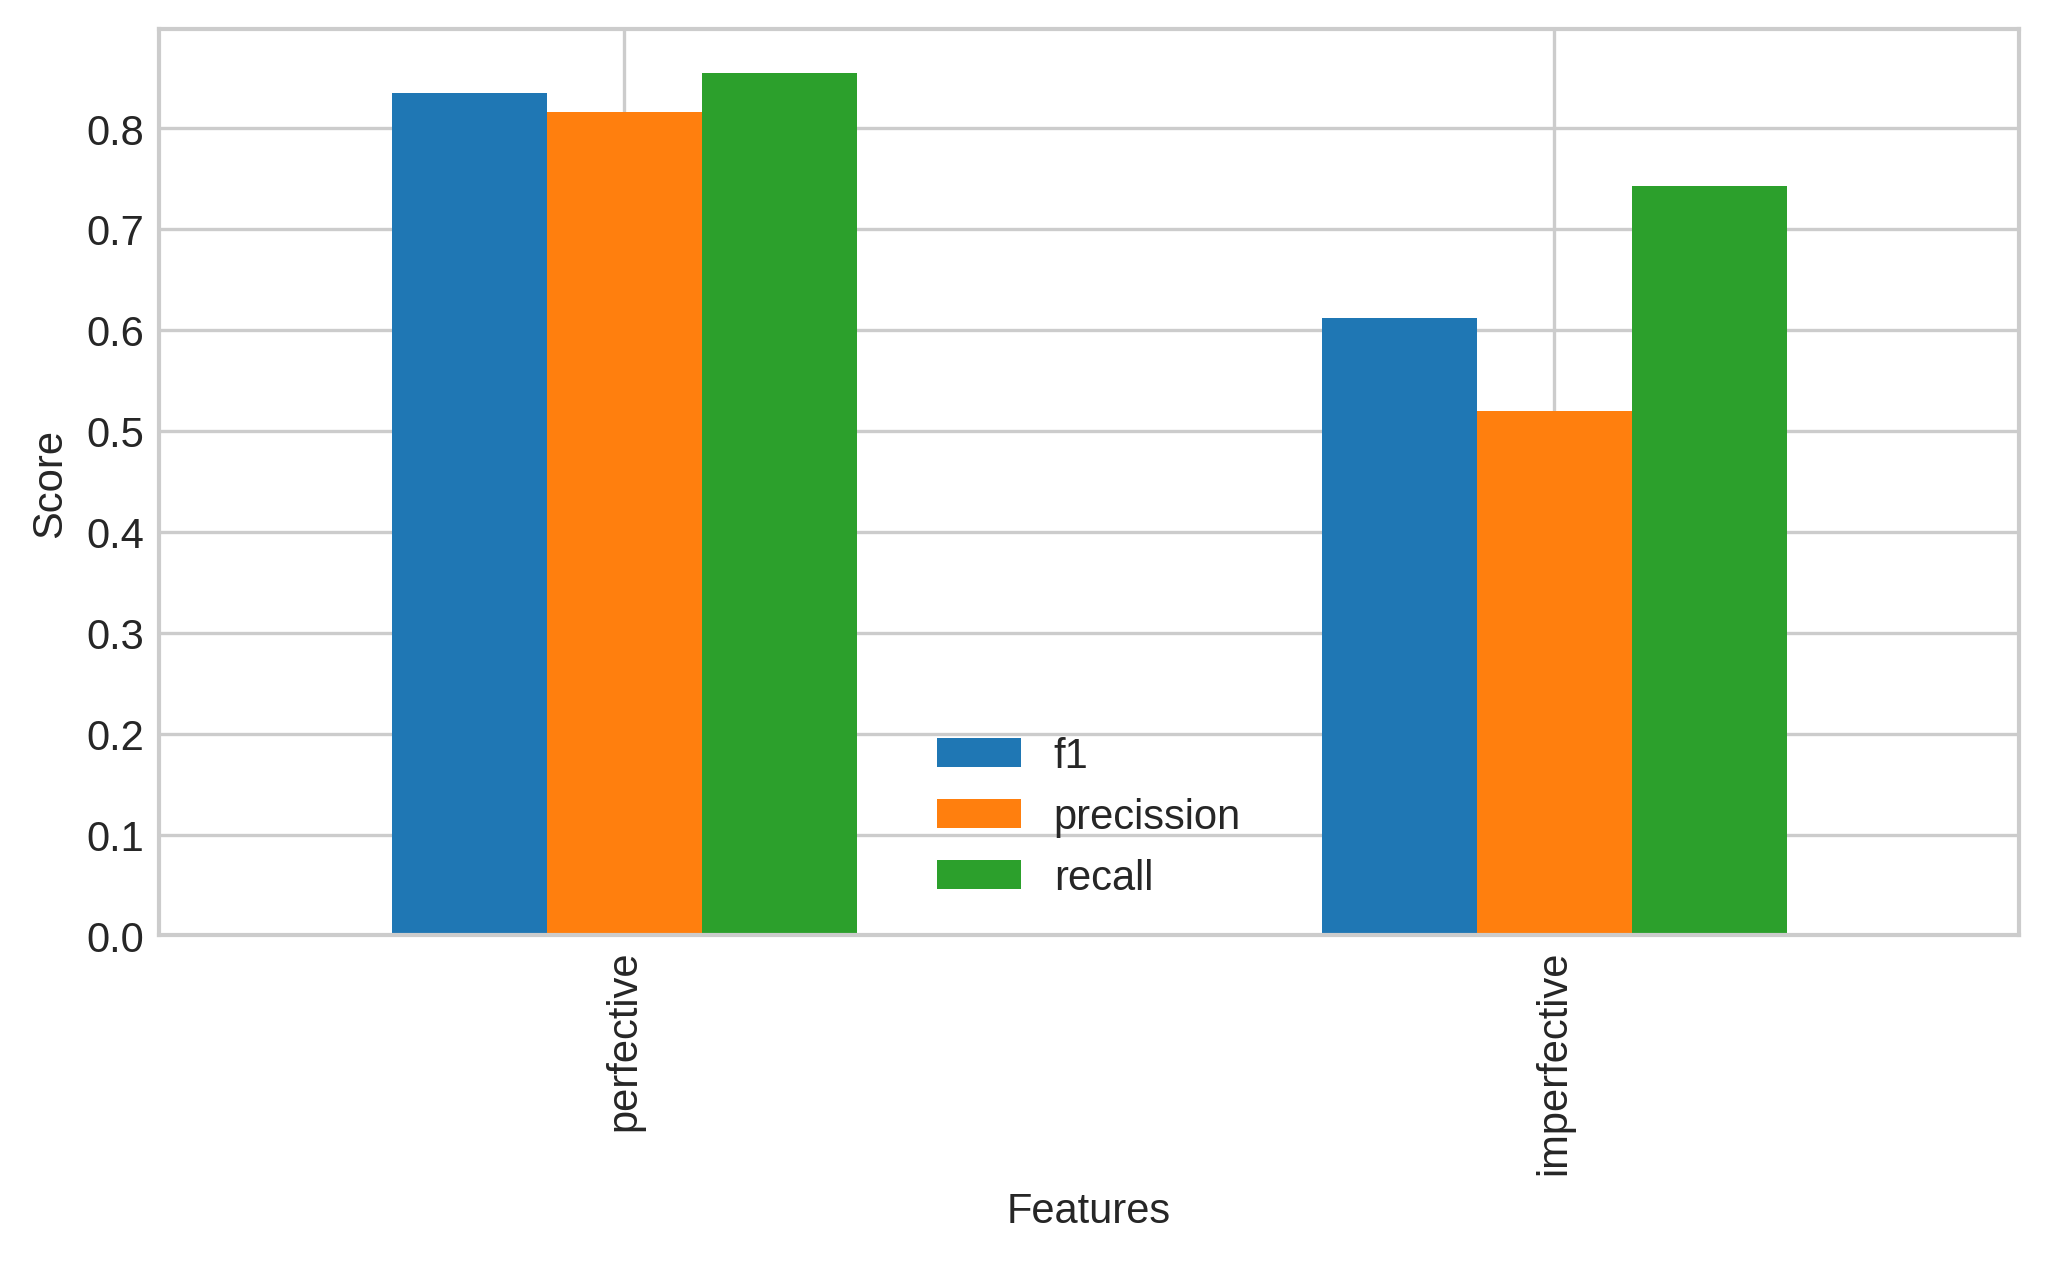

In [32]:
stats = make_stats(matches, manual_nm, parse_nm, filters=["finite","non-finite"]) 

stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["perfective","imperfective"])

### Mood

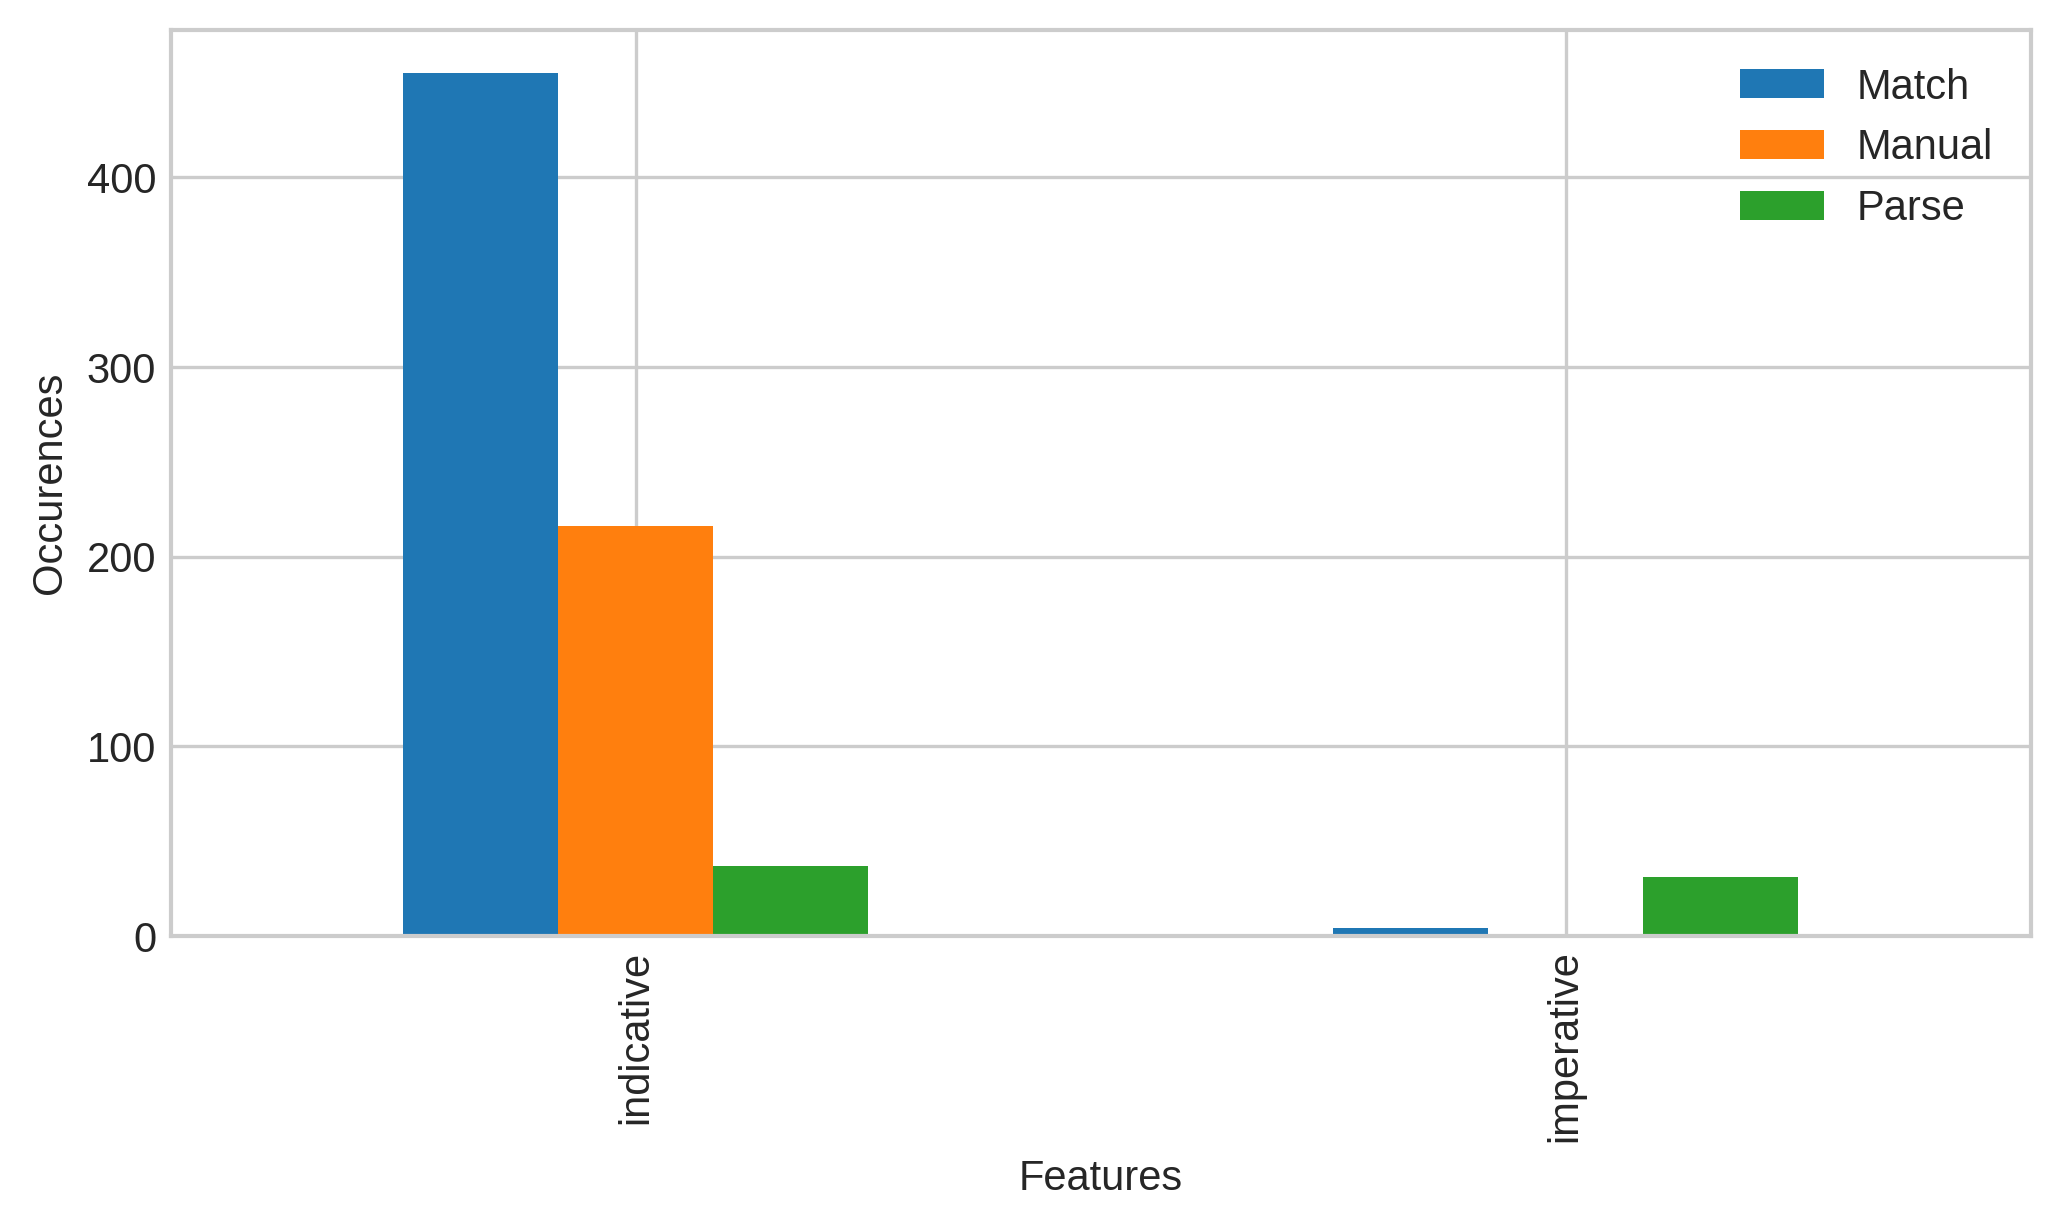

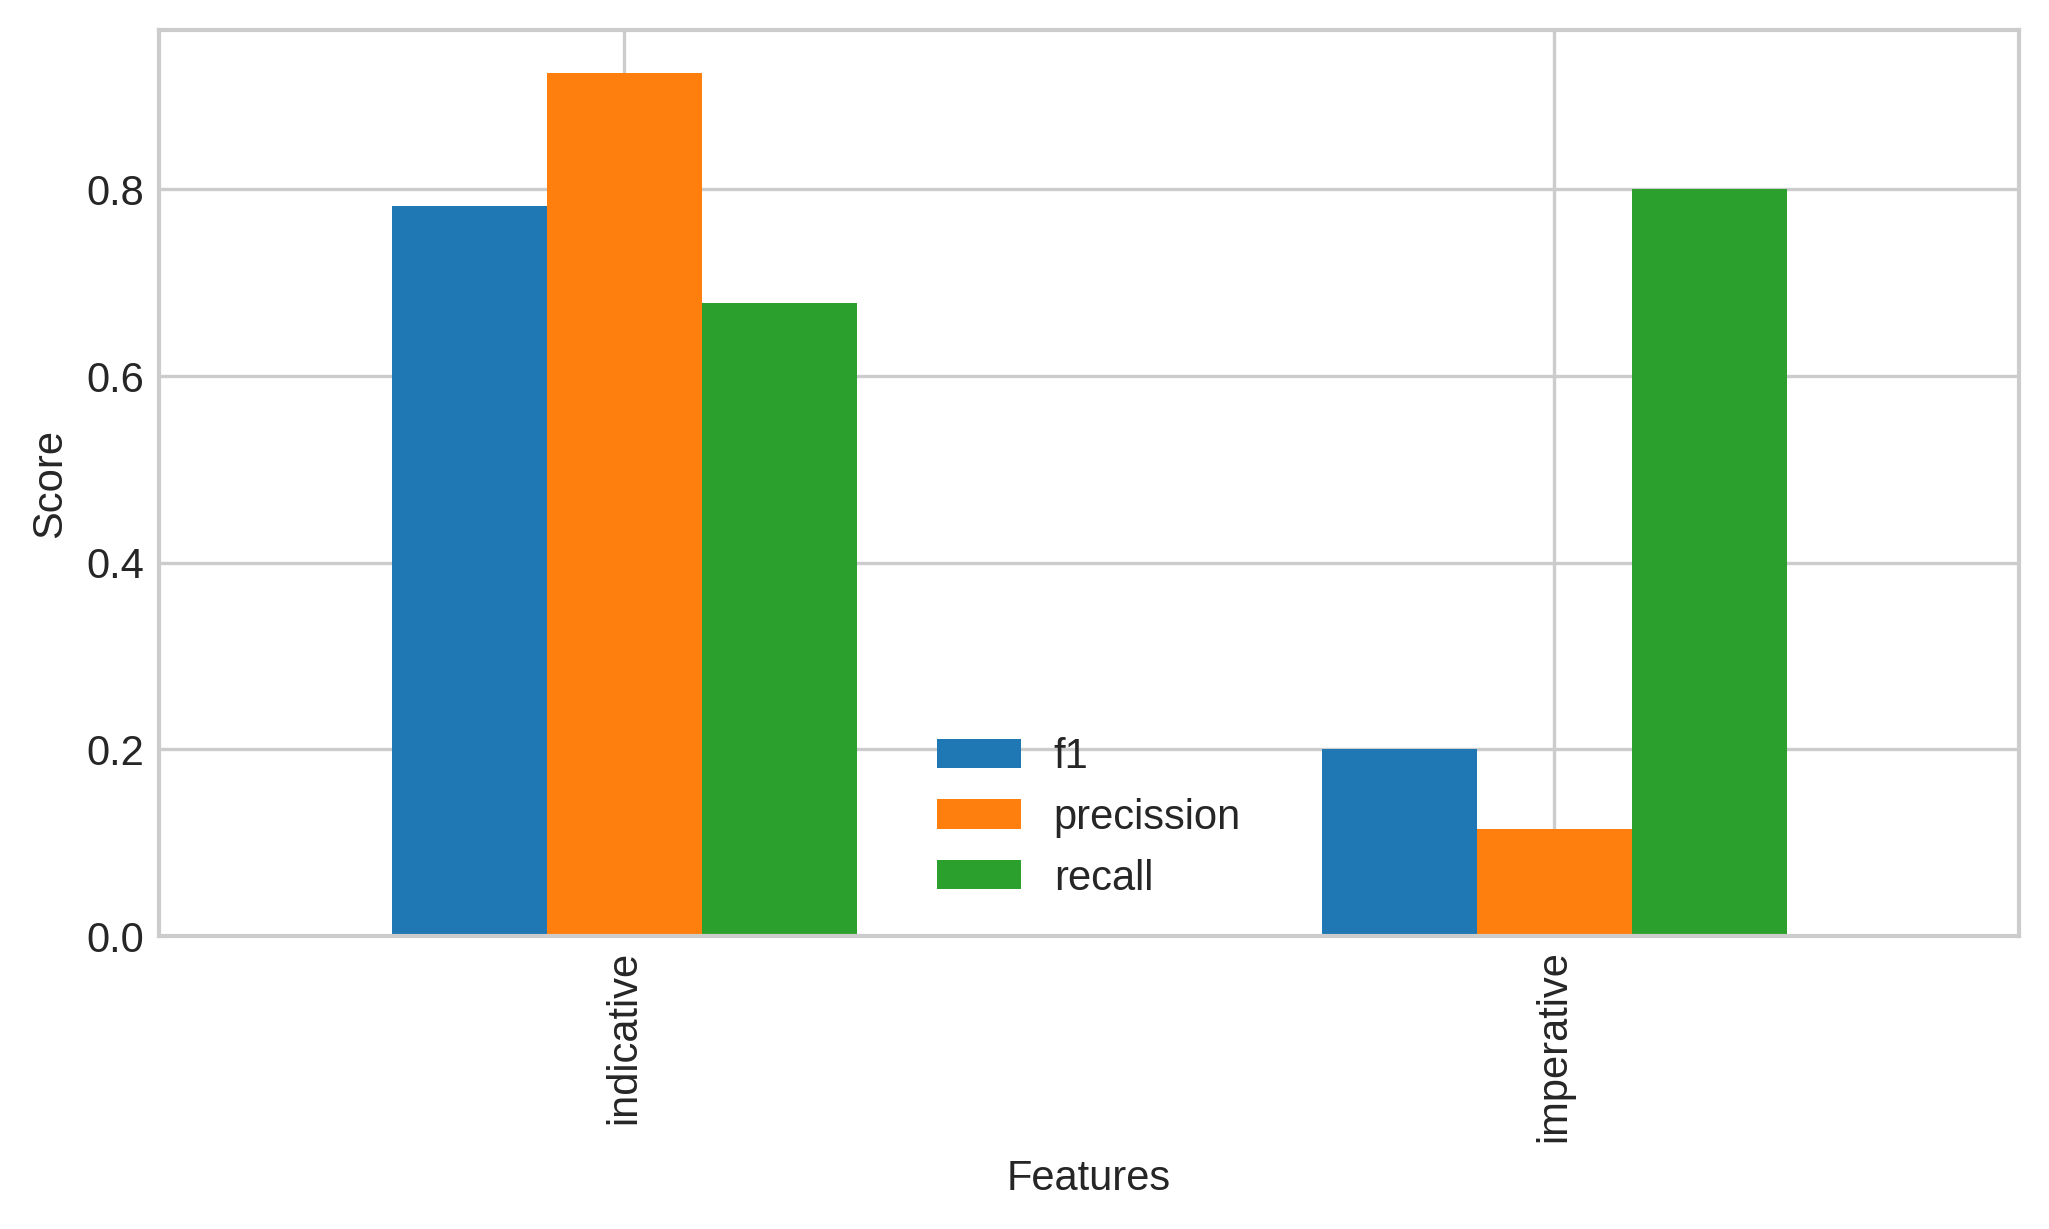

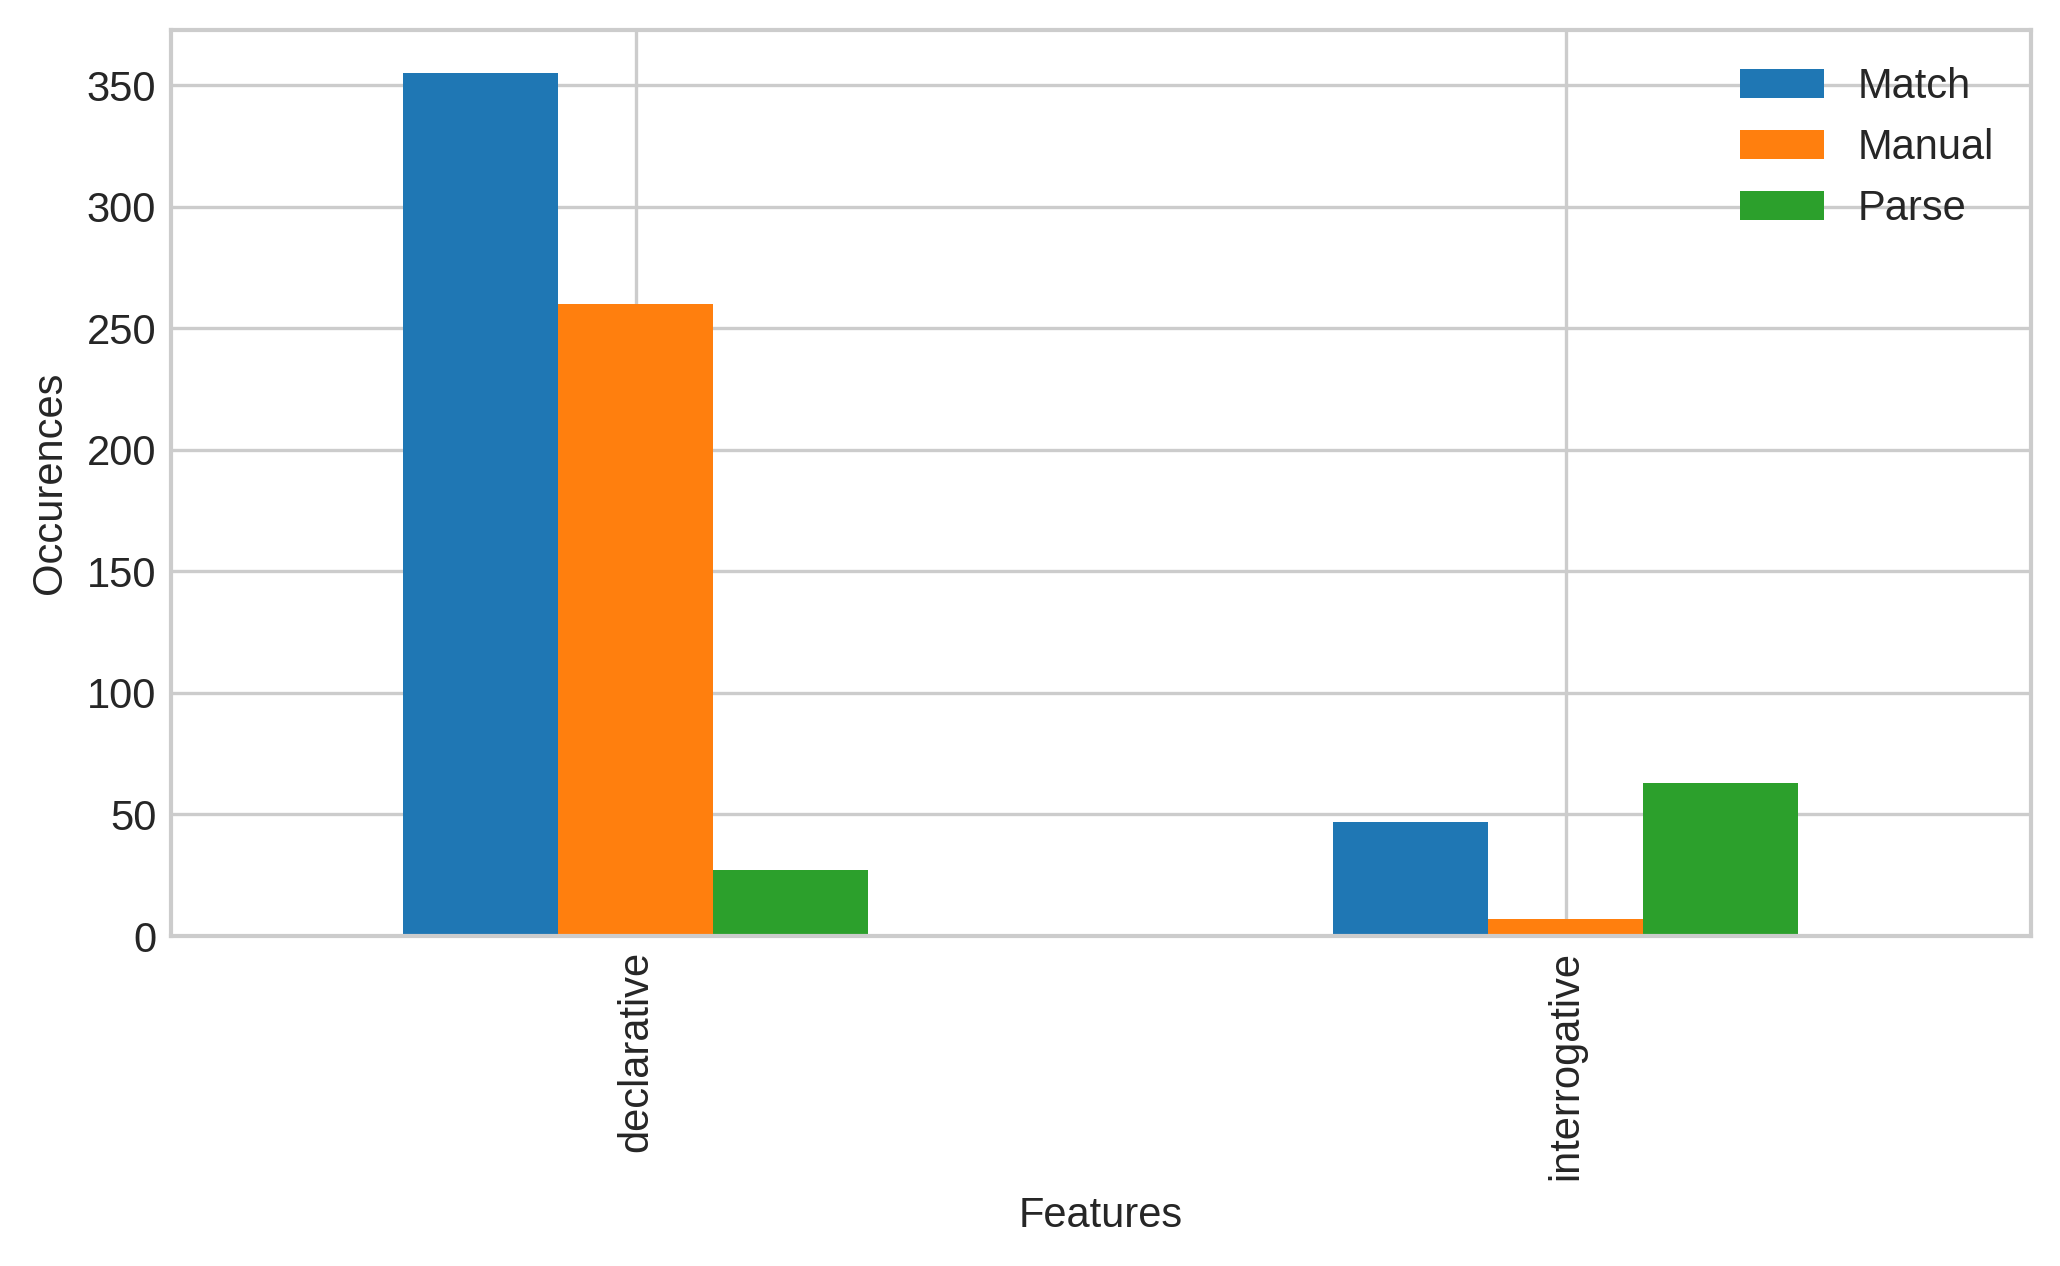

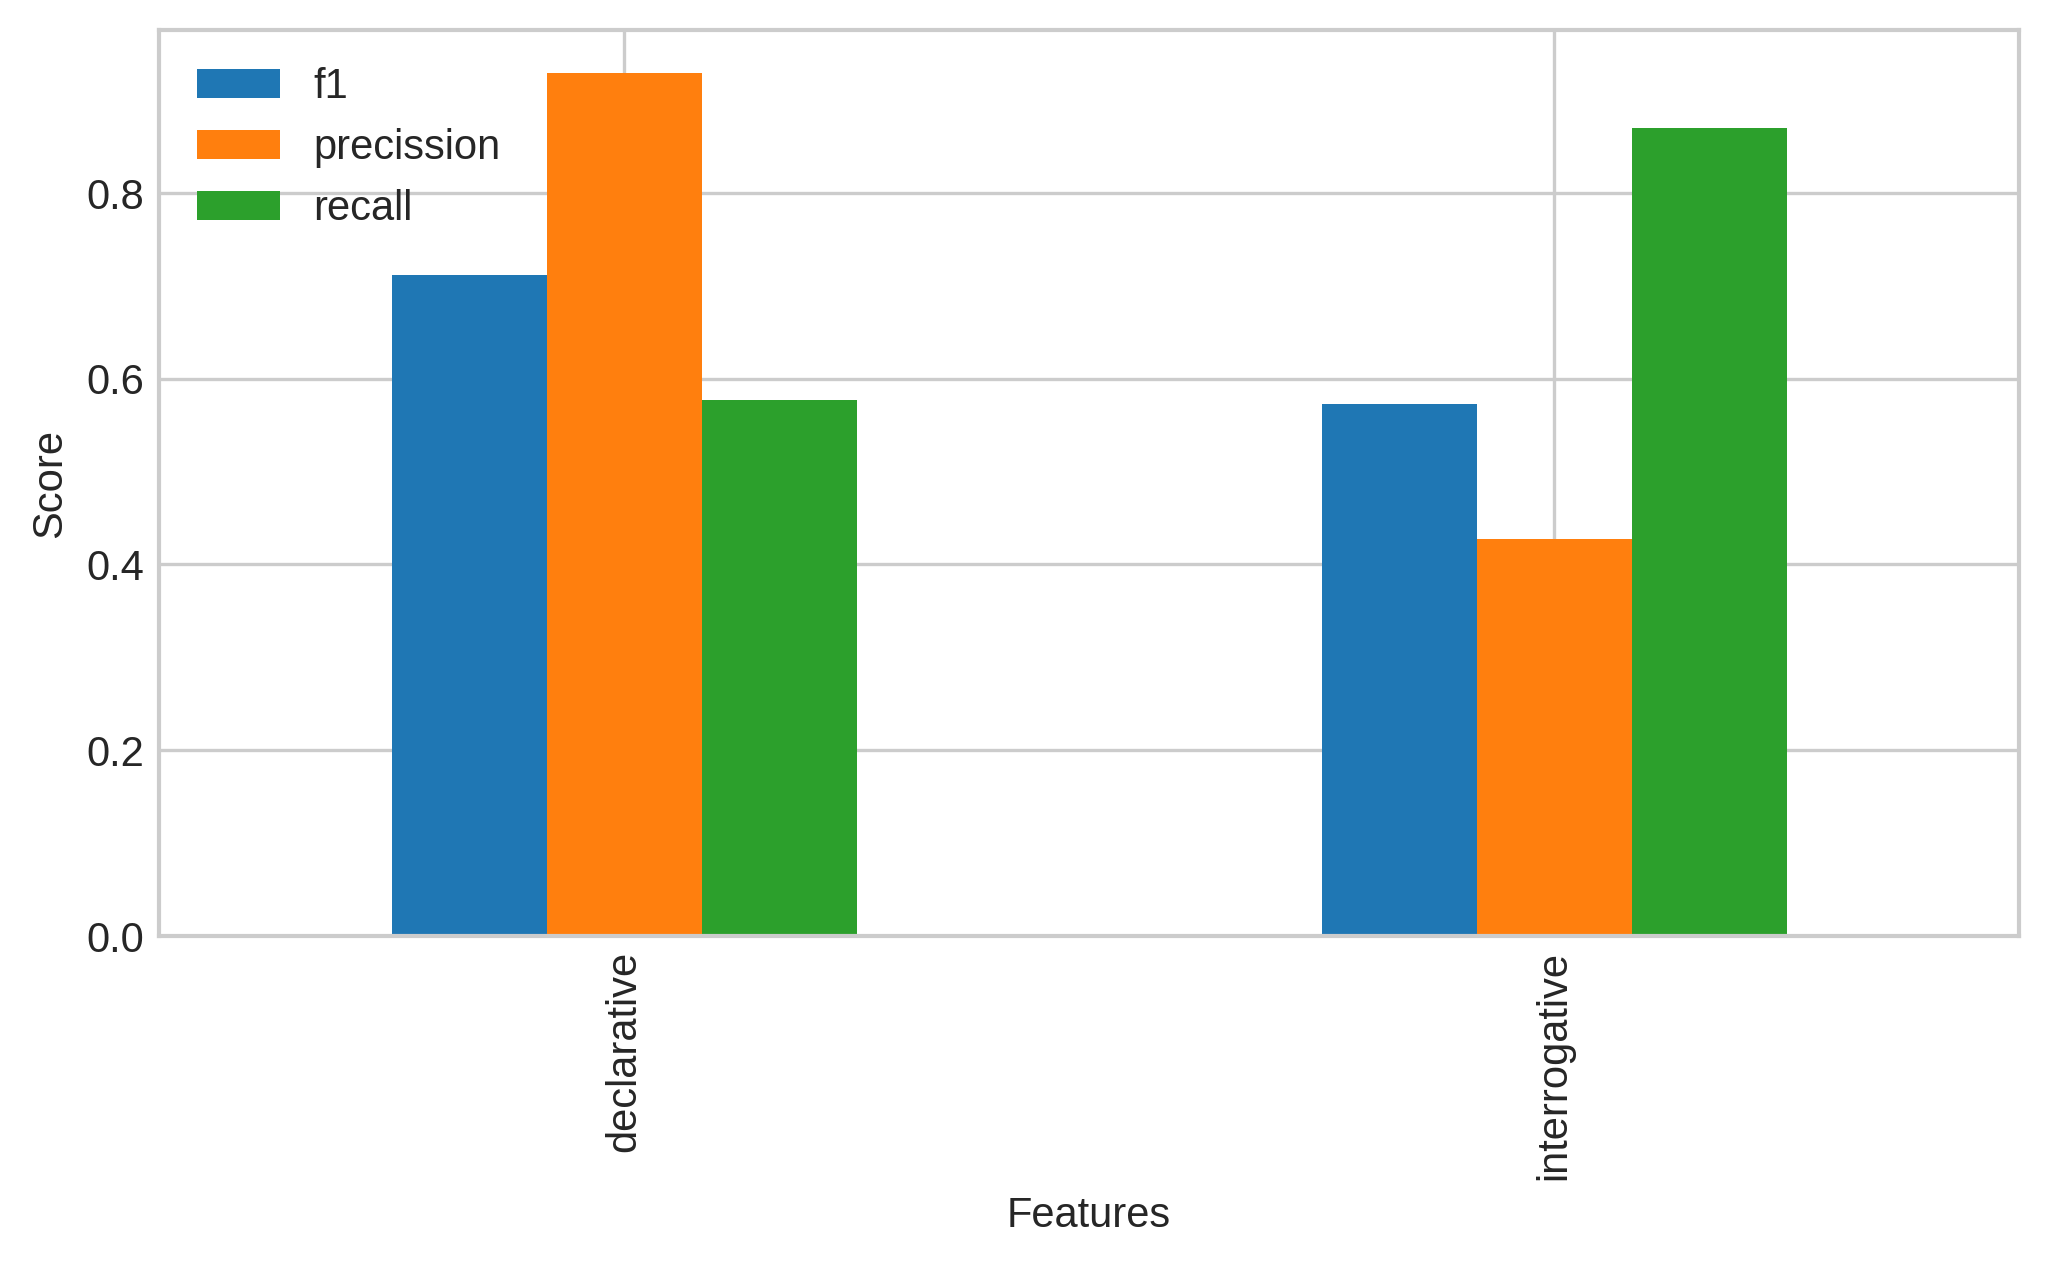

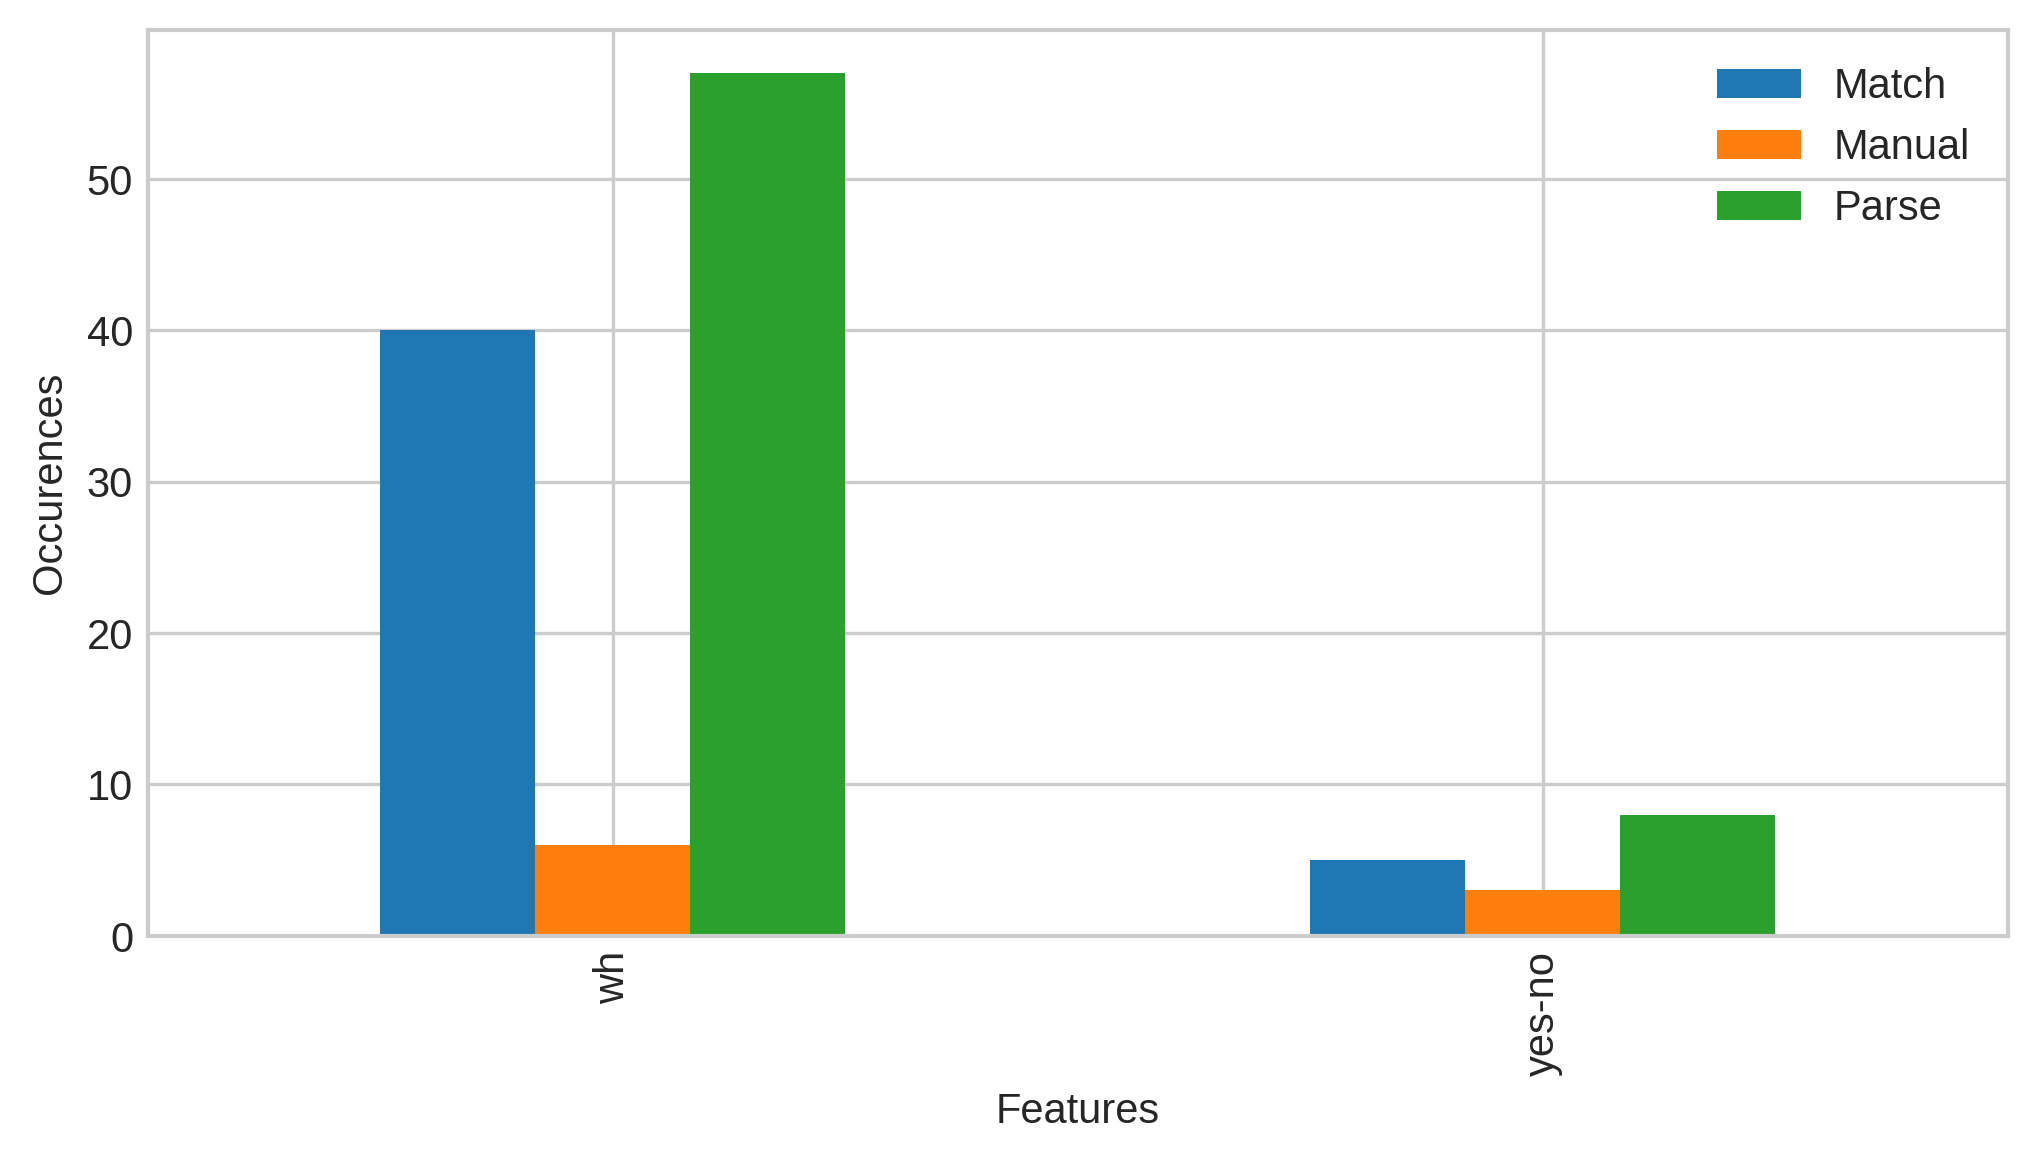

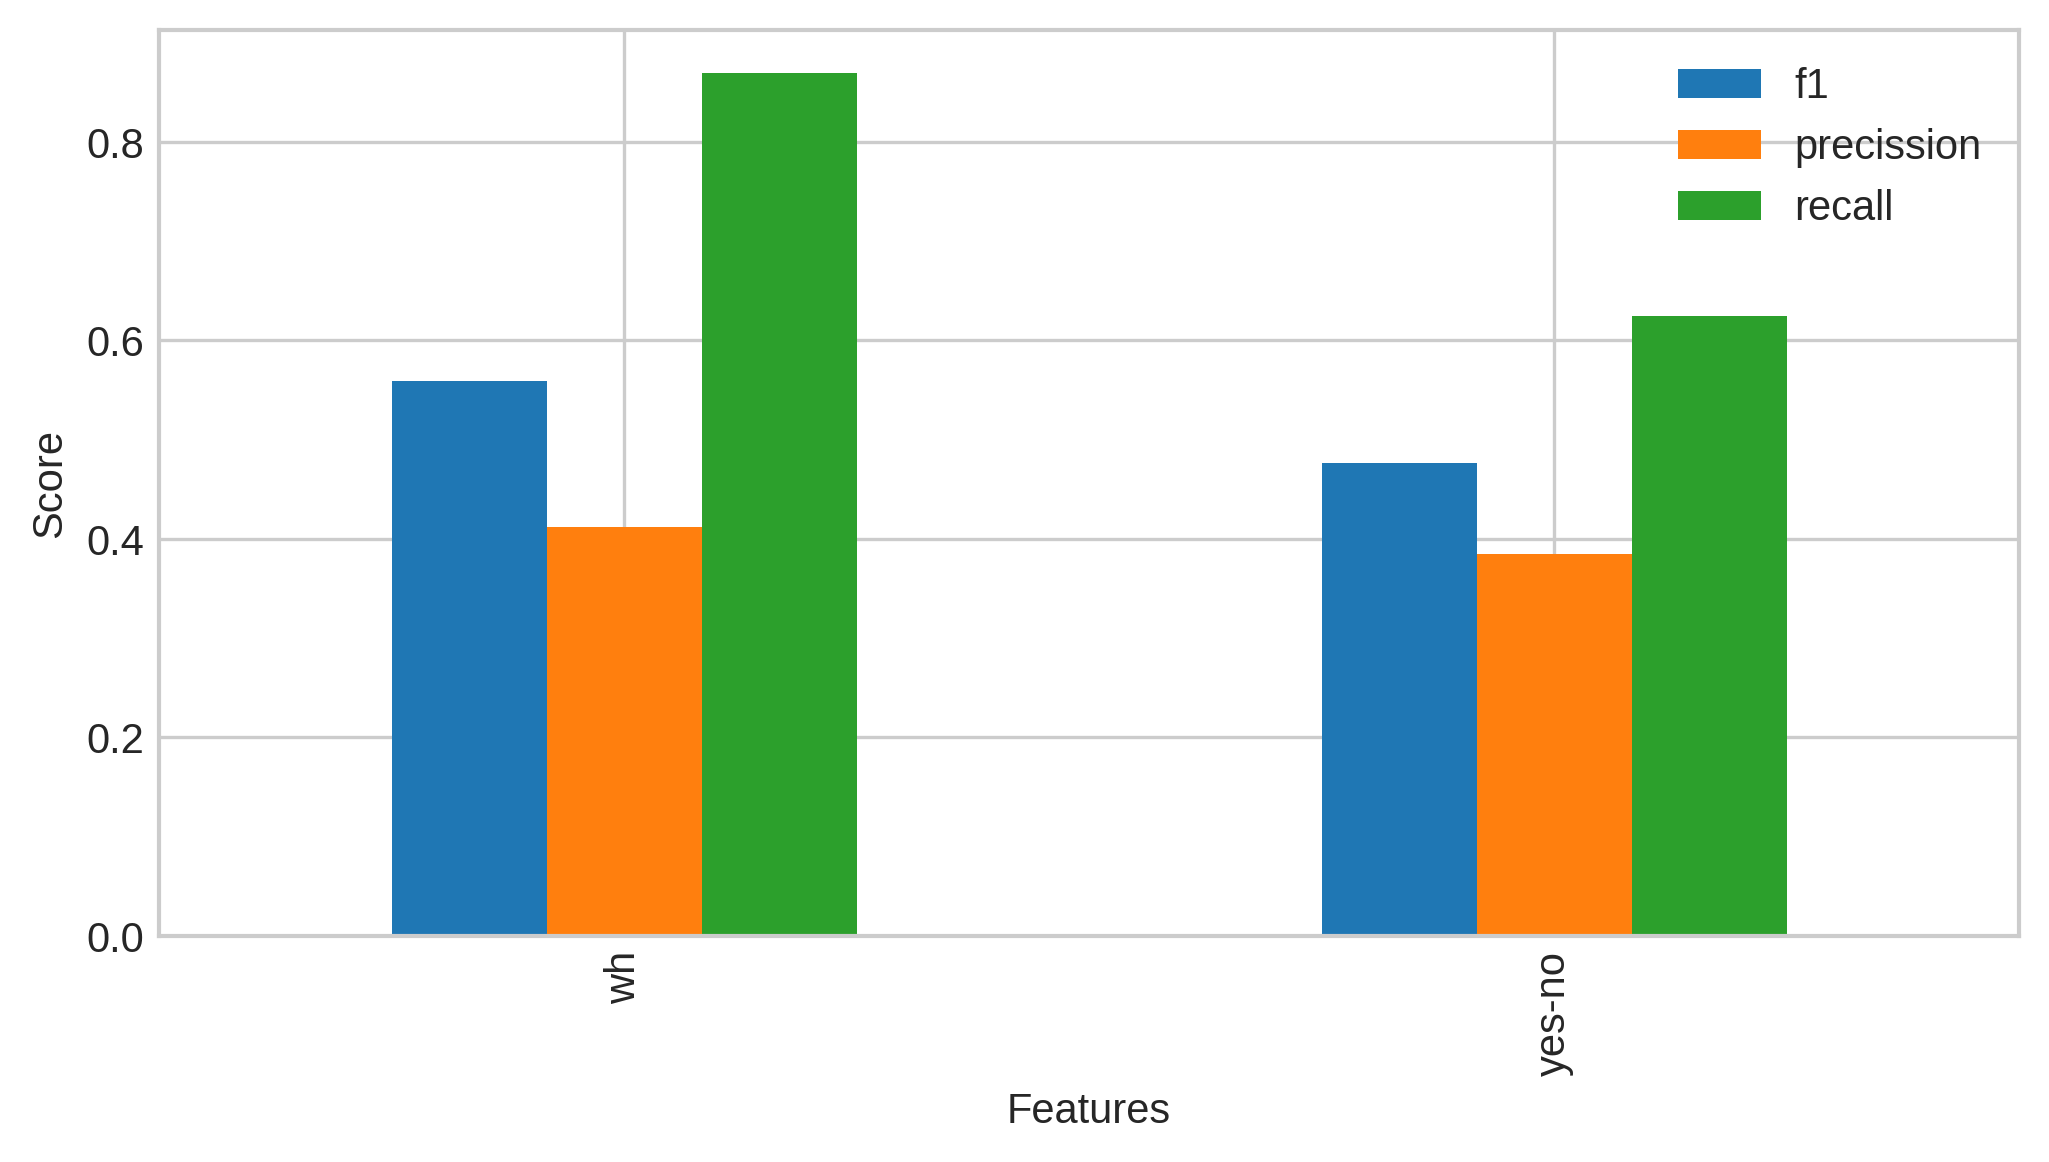

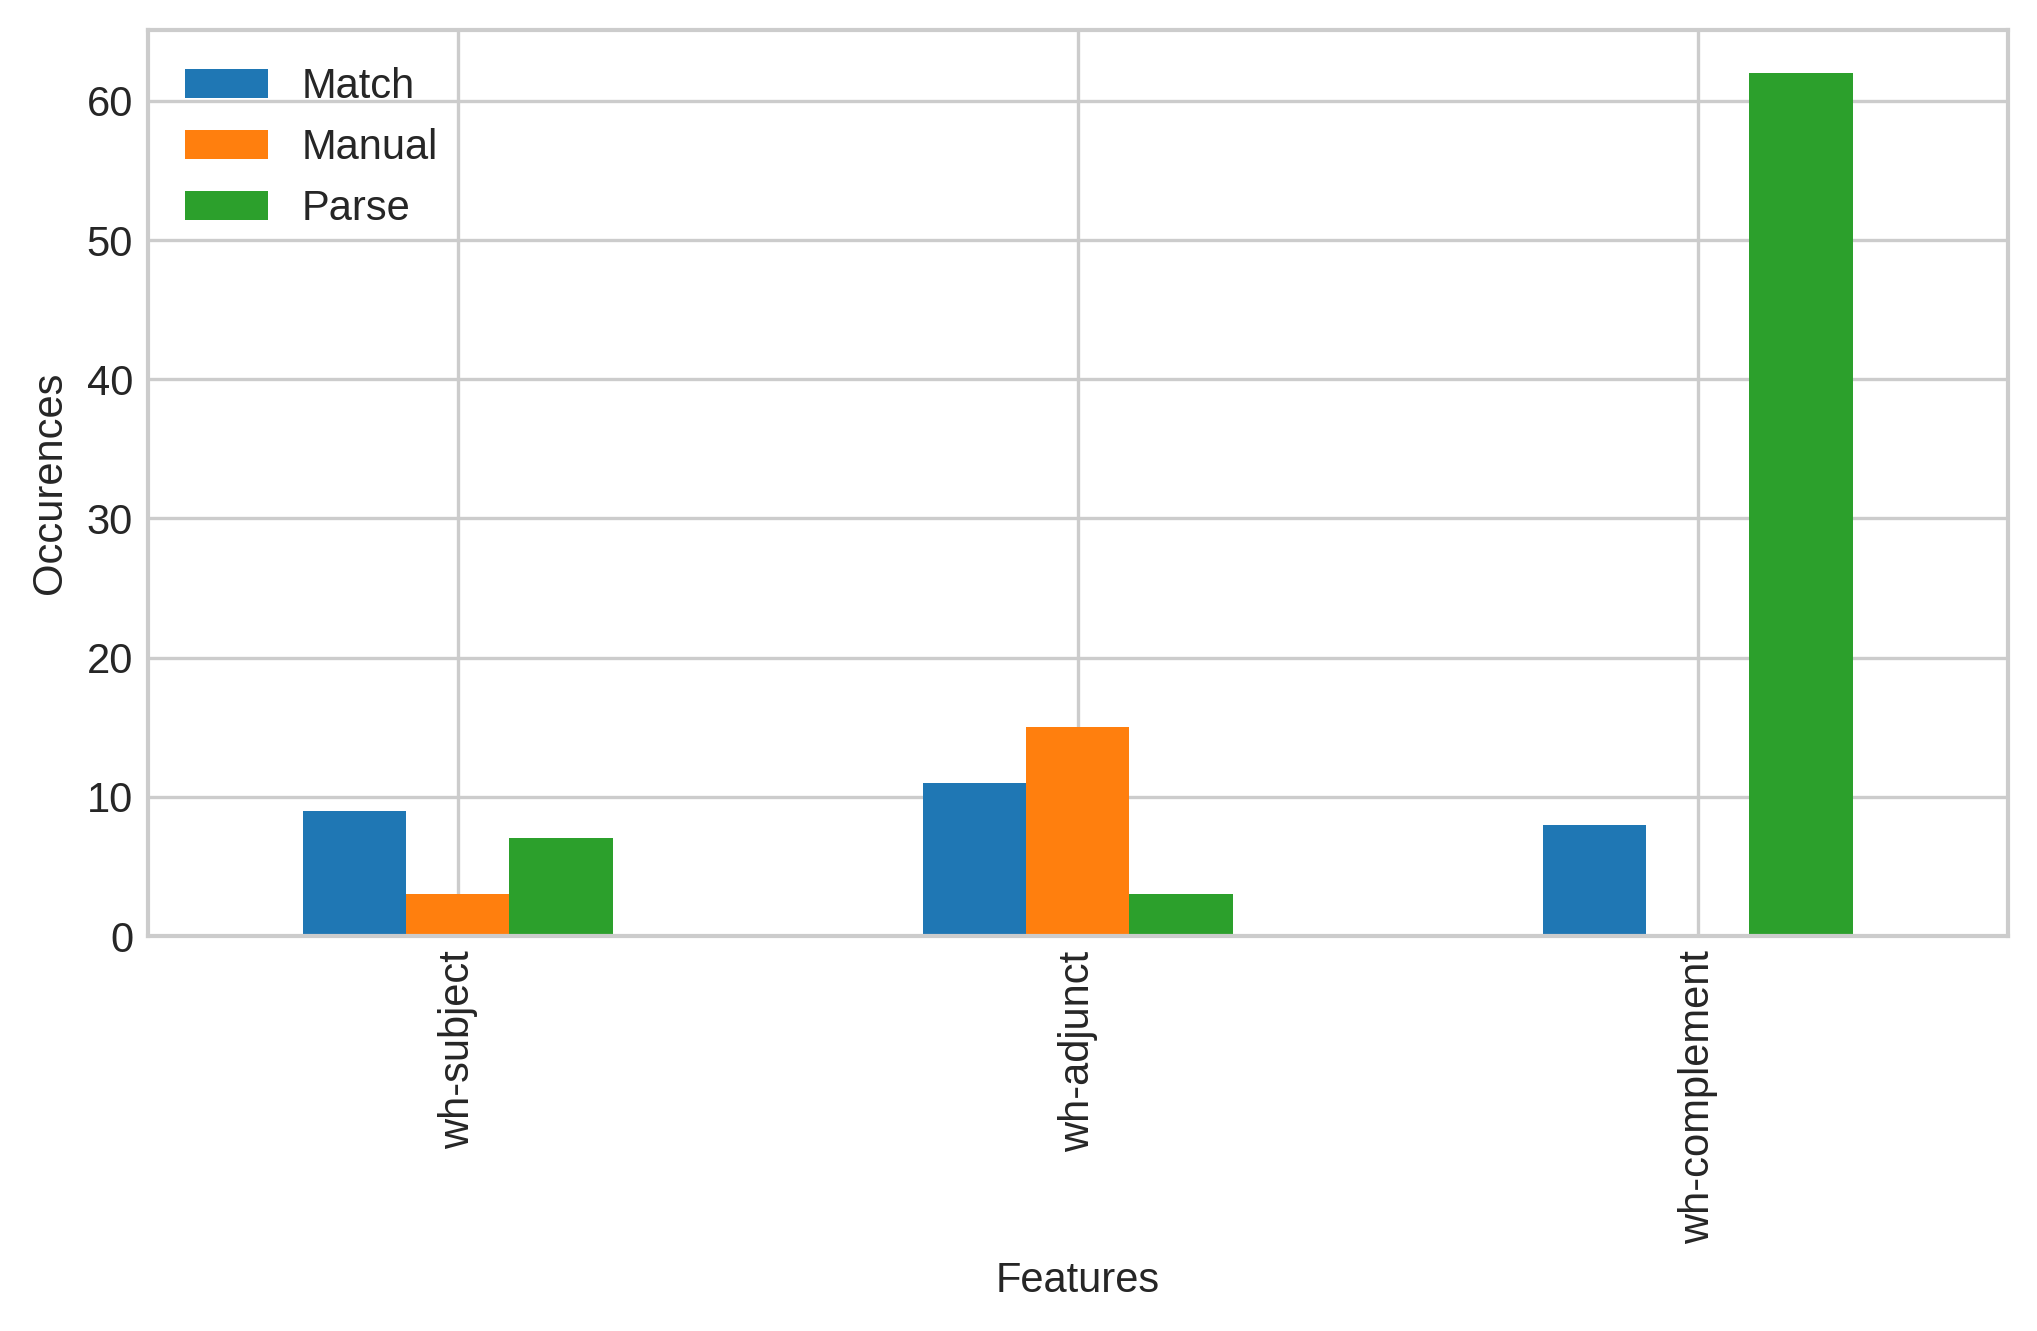

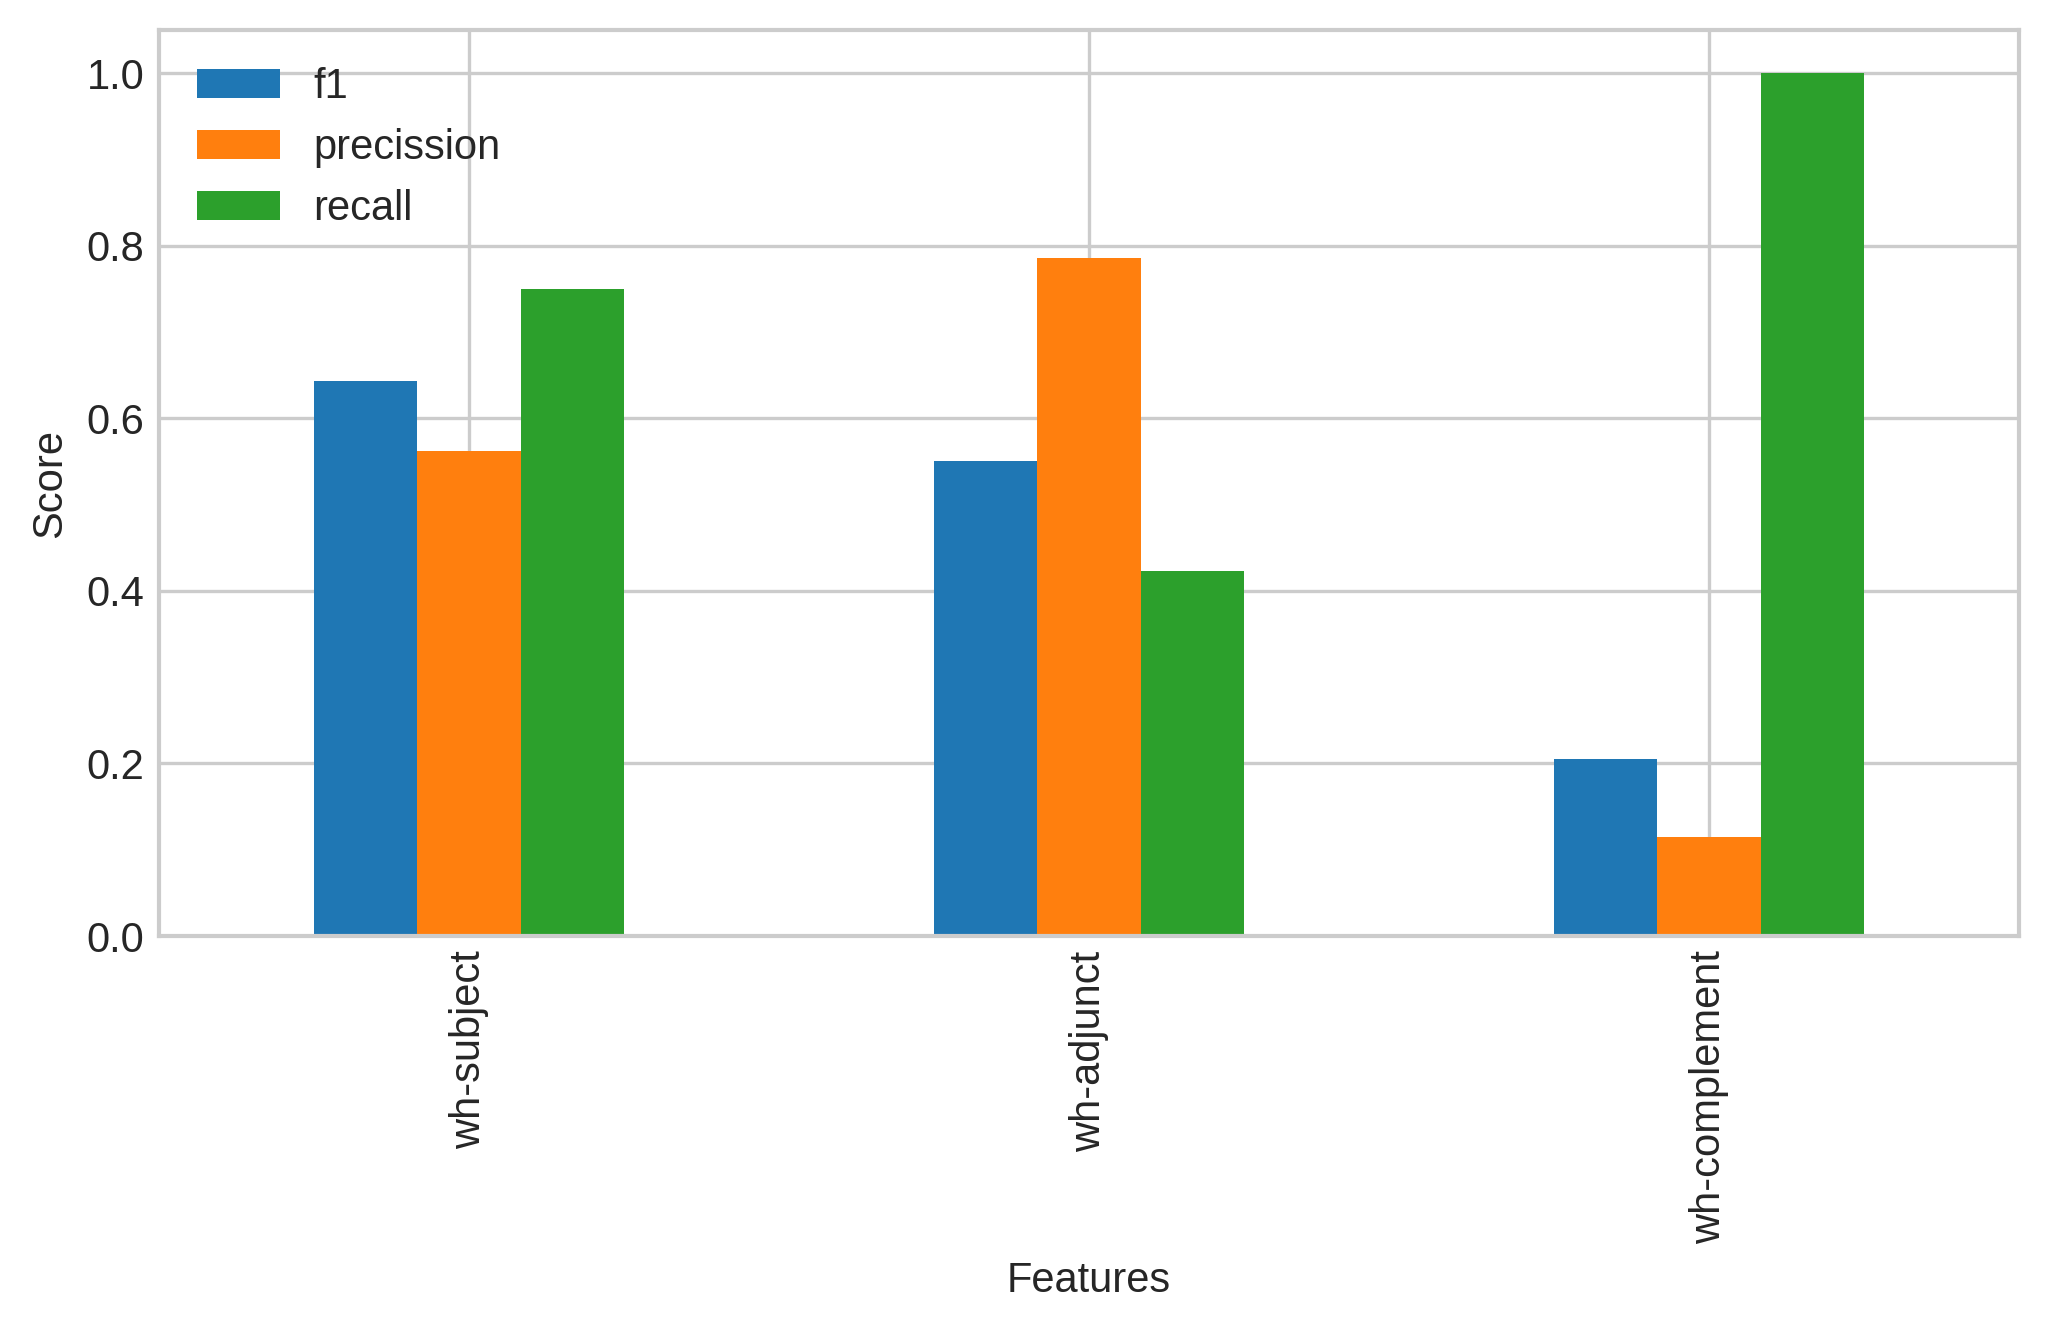

In [33]:
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["imperative","indicative"]) 
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["declarative","interrogative"])
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["wh","yes-no"])
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["wh-subject","wh-complement","wh-adjunct"])

### Deicticity

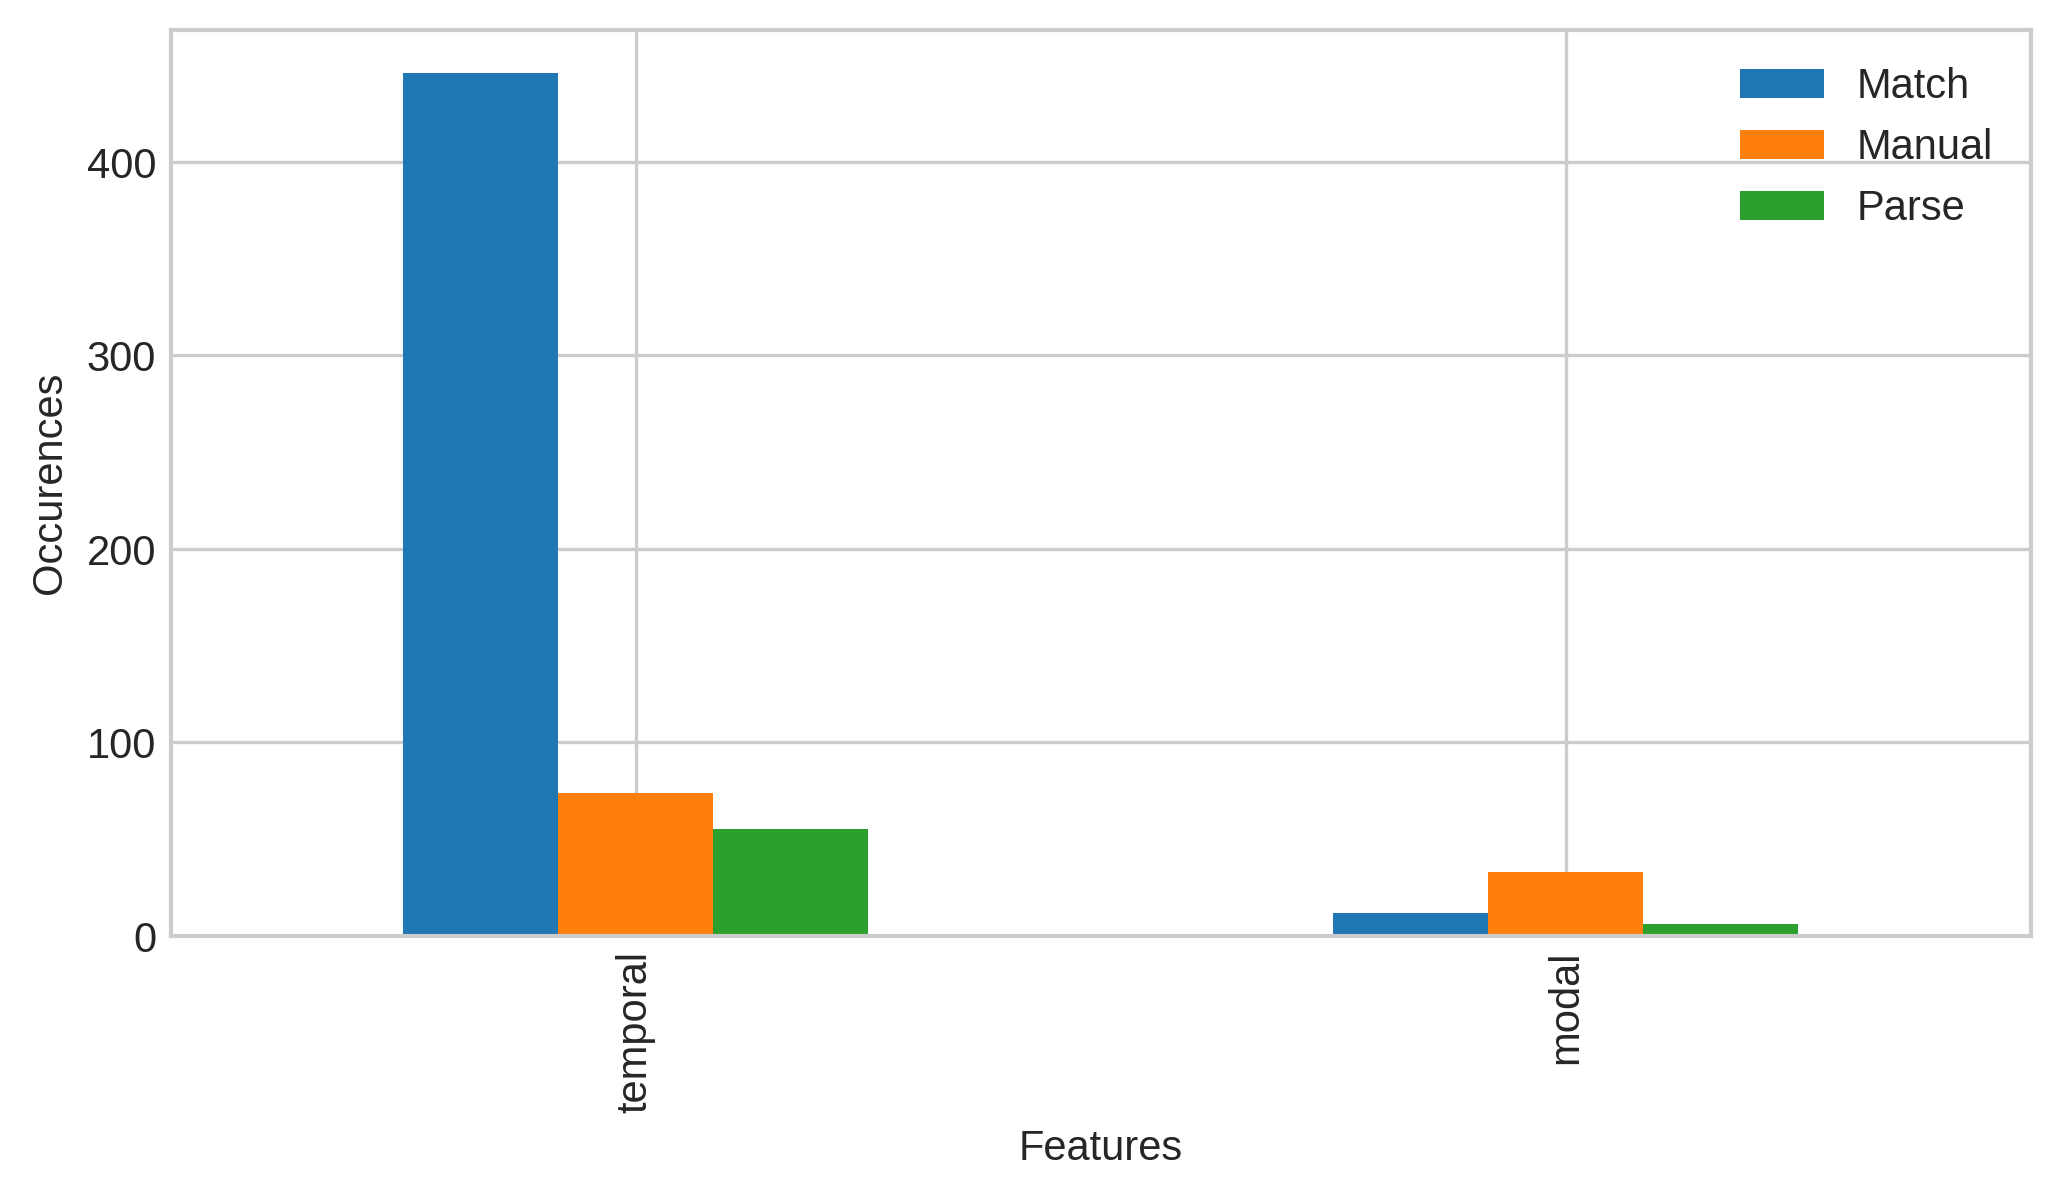

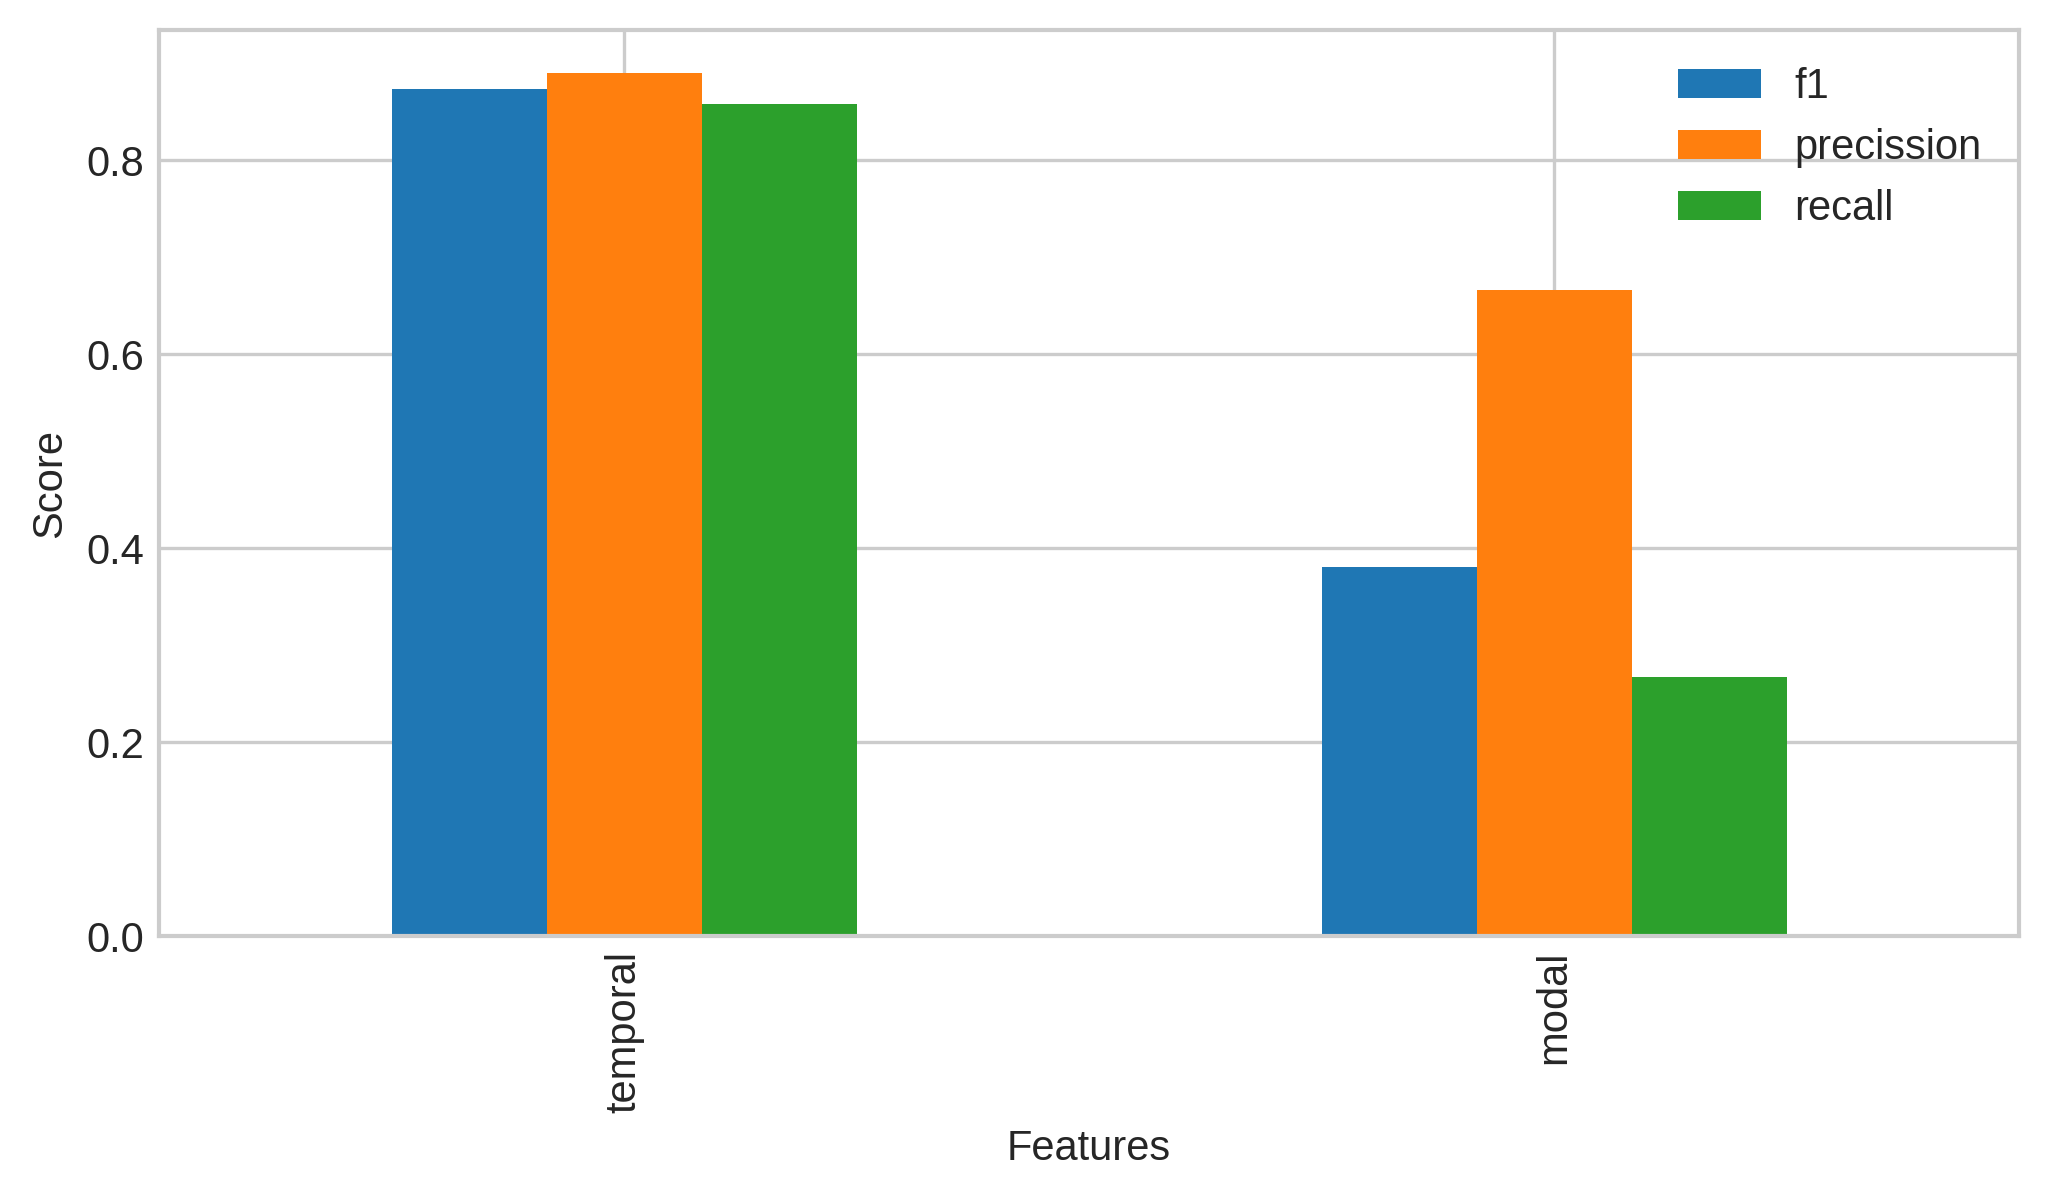

In [34]:
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["temporal","modal"])

### Modal deicticity

notebook_functions.py:237: RuntimeWarning: invalid value encountered in double_scalars
  df["Parse%"] = df.apply(lambda x: (x["Parse"] ) / (x["Match"] + x["Parse"])* 100 ,axis=1)


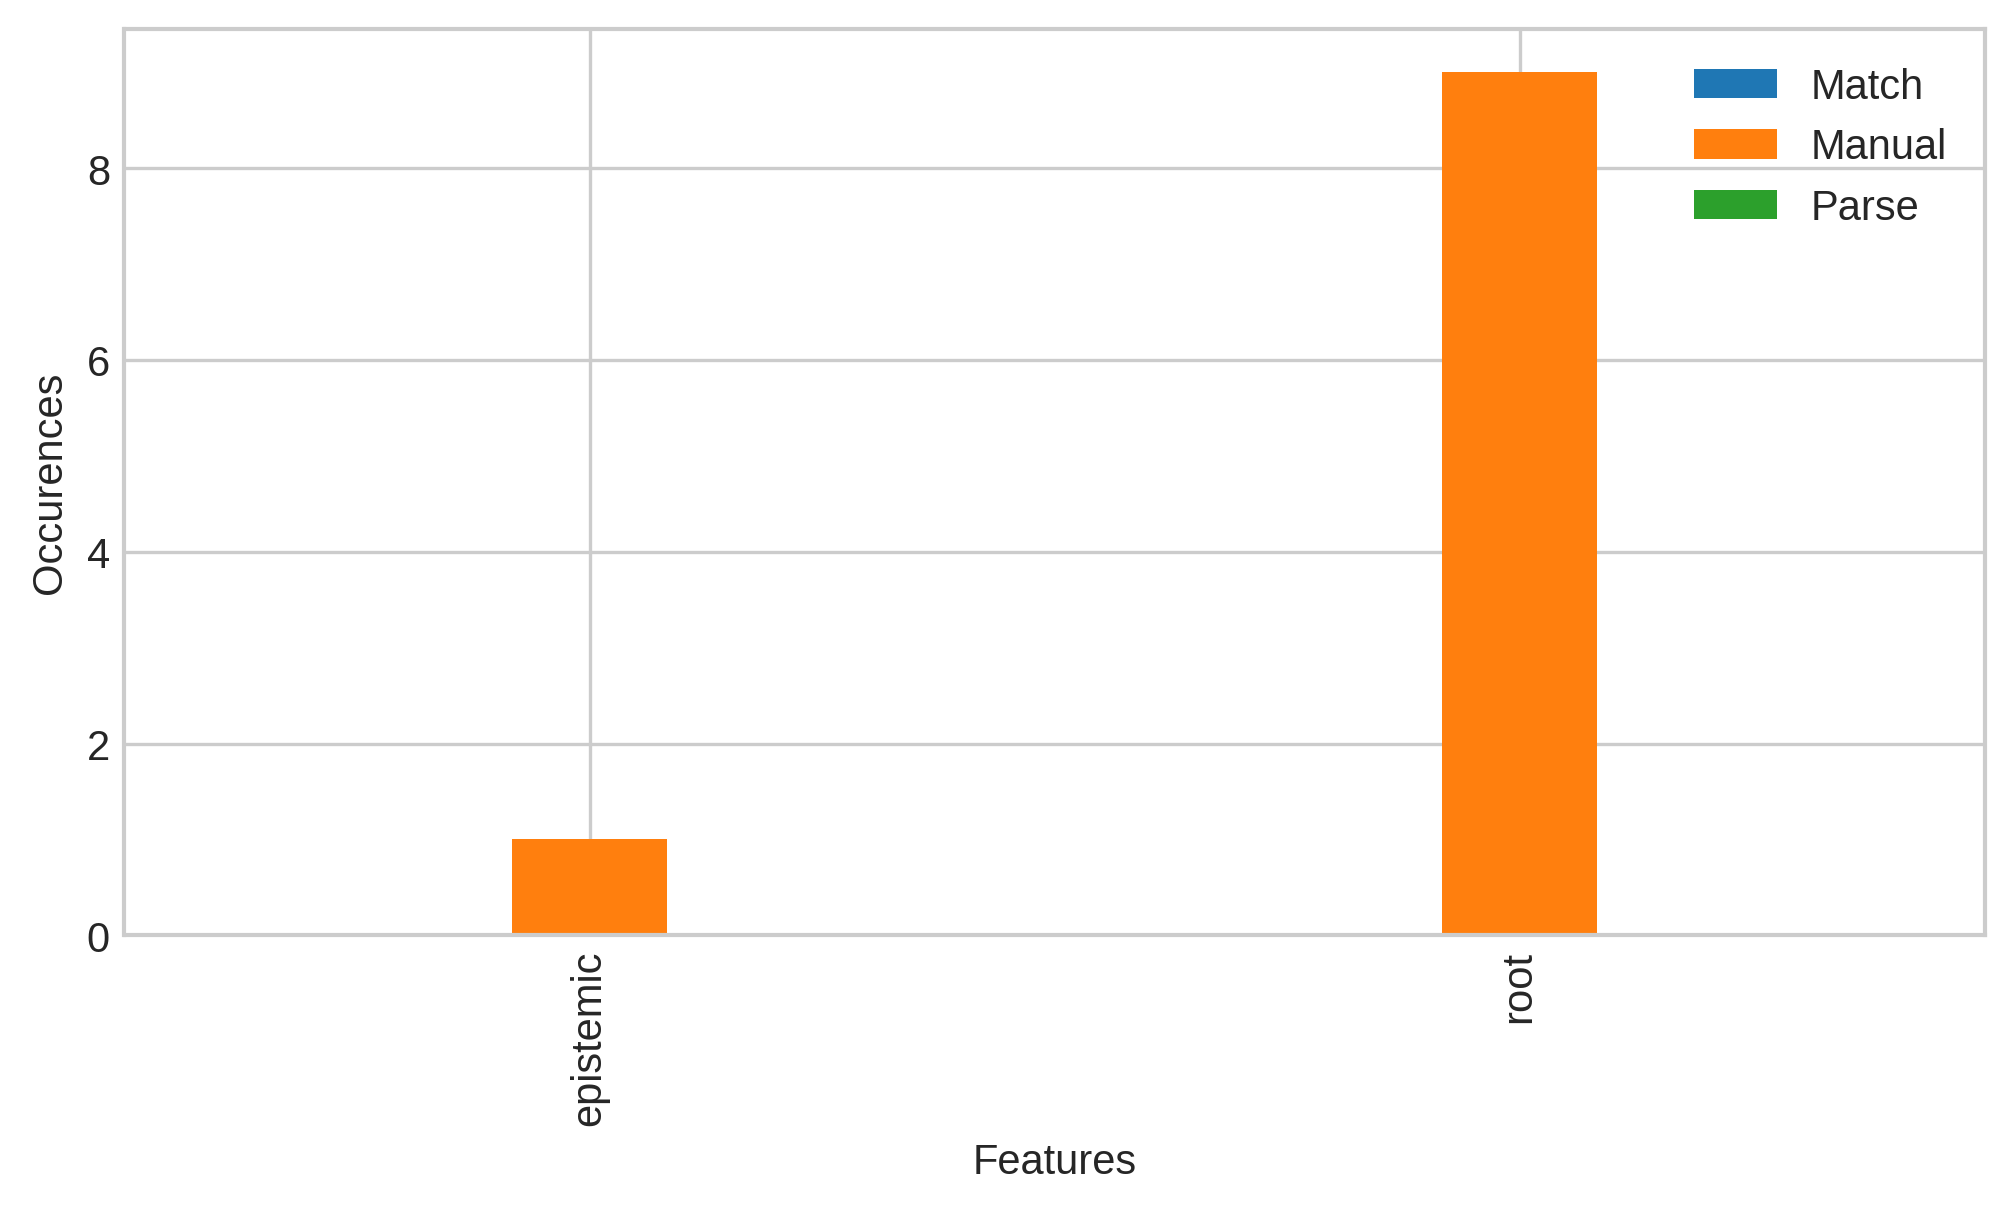

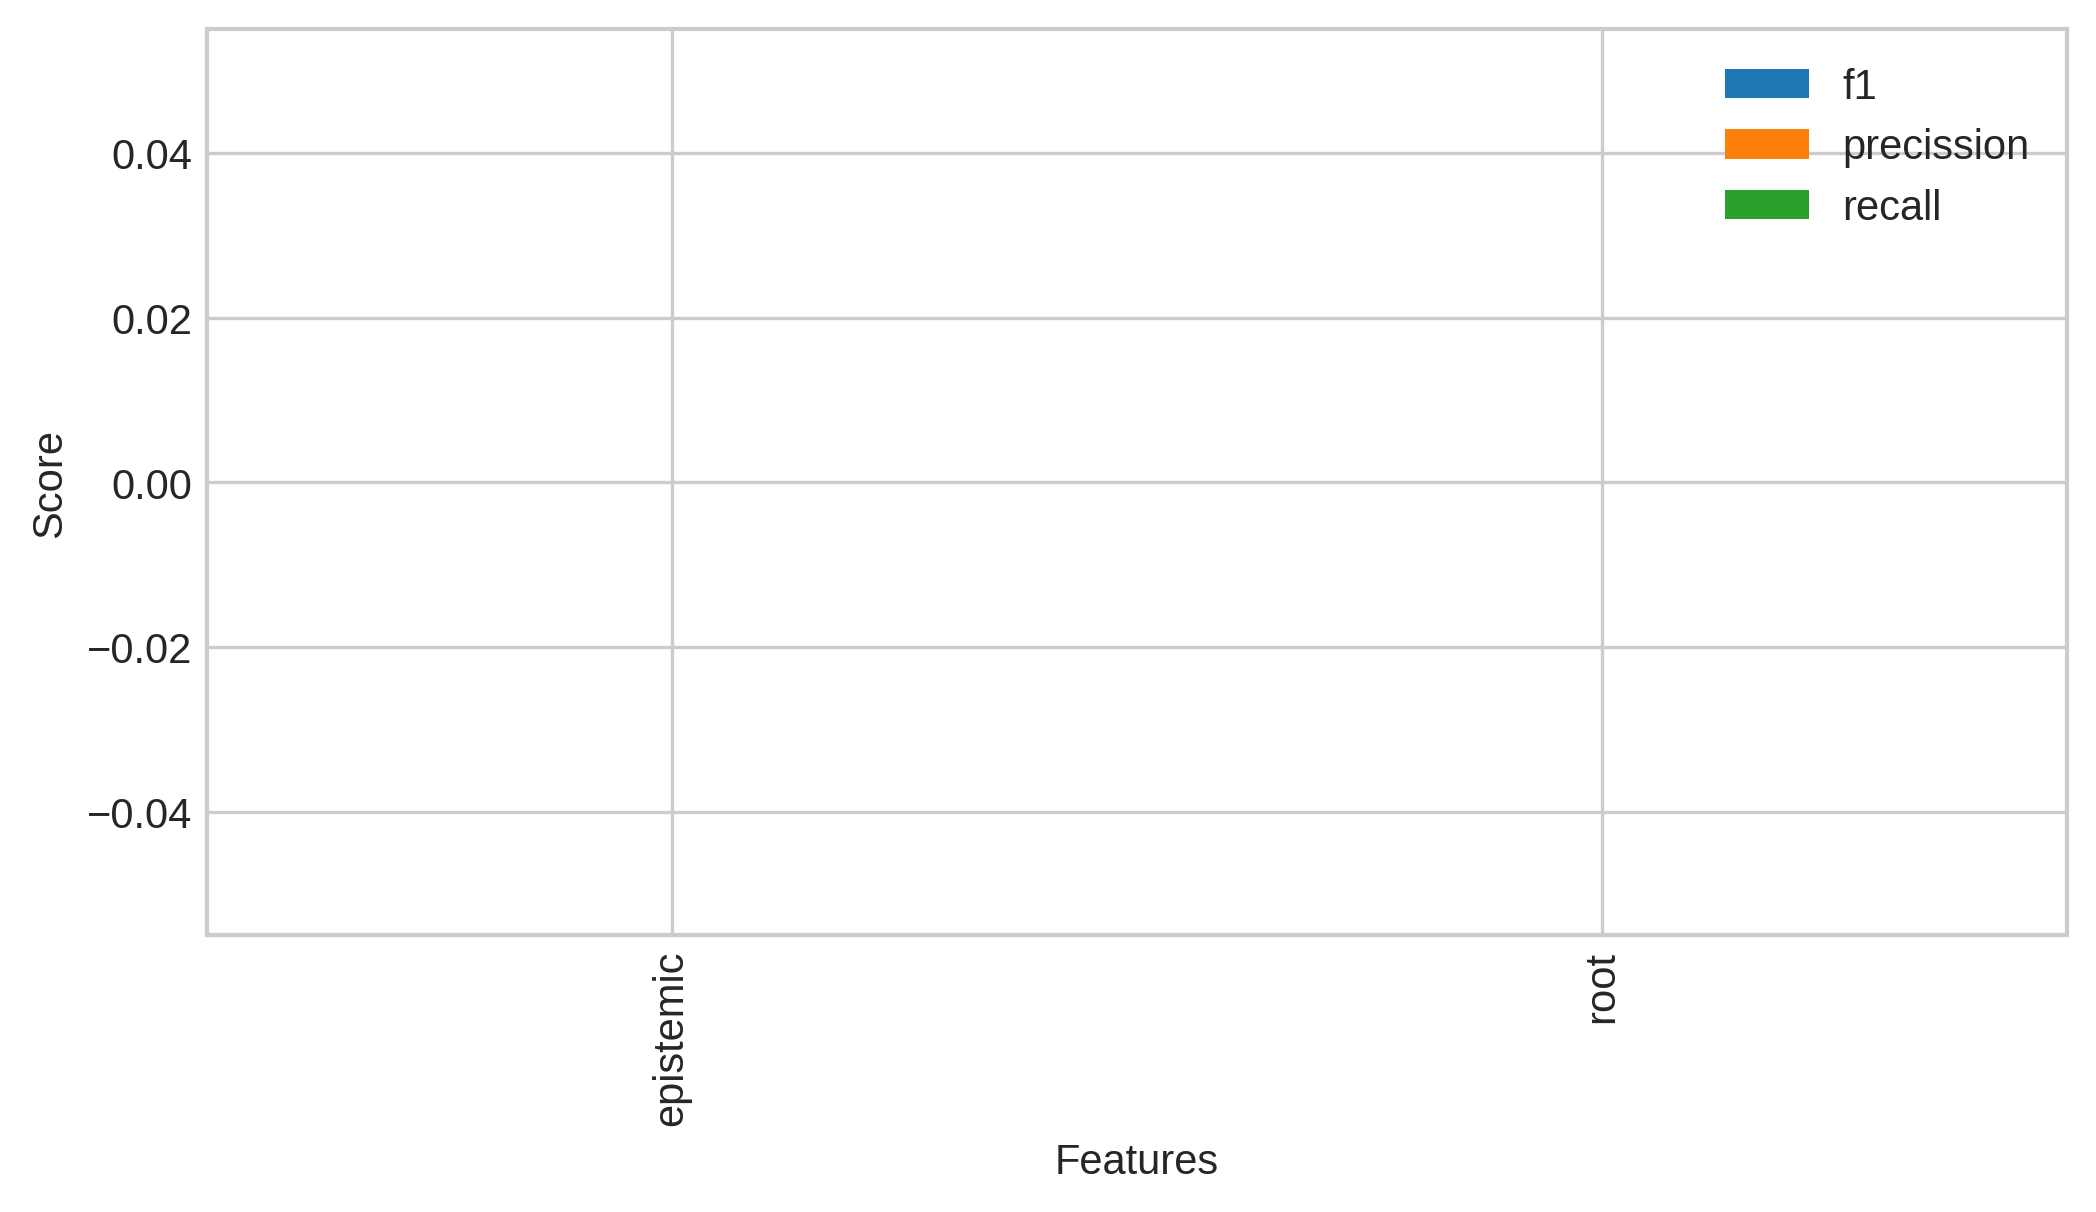

In [35]:
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["root","epistemic"])
# stats = make_stats(matches, manual_nm, parse_nm, 
#                    filters=["inclination-volition","obligation-permission","ability"])
# stats = make_stats(matches, manual_nm, parse_nm, 
#                    filters=["probability","usuality"])

### Temporal deicticity

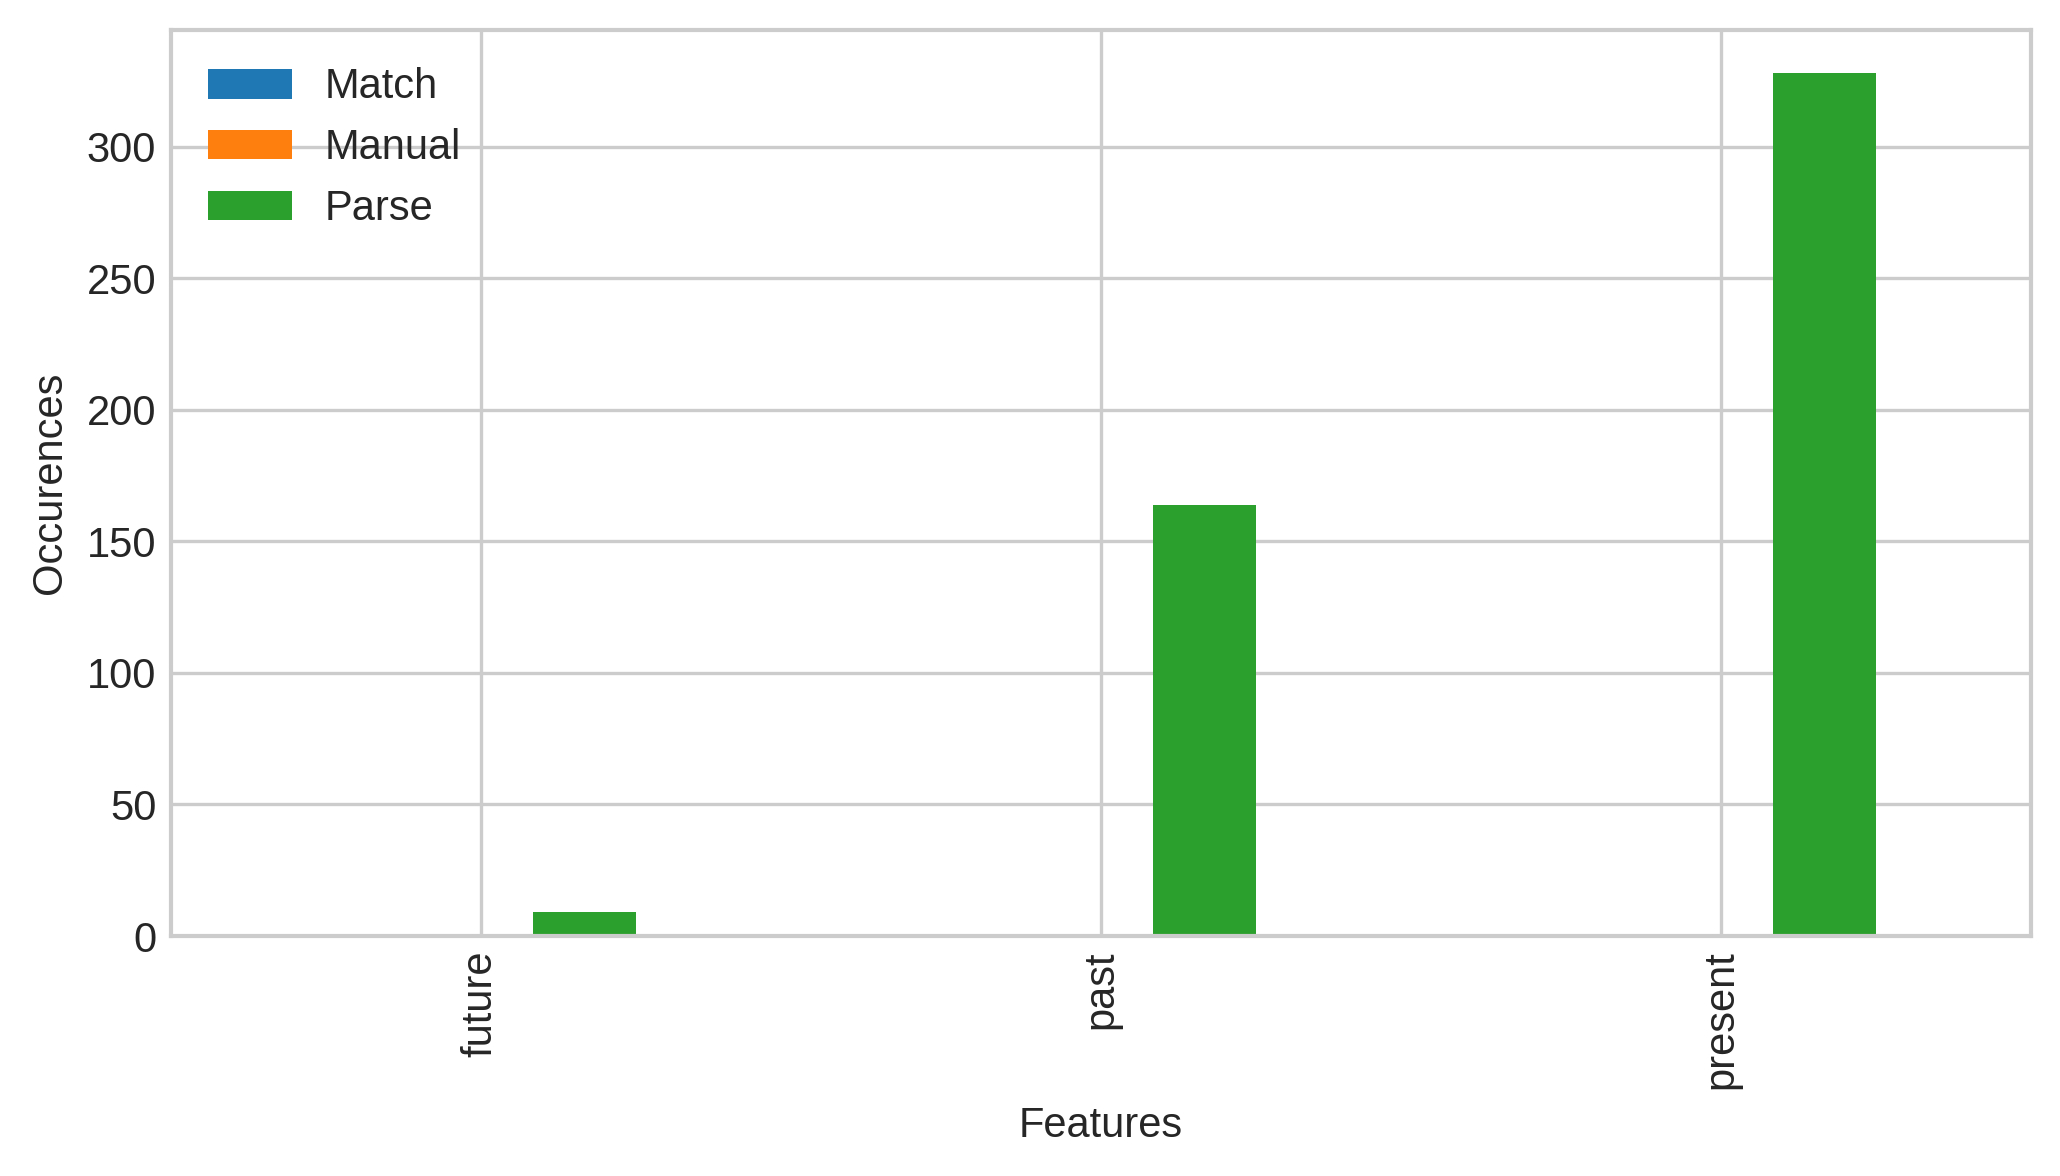

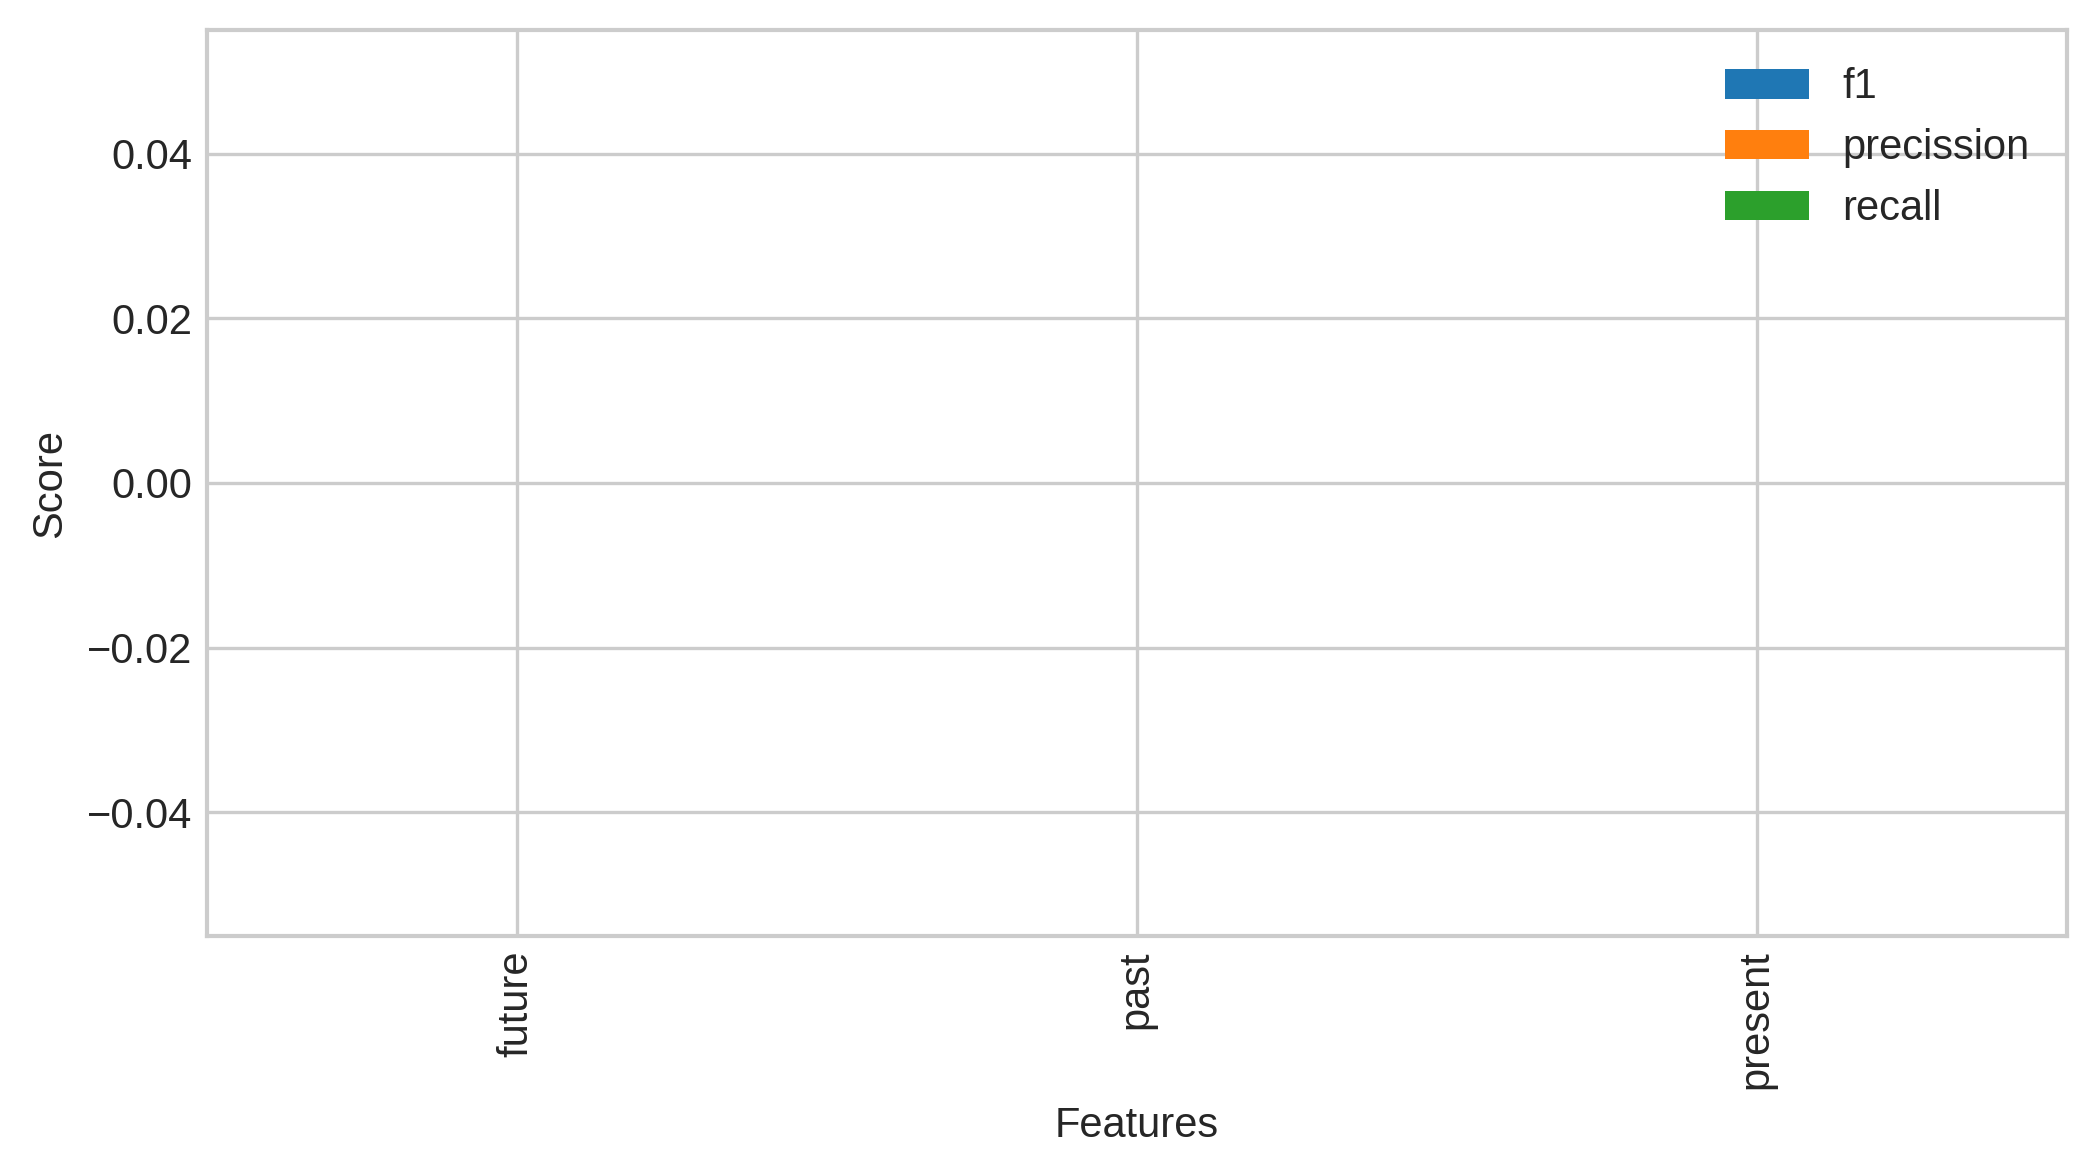

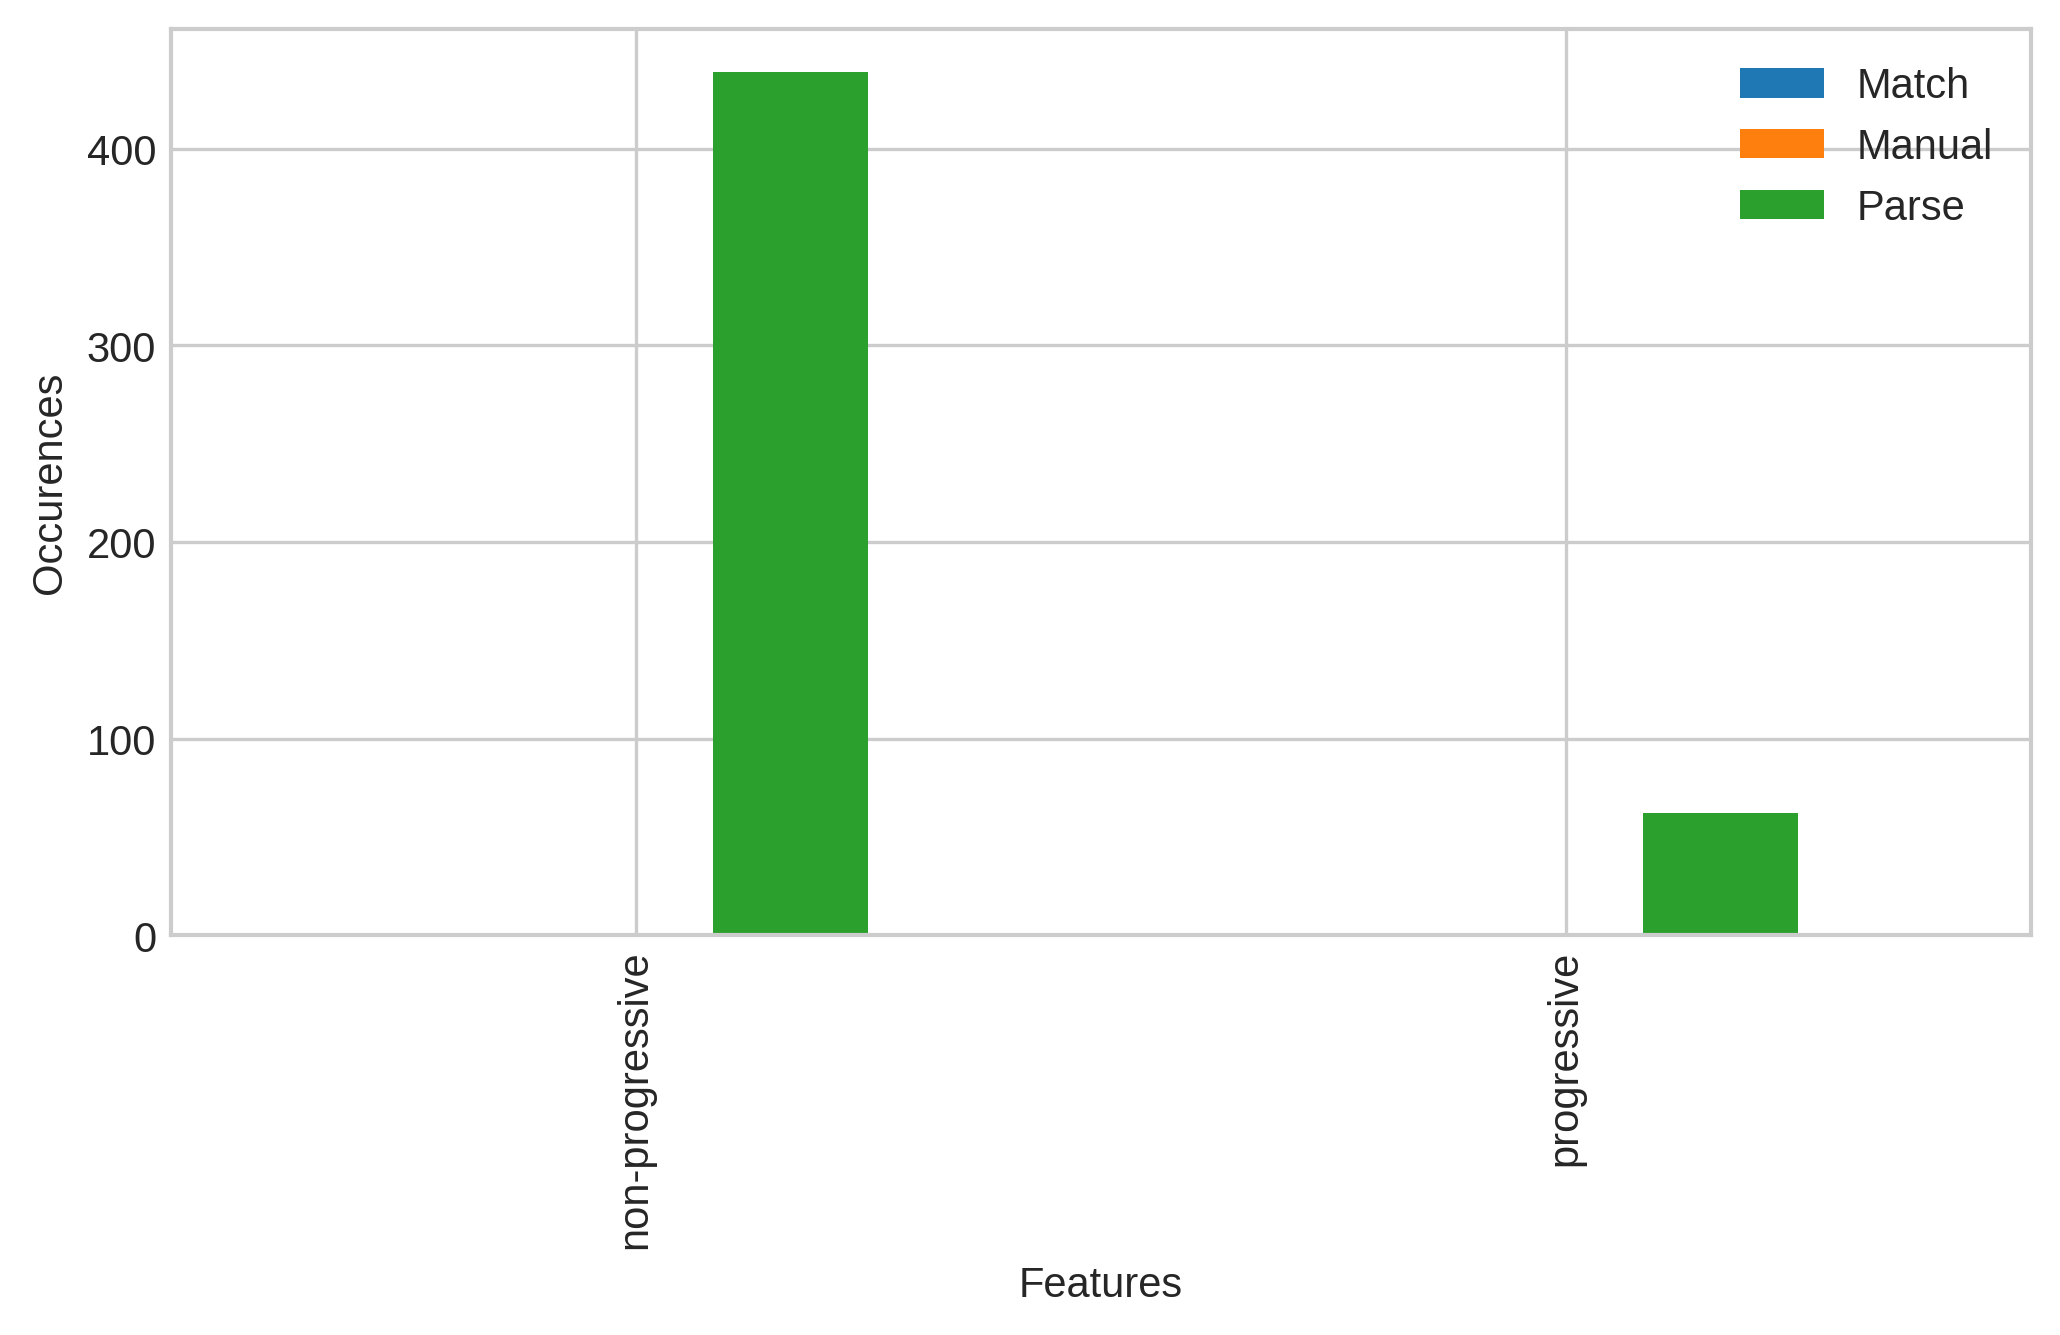

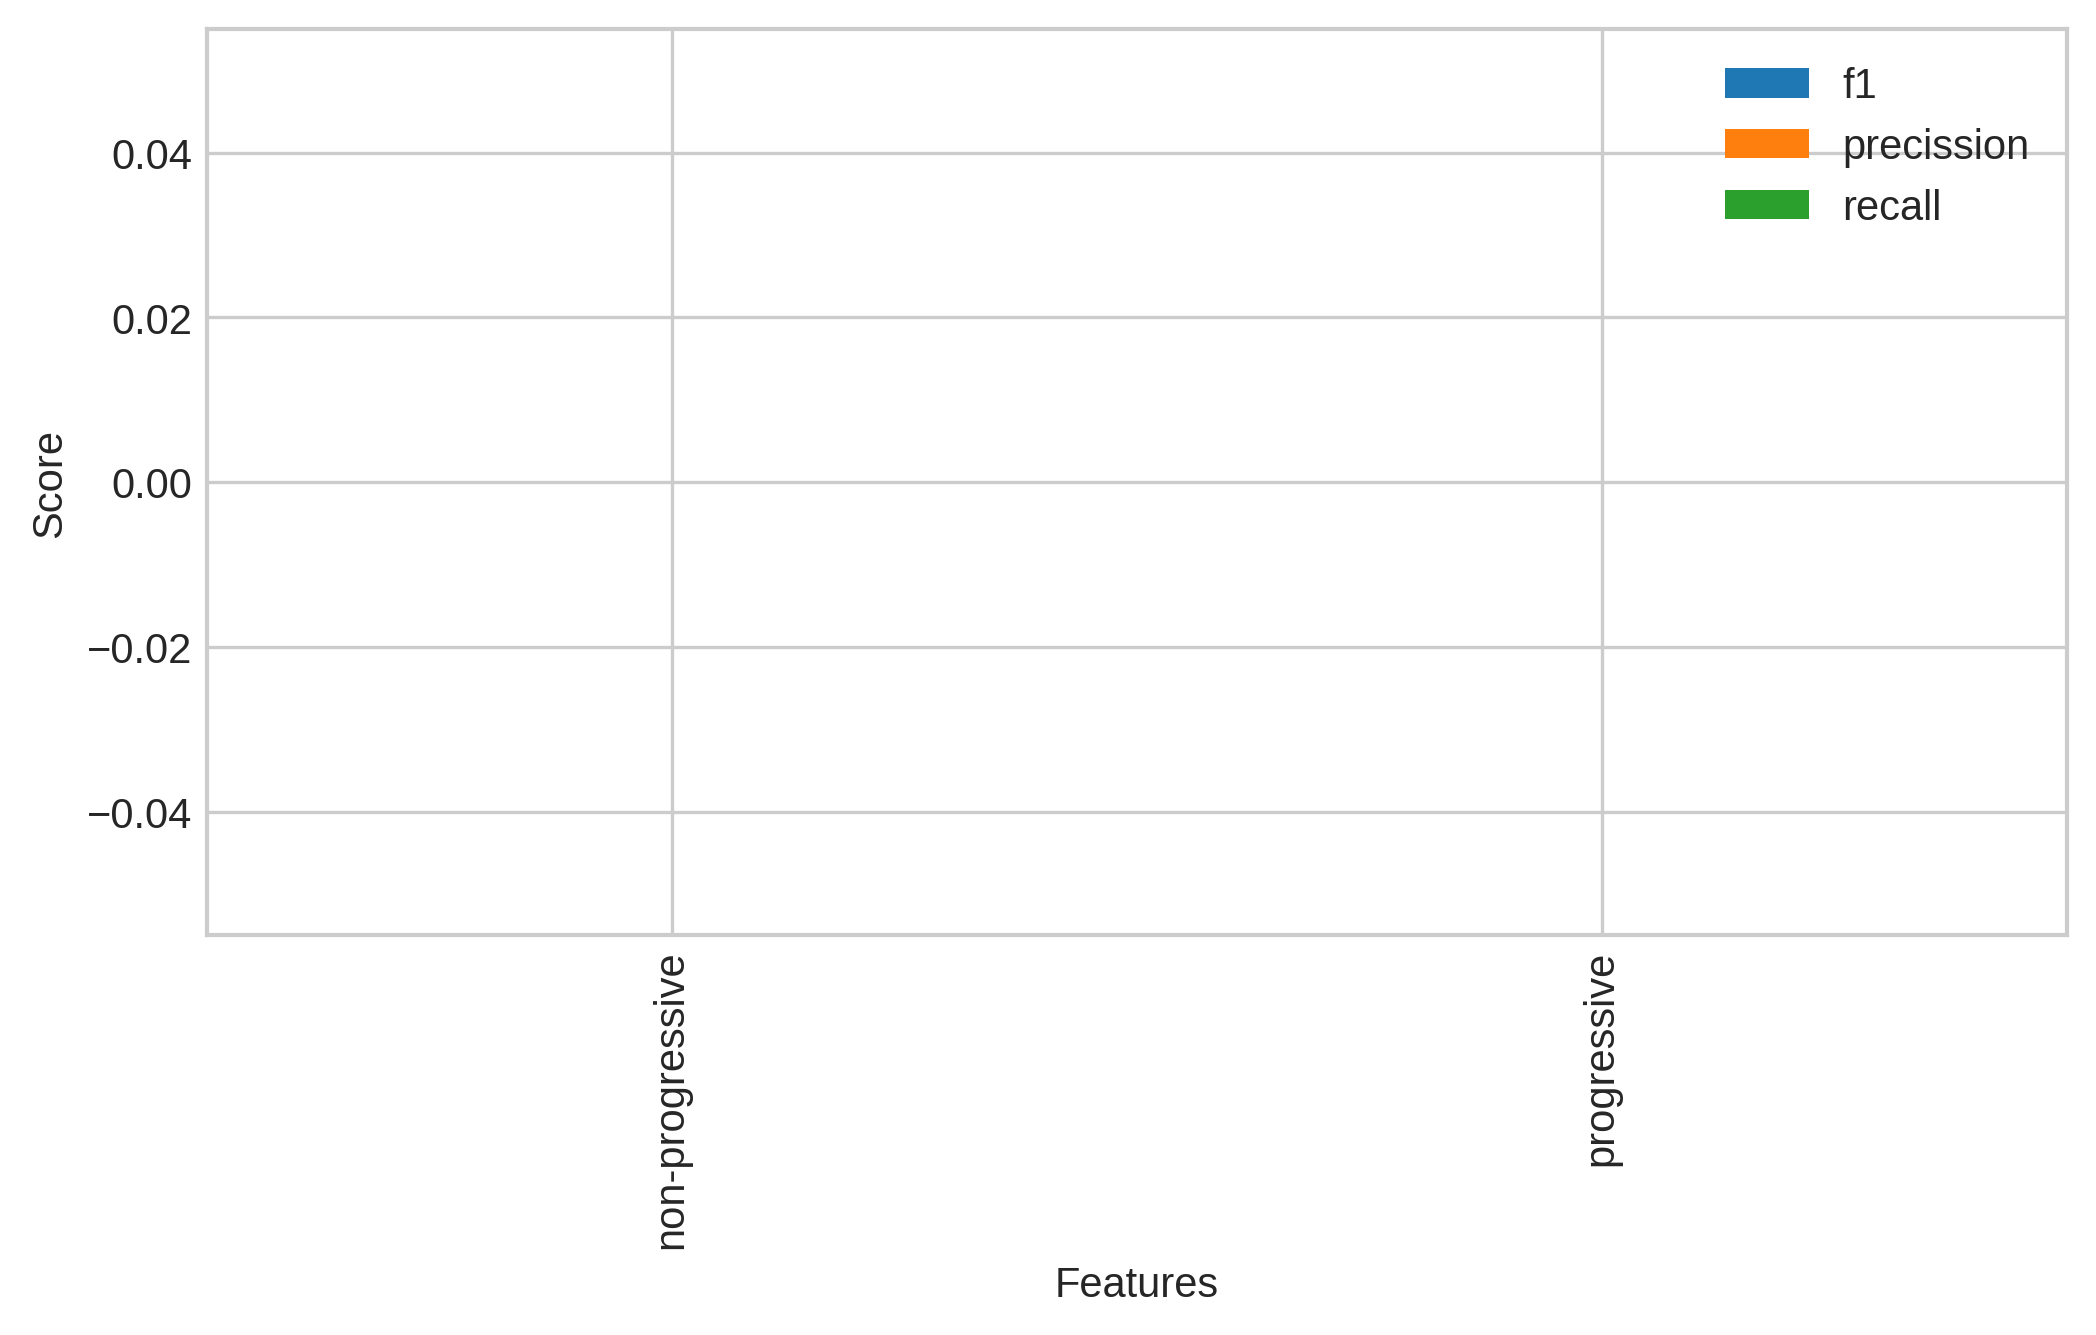

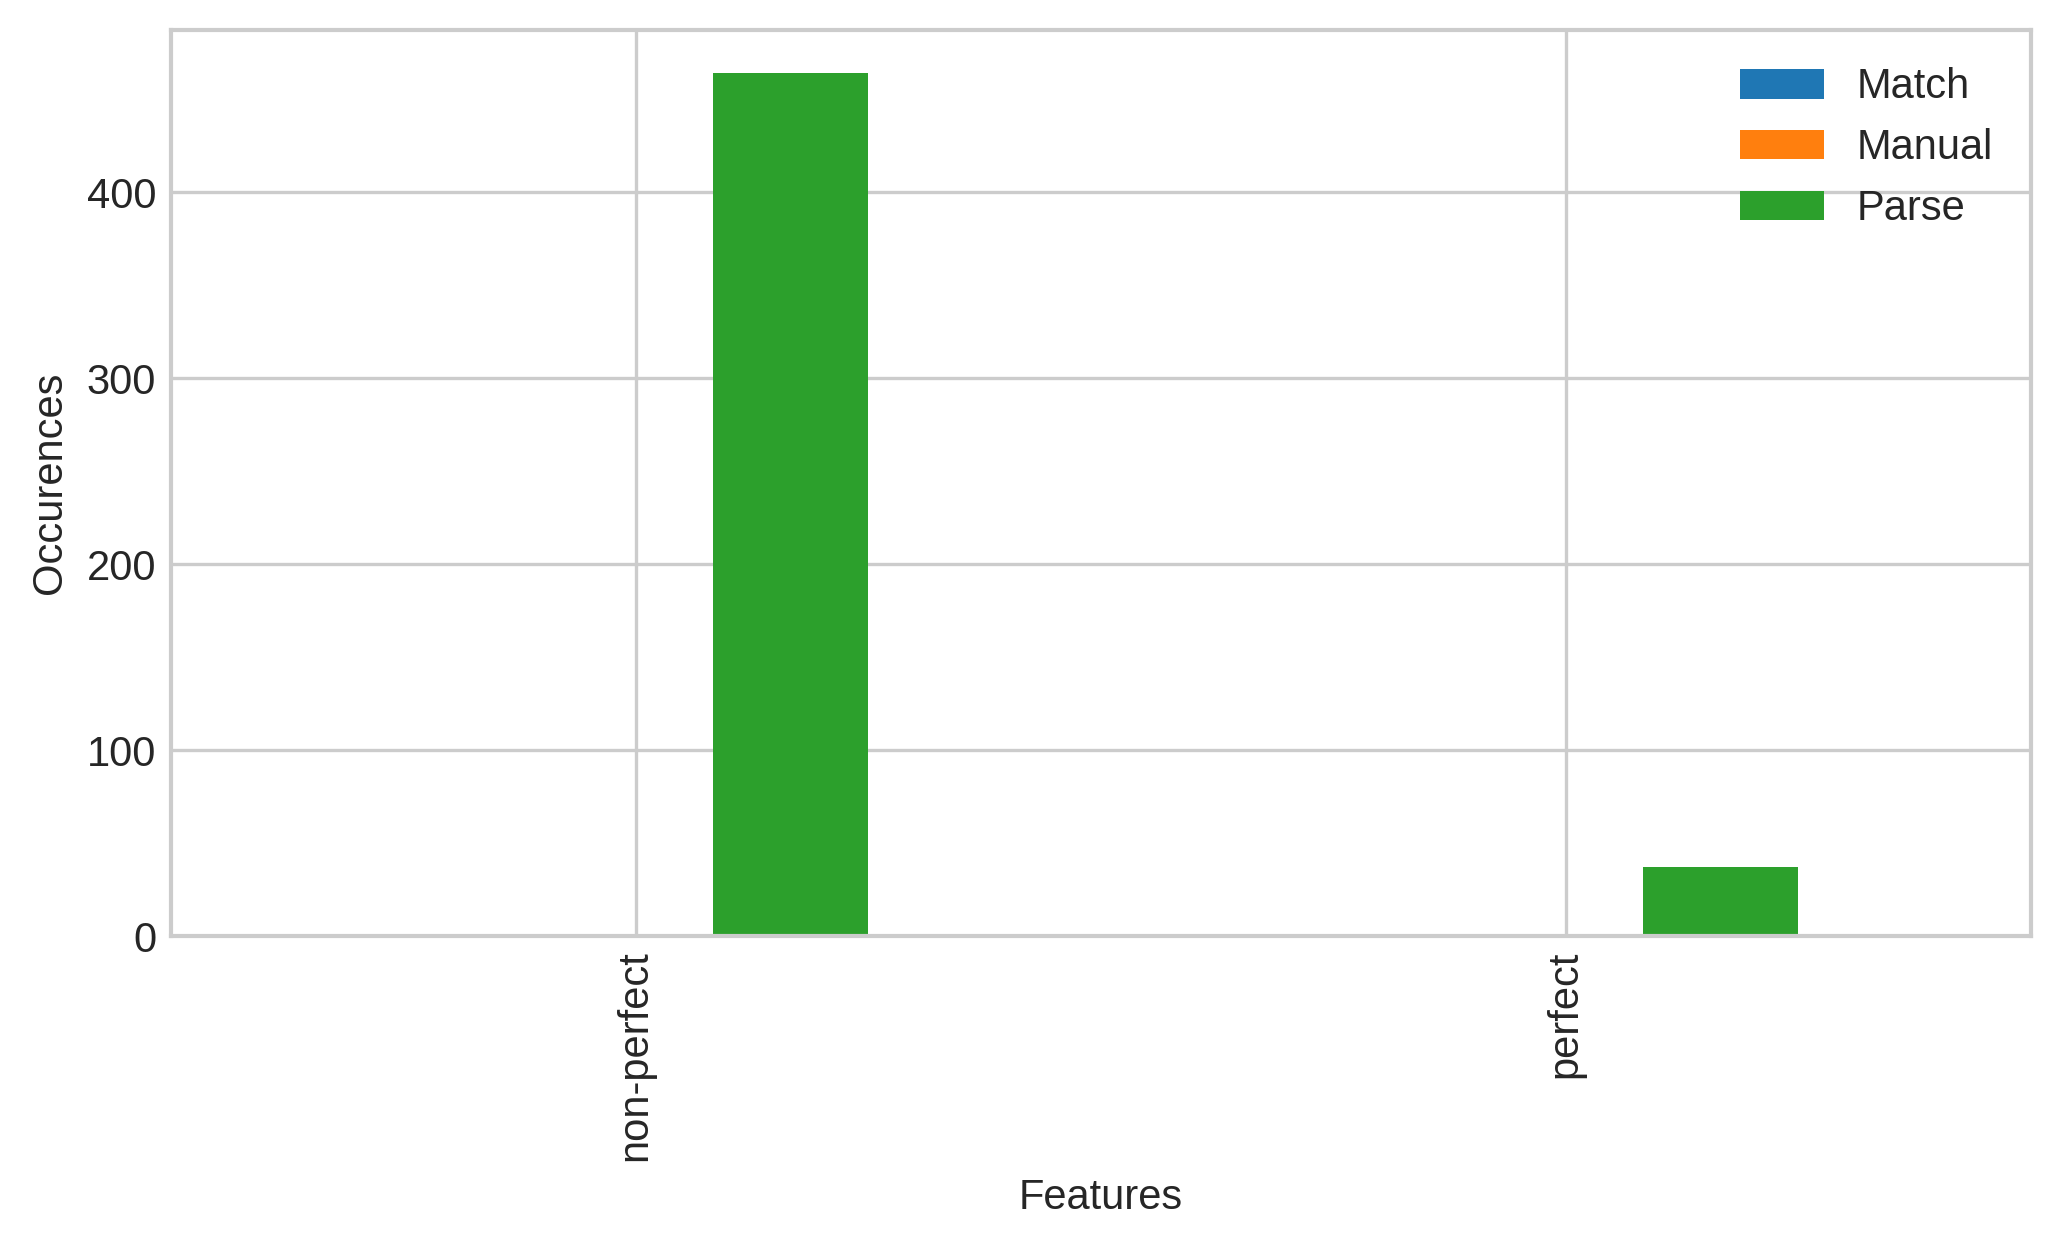

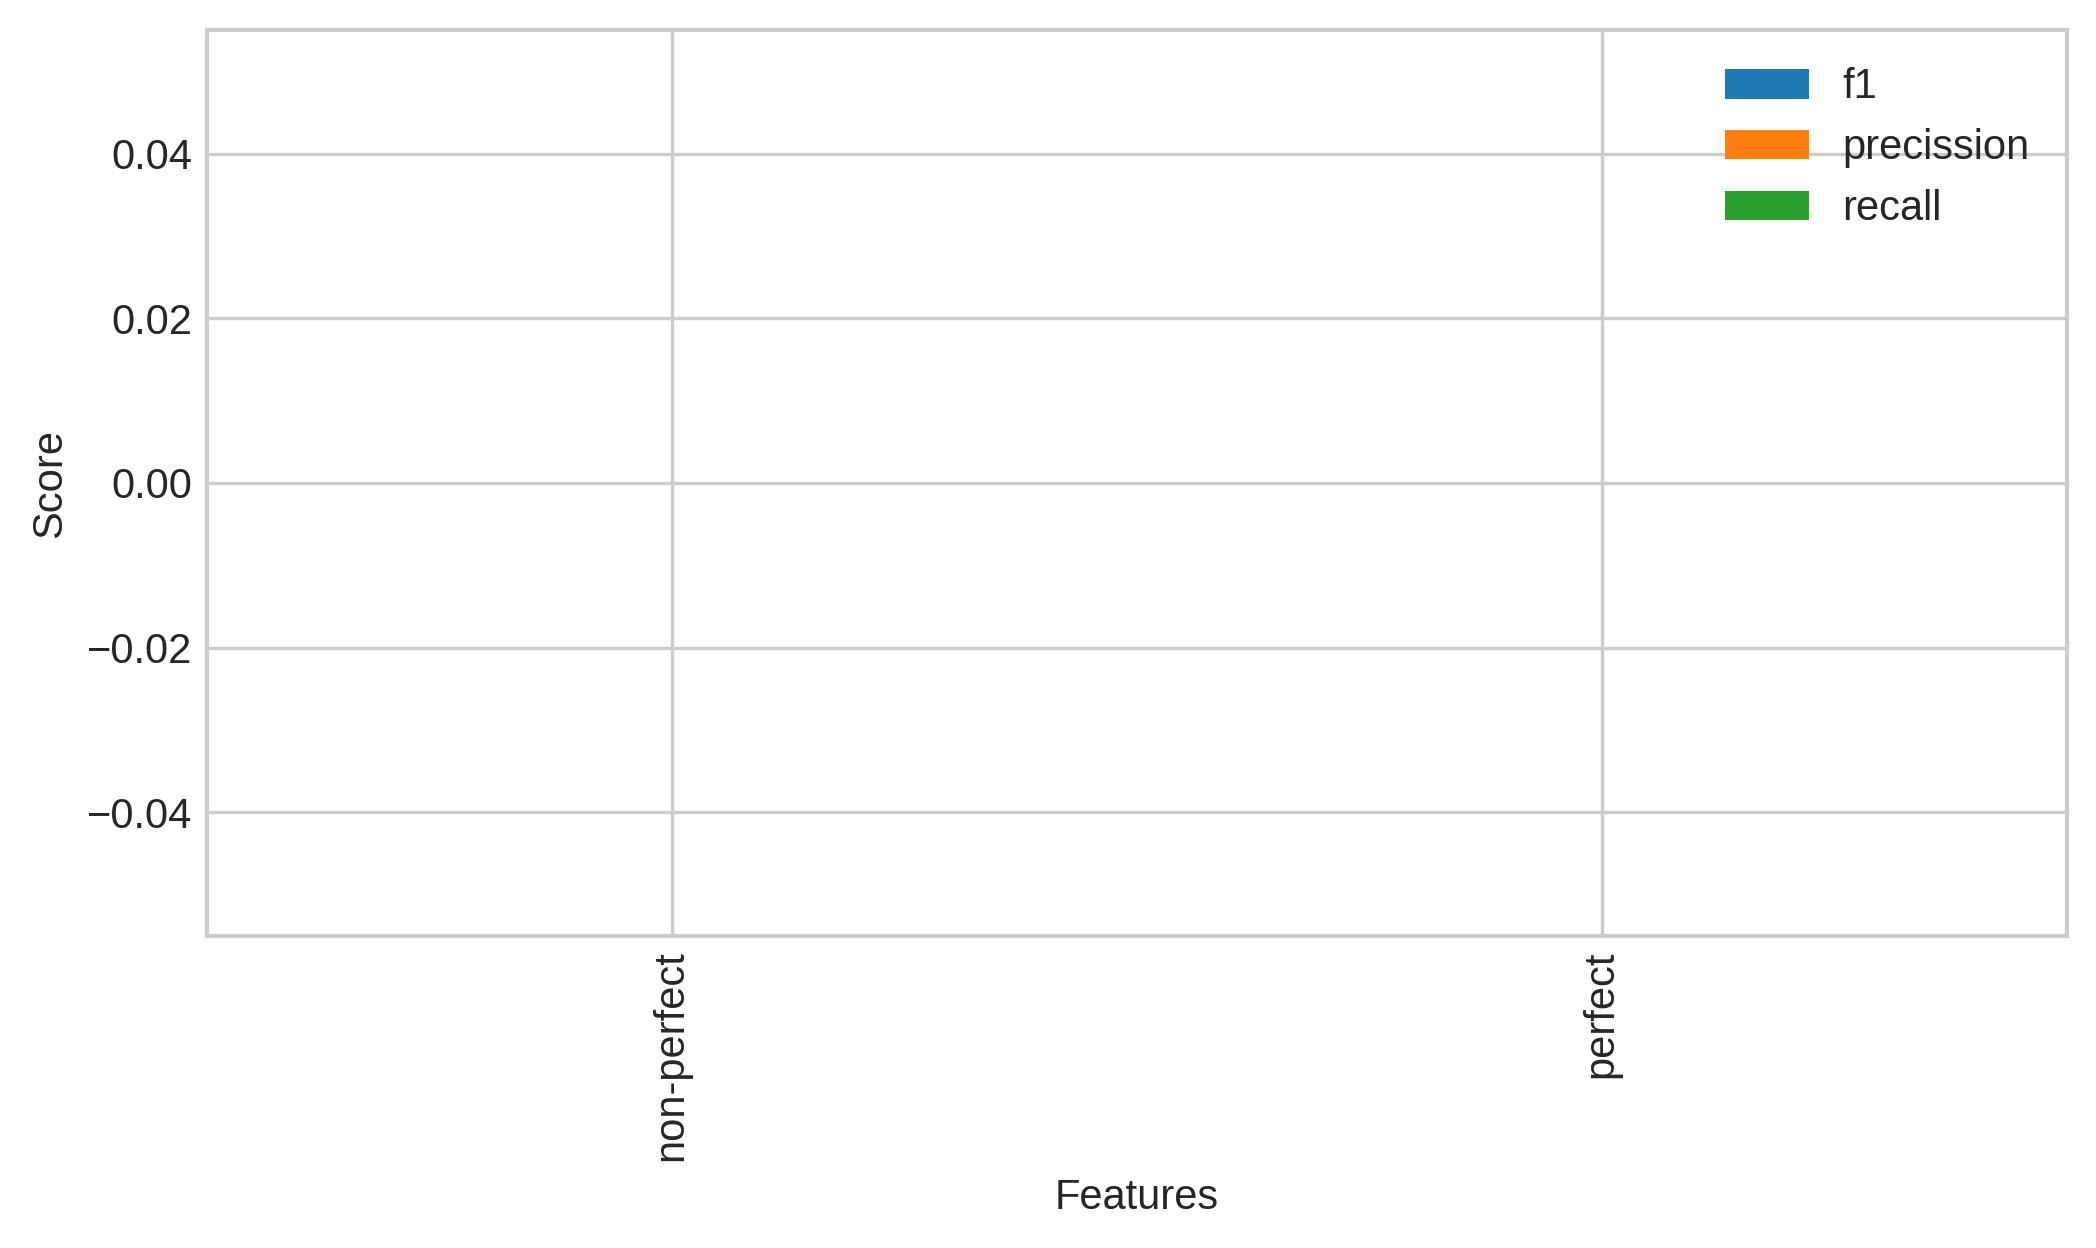

In [36]:
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["past","present","future"]) 
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["progressive","non-progressive"])
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["perfect","non-perfect"])

### Mood assesment

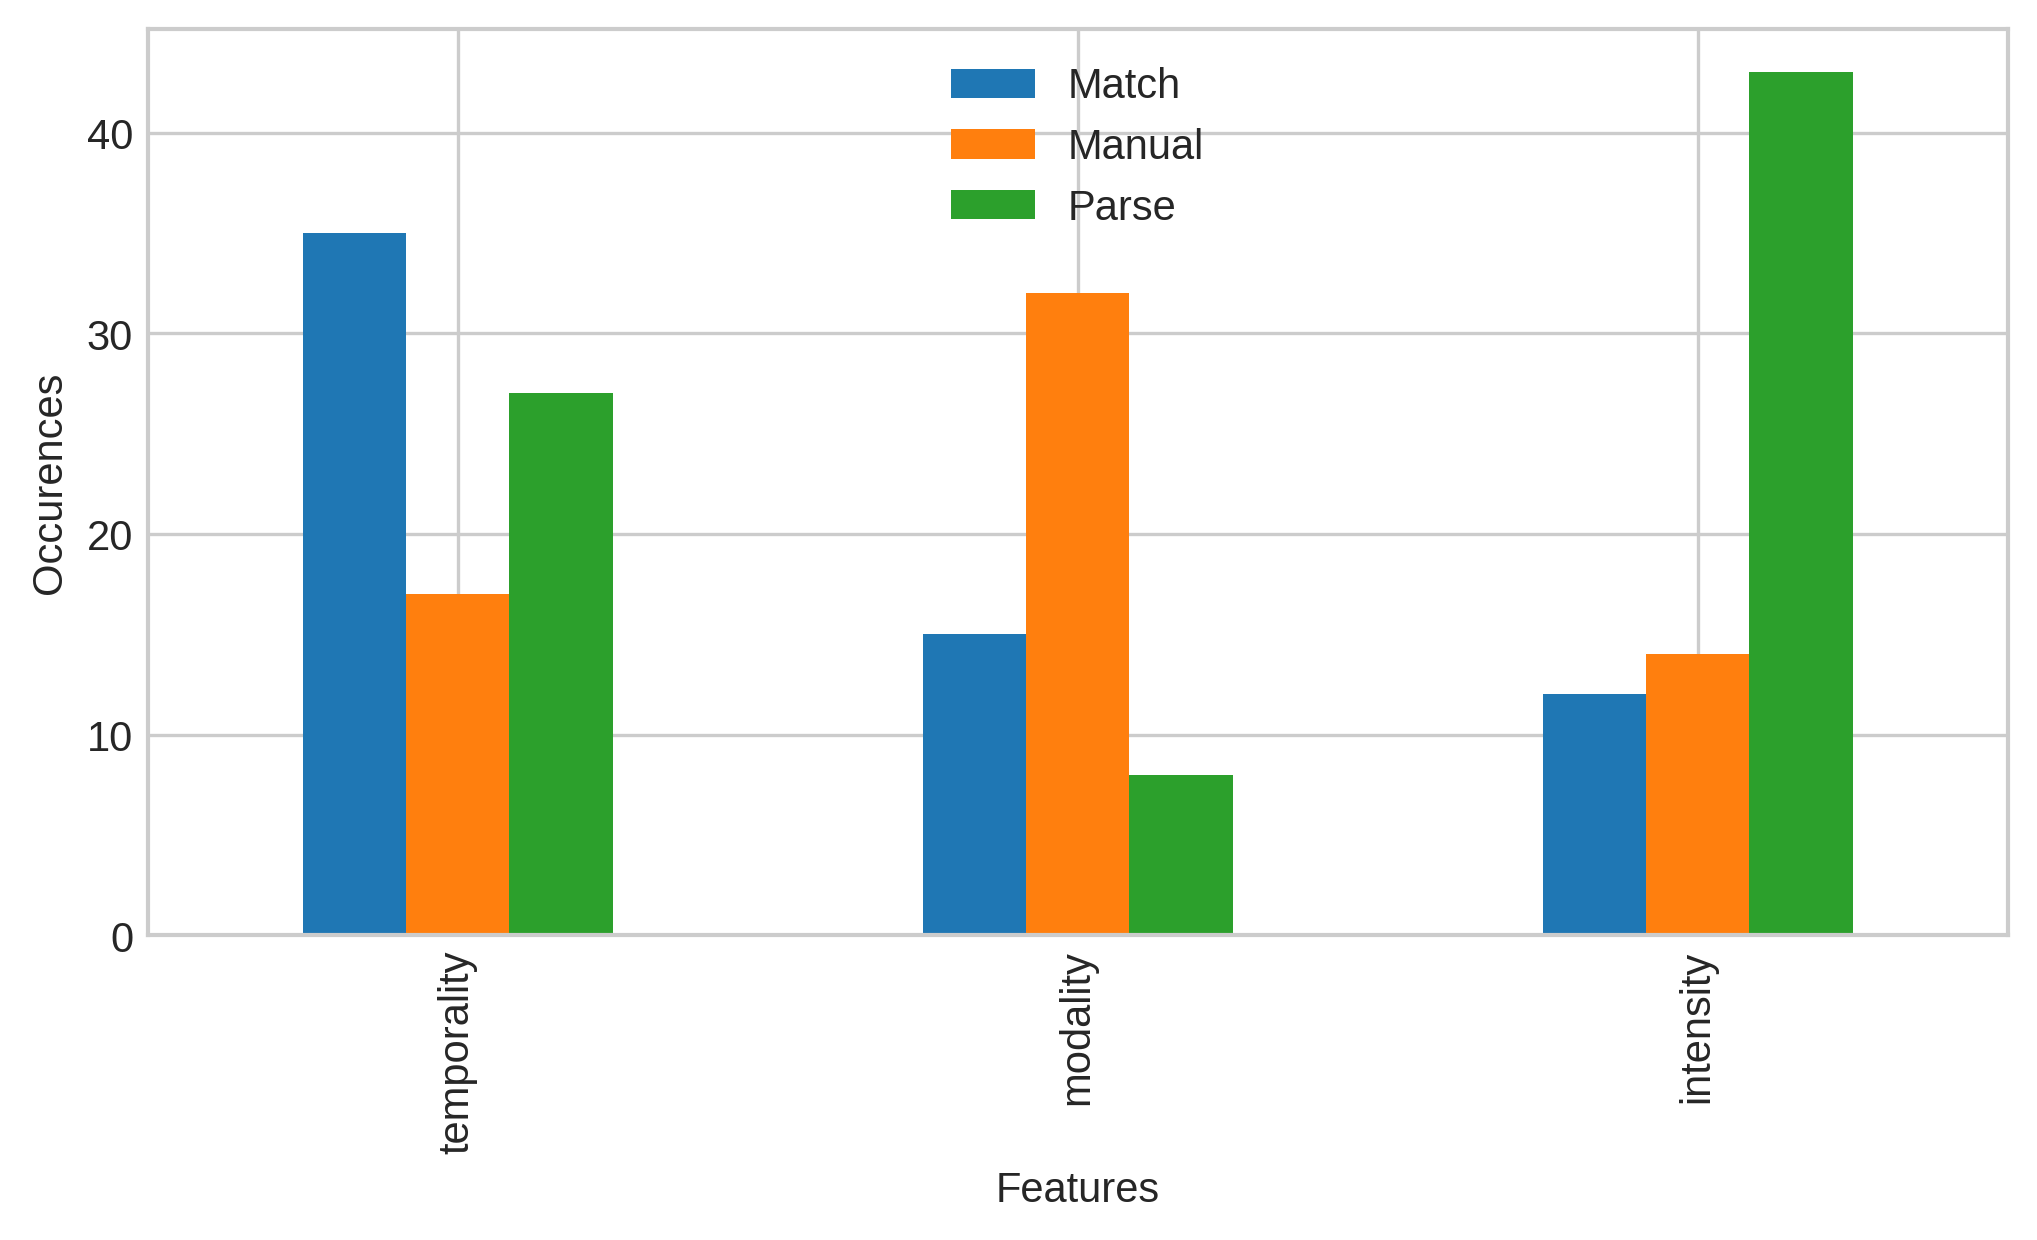

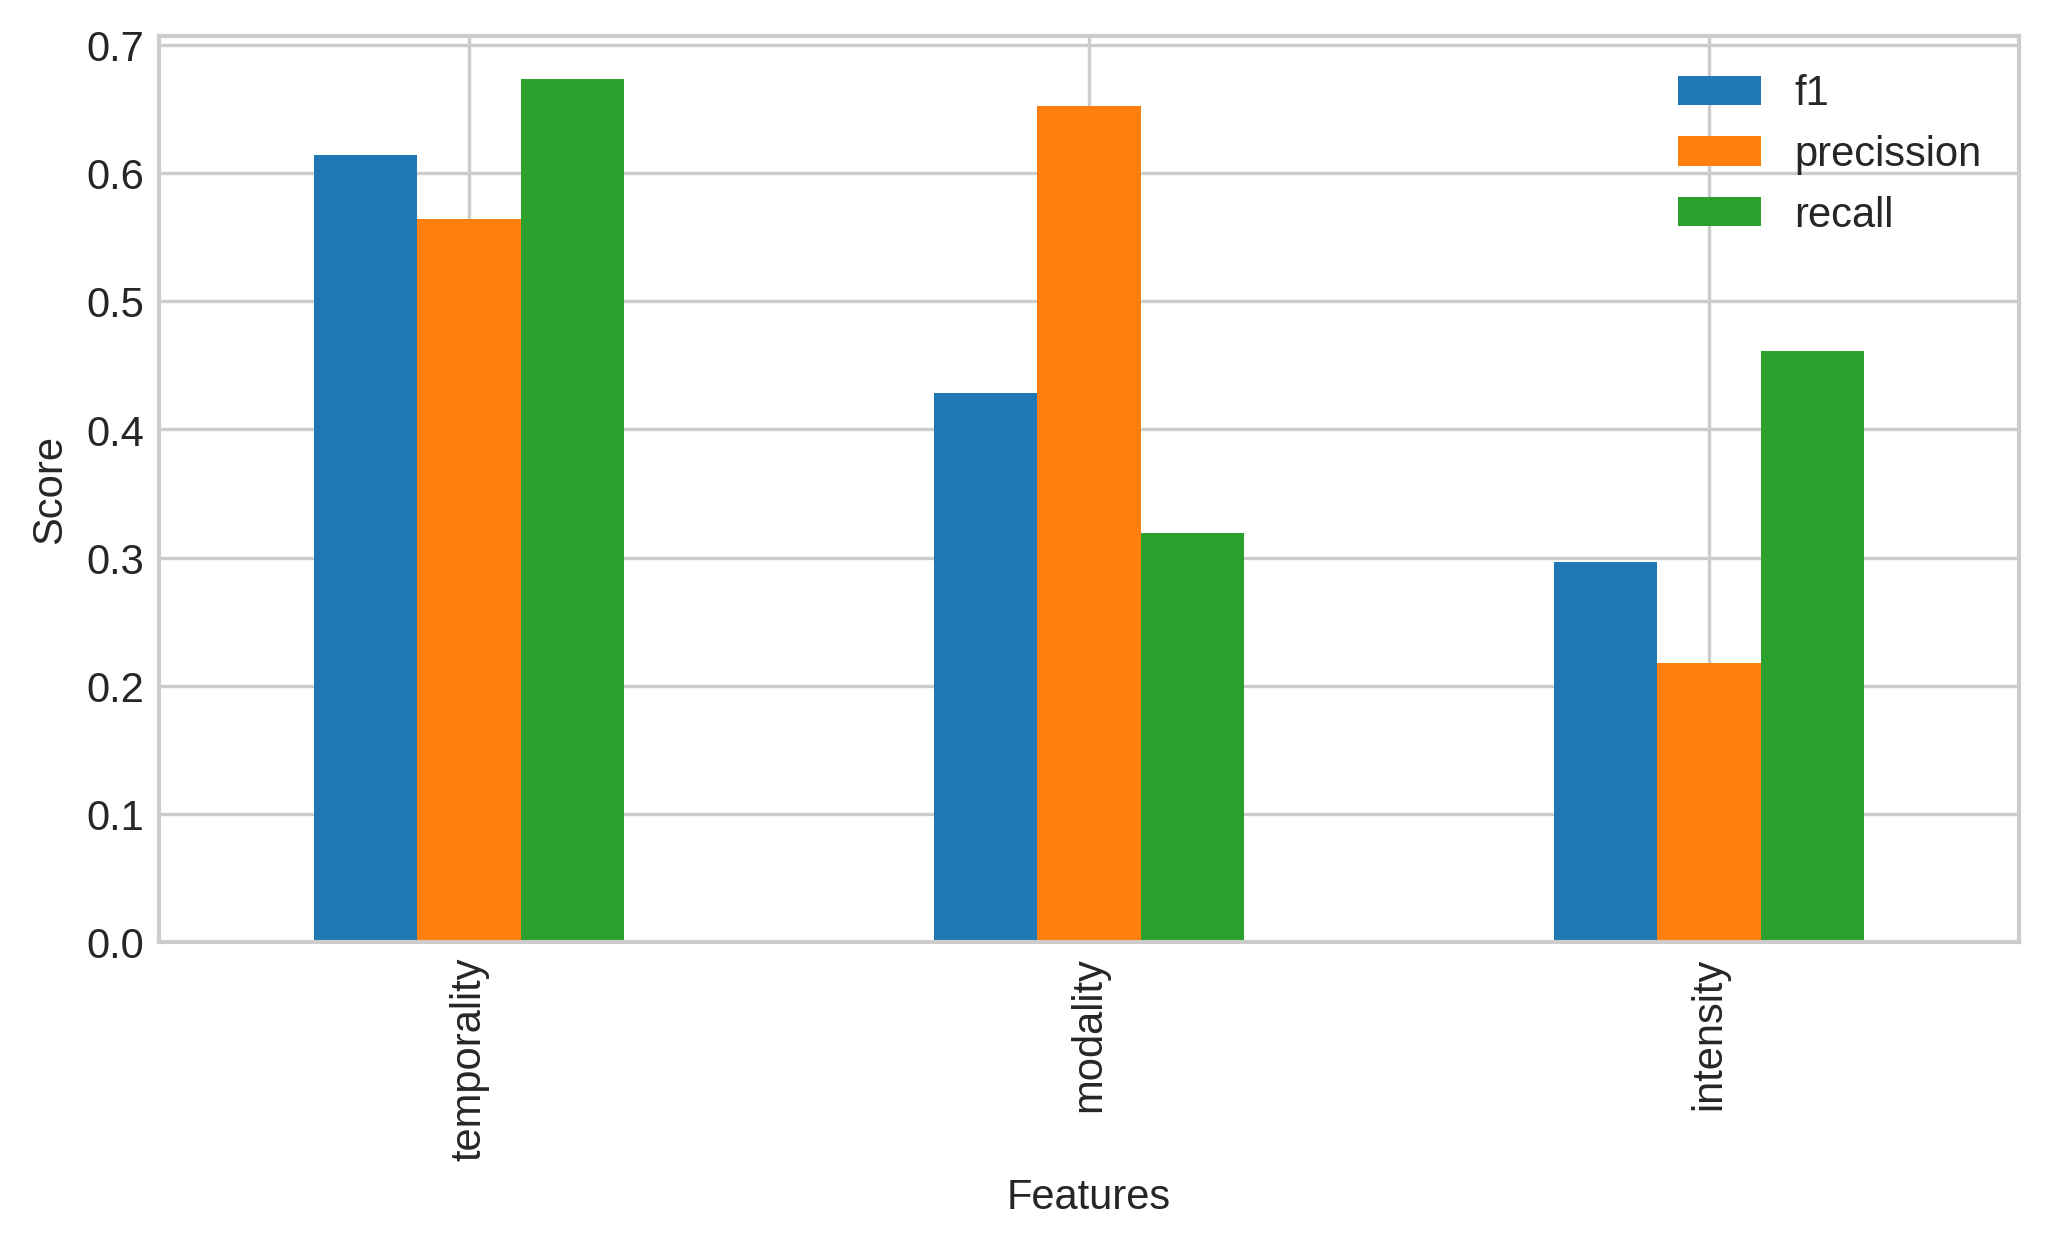

In [37]:
stats = make_stats(matches, manual_nm, parse_nm, 
                   filters=["intensity","modality","temporality"]) 

### Agency

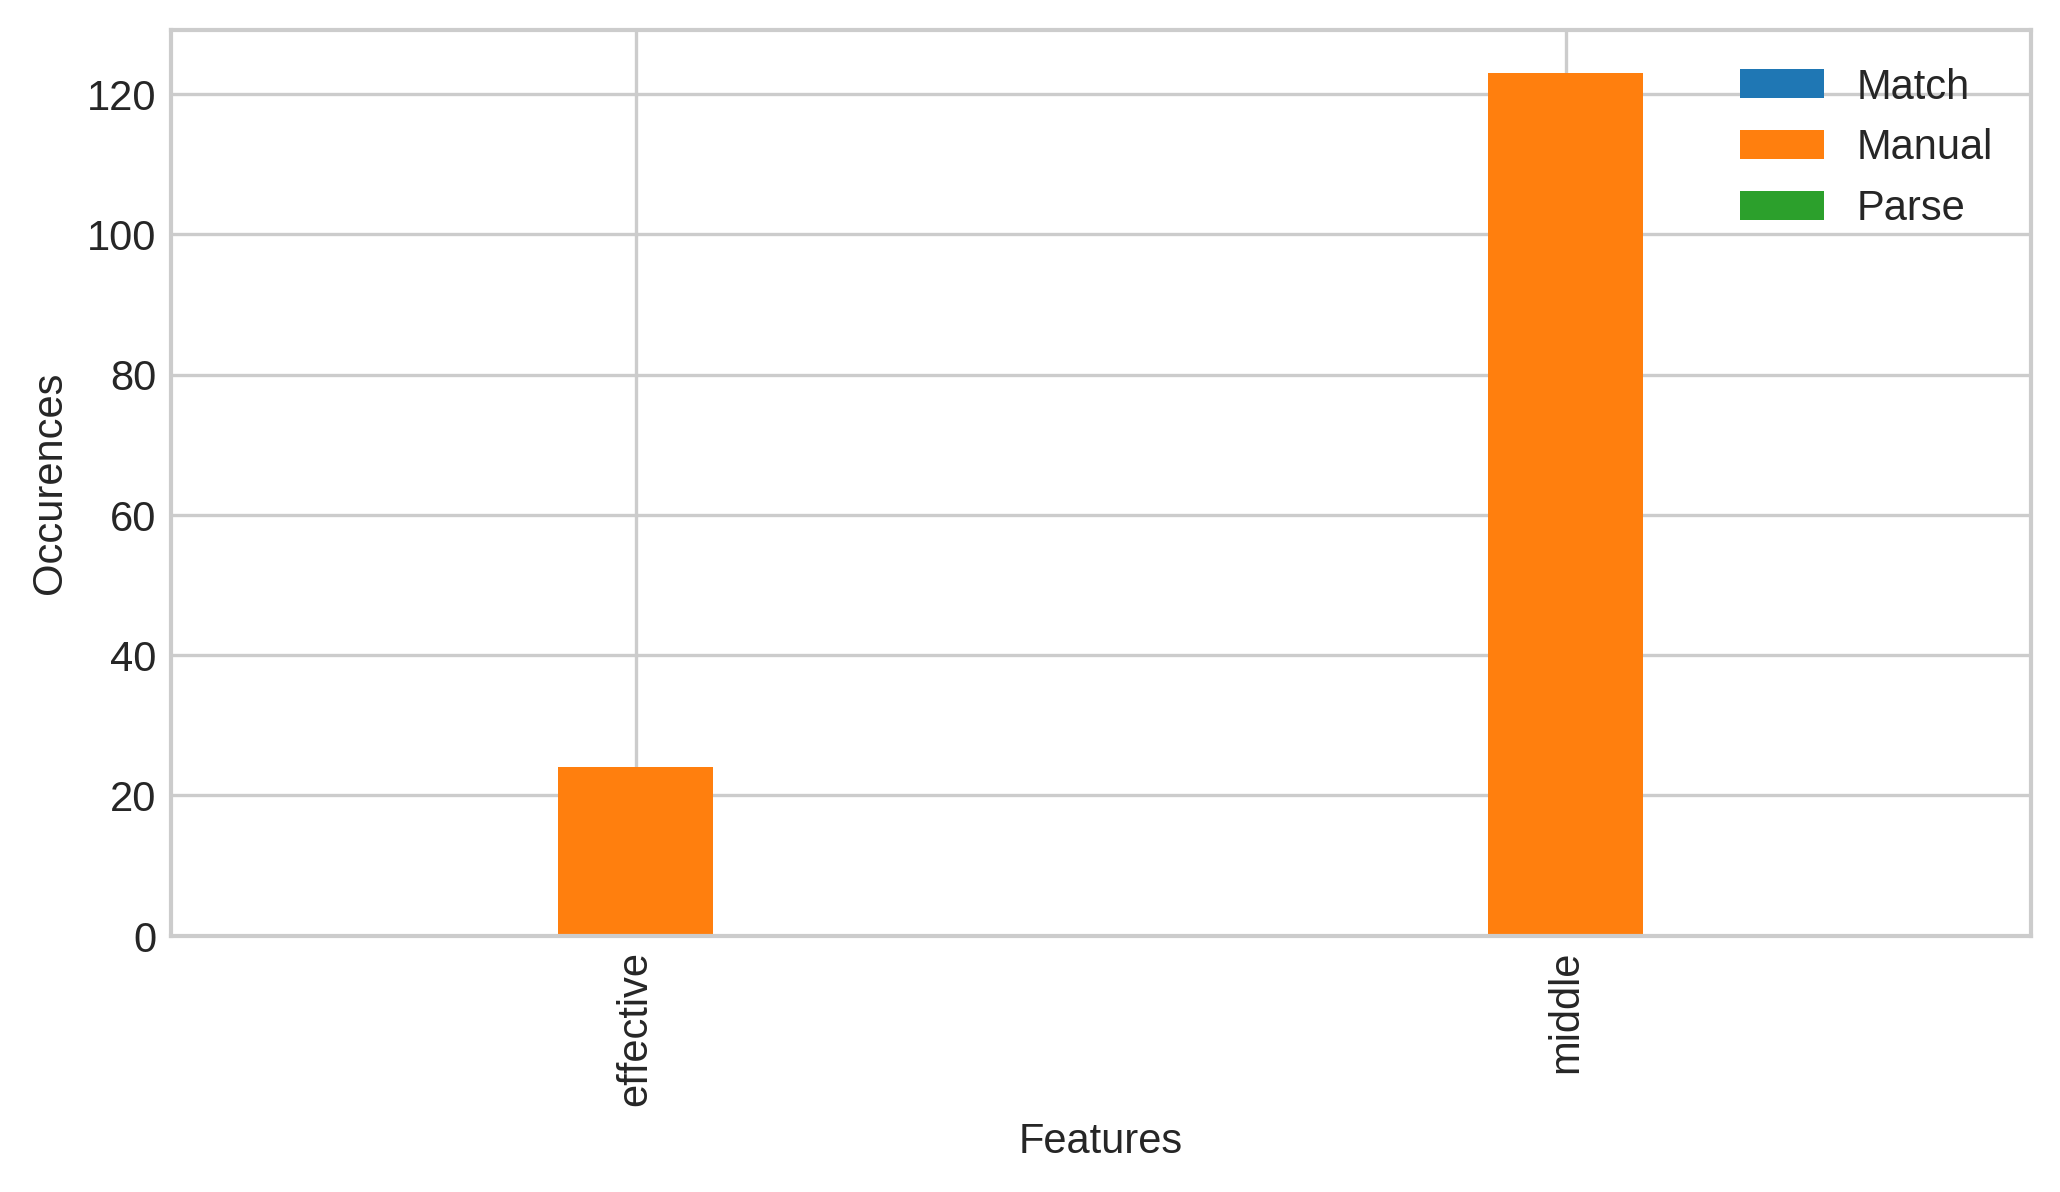

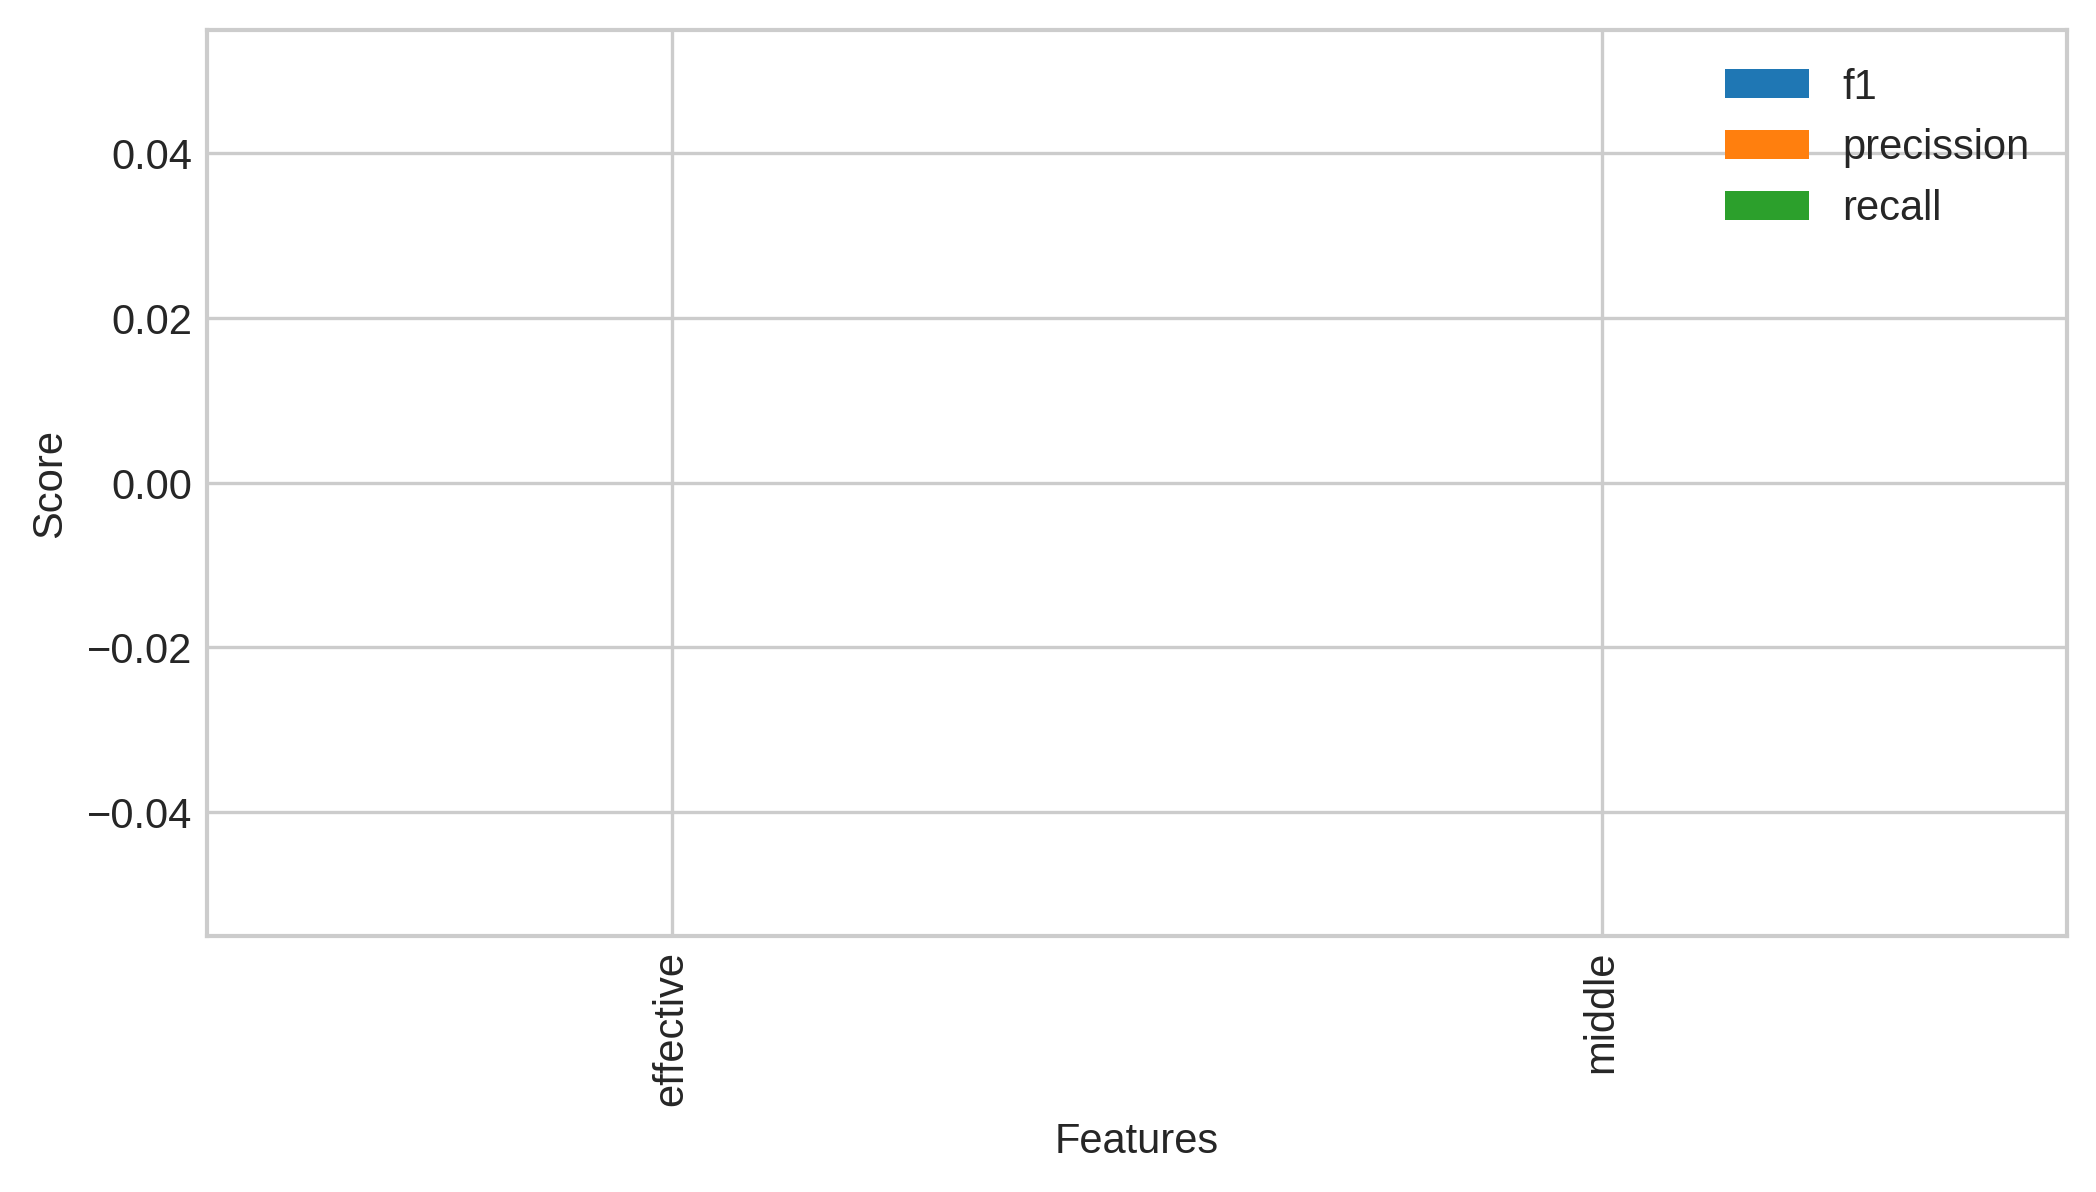

In [38]:
stats = make_stats(matches, manual_nm, parse_nm, filters=["middle","effective","operative","receptive","agentive","non-agentive"])